In [2]:
pwd

'/home/dcor/niskhizov/Rar'

In [3]:
# cd Rar

In [4]:
cd object-detection-nn

/home/dcor/niskhizov/Rar/object-detection-nn


In [5]:
# cd ../../..

In [ ]:
remote_mode = True

import os

from nn.YOLO_VGG16.utils.constants import ANCHORS
from nn.YOLO_VGG16.prepare_data.coco_dataset_memory import CocoDataset
from nn.YOLO_VGG16.prepare_data.transforms import train_transform, test_transform
from nn.YOLO_VGG16.utils.helpers import convert_cells_to_bboxes, load_checkpoint, nms, plot_image, save_checkpoint
from nn.YOLO_VGG16.utils.constants import device, s, leanring_rate, save_model, checkpoint_file
from nn.YOLO_VGG16.model.YOLO_VGG16_full import YOLO_VGG16_F
import torch
import torch.optim as optim
from nn.YOLO_VGG16.model.loss import YOLOLoss
from pycocotools.coco import COCO
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms as T

if remote_mode:
    model_path_base = f"/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/vgg_f_all_model"
    coco_path = lambda type: f'/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/temp/instances_{type}2017.json'
else:
    model_path_base = f"nn/YOLO_VGG16/degug_notebooks/"
    coco_path = lambda type: f'nn/cocodataset/annotations/instances_{type}2017.json'


/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [7]:
coco = COCO(coco_path('train'))
categories = ['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'chair',
] # 80 classes of COCO dataset


loading annotations into memory...
Done (t=15.06s)
creating index...
index created!


In [8]:
cat_ids = coco.getCatIds(catNms=categories)
# Get image ids for each category- should work with coco.getImgIds(catIds=cat_ids), but has a bug
img_ids = [coco.getImgIds(
    catIds=cat_id) for cat_id in cat_ids]
cat_ids_map = {cat_id: i for i, cat_id in enumerate(cat_ids)}
# Flatten the list
img_ids = [item for sublist in img_ids for item in sublist]


In [17]:
len(img_ids)

139456

In [10]:
# Creating the model from YOLOv3 class 
load_model = True
model = YOLO_VGG16_F(num_classes=len(categories)).to(device) 

# Defining the optimizer 
optimizer = optim.Adam(model.parameters(), lr = leanring_rate) 

# Defining the loss function 
loss_fn = YOLOLoss() 

# Defining the scaler for mixed precision training 
scaler = torch.amp.GradScaler(device=device) 
# Loading the checkpoint 
if load_model: 
    load_checkpoint(model_path_base + f"b35200_vgg16_{checkpoint_file}", model, optimizer, leanring_rate, device) 

# Initialize TensorBoard writer
writer = SummaryWriter(log_dir='runs/YOLO_VGG16_F_17_classes_v2')



==> Loading checkpoint


In [11]:
dataset = CocoDataset( 
	coco_obj=coco, 
	categories=categories,
	grid_sizes=[13, 26, 52], 
	anchors=ANCHORS, 
	transform=train_transform 
) 

# Defining the train data loader 
train_loader = torch.utils.data.DataLoader( 
	dataset=dataset, 
	batch_size=8, 
	shuffle=True, 
	num_workers=4,
 	prefetch_factor=10,
) 


In [12]:
# Load the validation dataset
val_coco = COCO(coco_path('val'))

val_dataset = CocoDataset(
    coco_obj=val_coco,
    categories=categories,
    grid_sizes=[13, 26, 52],
    anchors=ANCHORS,
    transform=test_transform  # Use the same transform for validation
)

# Create the validation data loader
val_loader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=8,
    shuffle=True,
)

val_loader_iter = iter(val_loader)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [13]:
# Scaling the anchors 
scaled_anchors = ( 
	torch.tensor(ANCHORS) *
	torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1,3,2) 
).to(device) 

Epoch: 1


  0%|          | 0/17432 [00:07<?, ?it/s, loss=1.73]

batch_idx: 0
==> Saving checkpoint
==> Saving checkpoint


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


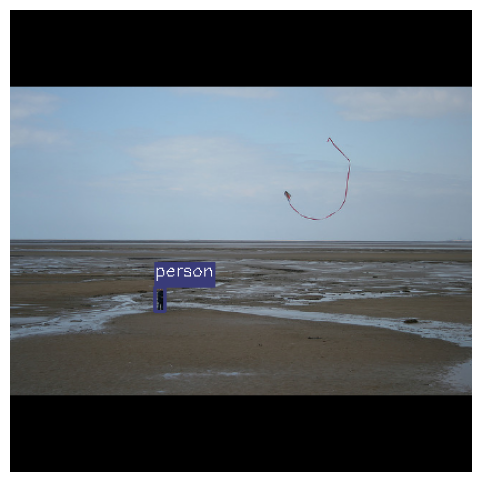

  0%|          | 2/17432 [00:29<58:00:39, 11.98s/it, loss=2.01] 

batch_idx: 1
batch_idx: 2


  0%|          | 4/17432 [00:29<19:27:54,  4.02s/it, loss=1.94]

batch_idx: 3
batch_idx: 4


  0%|          | 6/17432 [00:29<8:33:35,  1.77s/it, loss=1.86] 

batch_idx: 5
batch_idx: 6


  0%|          | 8/17432 [00:29<4:14:26,  1.14it/s, loss=1.77]

batch_idx: 7
batch_idx: 8


  0%|          | 10/17432 [00:30<2:19:17,  2.08it/s, loss=1.73]

batch_idx: 9
batch_idx: 10


  0%|          | 12/17432 [00:30<1:25:22,  3.40it/s, loss=1.78]

batch_idx: 11
batch_idx: 12


  0%|          | 14/17432 [00:30<59:36,  4.87it/s, loss=1.91]  

batch_idx: 13
batch_idx: 14


  0%|          | 16/17432 [00:30<46:53,  6.19it/s, loss=1.85]

batch_idx: 15


  0%|          | 17/17432 [00:36<8:36:40,  1.78s/it, loss=1.82]

batch_idx: 16
batch_idx: 17


  0%|          | 19/17432 [00:36<4:30:40,  1.07it/s, loss=1.81]

batch_idx: 18
batch_idx: 19


  0%|          | 21/17432 [00:43<11:52:19,  2.45s/it, loss=1.84]

batch_idx: 20
batch_idx: 21


  0%|          | 23/17432 [00:43<6:07:20,  1.27s/it, loss=1.87] 

batch_idx: 22
batch_idx: 23


  0%|          | 25/17432 [00:50<13:08:51,  2.72s/it, loss=1.91]

batch_idx: 24
batch_idx: 25


  0%|          | 27/17432 [00:50<6:44:23,  1.39s/it, loss=1.91] 

batch_idx: 26
batch_idx: 27


  0%|          | 29/17432 [00:57<13:19:04,  2.75s/it, loss=1.9]

batch_idx: 28
batch_idx: 29


  0%|          | 31/17432 [00:57<6:49:12,  1.41s/it, loss=1.86] 

batch_idx: 30
batch_idx: 31


  0%|          | 33/17432 [01:04<12:16:37,  2.54s/it, loss=1.87]

batch_idx: 32
batch_idx: 33


  0%|          | 35/17432 [01:04<6:18:33,  1.31s/it, loss=1.84] 

batch_idx: 34
batch_idx: 35


  0%|          | 37/17432 [01:10<11:58:09,  2.48s/it, loss=1.85]

batch_idx: 36
batch_idx: 37


  0%|          | 39/17432 [01:10<6:13:38,  1.29s/it, loss=1.81] 

batch_idx: 38
batch_idx: 39


  0%|          | 41/17432 [01:17<13:19:26,  2.76s/it, loss=1.82]

batch_idx: 40
batch_idx: 41


  0%|          | 43/17432 [01:18<6:49:30,  1.41s/it, loss=1.81] 

batch_idx: 42
batch_idx: 43


  0%|          | 45/17432 [01:25<13:11:23,  2.73s/it, loss=1.83]

batch_idx: 44
batch_idx: 45


  0%|          | 47/17432 [01:25<6:47:39,  1.41s/it, loss=1.84] 

batch_idx: 46
batch_idx: 47


  0%|          | 49/17432 [01:32<12:59:49,  2.69s/it, loss=1.85]

batch_idx: 48


  0%|          | 50/17432 [01:32<9:39:20,  2.00s/it, loss=1.85] 

batch_idx: 49
batch_idx: 50


  0%|          | 52/17432 [01:32<5:01:44,  1.04s/it, loss=1.84]

batch_idx: 51


  0%|          | 53/17432 [01:39<12:44:17,  2.64s/it, loss=1.84]

batch_idx: 52


  0%|          | 54/17432 [01:39<9:16:25,  1.92s/it, loss=1.84] 

batch_idx: 53
batch_idx: 54


  0%|          | 56/17432 [01:39<4:50:15,  1.00s/it, loss=1.85]

batch_idx: 55


  0%|          | 57/17432 [01:45<12:25:46,  2.58s/it, loss=1.84]

batch_idx: 56


  0%|          | 58/17432 [01:46<9:19:52,  1.93s/it, loss=1.85] 

batch_idx: 57
batch_idx: 58


  0%|          | 60/17432 [01:46<4:54:39,  1.02s/it, loss=1.85]

batch_idx: 59


  0%|          | 61/17432 [01:52<12:16:07,  2.54s/it, loss=1.85]

batch_idx: 60


  0%|          | 62/17432 [01:53<9:49:15,  2.04s/it, loss=1.84] 

batch_idx: 61
batch_idx: 62


  0%|          | 64/17432 [01:53<5:06:37,  1.06s/it, loss=1.83]

batch_idx: 63


  0%|          | 65/17432 [01:59<12:17:33,  2.55s/it, loss=1.84]

batch_idx: 64


  0%|          | 66/17432 [02:00<9:55:08,  2.06s/it, loss=1.83] 

batch_idx: 65
batch_idx: 66


  0%|          | 68/17432 [02:00<5:09:14,  1.07s/it, loss=1.82]

batch_idx: 67


  0%|          | 69/17432 [02:06<12:14:20,  2.54s/it, loss=1.81]

batch_idx: 68


  0%|          | 70/17432 [02:07<10:05:07,  2.09s/it, loss=1.81]

batch_idx: 69
batch_idx: 70


  0%|          | 72/17432 [02:08<5:14:06,  1.09s/it, loss=1.81] 

batch_idx: 71


  0%|          | 73/17432 [02:13<11:25:37,  2.37s/it, loss=1.82]

batch_idx: 72


  0%|          | 74/17432 [02:14<10:13:27,  2.12s/it, loss=1.82]

batch_idx: 73
batch_idx: 74


  0%|          | 76/17432 [02:15<5:18:30,  1.10s/it, loss=1.82] 

batch_idx: 75


  0%|          | 77/17432 [02:20<11:26:55,  2.37s/it, loss=1.82]

batch_idx: 76


  0%|          | 78/17432 [02:22<10:31:00,  2.18s/it, loss=1.83]

batch_idx: 77
batch_idx: 78


  0%|          | 80/17432 [02:22<5:26:56,  1.13s/it, loss=1.82] 

batch_idx: 79


  0%|          | 81/17432 [02:27<11:38:43,  2.42s/it, loss=1.82]

batch_idx: 80


  0%|          | 82/17432 [02:29<10:05:30,  2.09s/it, loss=1.82]

batch_idx: 81
batch_idx: 82


  0%|          | 84/17432 [02:29<5:14:35,  1.09s/it, loss=1.81] 

batch_idx: 83


  0%|          | 85/17432 [02:35<11:50:17,  2.46s/it, loss=1.81]

batch_idx: 84


  0%|          | 86/17432 [02:36<9:27:41,  1.96s/it, loss=1.82] 

batch_idx: 85
batch_idx: 86


  1%|          | 88/17432 [02:36<4:55:49,  1.02s/it, loss=1.82]

batch_idx: 87


  1%|          | 89/17432 [02:41<11:09:02,  2.31s/it, loss=1.82]

batch_idx: 88


  1%|          | 90/17432 [02:43<10:10:01,  2.11s/it, loss=1.82]

batch_idx: 89
batch_idx: 90


  1%|          | 92/17432 [02:43<5:16:28,  1.10s/it, loss=1.8]  

batch_idx: 91


  1%|          | 93/17432 [02:48<10:54:55,  2.27s/it, loss=1.81]

batch_idx: 92


  1%|          | 94/17432 [02:50<10:00:27,  2.08s/it, loss=1.81]

batch_idx: 93
batch_idx: 94


  1%|          | 96/17432 [02:50<5:11:54,  1.08s/it, loss=1.8]  

batch_idx: 95


  1%|          | 97/17432 [02:55<11:07:08,  2.31s/it, loss=1.8]

batch_idx: 96


  1%|          | 98/17432 [02:57<10:13:28,  2.12s/it, loss=1.81]

batch_idx: 97
batch_idx: 98


  1%|          | 100/17432 [02:57<5:18:16,  1.10s/it, loss=1.8] 

batch_idx: 99


  1%|          | 101/17432 [03:02<10:37:02,  2.21s/it, loss=1.79]

batch_idx: 100


  1%|          | 102/17432 [03:04<11:12:59,  2.33s/it, loss=1.8] 

batch_idx: 101
batch_idx: 102


  1%|          | 104/17432 [03:05<5:47:11,  1.20s/it, loss=1.8] 

batch_idx: 103


  1%|          | 105/17432 [03:09<10:11:37,  2.12s/it, loss=1.8]

batch_idx: 104


  1%|          | 106/17432 [03:11<10:14:07,  2.13s/it, loss=1.8]

batch_idx: 105
batch_idx: 106


  1%|          | 108/17432 [03:11<5:18:28,  1.10s/it, loss=1.8] 

batch_idx: 107


  1%|          | 109/17432 [03:16<10:14:56,  2.13s/it, loss=1.8]

batch_idx: 108


  1%|          | 110/17432 [03:17<9:34:02,  1.99s/it, loss=1.81] 

batch_idx: 109
batch_idx: 110


  1%|          | 112/17432 [03:18<4:59:00,  1.04s/it, loss=1.81]

batch_idx: 111


  1%|          | 113/17432 [03:23<10:48:38,  2.25s/it, loss=1.8]

batch_idx: 112


  1%|          | 114/17432 [03:25<10:28:41,  2.18s/it, loss=1.81]

batch_idx: 113
batch_idx: 114


  1%|          | 116/17432 [03:25<5:25:34,  1.13s/it, loss=1.81] 

batch_idx: 115


  1%|          | 117/17432 [03:30<10:37:47,  2.21s/it, loss=1.8]

batch_idx: 116


  1%|          | 118/17432 [03:32<10:29:43,  2.18s/it, loss=1.81]

batch_idx: 117
batch_idx: 118


  1%|          | 120/17432 [03:32<5:26:01,  1.13s/it, loss=1.8]  

batch_idx: 119


  1%|          | 121/17432 [03:37<10:44:18,  2.23s/it, loss=1.8]

batch_idx: 120


  1%|          | 122/17432 [03:39<10:16:15,  2.14s/it, loss=1.8]

batch_idx: 121
batch_idx: 122


  1%|          | 124/17432 [03:39<5:19:30,  1.11s/it, loss=1.8] 

batch_idx: 123


  1%|          | 125/17432 [03:44<10:15:35,  2.13s/it, loss=1.8]

batch_idx: 124


  1%|          | 126/17432 [03:45<9:58:28,  2.07s/it, loss=1.8] 

batch_idx: 125
batch_idx: 126


  1%|          | 128/17432 [03:46<5:10:38,  1.08s/it, loss=1.8]

batch_idx: 127


  1%|          | 129/17432 [03:51<10:52:18,  2.26s/it, loss=1.81]

batch_idx: 128


  1%|          | 130/17432 [03:52<9:50:13,  2.05s/it, loss=1.81] 

batch_idx: 129
batch_idx: 130


  1%|          | 132/17432 [03:53<5:06:38,  1.06s/it, loss=1.81]

batch_idx: 131


  1%|          | 133/17432 [03:58<11:10:23,  2.33s/it, loss=1.81]

batch_idx: 132


  1%|          | 134/17432 [04:04<16:11:36,  3.37s/it, loss=1.81]

batch_idx: 133


  1%|          | 135/17432 [04:05<13:23:15,  2.79s/it, loss=1.8] 

batch_idx: 134
batch_idx: 135


  1%|          | 137/17432 [04:05<6:51:16,  1.43s/it, loss=1.81] 

batch_idx: 136


  1%|          | 138/17432 [04:11<12:28:59,  2.60s/it, loss=1.8]

batch_idx: 137


  1%|          | 139/17432 [04:12<10:40:56,  2.22s/it, loss=1.81]

batch_idx: 138
batch_idx: 139


  1%|          | 141/17432 [04:12<5:31:41,  1.15s/it, loss=1.8]  

batch_idx: 140


  1%|          | 142/17432 [04:18<12:04:03,  2.51s/it, loss=1.8]

batch_idx: 141


  1%|          | 143/17432 [04:19<10:04:39,  2.10s/it, loss=1.8]

batch_idx: 142
batch_idx: 143


  1%|          | 145/17432 [04:19<5:13:51,  1.09s/it, loss=1.79]

batch_idx: 144


  1%|          | 146/17432 [04:25<11:25:57,  2.38s/it, loss=1.8]

batch_idx: 145


  1%|          | 147/17432 [04:26<10:08:46,  2.11s/it, loss=1.8]

batch_idx: 146
batch_idx: 147


  1%|          | 149/17432 [04:26<5:16:16,  1.10s/it, loss=1.79] 

batch_idx: 148


  1%|          | 150/17432 [04:32<11:33:02,  2.41s/it, loss=1.79]

batch_idx: 149


  1%|          | 151/17432 [04:33<9:21:28,  1.95s/it, loss=1.79] 

batch_idx: 150
batch_idx: 151


  1%|          | 153/17432 [04:33<4:52:52,  1.02s/it, loss=1.79]

batch_idx: 152


  1%|          | 154/17432 [04:39<11:41:33,  2.44s/it, loss=1.79]

batch_idx: 153


  1%|          | 155/17432 [04:40<9:29:33,  1.98s/it, loss=1.79] 

batch_idx: 154
batch_idx: 155


  1%|          | 157/17432 [04:40<4:56:39,  1.03s/it, loss=1.79]

batch_idx: 156


  1%|          | 158/17432 [04:45<11:20:53,  2.37s/it, loss=1.79]

batch_idx: 157


  1%|          | 159/17432 [04:46<9:29:25,  1.98s/it, loss=1.79] 

batch_idx: 158
batch_idx: 159


  1%|          | 161/17432 [04:47<4:56:43,  1.03s/it, loss=1.78]

batch_idx: 160


  1%|          | 162/17432 [04:53<11:56:32,  2.49s/it, loss=1.78]

batch_idx: 161


  1%|          | 163/17432 [04:54<9:51:25,  2.05s/it, loss=1.78] 

batch_idx: 162
batch_idx: 163


  1%|          | 165/17432 [04:54<5:07:21,  1.07s/it, loss=1.78]

batch_idx: 164


  1%|          | 166/17432 [05:00<11:46:01,  2.45s/it, loss=1.78]

batch_idx: 165


  1%|          | 167/17432 [05:00<9:14:43,  1.93s/it, loss=1.78] 

batch_idx: 166
batch_idx: 167


  1%|          | 169/17432 [05:00<4:50:33,  1.01s/it, loss=1.78]

batch_idx: 168


  1%|          | 170/17432 [05:06<10:49:01,  2.26s/it, loss=1.78]

batch_idx: 169


  1%|          | 171/17432 [05:08<10:24:36,  2.17s/it, loss=1.78]

batch_idx: 170
batch_idx: 171


  1%|          | 173/17432 [05:08<5:24:18,  1.13s/it, loss=1.79] 

batch_idx: 172


  1%|          | 174/17432 [05:13<10:35:55,  2.21s/it, loss=1.79]

batch_idx: 173


  1%|          | 175/17432 [05:15<10:43:49,  2.24s/it, loss=1.79]

batch_idx: 174
batch_idx: 175


  1%|          | 177/17432 [05:15<5:33:20,  1.16s/it, loss=1.78] 

batch_idx: 176


  1%|          | 178/17432 [05:19<10:02:57,  2.10s/it, loss=1.79]

batch_idx: 177


  1%|          | 179/17432 [05:21<9:59:34,  2.09s/it, loss=1.78] 

batch_idx: 178
batch_idx: 179


  1%|          | 181/17432 [05:22<5:29:49,  1.15s/it, loss=1.79]

batch_idx: 180


  1%|          | 182/17432 [05:26<10:01:55,  2.09s/it, loss=1.78]

batch_idx: 181


  1%|          | 183/17432 [05:28<9:50:59,  2.06s/it, loss=1.78] 

batch_idx: 182
batch_idx: 183


  1%|          | 185/17432 [05:29<5:36:50,  1.17s/it, loss=1.79]

batch_idx: 184


  1%|          | 186/17432 [05:33<10:22:25,  2.17s/it, loss=1.78]

batch_idx: 185


  1%|          | 187/17432 [05:35<9:22:12,  1.96s/it, loss=1.78] 

batch_idx: 186
batch_idx: 187


  1%|          | 189/17432 [05:36<6:34:28,  1.37s/it, loss=1.79]

batch_idx: 188


  1%|          | 190/17432 [05:40<10:39:11,  2.22s/it, loss=1.79]

batch_idx: 189


  1%|          | 191/17432 [05:42<9:06:32,  1.90s/it, loss=1.79] 

batch_idx: 190
batch_idx: 191


  1%|          | 193/17432 [05:43<6:24:50,  1.34s/it, loss=1.79]

batch_idx: 192


  1%|          | 194/17432 [05:48<11:07:21,  2.32s/it, loss=1.79]

batch_idx: 193


  1%|          | 195/17432 [05:49<9:19:30,  1.95s/it, loss=1.79] 

batch_idx: 194
batch_idx: 195


  1%|          | 197/17432 [05:50<6:46:17,  1.41s/it, loss=1.79]

batch_idx: 196


  1%|          | 198/17432 [05:54<10:44:03,  2.24s/it, loss=1.79]

batch_idx: 197


  1%|          | 199/17432 [05:55<9:09:57,  1.91s/it, loss=1.79] 

batch_idx: 198
batch_idx: 199


  1%|          | 200/17432 [05:57<6:35:19,  1.38s/it, loss=1.78]

batch_idx: 200
==> Saving checkpoint


  1%|          | 202/17432 [06:04<11:18:38,  2.36s/it, loss=1.79]

batch_idx: 201
batch_idx: 202


  1%|          | 204/17432 [06:04<5:50:21,  1.22s/it, loss=1.79] 

batch_idx: 203
batch_idx: 204


  1%|          | 206/17432 [06:09<9:36:46,  2.01s/it, loss=1.79]

batch_idx: 205


  1%|          | 207/17432 [06:10<9:00:41,  1.88s/it, loss=1.79]

batch_idx: 206
batch_idx: 207


  1%|          | 209/17432 [06:11<4:55:37,  1.03s/it, loss=1.79]

batch_idx: 208


  1%|          | 210/17432 [06:15<10:19:59,  2.16s/it, loss=1.78]

batch_idx: 209


  1%|          | 211/17432 [06:17<10:03:24,  2.10s/it, loss=1.78]

batch_idx: 210
batch_idx: 211


  1%|          | 213/17432 [06:18<5:13:14,  1.09s/it, loss=1.78] 

batch_idx: 212


  1%|          | 214/17432 [06:23<10:51:05,  2.27s/it, loss=1.79]

batch_idx: 213


  1%|          | 215/17432 [06:24<9:53:39,  2.07s/it, loss=1.78] 

batch_idx: 214
batch_idx: 215


  1%|          | 217/17432 [06:25<5:25:04,  1.13s/it, loss=1.78]

batch_idx: 216


  1%|▏         | 218/17432 [06:30<11:32:58,  2.42s/it, loss=1.79]

batch_idx: 217


  1%|▏         | 219/17432 [06:31<9:18:35,  1.95s/it, loss=1.78] 

batch_idx: 218
batch_idx: 219


  1%|▏         | 221/17432 [06:32<5:57:51,  1.25s/it, loss=1.79]

batch_idx: 220


  1%|▏         | 222/17432 [06:37<10:55:32,  2.29s/it, loss=1.79]

batch_idx: 221


  1%|▏         | 223/17432 [06:38<9:03:21,  1.89s/it, loss=1.79] 

batch_idx: 222
batch_idx: 223


  1%|▏         | 225/17432 [06:39<6:05:00,  1.27s/it, loss=1.79]

batch_idx: 224


  1%|▏         | 226/17432 [06:43<10:57:23,  2.29s/it, loss=1.8]

batch_idx: 225


  1%|▏         | 227/17432 [06:45<9:41:19,  2.03s/it, loss=1.79] 

batch_idx: 226
batch_idx: 227


  1%|▏         | 229/17432 [06:45<5:36:12,  1.17s/it, loss=1.79]

batch_idx: 228


  1%|▏         | 230/17432 [06:51<11:45:24,  2.46s/it, loss=1.78]

batch_idx: 229


  1%|▏         | 231/17432 [06:52<9:24:34,  1.97s/it, loss=1.78] 

batch_idx: 230
batch_idx: 231


  1%|▏         | 233/17432 [06:53<6:05:23,  1.27s/it, loss=1.79]

batch_idx: 232


  1%|▏         | 234/17432 [06:58<11:39:29,  2.44s/it, loss=1.79]

batch_idx: 233


  1%|▏         | 235/17432 [06:59<9:13:34,  1.93s/it, loss=1.79] 

batch_idx: 234
batch_idx: 235


  1%|▏         | 237/17432 [07:00<6:04:55,  1.27s/it, loss=1.8] 

batch_idx: 236


  1%|▏         | 238/17432 [07:05<11:20:56,  2.38s/it, loss=1.79]

batch_idx: 237


  1%|▏         | 239/17432 [07:05<8:29:11,  1.78s/it, loss=1.8]  

batch_idx: 238
batch_idx: 239


  1%|▏         | 241/17432 [07:06<5:23:55,  1.13s/it, loss=1.8]

batch_idx: 240


  1%|▏         | 242/17432 [07:11<11:29:08,  2.41s/it, loss=1.8]

batch_idx: 241


  1%|▏         | 243/17432 [07:12<9:13:05,  1.93s/it, loss=1.81] 

batch_idx: 242
batch_idx: 243


  1%|▏         | 245/17432 [07:13<5:56:35,  1.24s/it, loss=1.81]

batch_idx: 244


  1%|▏         | 246/17432 [07:19<11:54:19,  2.49s/it, loss=1.81]

batch_idx: 245


  1%|▏         | 247/17432 [07:20<9:24:42,  1.97s/it, loss=1.81] 

batch_idx: 246
batch_idx: 247


  1%|▏         | 249/17432 [07:20<5:51:40,  1.23s/it, loss=1.81]

batch_idx: 248


  1%|▏         | 250/17432 [07:26<11:27:06,  2.40s/it, loss=1.8]

batch_idx: 249


  1%|▏         | 251/17432 [07:27<9:59:41,  2.09s/it, loss=1.8] 

batch_idx: 250
batch_idx: 251


  1%|▏         | 253/17432 [07:27<5:39:48,  1.19s/it, loss=1.8]

batch_idx: 252


  1%|▏         | 254/17432 [07:33<11:37:35,  2.44s/it, loss=1.8]

batch_idx: 253


  1%|▏         | 255/17432 [07:34<9:25:54,  1.98s/it, loss=1.8] 

batch_idx: 254
batch_idx: 255


  1%|▏         | 257/17432 [07:34<5:23:50,  1.13s/it, loss=1.8]

batch_idx: 256


  1%|▏         | 258/17432 [07:40<11:33:06,  2.42s/it, loss=1.8]

batch_idx: 257


  1%|▏         | 259/17432 [07:41<9:09:26,  1.92s/it, loss=1.8] 

batch_idx: 258
batch_idx: 259


  1%|▏         | 261/17432 [07:41<5:45:10,  1.21s/it, loss=1.8]

batch_idx: 260


  2%|▏         | 262/17432 [07:47<11:52:30,  2.49s/it, loss=1.81]

batch_idx: 261


  2%|▏         | 263/17432 [07:48<9:15:19,  1.94s/it, loss=1.81] 

batch_idx: 262
batch_idx: 263


  2%|▏         | 265/17432 [07:49<6:20:21,  1.33s/it, loss=1.81]

batch_idx: 264


  2%|▏         | 266/17432 [07:54<12:15:18,  2.57s/it, loss=1.81]

batch_idx: 265
batch_idx: 266


  2%|▏         | 268/17432 [07:55<6:17:52,  1.32s/it, loss=1.81] 

batch_idx: 267


  2%|▏         | 269/17432 [07:56<6:34:30,  1.38s/it, loss=1.81]

batch_idx: 268


  2%|▏         | 270/17432 [08:01<11:26:30,  2.40s/it, loss=1.81]

batch_idx: 269


  2%|▏         | 271/17432 [08:01<8:27:11,  1.77s/it, loss=1.81] 

batch_idx: 270
batch_idx: 271


  2%|▏         | 273/17432 [08:03<7:23:20,  1.55s/it, loss=1.81]

batch_idx: 272


  2%|▏         | 274/17432 [08:08<10:56:02,  2.29s/it, loss=1.81]

batch_idx: 273


  2%|▏         | 275/17432 [08:08<8:19:55,  1.75s/it, loss=1.81] 

batch_idx: 274
batch_idx: 275


  2%|▏         | 277/17432 [08:10<7:22:18,  1.55s/it, loss=1.81]

batch_idx: 276


  2%|▏         | 278/17432 [08:14<10:33:27,  2.22s/it, loss=1.81]

batch_idx: 277


  2%|▏         | 279/17432 [08:15<8:57:18,  1.88s/it, loss=1.81] 

batch_idx: 278
batch_idx: 279


  2%|▏         | 281/17432 [08:17<7:06:09,  1.49s/it, loss=1.81]

batch_idx: 280


  2%|▏         | 282/17432 [08:22<12:21:51,  2.60s/it, loss=1.81]

batch_idx: 281
batch_idx: 282


  2%|▏         | 284/17432 [08:23<6:20:50,  1.33s/it, loss=1.8]  

batch_idx: 283


  2%|▏         | 285/17432 [08:24<6:24:50,  1.35s/it, loss=1.8]

batch_idx: 284


  2%|▏         | 286/17432 [08:29<11:42:14,  2.46s/it, loss=1.8]

batch_idx: 285
batch_idx: 286


  2%|▏         | 288/17432 [08:29<6:01:36,  1.27s/it, loss=1.8] 

batch_idx: 287


  2%|▏         | 289/17432 [08:31<6:59:51,  1.47s/it, loss=1.8]

batch_idx: 288


  2%|▏         | 290/17432 [08:36<11:52:16,  2.49s/it, loss=1.79]

batch_idx: 289
batch_idx: 290


  2%|▏         | 292/17432 [08:36<6:06:26,  1.28s/it, loss=1.8]  

batch_idx: 291


  2%|▏         | 293/17432 [08:38<7:08:18,  1.50s/it, loss=1.8]

batch_idx: 292


  2%|▏         | 294/17432 [08:43<12:00:25,  2.52s/it, loss=1.8]

batch_idx: 293
batch_idx: 294


  2%|▏         | 296/17432 [08:43<6:10:25,  1.30s/it, loss=1.8] 

batch_idx: 295


  2%|▏         | 297/17432 [08:46<7:17:38,  1.53s/it, loss=1.8]

batch_idx: 296


  2%|▏         | 298/17432 [08:50<11:50:09,  2.49s/it, loss=1.8]

batch_idx: 297
batch_idx: 298


  2%|▏         | 300/17432 [08:50<6:06:06,  1.28s/it, loss=1.8] 

batch_idx: 299


  2%|▏         | 301/17432 [08:53<7:22:06,  1.55s/it, loss=1.79]

batch_idx: 300


  2%|▏         | 302/17432 [08:57<11:26:11,  2.40s/it, loss=1.79]

batch_idx: 301
batch_idx: 302


  2%|▏         | 304/17432 [08:57<5:53:37,  1.24s/it, loss=1.79] 

batch_idx: 303


  2%|▏         | 305/17432 [09:00<8:13:44,  1.73s/it, loss=1.79]

batch_idx: 304


  2%|▏         | 306/17432 [09:04<11:49:13,  2.48s/it, loss=1.79]

batch_idx: 305
batch_idx: 306


  2%|▏         | 308/17432 [09:05<6:05:24,  1.28s/it, loss=1.79] 

batch_idx: 307


  2%|▏         | 309/17432 [09:07<7:48:18,  1.64s/it, loss=1.79]

batch_idx: 308


  2%|▏         | 310/17432 [09:11<11:15:13,  2.37s/it, loss=1.79]

batch_idx: 309
batch_idx: 310


  2%|▏         | 312/17432 [09:11<5:48:18,  1.22s/it, loss=1.79] 

batch_idx: 311


  2%|▏         | 313/17432 [09:14<7:45:21,  1.63s/it, loss=1.79]

batch_idx: 312


  2%|▏         | 314/17432 [09:19<11:50:42,  2.49s/it, loss=1.79]

batch_idx: 313
batch_idx: 314


  2%|▏         | 316/17432 [09:19<6:05:44,  1.28s/it, loss=1.8]  

batch_idx: 315


  2%|▏         | 317/17432 [09:21<7:15:09,  1.53s/it, loss=1.8]

batch_idx: 316


  2%|▏         | 318/17432 [09:26<11:46:01,  2.48s/it, loss=1.8]

batch_idx: 317
batch_idx: 318


  2%|▏         | 320/17432 [09:26<6:03:25,  1.27s/it, loss=1.8] 

batch_idx: 319


  2%|▏         | 321/17432 [09:28<6:53:21,  1.45s/it, loss=1.8]

batch_idx: 320


  2%|▏         | 322/17432 [09:33<11:46:38,  2.48s/it, loss=1.8]

batch_idx: 321
batch_idx: 322


  2%|▏         | 324/17432 [09:33<6:03:38,  1.28s/it, loss=1.8] 

batch_idx: 323


  2%|▏         | 325/17432 [09:35<7:15:34,  1.53s/it, loss=1.8]

batch_idx: 324


  2%|▏         | 326/17432 [09:39<11:33:18,  2.43s/it, loss=1.8]

batch_idx: 325
batch_idx: 326


  2%|▏         | 328/17432 [09:40<5:57:12,  1.25s/it, loss=1.8] 

batch_idx: 327


  2%|▏         | 329/17432 [09:42<8:03:21,  1.70s/it, loss=1.8]

batch_idx: 328


  2%|▏         | 330/17432 [09:46<11:11:21,  2.36s/it, loss=1.8]

batch_idx: 329
batch_idx: 330


  2%|▏         | 332/17432 [09:47<5:46:31,  1.22s/it, loss=1.8] 

batch_idx: 331


  2%|▏         | 333/17432 [09:49<7:11:13,  1.51s/it, loss=1.79]

batch_idx: 332


  2%|▏         | 334/17432 [09:55<14:05:12,  2.97s/it, loss=1.79]

batch_idx: 333
batch_idx: 334


  2%|▏         | 336/17432 [09:55<7:11:30,  1.51s/it, loss=1.8]  

batch_idx: 335


  2%|▏         | 337/17432 [09:56<6:17:12,  1.32s/it, loss=1.79]

batch_idx: 336


  2%|▏         | 338/17432 [10:03<13:23:05,  2.82s/it, loss=1.79]

batch_idx: 337
batch_idx: 338


  2%|▏         | 340/17432 [10:03<6:50:49,  1.44s/it, loss=1.8]  

batch_idx: 339


  2%|▏         | 341/17432 [10:03<5:11:19,  1.09s/it, loss=1.79]

batch_idx: 340


  2%|▏         | 342/17432 [10:10<12:52:27,  2.71s/it, loss=1.79]

batch_idx: 341
batch_idx: 342


  2%|▏         | 344/17432 [10:10<6:36:21,  1.39s/it, loss=1.79] 

batch_idx: 343


  2%|▏         | 345/17432 [10:10<4:59:27,  1.05s/it, loss=1.79]

batch_idx: 344


  2%|▏         | 346/17432 [10:17<12:58:24,  2.73s/it, loss=1.79]

batch_idx: 345
batch_idx: 346


  2%|▏         | 348/17432 [10:17<6:39:19,  1.40s/it, loss=1.8]  

batch_idx: 347


  2%|▏         | 349/17432 [10:17<5:01:36,  1.06s/it, loss=1.8]

batch_idx: 348


  2%|▏         | 350/17432 [10:24<13:19:49,  2.81s/it, loss=1.8]

batch_idx: 349
batch_idx: 350


  2%|▏         | 352/17432 [10:24<6:49:21,  1.44s/it, loss=1.79] 

batch_idx: 351
batch_idx: 352


  2%|▏         | 354/17432 [10:31<12:57:18,  2.73s/it, loss=1.8]

batch_idx: 353
batch_idx: 354


  2%|▏         | 356/17432 [10:31<6:38:24,  1.40s/it, loss=1.79]

batch_idx: 355
batch_idx: 356


  2%|▏         | 358/17432 [10:38<13:11:22,  2.78s/it, loss=1.8]

batch_idx: 357
batch_idx: 358


  2%|▏         | 360/17432 [10:39<6:45:19,  1.42s/it, loss=1.8] 

batch_idx: 359
batch_idx: 360


  2%|▏         | 362/17432 [10:45<12:44:22,  2.69s/it, loss=1.79]

batch_idx: 361
batch_idx: 362


  2%|▏         | 364/17432 [10:46<6:32:00,  1.38s/it, loss=1.79] 

batch_idx: 363
batch_idx: 364


  2%|▏         | 366/17432 [10:52<12:36:09,  2.66s/it, loss=1.79]

batch_idx: 365
batch_idx: 366


  2%|▏         | 368/17432 [10:52<6:27:59,  1.36s/it, loss=1.79] 

batch_idx: 367
batch_idx: 368


  2%|▏         | 370/17432 [10:59<12:12:33,  2.58s/it, loss=1.79]

batch_idx: 369
batch_idx: 370


  2%|▏         | 372/17432 [10:59<6:16:14,  1.32s/it, loss=1.79] 

batch_idx: 371
batch_idx: 372


  2%|▏         | 374/17432 [11:06<13:04:22,  2.76s/it, loss=1.79]

batch_idx: 373
batch_idx: 374


  2%|▏         | 376/17432 [11:06<6:41:48,  1.41s/it, loss=1.79] 

batch_idx: 375
batch_idx: 376


  2%|▏         | 378/17432 [11:13<12:24:02,  2.62s/it, loss=1.79]

batch_idx: 377
batch_idx: 378


  2%|▏         | 380/17432 [11:13<6:22:17,  1.35s/it, loss=1.79] 

batch_idx: 379
batch_idx: 380


  2%|▏         | 382/17432 [11:20<12:51:04,  2.71s/it, loss=1.79]

batch_idx: 381
batch_idx: 382


  2%|▏         | 384/17432 [11:20<6:35:09,  1.39s/it, loss=1.79] 

batch_idx: 383
batch_idx: 384


  2%|▏         | 386/17432 [11:27<12:20:51,  2.61s/it, loss=1.79]

batch_idx: 385
batch_idx: 386


  2%|▏         | 388/17432 [11:27<6:20:33,  1.34s/it, loss=1.79] 

batch_idx: 387
batch_idx: 388


  2%|▏         | 390/17432 [11:34<13:05:39,  2.77s/it, loss=1.79]

batch_idx: 389
batch_idx: 390


  2%|▏         | 392/17432 [11:34<6:42:45,  1.42s/it, loss=1.79] 

batch_idx: 391
batch_idx: 392


  2%|▏         | 394/17432 [11:41<13:09:20,  2.78s/it, loss=1.79]

batch_idx: 393
batch_idx: 394


  2%|▏         | 396/17432 [11:41<6:44:24,  1.42s/it, loss=1.79] 

batch_idx: 395
batch_idx: 396


  2%|▏         | 398/17432 [11:48<13:02:07,  2.75s/it, loss=1.79]

batch_idx: 397
batch_idx: 398


  2%|▏         | 400/17432 [11:49<6:40:46,  1.41s/it, loss=1.8]  

batch_idx: 399
batch_idx: 400


  2%|▏         | 400/17432 [11:49<6:40:46,  1.41s/it, loss=1.8]

==> Saving checkpoint


  2%|▏         | 402/17432 [11:56<11:00:40,  2.33s/it, loss=1.79]

batch_idx: 401
batch_idx: 402


  2%|▏         | 404/17432 [11:56<5:41:26,  1.20s/it, loss=1.79] 

batch_idx: 403
batch_idx: 404


  2%|▏         | 406/17432 [12:03<12:06:16,  2.56s/it, loss=1.79]

batch_idx: 405
batch_idx: 406


  2%|▏         | 408/17432 [12:03<6:13:24,  1.32s/it, loss=1.8]  

batch_idx: 407
batch_idx: 408


  2%|▏         | 410/17432 [12:10<12:34:36,  2.66s/it, loss=1.8]

batch_idx: 409
batch_idx: 410


  2%|▏         | 412/17432 [12:10<6:27:17,  1.37s/it, loss=1.8] 

batch_idx: 411
batch_idx: 412


  2%|▏         | 414/17432 [12:17<12:43:04,  2.69s/it, loss=1.8]

batch_idx: 413
batch_idx: 414


  2%|▏         | 416/17432 [12:17<6:31:29,  1.38s/it, loss=1.8] 

batch_idx: 415
batch_idx: 416


  2%|▏         | 418/17432 [12:24<13:32:30,  2.87s/it, loss=1.8]

batch_idx: 417
batch_idx: 418


  2%|▏         | 420/17432 [12:25<6:56:09,  1.47s/it, loss=1.8] 

batch_idx: 419
batch_idx: 420


  2%|▏         | 422/17432 [12:32<13:18:27,  2.82s/it, loss=1.8]

batch_idx: 421
batch_idx: 422


  2%|▏         | 424/17432 [12:32<6:49:17,  1.44s/it, loss=1.8] 

batch_idx: 423
batch_idx: 424


  2%|▏         | 426/17432 [12:39<13:21:40,  2.83s/it, loss=1.8]

batch_idx: 425
batch_idx: 426


  2%|▏         | 428/17432 [12:39<6:50:13,  1.45s/it, loss=1.8] 

batch_idx: 427
batch_idx: 428


  2%|▏         | 430/17432 [12:46<12:35:12,  2.67s/it, loss=1.79]

batch_idx: 429
batch_idx: 430


  2%|▏         | 432/17432 [12:46<6:27:37,  1.37s/it, loss=1.79] 

batch_idx: 431
batch_idx: 432


  2%|▏         | 434/17432 [12:53<12:48:32,  2.71s/it, loss=1.79]

batch_idx: 433
batch_idx: 434


  3%|▎         | 436/17432 [12:53<6:34:23,  1.39s/it, loss=1.79] 

batch_idx: 435
batch_idx: 436


  3%|▎         | 438/17432 [13:00<12:23:27,  2.62s/it, loss=1.79]

batch_idx: 437
batch_idx: 438


  3%|▎         | 440/17432 [13:00<6:22:28,  1.35s/it, loss=1.79] 

batch_idx: 439
batch_idx: 440


  3%|▎         | 442/17432 [13:06<12:03:24,  2.55s/it, loss=1.79]

batch_idx: 441
batch_idx: 442


  3%|▎         | 444/17432 [13:07<6:12:11,  1.31s/it, loss=1.79] 

batch_idx: 443
batch_idx: 444


  3%|▎         | 446/17432 [13:13<12:45:54,  2.71s/it, loss=1.79]

batch_idx: 445
batch_idx: 446


  3%|▎         | 448/17432 [13:14<6:32:53,  1.39s/it, loss=1.79] 

batch_idx: 447
batch_idx: 448


  3%|▎         | 450/17432 [13:21<13:02:39,  2.77s/it, loss=1.79]

batch_idx: 449
batch_idx: 450


  3%|▎         | 452/17432 [13:21<6:41:14,  1.42s/it, loss=1.8]  

batch_idx: 451
batch_idx: 452


  3%|▎         | 454/17432 [13:28<12:40:29,  2.69s/it, loss=1.79]

batch_idx: 453
batch_idx: 454


  3%|▎         | 456/17432 [13:28<6:30:01,  1.38s/it, loss=1.79] 

batch_idx: 455
batch_idx: 456


  3%|▎         | 458/17432 [13:35<12:42:43,  2.70s/it, loss=1.79]

batch_idx: 457
batch_idx: 458


  3%|▎         | 460/17432 [13:35<6:31:15,  1.38s/it, loss=1.79] 

batch_idx: 459
batch_idx: 460


  3%|▎         | 462/17432 [13:42<12:56:41,  2.75s/it, loss=1.79]

batch_idx: 461
batch_idx: 462


  3%|▎         | 464/17432 [13:42<6:38:03,  1.41s/it, loss=1.79] 

batch_idx: 463
batch_idx: 464


  3%|▎         | 466/17432 [13:49<13:19:38,  2.83s/it, loss=1.79]

batch_idx: 465
batch_idx: 466


  3%|▎         | 468/17432 [13:49<6:49:29,  1.45s/it, loss=1.79] 

batch_idx: 467
batch_idx: 468


  3%|▎         | 470/17432 [13:56<13:15:01,  2.81s/it, loss=1.8]

batch_idx: 469
batch_idx: 470


  3%|▎         | 472/17432 [13:57<6:46:44,  1.44s/it, loss=1.8] 

batch_idx: 471
batch_idx: 472


  3%|▎         | 474/17432 [14:03<12:45:22,  2.71s/it, loss=1.8]

batch_idx: 473
batch_idx: 474


  3%|▎         | 476/17432 [14:04<6:33:18,  1.39s/it, loss=1.8] 

batch_idx: 475
batch_idx: 476


  3%|▎         | 478/17432 [14:10<12:20:05,  2.62s/it, loss=1.8]

batch_idx: 477
batch_idx: 478


  3%|▎         | 480/17432 [14:10<6:20:17,  1.35s/it, loss=1.8] 

batch_idx: 479
batch_idx: 480


  3%|▎         | 482/17432 [14:17<12:03:54,  2.56s/it, loss=1.8]

batch_idx: 481
batch_idx: 482


  3%|▎         | 484/17432 [14:17<6:12:10,  1.32s/it, loss=1.8] 

batch_idx: 483
batch_idx: 484


  3%|▎         | 486/17432 [14:24<12:41:47,  2.70s/it, loss=1.8]

batch_idx: 485
batch_idx: 486


  3%|▎         | 488/17432 [14:24<6:31:43,  1.39s/it, loss=1.8] 

batch_idx: 487
batch_idx: 488


  3%|▎         | 490/17432 [14:31<12:53:48,  2.74s/it, loss=1.8]

batch_idx: 489
batch_idx: 490


  3%|▎         | 492/17432 [14:31<6:36:46,  1.41s/it, loss=1.79] 

batch_idx: 491
batch_idx: 492


  3%|▎         | 494/17432 [14:37<11:48:33,  2.51s/it, loss=1.79]

batch_idx: 493
batch_idx: 494


  3%|▎         | 496/17432 [14:38<6:04:32,  1.29s/it, loss=1.79] 

batch_idx: 495
batch_idx: 496


  3%|▎         | 498/17432 [14:44<12:30:29,  2.66s/it, loss=1.79]

batch_idx: 497
batch_idx: 498


  3%|▎         | 500/17432 [14:45<6:25:09,  1.36s/it, loss=1.79] 

batch_idx: 499


  3%|▎         | 501/17432 [14:45<4:56:35,  1.05s/it, loss=1.79]

batch_idx: 500


  3%|▎         | 502/17432 [14:51<12:07:19,  2.58s/it, loss=1.79]

batch_idx: 501
batch_idx: 502


  3%|▎         | 504/17432 [14:51<6:13:48,  1.32s/it, loss=1.79] 

batch_idx: 503


  3%|▎         | 505/17432 [14:52<5:21:32,  1.14s/it, loss=1.79]

batch_idx: 504


  3%|▎         | 506/17432 [14:58<12:02:49,  2.56s/it, loss=1.79]

batch_idx: 505
batch_idx: 506


  3%|▎         | 508/17432 [14:58<6:11:34,  1.32s/it, loss=1.79] 

batch_idx: 507


  3%|▎         | 509/17432 [14:59<5:45:20,  1.22s/it, loss=1.79]

batch_idx: 508


  3%|▎         | 510/17432 [15:06<13:06:05,  2.79s/it, loss=1.79]

batch_idx: 509
batch_idx: 510


  3%|▎         | 512/17432 [15:06<6:42:28,  1.43s/it, loss=1.79] 

batch_idx: 511


  3%|▎         | 513/17432 [15:06<5:00:38,  1.07s/it, loss=1.79]

batch_idx: 512


  3%|▎         | 514/17432 [15:13<13:09:49,  2.80s/it, loss=1.79]

batch_idx: 513
batch_idx: 514


  3%|▎         | 516/17432 [15:13<6:44:23,  1.43s/it, loss=1.79] 

batch_idx: 515
batch_idx: 516


  3%|▎         | 518/17432 [15:20<12:48:40,  2.73s/it, loss=1.79]

batch_idx: 517
batch_idx: 518


  3%|▎         | 520/17432 [15:20<6:33:51,  1.40s/it, loss=1.79] 

batch_idx: 519
batch_idx: 520


  3%|▎         | 522/17432 [15:28<13:26:56,  2.86s/it, loss=1.79]

batch_idx: 521
batch_idx: 522


  3%|▎         | 524/17432 [15:28<6:52:33,  1.46s/it, loss=1.79] 

batch_idx: 523
batch_idx: 524


  3%|▎         | 526/17432 [15:35<13:12:46,  2.81s/it, loss=1.79]

batch_idx: 525
batch_idx: 526


  3%|▎         | 528/17432 [15:35<6:45:52,  1.44s/it, loss=1.79] 

batch_idx: 527
batch_idx: 528


  3%|▎         | 530/17432 [15:42<13:21:44,  2.85s/it, loss=1.79]

batch_idx: 529
batch_idx: 530


  3%|▎         | 532/17432 [15:42<6:50:19,  1.46s/it, loss=1.79] 

batch_idx: 531
batch_idx: 532


  3%|▎         | 534/17432 [15:49<12:39:23,  2.70s/it, loss=1.79]

batch_idx: 533
batch_idx: 534


  3%|▎         | 536/17432 [15:49<6:29:34,  1.38s/it, loss=1.79] 

batch_idx: 535
batch_idx: 536


  3%|▎         | 538/17432 [15:57<13:11:43,  2.81s/it, loss=1.79]

batch_idx: 537
batch_idx: 538


  3%|▎         | 540/17432 [15:57<6:45:14,  1.44s/it, loss=1.79] 

batch_idx: 539
batch_idx: 540


  3%|▎         | 542/17432 [16:04<12:46:03,  2.72s/it, loss=1.79]

batch_idx: 541
batch_idx: 542


  3%|▎         | 544/17432 [16:04<6:32:39,  1.40s/it, loss=1.79] 

batch_idx: 543
batch_idx: 544


  3%|▎         | 546/17432 [16:11<13:02:50,  2.78s/it, loss=1.8]

batch_idx: 545
batch_idx: 546


  3%|▎         | 548/17432 [16:11<6:40:39,  1.42s/it, loss=1.8] 

batch_idx: 547
batch_idx: 548


  3%|▎         | 550/17432 [16:18<13:02:20,  2.78s/it, loss=1.79]

batch_idx: 549
batch_idx: 550


  3%|▎         | 552/17432 [16:18<6:40:40,  1.42s/it, loss=1.79] 

batch_idx: 551
batch_idx: 552


  3%|▎         | 554/17432 [16:25<12:59:11,  2.77s/it, loss=1.8]

batch_idx: 553
batch_idx: 554


  3%|▎         | 556/17432 [16:25<6:38:57,  1.42s/it, loss=1.8] 

batch_idx: 555
batch_idx: 556


  3%|▎         | 558/17432 [16:32<12:58:48,  2.77s/it, loss=1.8]

batch_idx: 557
batch_idx: 558


  3%|▎         | 560/17432 [16:33<6:39:07,  1.42s/it, loss=1.8] 

batch_idx: 559
batch_idx: 560


  3%|▎         | 562/17432 [16:39<12:39:08,  2.70s/it, loss=1.8]

batch_idx: 561
batch_idx: 562


  3%|▎         | 564/17432 [16:40<6:29:21,  1.38s/it, loss=1.8] 

batch_idx: 563
batch_idx: 564


  3%|▎         | 566/17432 [16:46<12:44:51,  2.72s/it, loss=1.8]

batch_idx: 565
batch_idx: 566


  3%|▎         | 568/17432 [16:47<6:31:59,  1.39s/it, loss=1.8] 

batch_idx: 567
batch_idx: 568


  3%|▎         | 570/17432 [16:54<12:47:44,  2.73s/it, loss=1.8]

batch_idx: 569
batch_idx: 570


  3%|▎         | 572/17432 [16:54<6:33:30,  1.40s/it, loss=1.8] 

batch_idx: 571
batch_idx: 572


  3%|▎         | 574/17432 [17:01<12:42:02,  2.71s/it, loss=1.8]

batch_idx: 573
batch_idx: 574


  3%|▎         | 576/17432 [17:01<6:30:51,  1.39s/it, loss=1.8] 

batch_idx: 575
batch_idx: 576


  3%|▎         | 578/17432 [17:08<12:32:04,  2.68s/it, loss=1.8]

batch_idx: 577
batch_idx: 578


  3%|▎         | 580/17432 [17:08<6:26:35,  1.38s/it, loss=1.8] 

batch_idx: 579
batch_idx: 580


  3%|▎         | 582/17432 [17:14<11:39:40,  2.49s/it, loss=1.8]

batch_idx: 581
batch_idx: 582


  3%|▎         | 584/17432 [17:14<6:00:42,  1.28s/it, loss=1.8] 

batch_idx: 583
batch_idx: 584


  3%|▎         | 586/17432 [17:21<11:57:03,  2.55s/it, loss=1.8]

batch_idx: 585
batch_idx: 586


  3%|▎         | 588/17432 [17:21<6:08:38,  1.31s/it, loss=1.8] 

batch_idx: 587
batch_idx: 588


  3%|▎         | 590/17432 [17:28<13:02:34,  2.79s/it, loss=1.8]

batch_idx: 589
batch_idx: 590


  3%|▎         | 592/17432 [17:28<6:40:51,  1.43s/it, loss=1.8] 

batch_idx: 591
batch_idx: 592


  3%|▎         | 594/17432 [17:35<13:01:58,  2.79s/it, loss=1.81]

batch_idx: 593
batch_idx: 594


  3%|▎         | 596/17432 [17:35<6:40:15,  1.43s/it, loss=1.81] 

batch_idx: 595
batch_idx: 596


  3%|▎         | 598/17432 [17:42<12:57:20,  2.77s/it, loss=1.8]

batch_idx: 597
batch_idx: 598


  3%|▎         | 600/17432 [17:43<6:38:09,  1.42s/it, loss=1.8] 

batch_idx: 599
batch_idx: 600


  3%|▎         | 600/17432 [17:43<6:38:09,  1.42s/it, loss=1.8]

==> Saving checkpoint


  3%|▎         | 602/17432 [17:50<10:09:34,  2.17s/it, loss=1.8]

batch_idx: 601
batch_idx: 602


  3%|▎         | 604/17432 [17:50<5:16:00,  1.13s/it, loss=1.8] 

batch_idx: 603
batch_idx: 604


  3%|▎         | 606/17432 [17:57<12:14:45,  2.62s/it, loss=1.8]

batch_idx: 605
batch_idx: 606


  3%|▎         | 608/17432 [17:57<6:18:25,  1.35s/it, loss=1.8] 

batch_idx: 607
batch_idx: 608


  3%|▎         | 610/17432 [18:04<12:44:38,  2.73s/it, loss=1.8]

batch_idx: 609
batch_idx: 610


  4%|▎         | 612/17432 [18:04<6:32:00,  1.40s/it, loss=1.8] 

batch_idx: 611
batch_idx: 612


  4%|▎         | 614/17432 [18:11<12:51:25,  2.75s/it, loss=1.8]

batch_idx: 613
batch_idx: 614


  4%|▎         | 616/17432 [18:11<6:35:43,  1.41s/it, loss=1.8] 

batch_idx: 615
batch_idx: 616


  4%|▎         | 618/17432 [18:18<13:03:23,  2.80s/it, loss=1.8]

batch_idx: 617
batch_idx: 618


  4%|▎         | 620/17432 [18:19<6:41:07,  1.43s/it, loss=1.8] 

batch_idx: 619
batch_idx: 620


  4%|▎         | 622/17432 [18:25<12:52:30,  2.76s/it, loss=1.81]

batch_idx: 621
batch_idx: 622


  4%|▎         | 624/17432 [18:26<6:35:45,  1.41s/it, loss=1.8]  

batch_idx: 623
batch_idx: 624


  4%|▎         | 626/17432 [18:32<12:28:05,  2.67s/it, loss=1.8]

batch_idx: 625
batch_idx: 626


  4%|▎         | 628/17432 [18:33<6:24:15,  1.37s/it, loss=1.8] 

batch_idx: 627
batch_idx: 628


  4%|▎         | 630/17432 [18:40<12:48:57,  2.75s/it, loss=1.8]

batch_idx: 629
batch_idx: 630


  4%|▎         | 632/17432 [18:40<6:33:50,  1.41s/it, loss=1.8] 

batch_idx: 631
batch_idx: 632


  4%|▎         | 634/17432 [18:46<12:34:21,  2.69s/it, loss=1.8]

batch_idx: 633
batch_idx: 634


  4%|▎         | 636/17432 [18:47<6:26:48,  1.38s/it, loss=1.8] 

batch_idx: 635
batch_idx: 636


  4%|▎         | 638/17432 [18:54<12:45:06,  2.73s/it, loss=1.81]

batch_idx: 637
batch_idx: 638


  4%|▎         | 640/17432 [18:54<6:32:40,  1.40s/it, loss=1.81] 

batch_idx: 639
batch_idx: 640


  4%|▎         | 642/17432 [19:01<12:55:19,  2.77s/it, loss=1.81]

batch_idx: 641
batch_idx: 642


  4%|▎         | 644/17432 [19:01<6:37:19,  1.42s/it, loss=1.81] 

batch_idx: 643
batch_idx: 644


  4%|▎         | 646/17432 [19:08<12:34:30,  2.70s/it, loss=1.81]

batch_idx: 645
batch_idx: 646


  4%|▎         | 648/17432 [19:08<6:26:46,  1.38s/it, loss=1.8]  

batch_idx: 647
batch_idx: 648


  4%|▎         | 650/17432 [19:15<12:58:13,  2.78s/it, loss=1.81]

batch_idx: 649
batch_idx: 650


  4%|▎         | 652/17432 [19:15<6:38:22,  1.42s/it, loss=1.81] 

batch_idx: 651
batch_idx: 652


  4%|▍         | 654/17432 [19:22<12:39:03,  2.71s/it, loss=1.8]

batch_idx: 653
batch_idx: 654


  4%|▍         | 656/17432 [19:22<6:28:54,  1.39s/it, loss=1.8] 

batch_idx: 655
batch_idx: 656


  4%|▍         | 658/17432 [19:29<12:54:40,  2.77s/it, loss=1.8]

batch_idx: 657
batch_idx: 658


  4%|▍         | 660/17432 [19:30<6:36:35,  1.42s/it, loss=1.8] 

batch_idx: 659
batch_idx: 660


  4%|▍         | 662/17432 [19:37<12:53:10,  2.77s/it, loss=1.8]

batch_idx: 661
batch_idx: 662


  4%|▍         | 664/17432 [19:37<6:35:54,  1.42s/it, loss=1.8] 

batch_idx: 663
batch_idx: 664


  4%|▍         | 666/17432 [19:43<12:34:31,  2.70s/it, loss=1.8]

batch_idx: 665
batch_idx: 666


  4%|▍         | 668/17432 [19:44<6:26:43,  1.38s/it, loss=1.8] 

batch_idx: 667
batch_idx: 668


  4%|▍         | 670/17432 [19:51<12:54:52,  2.77s/it, loss=1.8]

batch_idx: 669
batch_idx: 670


  4%|▍         | 672/17432 [19:51<6:36:51,  1.42s/it, loss=1.8] 

batch_idx: 671
batch_idx: 672


  4%|▍         | 674/17432 [19:58<13:14:42,  2.85s/it, loss=1.8]

batch_idx: 673
batch_idx: 674


  4%|▍         | 676/17432 [19:58<6:46:33,  1.46s/it, loss=1.8] 

batch_idx: 675
batch_idx: 676


  4%|▍         | 678/17432 [20:05<12:12:08,  2.62s/it, loss=1.8]

batch_idx: 677
batch_idx: 678


  4%|▍         | 680/17432 [20:05<6:15:49,  1.35s/it, loss=1.8] 

batch_idx: 679
batch_idx: 680


  4%|▍         | 682/17432 [20:12<13:05:25,  2.81s/it, loss=1.8]

batch_idx: 681
batch_idx: 682


  4%|▍         | 684/17432 [20:13<6:41:58,  1.44s/it, loss=1.8] 

batch_idx: 683
batch_idx: 684


  4%|▍         | 686/17432 [20:19<12:51:31,  2.76s/it, loss=1.8]

batch_idx: 685
batch_idx: 686


  4%|▍         | 688/17432 [20:20<6:35:08,  1.42s/it, loss=1.8] 

batch_idx: 687
batch_idx: 688


  4%|▍         | 690/17432 [20:27<12:43:26,  2.74s/it, loss=1.79]

batch_idx: 689
batch_idx: 690


  4%|▍         | 692/17432 [20:27<6:31:09,  1.40s/it, loss=1.79] 

batch_idx: 691
batch_idx: 692


  4%|▍         | 694/17432 [20:34<13:03:06,  2.81s/it, loss=1.79]

batch_idx: 693
batch_idx: 694


  4%|▍         | 696/17432 [20:34<6:40:58,  1.44s/it, loss=1.79] 

batch_idx: 695
batch_idx: 696


  4%|▍         | 698/17432 [20:41<13:29:17,  2.90s/it, loss=1.79]

batch_idx: 697
batch_idx: 698


  4%|▍         | 700/17432 [20:42<6:53:47,  1.48s/it, loss=1.79] 

batch_idx: 699
batch_idx: 700


  4%|▍         | 702/17432 [20:49<13:13:05,  2.84s/it, loss=1.79]

batch_idx: 701
batch_idx: 702


  4%|▍         | 704/17432 [20:49<6:45:45,  1.46s/it, loss=1.79] 

batch_idx: 703
batch_idx: 704


  4%|▍         | 706/17432 [20:56<12:49:43,  2.76s/it, loss=1.79]

batch_idx: 705
batch_idx: 706


  4%|▍         | 708/17432 [20:56<6:34:09,  1.41s/it, loss=1.79] 

batch_idx: 707
batch_idx: 708


  4%|▍         | 710/17432 [21:03<12:15:23,  2.64s/it, loss=1.79]

batch_idx: 709
batch_idx: 710


  4%|▍         | 712/17432 [21:03<6:17:23,  1.35s/it, loss=1.79] 

batch_idx: 711
batch_idx: 712


  4%|▍         | 714/17432 [21:10<12:54:34,  2.78s/it, loss=1.79]

batch_idx: 713
batch_idx: 714


  4%|▍         | 716/17432 [21:10<6:36:44,  1.42s/it, loss=1.79] 

batch_idx: 715
batch_idx: 716


  4%|▍         | 718/17432 [21:17<12:45:33,  2.75s/it, loss=1.79]

batch_idx: 717
batch_idx: 718


  4%|▍         | 720/17432 [21:17<6:32:12,  1.41s/it, loss=1.79] 

batch_idx: 719
batch_idx: 720


  4%|▍         | 722/17432 [21:24<12:17:59,  2.65s/it, loss=1.79]

batch_idx: 721
batch_idx: 722


  4%|▍         | 724/17432 [21:24<6:18:39,  1.36s/it, loss=1.79] 

batch_idx: 723
batch_idx: 724


  4%|▍         | 726/17432 [21:31<12:24:05,  2.67s/it, loss=1.79]

batch_idx: 725
batch_idx: 726


  4%|▍         | 728/17432 [21:31<6:21:35,  1.37s/it, loss=1.79] 

batch_idx: 727
batch_idx: 728


  4%|▍         | 730/17432 [21:38<12:42:17,  2.74s/it, loss=1.79]

batch_idx: 729
batch_idx: 730


  4%|▍         | 732/17432 [21:38<6:30:18,  1.40s/it, loss=1.8]  

batch_idx: 731
batch_idx: 732


  4%|▍         | 734/17432 [21:45<12:05:09,  2.61s/it, loss=1.8]

batch_idx: 733
batch_idx: 734


  4%|▍         | 736/17432 [21:45<6:12:27,  1.34s/it, loss=1.8] 

batch_idx: 735
batch_idx: 736


  4%|▍         | 738/17432 [21:52<12:46:51,  2.76s/it, loss=1.79]

batch_idx: 737
batch_idx: 738


  4%|▍         | 740/17432 [21:52<6:33:02,  1.41s/it, loss=1.79] 

batch_idx: 739
batch_idx: 740


  4%|▍         | 742/17432 [21:59<12:55:49,  2.79s/it, loss=1.79]

batch_idx: 741
batch_idx: 742


  4%|▍         | 744/17432 [21:59<6:37:25,  1.43s/it, loss=1.79] 

batch_idx: 743
batch_idx: 744


  4%|▍         | 746/17432 [22:06<12:42:03,  2.74s/it, loss=1.79]

batch_idx: 745
batch_idx: 746


  4%|▍         | 748/17432 [22:07<6:30:32,  1.40s/it, loss=1.79] 

batch_idx: 747
batch_idx: 748


  4%|▍         | 750/17432 [22:14<12:54:44,  2.79s/it, loss=1.79]

batch_idx: 749
batch_idx: 750


  4%|▍         | 752/17432 [22:14<6:36:49,  1.43s/it, loss=1.79] 

batch_idx: 751
batch_idx: 752


  4%|▍         | 754/17432 [22:21<12:54:03,  2.78s/it, loss=1.79]

batch_idx: 753
batch_idx: 754


  4%|▍         | 756/17432 [22:21<6:36:19,  1.43s/it, loss=1.79] 

batch_idx: 755
batch_idx: 756


  4%|▍         | 758/17432 [22:28<13:27:15,  2.90s/it, loss=1.79]

batch_idx: 757
batch_idx: 758


  4%|▍         | 760/17432 [22:29<6:52:59,  1.49s/it, loss=1.79] 

batch_idx: 759
batch_idx: 760


  4%|▍         | 762/17432 [22:36<12:55:25,  2.79s/it, loss=1.79]

batch_idx: 761
batch_idx: 762


  4%|▍         | 764/17432 [22:36<6:37:15,  1.43s/it, loss=1.79] 

batch_idx: 763
batch_idx: 764


  4%|▍         | 766/17432 [22:43<12:42:35,  2.75s/it, loss=1.79]

batch_idx: 765
batch_idx: 766


  4%|▍         | 768/17432 [22:43<6:30:46,  1.41s/it, loss=1.79] 

batch_idx: 767
batch_idx: 768


  4%|▍         | 770/17432 [22:49<12:11:45,  2.64s/it, loss=1.79]

batch_idx: 769
batch_idx: 770


  4%|▍         | 772/17432 [22:50<6:15:46,  1.35s/it, loss=1.79] 

batch_idx: 771
batch_idx: 772


  4%|▍         | 774/17432 [22:57<12:32:49,  2.71s/it, loss=1.79]

batch_idx: 773
batch_idx: 774


  4%|▍         | 776/17432 [22:57<6:26:05,  1.39s/it, loss=1.79] 

batch_idx: 775
batch_idx: 776


  4%|▍         | 778/17432 [23:03<12:20:26,  2.67s/it, loss=1.79]

batch_idx: 777
batch_idx: 778


  4%|▍         | 780/17432 [23:04<6:20:01,  1.37s/it, loss=1.79] 

batch_idx: 779
batch_idx: 780


  4%|▍         | 782/17432 [23:11<12:36:38,  2.73s/it, loss=1.79]

batch_idx: 781
batch_idx: 782


  4%|▍         | 784/17432 [23:11<6:27:39,  1.40s/it, loss=1.79] 

batch_idx: 783
batch_idx: 784


  5%|▍         | 786/17432 [23:18<12:40:37,  2.74s/it, loss=1.79]

batch_idx: 785
batch_idx: 786


  5%|▍         | 788/17432 [23:18<6:29:52,  1.41s/it, loss=1.79] 

batch_idx: 787
batch_idx: 788


  5%|▍         | 790/17432 [23:25<12:30:41,  2.71s/it, loss=1.79]

batch_idx: 789
batch_idx: 790


  5%|▍         | 792/17432 [23:25<6:24:55,  1.39s/it, loss=1.79] 

batch_idx: 791
batch_idx: 792


  5%|▍         | 794/17432 [23:32<12:50:16,  2.78s/it, loss=1.79]

batch_idx: 793
batch_idx: 794


  5%|▍         | 796/17432 [23:32<6:34:27,  1.42s/it, loss=1.79] 

batch_idx: 795
batch_idx: 796


  5%|▍         | 798/17432 [23:39<12:19:40,  2.67s/it, loss=1.79]

batch_idx: 797
batch_idx: 798


  5%|▍         | 800/17432 [23:39<6:19:35,  1.37s/it, loss=1.79] 

batch_idx: 799
batch_idx: 800


  5%|▍         | 800/17432 [23:39<6:19:35,  1.37s/it, loss=1.79]

==> Saving checkpoint


  5%|▍         | 802/17432 [23:46<9:38:11,  2.09s/it, loss=1.79] 

batch_idx: 801
batch_idx: 802


  5%|▍         | 804/17432 [23:46<5:00:14,  1.08s/it, loss=1.79]

batch_idx: 803
batch_idx: 804


  5%|▍         | 806/17432 [23:53<11:29:33,  2.49s/it, loss=1.79]

batch_idx: 805
batch_idx: 806


  5%|▍         | 808/17432 [23:53<5:54:52,  1.28s/it, loss=1.79] 

batch_idx: 807
batch_idx: 808


  5%|▍         | 810/17432 [24:00<12:49:58,  2.78s/it, loss=1.79]

batch_idx: 809
batch_idx: 810


  5%|▍         | 812/17432 [24:00<6:34:11,  1.42s/it, loss=1.79] 

batch_idx: 811
batch_idx: 812


  5%|▍         | 814/17432 [24:07<12:43:04,  2.76s/it, loss=1.79]

batch_idx: 813
batch_idx: 814


  5%|▍         | 816/17432 [24:07<6:31:01,  1.41s/it, loss=1.79] 

batch_idx: 815
batch_idx: 816


  5%|▍         | 818/17432 [24:14<12:21:13,  2.68s/it, loss=1.79]

batch_idx: 817
batch_idx: 818


  5%|▍         | 820/17432 [24:14<6:20:37,  1.37s/it, loss=1.79] 

batch_idx: 819
batch_idx: 820


  5%|▍         | 822/17432 [24:21<12:04:21,  2.62s/it, loss=1.79]

batch_idx: 821
batch_idx: 822


  5%|▍         | 824/17432 [24:21<6:12:10,  1.34s/it, loss=1.79] 

batch_idx: 823
batch_idx: 824


  5%|▍         | 826/17432 [24:27<11:42:47,  2.54s/it, loss=1.79]

batch_idx: 825
batch_idx: 826


  5%|▍         | 828/17432 [24:28<6:01:29,  1.31s/it, loss=1.79] 

batch_idx: 827
batch_idx: 828


  5%|▍         | 830/17432 [24:34<12:07:19,  2.63s/it, loss=1.79]

batch_idx: 829
batch_idx: 830


  5%|▍         | 832/17432 [24:35<6:13:29,  1.35s/it, loss=1.79] 

batch_idx: 831
batch_idx: 832


  5%|▍         | 834/17432 [24:42<12:44:04,  2.76s/it, loss=1.79]

batch_idx: 833
batch_idx: 834


  5%|▍         | 836/17432 [24:42<6:31:27,  1.42s/it, loss=1.79] 

batch_idx: 835
batch_idx: 836


  5%|▍         | 838/17432 [24:49<12:30:16,  2.71s/it, loss=1.8]

batch_idx: 837
batch_idx: 838


  5%|▍         | 840/17432 [24:49<6:24:35,  1.39s/it, loss=1.8] 

batch_idx: 839
batch_idx: 840


  5%|▍         | 842/17432 [24:56<12:34:17,  2.73s/it, loss=1.8]

batch_idx: 841
batch_idx: 842


  5%|▍         | 844/17432 [24:56<6:26:36,  1.40s/it, loss=1.8] 

batch_idx: 843
batch_idx: 844


  5%|▍         | 846/17432 [25:03<13:04:49,  2.84s/it, loss=1.8]

batch_idx: 845
batch_idx: 846


  5%|▍         | 848/17432 [25:03<6:41:40,  1.45s/it, loss=1.8] 

batch_idx: 847
batch_idx: 848


  5%|▍         | 850/17432 [25:10<12:15:56,  2.66s/it, loss=1.8]

batch_idx: 849
batch_idx: 850


  5%|▍         | 852/17432 [25:10<6:17:38,  1.37s/it, loss=1.8]  

batch_idx: 851
batch_idx: 852


  5%|▍         | 854/17432 [25:17<12:43:31,  2.76s/it, loss=1.79]

batch_idx: 853
batch_idx: 854


  5%|▍         | 856/17432 [25:17<6:31:22,  1.42s/it, loss=1.79] 

batch_idx: 855
batch_idx: 856


  5%|▍         | 858/17432 [25:24<12:27:53,  2.71s/it, loss=1.79]

batch_idx: 857
batch_idx: 858


  5%|▍         | 860/17432 [25:24<6:23:36,  1.39s/it, loss=1.8]  

batch_idx: 859
batch_idx: 860


  5%|▍         | 862/17432 [25:31<12:27:37,  2.71s/it, loss=1.8]

batch_idx: 861
batch_idx: 862


  5%|▍         | 864/17432 [25:31<6:23:24,  1.39s/it, loss=1.8] 

batch_idx: 863
batch_idx: 864


  5%|▍         | 866/17432 [25:38<12:26:04,  2.70s/it, loss=1.8]

batch_idx: 865
batch_idx: 866


  5%|▍         | 868/17432 [25:38<6:22:56,  1.39s/it, loss=1.79] 

batch_idx: 867
batch_idx: 868


  5%|▍         | 870/17432 [25:45<8:10:29,  1.78s/it, loss=1.8] 


batch_idx: 869
Caught ValueError in DataLoader worker process 2.
Original Traceback (most recent call last):
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/prepare_data/coco_dataset.py", line 74, in __getitem__
    augs = self.transform(
       

  0%|          | 0/17432 [00:00<?, ?it/s]

batch_idx: 0


  0%|          | 0/17432 [00:14<?, ?it/s, loss=2.48]

==> Saving checkpoint
==> Saving checkpoint


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4af0d71ee0>
Traceback (most recent call last):
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4af0d71ee0>
Traceback (most recent call last):
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1618

display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


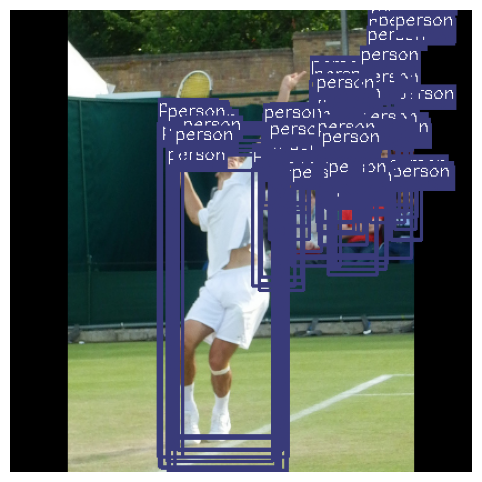

  0%|          | 2/17432 [00:37<75:25:59, 15.58s/it, loss=1.88] 

batch_idx: 1
batch_idx: 2


  0%|          | 4/17432 [00:38<25:12:10,  5.21s/it, loss=1.75]

batch_idx: 3
batch_idx: 4


  0%|          | 6/17432 [00:38<10:58:57,  2.27s/it, loss=1.64]

batch_idx: 5
batch_idx: 6


  0%|          | 8/17432 [00:38<5:21:15,  1.11s/it, loss=1.5]  

batch_idx: 7
batch_idx: 8


  0%|          | 10/17432 [00:38<2:51:27,  1.69it/s, loss=1.51]

batch_idx: 9
batch_idx: 10


  0%|          | 12/17432 [00:38<1:40:47,  2.88it/s, loss=1.48]

batch_idx: 11
batch_idx: 12


  0%|          | 14/17432 [00:39<1:07:31,  4.30it/s, loss=1.49]

batch_idx: 13
batch_idx: 14


  0%|          | 16/17432 [00:39<50:58,  5.70it/s, loss=1.54]  

batch_idx: 15
batch_idx: 16


  0%|          | 18/17432 [00:39<43:27,  6.68it/s, loss=1.65]

batch_idx: 17
batch_idx: 18


  0%|          | 20/17432 [00:39<39:08,  7.41it/s, loss=1.61]

batch_idx: 19


  0%|          | 21/17432 [00:42<4:28:54,  1.08it/s, loss=1.63]

batch_idx: 20


  0%|          | 22/17432 [00:44<5:28:13,  1.13s/it, loss=1.64]

batch_idx: 21
batch_idx: 22


  0%|          | 24/17432 [00:44<2:58:41,  1.62it/s, loss=1.67]

batch_idx: 23


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4af0d71ee0>
Traceback (most recent call last):
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
  0%|          | 25/17432 [00:50<10:24:17,  2.15s/it, loss=1.65]

batch_idx: 24


  0%|          | 26/17432 [00:51<8:42:12,  1.80s/it, loss=1.68] 

batch_idx: 25
batch_idx: 26


  0%|          | 28/17432 [00:51<4:33:54,  1.06it/s, loss=1.72]

batch_idx: 27


  0%|          | 29/17432 [00:56<10:58:55,  2.27s/it, loss=1.71]

batch_idx: 28


  0%|          | 30/17432 [00:58<9:55:22,  2.05s/it, loss=1.72] 

batch_idx: 29
batch_idx: 30


  0%|          | 32/17432 [00:58<5:10:17,  1.07s/it, loss=1.7] 

batch_idx: 31


  0%|          | 33/17432 [01:04<11:34:08,  2.39s/it, loss=1.69]

batch_idx: 32


  0%|          | 34/17432 [01:05<9:37:24,  1.99s/it, loss=1.72] 

batch_idx: 33
batch_idx: 34


  0%|          | 36/17432 [01:05<5:00:59,  1.04s/it, loss=1.7] 

batch_idx: 35


  0%|          | 37/17432 [01:11<11:54:01,  2.46s/it, loss=1.71]

batch_idx: 36


  0%|          | 38/17432 [01:12<9:56:09,  2.06s/it, loss=1.7]  

batch_idx: 37
batch_idx: 38


  0%|          | 40/17432 [01:12<5:09:49,  1.07s/it, loss=1.67]

batch_idx: 39


  0%|          | 41/17432 [01:18<11:24:14,  2.36s/it, loss=1.67]

batch_idx: 40


  0%|          | 42/17432 [01:19<10:02:58,  2.08s/it, loss=1.68]

batch_idx: 41
batch_idx: 42


  0%|          | 44/17432 [01:19<5:13:11,  1.08s/it, loss=1.71] 

batch_idx: 43


  0%|          | 45/17432 [01:25<11:48:00,  2.44s/it, loss=1.74]

batch_idx: 44


  0%|          | 46/17432 [01:26<9:45:59,  2.02s/it, loss=1.75] 

batch_idx: 45
batch_idx: 46


  0%|          | 48/17432 [01:26<5:04:57,  1.05s/it, loss=1.78]

batch_idx: 47


  0%|          | 49/17432 [01:32<11:58:58,  2.48s/it, loss=1.78]

batch_idx: 48


  0%|          | 50/17432 [01:33<9:24:23,  1.95s/it, loss=1.8]  

batch_idx: 49
batch_idx: 50


  0%|          | 52/17432 [01:33<4:54:38,  1.02s/it, loss=1.79]

batch_idx: 51


  0%|          | 53/17432 [01:39<12:27:57,  2.58s/it, loss=1.78]

batch_idx: 52


  0%|          | 54/17432 [01:39<9:14:35,  1.91s/it, loss=1.78] 

batch_idx: 53
batch_idx: 54


  0%|          | 56/17432 [01:40<4:49:34,  1.00it/s, loss=1.77]

batch_idx: 55


  0%|          | 57/17432 [01:46<12:53:45,  2.67s/it, loss=1.79]

batch_idx: 56


  0%|          | 58/17432 [01:47<9:36:57,  1.99s/it, loss=1.78] 

batch_idx: 57
batch_idx: 58


  0%|          | 60/17432 [01:47<5:00:21,  1.04s/it, loss=1.77]

batch_idx: 59


  0%|          | 61/17432 [01:53<12:39:53,  2.62s/it, loss=1.78]

batch_idx: 60
batch_idx: 61


  0%|          | 63/17432 [01:54<6:34:33,  1.36s/it, loss=1.77] 

batch_idx: 62
batch_idx: 63


  0%|          | 65/17432 [02:00<13:08:23,  2.72s/it, loss=1.78]

batch_idx: 64
batch_idx: 65


  0%|          | 67/17432 [02:01<6:44:07,  1.40s/it, loss=1.79] 

batch_idx: 66
batch_idx: 67


  0%|          | 69/17432 [02:08<13:12:10,  2.74s/it, loss=1.78]

batch_idx: 68
batch_idx: 69


  0%|          | 71/17432 [02:08<6:48:50,  1.41s/it, loss=1.79] 

batch_idx: 70
batch_idx: 71


  0%|          | 73/17432 [02:14<12:41:42,  2.63s/it, loss=1.8]

batch_idx: 72


  0%|          | 74/17432 [02:15<9:32:43,  1.98s/it, loss=1.81] 

batch_idx: 73
batch_idx: 74


  0%|          | 76/17432 [02:15<4:58:32,  1.03s/it, loss=1.82]

batch_idx: 75


  0%|          | 77/17432 [02:21<12:19:58,  2.56s/it, loss=1.82]

batch_idx: 76


  0%|          | 78/17432 [02:21<8:56:36,  1.86s/it, loss=1.81] 

batch_idx: 77
batch_idx: 78


  0%|          | 80/17432 [02:22<4:40:39,  1.03it/s, loss=1.81]

batch_idx: 79


  0%|          | 81/17432 [02:28<12:43:38,  2.64s/it, loss=1.81]

batch_idx: 80
batch_idx: 81


  0%|          | 83/17432 [02:28<6:36:07,  1.37s/it, loss=1.81] 

batch_idx: 82
batch_idx: 83


  0%|          | 85/17432 [02:35<12:41:01,  2.63s/it, loss=1.84]

batch_idx: 84
batch_idx: 85


  0%|          | 87/17432 [02:35<6:35:01,  1.37s/it, loss=1.84] 

batch_idx: 86
batch_idx: 87


  1%|          | 89/17432 [02:42<12:17:39,  2.55s/it, loss=1.83]

batch_idx: 88


  1%|          | 90/17432 [02:42<9:42:43,  2.02s/it, loss=1.83] 

batch_idx: 89
batch_idx: 90


  1%|          | 92/17432 [02:43<5:03:28,  1.05s/it, loss=1.82]

batch_idx: 91


  1%|          | 93/17432 [02:49<12:11:54,  2.53s/it, loss=1.82]

batch_idx: 92


  1%|          | 94/17432 [02:49<9:19:29,  1.94s/it, loss=1.83] 

batch_idx: 93
batch_idx: 94


  1%|          | 96/17432 [02:49<4:52:04,  1.01s/it, loss=1.83]

batch_idx: 95


  1%|          | 97/17432 [02:56<12:37:45,  2.62s/it, loss=1.83]

batch_idx: 96


  1%|          | 98/17432 [02:56<9:34:55,  1.99s/it, loss=1.82] 

batch_idx: 97
batch_idx: 98


  1%|          | 100/17432 [02:57<4:59:59,  1.04s/it, loss=1.82]

batch_idx: 99


  1%|          | 101/17432 [03:03<12:17:19,  2.55s/it, loss=1.82]

batch_idx: 100


  1%|          | 102/17432 [03:03<9:29:05,  1.97s/it, loss=1.83] 

batch_idx: 101
batch_idx: 102


  1%|          | 104/17432 [03:04<4:56:54,  1.03s/it, loss=1.83]

batch_idx: 103


  1%|          | 105/17432 [03:10<12:27:11,  2.59s/it, loss=1.82]

batch_idx: 104


  1%|          | 106/17432 [03:10<9:32:10,  1.98s/it, loss=1.83] 

batch_idx: 105
batch_idx: 106


  1%|          | 108/17432 [03:11<4:58:53,  1.04s/it, loss=1.82]

batch_idx: 107


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4af0d71ee0>
Traceback (most recent call last):
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
  1%|          | 109/17432 [03:17<13:11:23,  2.74s/it, loss=1.82]

batch_idx: 108
batch_idx: 109


  1%|          | 111/17432 [03:18<6:45:30,  1.40s/it, loss=1.82] 

batch_idx: 110


  1%|          | 112/17432 [03:18<5:32:51,  1.15s/it, loss=1.84]

batch_idx: 111


  1%|          | 113/17432 [03:24<12:41:03,  2.64s/it, loss=1.83]

batch_idx: 112
batch_idx: 113


  1%|          | 115/17432 [03:24<6:30:47,  1.35s/it, loss=1.84] 

batch_idx: 114


  1%|          | 116/17432 [03:25<5:59:48,  1.25s/it, loss=1.84]

batch_idx: 115


  1%|          | 117/17432 [03:31<12:17:51,  2.56s/it, loss=1.85]

batch_idx: 116


  1%|          | 118/17432 [03:31<8:56:59,  1.86s/it, loss=1.85] 

batch_idx: 117
batch_idx: 118


  1%|          | 120/17432 [03:32<6:00:06,  1.25s/it, loss=1.85]

batch_idx: 119


  1%|          | 121/17432 [03:38<12:02:05,  2.50s/it, loss=1.84]

batch_idx: 120
batch_idx: 121


  1%|          | 123/17432 [03:38<6:12:13,  1.29s/it, loss=1.84] 

batch_idx: 122


  1%|          | 124/17432 [03:39<6:02:30,  1.26s/it, loss=1.84]

batch_idx: 123


  1%|          | 125/17432 [03:45<12:19:13,  2.56s/it, loss=1.85]

batch_idx: 124
batch_idx: 125


  1%|          | 127/17432 [03:45<6:20:01,  1.32s/it, loss=1.84] 

batch_idx: 126


  1%|          | 128/17432 [03:47<6:49:22,  1.42s/it, loss=1.84]

batch_idx: 127


  1%|          | 129/17432 [03:52<11:57:56,  2.49s/it, loss=1.84]

batch_idx: 128
batch_idx: 129


  1%|          | 131/17432 [03:52<6:09:34,  1.28s/it, loss=1.84] 

batch_idx: 130


  1%|          | 132/17432 [03:54<6:36:26,  1.37s/it, loss=1.83]

batch_idx: 131


  1%|          | 133/17432 [03:58<10:50:27,  2.26s/it, loss=1.83]

batch_idx: 132


  1%|          | 134/17432 [03:58<8:05:09,  1.68s/it, loss=1.83] 

batch_idx: 133


  1%|          | 135/17432 [03:59<7:21:19,  1.53s/it, loss=1.83]

batch_idx: 134


  1%|          | 136/17432 [04:01<6:49:07,  1.42s/it, loss=1.83]

batch_idx: 135


  1%|          | 137/17432 [04:05<11:02:24,  2.30s/it, loss=1.84]

batch_idx: 136


  1%|          | 138/17432 [04:05<8:10:20,  1.70s/it, loss=1.83] 

batch_idx: 137


  1%|          | 139/17432 [04:06<6:36:50,  1.38s/it, loss=1.84]

batch_idx: 138


  1%|          | 140/17432 [04:08<7:17:52,  1.52s/it, loss=1.84]

batch_idx: 139


  1%|          | 141/17432 [04:12<11:49:31,  2.46s/it, loss=1.83]

batch_idx: 140
batch_idx: 141


  1%|          | 143/17432 [04:13<6:34:16,  1.37s/it, loss=1.84] 

batch_idx: 142


  1%|          | 144/17432 [04:15<7:02:08,  1.47s/it, loss=1.83]

batch_idx: 143


  1%|          | 145/17432 [04:20<11:56:13,  2.49s/it, loss=1.83]

batch_idx: 144


  1%|          | 146/17432 [04:20<8:53:32,  1.85s/it, loss=1.83] 

batch_idx: 145
batch_idx: 146


  1%|          | 148/17432 [04:21<6:31:20,  1.36s/it, loss=1.83]

batch_idx: 147


  1%|          | 149/17432 [04:26<11:06:31,  2.31s/it, loss=1.82]

batch_idx: 148


  1%|          | 150/17432 [04:27<8:49:29,  1.84s/it, loss=1.82] 

batch_idx: 149


  1%|          | 151/17432 [04:27<6:48:44,  1.42s/it, loss=1.82]

batch_idx: 150


  1%|          | 152/17432 [04:29<6:42:41,  1.40s/it, loss=1.82]

batch_idx: 151


  1%|          | 153/17432 [04:33<11:36:22,  2.42s/it, loss=1.83]

batch_idx: 152


  1%|          | 154/17432 [04:34<9:02:15,  1.88s/it, loss=1.82] 

batch_idx: 153
batch_idx: 154


  1%|          | 156/17432 [04:36<7:16:17,  1.52s/it, loss=1.81]

batch_idx: 155


  1%|          | 157/17432 [04:41<12:07:57,  2.53s/it, loss=1.82]

batch_idx: 156
batch_idx: 157


  1%|          | 159/17432 [04:41<6:14:35,  1.30s/it, loss=1.82] 

batch_idx: 158


  1%|          | 160/17432 [04:43<7:06:39,  1.48s/it, loss=1.82]

batch_idx: 159


  1%|          | 161/17432 [04:48<11:58:59,  2.50s/it, loss=1.82]

batch_idx: 160
batch_idx: 161


  1%|          | 163/17432 [04:48<6:14:10,  1.30s/it, loss=1.81] 

batch_idx: 162


  1%|          | 164/17432 [04:50<6:54:28,  1.44s/it, loss=1.82]

batch_idx: 163


  1%|          | 165/17432 [04:55<11:36:37,  2.42s/it, loss=1.81]

batch_idx: 164


  1%|          | 166/17432 [04:56<9:23:22,  1.96s/it, loss=1.81] 

batch_idx: 165
batch_idx: 166


  1%|          | 168/17432 [04:57<6:49:08,  1.42s/it, loss=1.83]

batch_idx: 167


  1%|          | 169/17432 [05:02<11:11:42,  2.33s/it, loss=1.83]

batch_idx: 168


  1%|          | 170/17432 [05:02<8:43:06,  1.82s/it, loss=1.82] 

batch_idx: 169
batch_idx: 170


  1%|          | 172/17432 [05:04<7:13:43,  1.51s/it, loss=1.83]

batch_idx: 171


  1%|          | 173/17432 [05:09<11:05:08,  2.31s/it, loss=1.83]

batch_idx: 172


  1%|          | 174/17432 [05:09<8:48:54,  1.84s/it, loss=1.83] 

batch_idx: 173
batch_idx: 174


  1%|          | 176/17432 [05:12<7:32:54,  1.57s/it, loss=1.82]

batch_idx: 175


  1%|          | 177/17432 [05:16<11:12:01,  2.34s/it, loss=1.82]

batch_idx: 176


  1%|          | 178/17432 [05:17<9:38:55,  2.01s/it, loss=1.82] 

batch_idx: 177
batch_idx: 178


  1%|          | 180/17432 [05:18<6:42:14,  1.40s/it, loss=1.81]

batch_idx: 179


  1%|          | 181/17432 [05:23<11:31:52,  2.41s/it, loss=1.81]

batch_idx: 180


  1%|          | 182/17432 [05:24<9:19:11,  1.95s/it, loss=1.8]  

batch_idx: 181
batch_idx: 182


  1%|          | 184/17432 [05:25<5:58:44,  1.25s/it, loss=1.8]

batch_idx: 183


  1%|          | 185/17432 [05:30<11:36:35,  2.42s/it, loss=1.8]

batch_idx: 184


  1%|          | 186/17432 [05:31<9:16:41,  1.94s/it, loss=1.8] 

batch_idx: 185
batch_idx: 186


  1%|          | 188/17432 [05:32<6:03:33,  1.26s/it, loss=1.8]

batch_idx: 187


  1%|          | 189/17432 [05:38<12:13:51,  2.55s/it, loss=1.8]

batch_idx: 188


  1%|          | 190/17432 [05:38<9:28:47,  1.98s/it, loss=1.8] 

batch_idx: 189
batch_idx: 190


  1%|          | 192/17432 [05:39<5:07:54,  1.07s/it, loss=1.79]

batch_idx: 191


  1%|          | 193/17432 [05:44<11:36:56,  2.43s/it, loss=1.79]

batch_idx: 192


  1%|          | 194/17432 [05:45<9:00:57,  1.88s/it, loss=1.79] 

batch_idx: 193
batch_idx: 194


  1%|          | 196/17432 [05:46<5:30:51,  1.15s/it, loss=1.79]

batch_idx: 195


  1%|          | 197/17432 [05:51<11:32:05,  2.41s/it, loss=1.8]

batch_idx: 196


  1%|          | 198/17432 [05:52<9:52:50,  2.06s/it, loss=1.8] 

batch_idx: 197
batch_idx: 198


  1%|          | 200/17432 [05:53<5:44:08,  1.20s/it, loss=1.8]

batch_idx: 199


  1%|          | 200/17432 [05:58<5:44:08,  1.20s/it, loss=1.8]

batch_idx: 200
==> Saving checkpoint


  1%|          | 202/17432 [06:05<14:43:30,  3.08s/it, loss=1.8]

batch_idx: 201
batch_idx: 202


  1%|          | 204/17432 [06:05<7:30:51,  1.57s/it, loss=1.8] 

batch_idx: 203
batch_idx: 204


  1%|          | 206/17432 [06:07<6:12:02,  1.30s/it, loss=1.8]

batch_idx: 205
batch_idx: 206


  1%|          | 208/17432 [06:07<3:36:36,  1.33it/s, loss=1.81]

batch_idx: 207


  1%|          | 209/17432 [06:12<9:45:42,  2.04s/it, loss=1.81]

batch_idx: 208


  1%|          | 210/17432 [06:14<9:39:41,  2.02s/it, loss=1.81]

batch_idx: 209
batch_idx: 210


  1%|          | 212/17432 [06:15<5:12:43,  1.09s/it, loss=1.81]

batch_idx: 211


  1%|          | 213/17432 [06:20<10:48:53,  2.26s/it, loss=1.81]

batch_idx: 212


  1%|          | 214/17432 [06:21<9:53:39,  2.07s/it, loss=1.81] 

batch_idx: 213
batch_idx: 214


  1%|          | 216/17432 [06:21<5:08:29,  1.08s/it, loss=1.81]

batch_idx: 215


  1%|          | 217/17432 [06:27<11:12:18,  2.34s/it, loss=1.81]

batch_idx: 216


  1%|▏         | 218/17432 [06:28<10:06:33,  2.11s/it, loss=1.81]

batch_idx: 217
batch_idx: 218


  1%|▏         | 220/17432 [06:28<5:14:36,  1.10s/it, loss=1.8]  

batch_idx: 219


  1%|▏         | 221/17432 [06:34<11:24:29,  2.39s/it, loss=1.81]

batch_idx: 220


  1%|▏         | 222/17432 [06:35<10:14:31,  2.14s/it, loss=1.8] 

batch_idx: 221
batch_idx: 222


  1%|▏         | 224/17432 [06:36<5:18:35,  1.11s/it, loss=1.8] 

batch_idx: 223


  1%|▏         | 225/17432 [06:41<10:54:11,  2.28s/it, loss=1.8]

batch_idx: 224


  1%|▏         | 226/17432 [06:42<9:57:05,  2.08s/it, loss=1.8] 

batch_idx: 225
batch_idx: 226


  1%|▏         | 228/17432 [06:43<5:10:06,  1.08s/it, loss=1.8]

batch_idx: 227


  1%|▏         | 229/17432 [06:47<10:28:09,  2.19s/it, loss=1.8]

batch_idx: 228


  1%|▏         | 230/17432 [06:50<10:44:11,  2.25s/it, loss=1.8]

batch_idx: 229
batch_idx: 230


  1%|▏         | 232/17432 [06:50<5:33:16,  1.16s/it, loss=1.8] 

batch_idx: 231


  1%|▏         | 233/17432 [06:54<10:13:32,  2.14s/it, loss=1.8]

batch_idx: 232


  1%|▏         | 234/17432 [06:57<10:55:41,  2.29s/it, loss=1.8]

batch_idx: 233
batch_idx: 234


  1%|▏         | 236/17432 [06:57<5:38:51,  1.18s/it, loss=1.8] 

batch_idx: 235


  1%|▏         | 237/17432 [07:01<9:48:54,  2.05s/it, loss=1.8]

batch_idx: 236


  1%|▏         | 238/17432 [07:04<11:22:19,  2.38s/it, loss=1.81]

batch_idx: 237
batch_idx: 238


  1%|▏         | 240/17432 [07:05<5:51:51,  1.23s/it, loss=1.81] 

batch_idx: 239


  1%|▏         | 241/17432 [07:08<8:56:37,  1.87s/it, loss=1.81]

batch_idx: 240


  1%|▏         | 242/17432 [07:12<11:23:38,  2.39s/it, loss=1.81]

batch_idx: 241
batch_idx: 242


  1%|▏         | 244/17432 [07:12<5:52:33,  1.23s/it, loss=1.81] 

batch_idx: 243


  1%|▏         | 245/17432 [07:15<8:59:07,  1.88s/it, loss=1.8] 

batch_idx: 244


  1%|▏         | 246/17432 [07:19<11:43:15,  2.46s/it, loss=1.8]

batch_idx: 245
batch_idx: 246


  1%|▏         | 248/17432 [07:19<6:02:14,  1.26s/it, loss=1.8] 

batch_idx: 247


  1%|▏         | 249/17432 [07:22<8:24:35,  1.76s/it, loss=1.8]

batch_idx: 248


  1%|▏         | 250/17432 [07:26<11:20:38,  2.38s/it, loss=1.81]

batch_idx: 249
batch_idx: 250


  1%|▏         | 252/17432 [07:26<5:51:03,  1.23s/it, loss=1.8]  

batch_idx: 251


  1%|▏         | 253/17432 [07:30<8:50:57,  1.85s/it, loss=1.8]

batch_idx: 252


  1%|▏         | 254/17432 [07:33<10:52:18,  2.28s/it, loss=1.8]

batch_idx: 253
batch_idx: 254


  1%|▏         | 256/17432 [07:33<5:37:08,  1.18s/it, loss=1.8] 

batch_idx: 255


  1%|▏         | 257/17432 [07:36<8:05:16,  1.70s/it, loss=1.8]

batch_idx: 256


  1%|▏         | 258/17432 [07:40<11:35:01,  2.43s/it, loss=1.8]

batch_idx: 257
batch_idx: 258


  1%|▏         | 260/17432 [07:40<5:58:04,  1.25s/it, loss=1.8] 

batch_idx: 259


  1%|▏         | 261/17432 [07:43<7:59:17,  1.67s/it, loss=1.8]

batch_idx: 260


  2%|▏         | 262/17432 [07:47<11:39:56,  2.45s/it, loss=1.8]

batch_idx: 261
batch_idx: 262


  2%|▏         | 264/17432 [07:48<6:00:21,  1.26s/it, loss=1.8] 

batch_idx: 263


  2%|▏         | 265/17432 [07:50<7:27:11,  1.56s/it, loss=1.8]

batch_idx: 264


  2%|▏         | 266/17432 [07:55<11:53:25,  2.49s/it, loss=1.8]

batch_idx: 265
batch_idx: 266


  2%|▏         | 268/17432 [07:55<6:07:16,  1.28s/it, loss=1.79]

batch_idx: 267


  2%|▏         | 269/17432 [07:57<7:42:46,  1.62s/it, loss=1.79]

batch_idx: 268


  2%|▏         | 270/17432 [08:01<10:58:05,  2.30s/it, loss=1.79]

batch_idx: 269
batch_idx: 270


  2%|▏         | 272/17432 [08:01<5:40:11,  1.19s/it, loss=1.79] 

batch_idx: 271


  2%|▏         | 273/17432 [08:04<7:43:40,  1.62s/it, loss=1.79]

batch_idx: 272


  2%|▏         | 274/17432 [08:09<12:07:54,  2.55s/it, loss=1.79]

batch_idx: 273
batch_idx: 274


  2%|▏         | 276/17432 [08:09<6:14:24,  1.31s/it, loss=1.79] 

batch_idx: 275


  2%|▏         | 277/17432 [08:11<7:17:20,  1.53s/it, loss=1.79]

batch_idx: 276


  2%|▏         | 278/17432 [08:15<11:28:35,  2.41s/it, loss=1.8]

batch_idx: 277
batch_idx: 278


  2%|▏         | 280/17432 [08:16<5:55:03,  1.24s/it, loss=1.79] 

batch_idx: 279


  2%|▏         | 281/17432 [08:18<7:54:31,  1.66s/it, loss=1.79]

batch_idx: 280


  2%|▏         | 282/17432 [08:22<11:05:46,  2.33s/it, loss=1.79]

batch_idx: 281
batch_idx: 282


  2%|▏         | 284/17432 [08:22<5:43:51,  1.20s/it, loss=1.79] 

batch_idx: 283


  2%|▏         | 285/17432 [08:25<7:54:06,  1.66s/it, loss=1.79]

batch_idx: 284


  2%|▏         | 286/17432 [08:29<11:08:15,  2.34s/it, loss=1.79]

batch_idx: 285
batch_idx: 286


  2%|▏         | 288/17432 [08:29<5:44:53,  1.21s/it, loss=1.79] 

batch_idx: 287


  2%|▏         | 289/17432 [08:32<8:09:33,  1.71s/it, loss=1.79]

batch_idx: 288


  2%|▏         | 290/17432 [08:36<11:08:15,  2.34s/it, loss=1.79]

batch_idx: 289
batch_idx: 290


  2%|▏         | 292/17432 [08:36<5:44:47,  1.21s/it, loss=1.79] 

batch_idx: 291


  2%|▏         | 293/17432 [08:39<8:26:54,  1.77s/it, loss=1.79]

batch_idx: 292


  2%|▏         | 294/17432 [08:43<11:30:47,  2.42s/it, loss=1.79]

batch_idx: 293
batch_idx: 294


  2%|▏         | 296/17432 [08:43<5:56:33,  1.25s/it, loss=1.79] 

batch_idx: 295


  2%|▏         | 297/17432 [08:46<7:53:47,  1.66s/it, loss=1.79]

batch_idx: 296


  2%|▏         | 298/17432 [08:50<11:42:10,  2.46s/it, loss=1.79]

batch_idx: 297
batch_idx: 298


  2%|▏         | 300/17432 [08:51<6:01:37,  1.27s/it, loss=1.79] 

batch_idx: 299


  2%|▏         | 301/17432 [08:53<8:00:24,  1.68s/it, loss=1.79]

batch_idx: 300


  2%|▏         | 302/17432 [08:58<11:57:46,  2.51s/it, loss=1.79]

batch_idx: 301
batch_idx: 302


  2%|▏         | 304/17432 [08:58<6:09:20,  1.29s/it, loss=1.79] 

batch_idx: 303


  2%|▏         | 305/17432 [09:01<8:30:31,  1.79s/it, loss=1.79]

batch_idx: 304


  2%|▏         | 306/17432 [09:05<11:21:36,  2.39s/it, loss=1.8]

batch_idx: 305
batch_idx: 306


  2%|▏         | 308/17432 [09:05<5:51:24,  1.23s/it, loss=1.8]  

batch_idx: 307


  2%|▏         | 309/17432 [09:08<8:06:41,  1.71s/it, loss=1.8]

batch_idx: 308


  2%|▏         | 310/17432 [09:12<11:23:14,  2.39s/it, loss=1.8]

batch_idx: 309
batch_idx: 310


  2%|▏         | 312/17432 [09:12<5:52:06,  1.23s/it, loss=1.79]

batch_idx: 311


  2%|▏         | 313/17432 [09:15<8:26:43,  1.78s/it, loss=1.79]

batch_idx: 312


  2%|▏         | 314/17432 [09:19<11:26:23,  2.41s/it, loss=1.79]

batch_idx: 313
batch_idx: 314


  2%|▏         | 316/17432 [09:19<5:53:48,  1.24s/it, loss=1.79] 

batch_idx: 315


  2%|▏         | 317/17432 [09:22<8:30:28,  1.79s/it, loss=1.79]

batch_idx: 316


  2%|▏         | 318/17432 [09:26<11:39:17,  2.45s/it, loss=1.79]

batch_idx: 317
batch_idx: 318


  2%|▏         | 320/17432 [09:27<6:00:10,  1.26s/it, loss=1.79] 

batch_idx: 319


  2%|▏         | 321/17432 [09:29<7:55:16,  1.67s/it, loss=1.79]

batch_idx: 320


  2%|▏         | 322/17432 [09:33<10:56:55,  2.30s/it, loss=1.79]

batch_idx: 321
batch_idx: 322


  2%|▏         | 324/17432 [09:33<5:39:18,  1.19s/it, loss=1.79] 

batch_idx: 323


  2%|▏         | 325/17432 [09:36<7:38:18,  1.61s/it, loss=1.79]

batch_idx: 324


  2%|▏         | 326/17432 [09:40<11:37:26,  2.45s/it, loss=1.79]

batch_idx: 325
batch_idx: 326


  2%|▏         | 328/17432 [09:40<5:59:08,  1.26s/it, loss=1.79] 

batch_idx: 327


  2%|▏         | 329/17432 [09:42<7:06:35,  1.50s/it, loss=1.79]

batch_idx: 328


  2%|▏         | 330/17432 [09:48<12:20:26,  2.60s/it, loss=1.79]

batch_idx: 329
batch_idx: 330


  2%|▏         | 332/17432 [09:48<6:20:14,  1.33s/it, loss=1.79] 

batch_idx: 331


  2%|▏         | 333/17432 [09:49<6:35:27,  1.39s/it, loss=1.79]

batch_idx: 332


  2%|▏         | 334/17432 [09:58<17:26:40,  3.67s/it, loss=1.79]

batch_idx: 333
batch_idx: 334


  2%|▏         | 336/17432 [09:59<8:50:09,  1.86s/it, loss=1.79] 

batch_idx: 335
batch_idx: 336


  2%|▏         | 338/17432 [10:05<13:04:43,  2.75s/it, loss=1.79]

batch_idx: 337
batch_idx: 338


  2%|▏         | 340/17432 [10:05<6:41:50,  1.41s/it, loss=1.79] 

batch_idx: 339
batch_idx: 340


  2%|▏         | 342/17432 [10:12<12:39:30,  2.67s/it, loss=1.79]

batch_idx: 341
batch_idx: 342


  2%|▏         | 344/17432 [10:12<6:30:10,  1.37s/it, loss=1.79] 

batch_idx: 343
batch_idx: 344


  2%|▏         | 346/17432 [10:19<13:30:17,  2.85s/it, loss=1.79]

batch_idx: 345
batch_idx: 346


  2%|▏         | 348/17432 [10:19<6:54:31,  1.46s/it, loss=1.79] 

batch_idx: 347
batch_idx: 348


  2%|▏         | 350/17432 [10:27<13:40:52,  2.88s/it, loss=1.79]

batch_idx: 349
batch_idx: 350


  2%|▏         | 352/17432 [10:27<6:59:54,  1.48s/it, loss=1.79] 

batch_idx: 351
batch_idx: 352


  2%|▏         | 354/17432 [10:33<12:43:57,  2.68s/it, loss=1.79]

batch_idx: 353
batch_idx: 354


  2%|▏         | 356/17432 [10:34<6:31:58,  1.38s/it, loss=1.79] 

batch_idx: 355
batch_idx: 356


  2%|▏         | 358/17432 [10:40<12:26:33,  2.62s/it, loss=1.79]

batch_idx: 357
batch_idx: 358


  2%|▏         | 360/17432 [10:41<6:23:25,  1.35s/it, loss=1.78] 

batch_idx: 359
batch_idx: 360


  2%|▏         | 362/17432 [10:48<13:02:14,  2.75s/it, loss=1.79]

batch_idx: 361
batch_idx: 362


  2%|▏         | 364/17432 [10:48<6:40:38,  1.41s/it, loss=1.79] 

batch_idx: 363
batch_idx: 364


  2%|▏         | 366/17432 [10:55<13:13:16,  2.79s/it, loss=1.79]

batch_idx: 365
batch_idx: 366


  2%|▏         | 368/17432 [10:55<6:46:08,  1.43s/it, loss=1.79] 

batch_idx: 367
batch_idx: 368


  2%|▏         | 370/17432 [11:02<12:58:15,  2.74s/it, loss=1.79]

batch_idx: 369
batch_idx: 370


  2%|▏         | 372/17432 [11:02<6:38:59,  1.40s/it, loss=1.79] 

batch_idx: 371
batch_idx: 372


  2%|▏         | 374/17432 [11:09<13:00:12,  2.74s/it, loss=1.79]

batch_idx: 373
batch_idx: 374


  2%|▏         | 376/17432 [11:09<6:40:22,  1.41s/it, loss=1.79] 

batch_idx: 375
batch_idx: 376


  2%|▏         | 378/17432 [11:16<12:25:48,  2.62s/it, loss=1.79]

batch_idx: 377
batch_idx: 378


  2%|▏         | 380/17432 [11:16<6:23:31,  1.35s/it, loss=1.79] 

batch_idx: 379
batch_idx: 380


  2%|▏         | 382/17432 [11:22<12:19:51,  2.60s/it, loss=1.79]

batch_idx: 381
batch_idx: 382


  2%|▏         | 384/17432 [11:23<6:20:21,  1.34s/it, loss=1.79] 

batch_idx: 383
batch_idx: 384


  2%|▏         | 386/17432 [11:29<12:33:21,  2.65s/it, loss=1.79]

batch_idx: 385
batch_idx: 386


  2%|▏         | 388/17432 [11:30<6:26:35,  1.36s/it, loss=1.8]  

batch_idx: 387
batch_idx: 388


  2%|▏         | 390/17432 [11:37<13:00:43,  2.75s/it, loss=1.8]

batch_idx: 389
batch_idx: 390


  2%|▏         | 392/17432 [11:37<6:39:57,  1.41s/it, loss=1.8] 

batch_idx: 391
batch_idx: 392


  2%|▏         | 394/17432 [11:44<13:05:03,  2.76s/it, loss=1.8]

batch_idx: 393
batch_idx: 394


  2%|▏         | 396/17432 [11:44<6:42:00,  1.42s/it, loss=1.8] 

batch_idx: 395
batch_idx: 396


  2%|▏         | 398/17432 [11:51<13:23:03,  2.83s/it, loss=1.81]

batch_idx: 397
batch_idx: 398


  2%|▏         | 400/17432 [11:51<6:51:26,  1.45s/it, loss=1.81] 

batch_idx: 399
batch_idx: 400


  2%|▏         | 400/17432 [11:52<6:51:26,  1.45s/it, loss=1.81]

==> Saving checkpoint


  2%|▏         | 402/17432 [11:58<10:14:18,  2.16s/it, loss=1.81]

batch_idx: 401
batch_idx: 402


  2%|▏         | 404/17432 [11:59<5:18:18,  1.12s/it, loss=1.81] 

batch_idx: 403
batch_idx: 404


  2%|▏         | 406/17432 [12:06<12:35:51,  2.66s/it, loss=1.81]

batch_idx: 405
batch_idx: 406


  2%|▏         | 408/17432 [12:06<6:28:09,  1.37s/it, loss=1.81] 

batch_idx: 407
batch_idx: 408


  2%|▏         | 410/17432 [12:13<12:43:54,  2.69s/it, loss=1.81]

batch_idx: 409
batch_idx: 410


  2%|▏         | 412/17432 [12:13<6:31:50,  1.38s/it, loss=1.81] 

batch_idx: 411
batch_idx: 412


  2%|▏         | 414/17432 [12:20<13:38:15,  2.88s/it, loss=1.81]

batch_idx: 413
batch_idx: 414


  2%|▏         | 416/17432 [12:20<6:58:27,  1.48s/it, loss=1.81] 

batch_idx: 415
batch_idx: 416


  2%|▏         | 418/17432 [12:28<13:38:52,  2.89s/it, loss=1.8]

batch_idx: 417
batch_idx: 418


  2%|▏         | 420/17432 [12:28<6:58:59,  1.48s/it, loss=1.81] 

batch_idx: 419
batch_idx: 420


  2%|▏         | 422/17432 [12:35<13:10:35,  2.79s/it, loss=1.8]

batch_idx: 421
batch_idx: 422


  2%|▏         | 424/17432 [12:35<6:44:53,  1.43s/it, loss=1.81]

batch_idx: 423
batch_idx: 424


  2%|▏         | 426/17432 [12:42<12:32:35,  2.66s/it, loss=1.81]

batch_idx: 425
batch_idx: 426


  2%|▏         | 428/17432 [12:42<6:26:03,  1.36s/it, loss=1.81] 

batch_idx: 427
batch_idx: 428


  2%|▏         | 430/17432 [12:49<12:23:54,  2.63s/it, loss=1.81]

batch_idx: 429
batch_idx: 430


  2%|▏         | 432/17432 [12:49<6:22:12,  1.35s/it, loss=1.81] 

batch_idx: 431
batch_idx: 432


  2%|▏         | 434/17432 [12:55<12:07:23,  2.57s/it, loss=1.81]

batch_idx: 433
batch_idx: 434


  3%|▎         | 436/17432 [12:55<6:13:56,  1.32s/it, loss=1.81] 

batch_idx: 435
batch_idx: 436


  3%|▎         | 438/17432 [13:02<13:00:10,  2.75s/it, loss=1.81]

batch_idx: 437
batch_idx: 438


  3%|▎         | 440/17432 [13:03<6:39:48,  1.41s/it, loss=1.81] 

batch_idx: 439
batch_idx: 440


  3%|▎         | 442/17432 [13:10<13:30:37,  2.86s/it, loss=1.81]

batch_idx: 441
batch_idx: 442


  3%|▎         | 444/17432 [13:10<6:54:36,  1.46s/it, loss=1.81] 

batch_idx: 443
batch_idx: 444


  3%|▎         | 446/17432 [13:18<14:12:00,  3.01s/it, loss=1.81]

batch_idx: 445
batch_idx: 446


  3%|▎         | 448/17432 [13:18<7:14:50,  1.54s/it, loss=1.81] 

batch_idx: 447
batch_idx: 448


  3%|▎         | 450/17432 [13:25<13:44:21,  2.91s/it, loss=1.81]

batch_idx: 449
batch_idx: 450


  3%|▎         | 452/17432 [13:26<7:01:15,  1.49s/it, loss=1.81] 

batch_idx: 451
batch_idx: 452


  3%|▎         | 454/17432 [13:32<12:50:28,  2.72s/it, loss=1.81]

batch_idx: 453
batch_idx: 454


  3%|▎         | 456/17432 [13:33<6:34:46,  1.40s/it, loss=1.81] 

batch_idx: 455
batch_idx: 456


  3%|▎         | 458/17432 [13:40<13:14:39,  2.81s/it, loss=1.81]

batch_idx: 457
batch_idx: 458


  3%|▎         | 460/17432 [13:40<6:47:23,  1.44s/it, loss=1.81] 

batch_idx: 459
batch_idx: 460


  3%|▎         | 462/17432 [13:46<12:19:17,  2.61s/it, loss=1.81]

batch_idx: 461
batch_idx: 462


  3%|▎         | 464/17432 [13:47<6:20:18,  1.34s/it, loss=1.81] 

batch_idx: 463
batch_idx: 464


  3%|▎         | 466/17432 [13:53<12:31:09,  2.66s/it, loss=1.81]

batch_idx: 465
batch_idx: 466


  3%|▎         | 468/17432 [13:53<6:25:19,  1.36s/it, loss=1.81] 

batch_idx: 467
batch_idx: 468


  3%|▎         | 470/17432 [14:00<12:52:05,  2.73s/it, loss=1.81]

batch_idx: 469
batch_idx: 470


  3%|▎         | 472/17432 [14:01<6:35:30,  1.40s/it, loss=1.82] 

batch_idx: 471
batch_idx: 472


  3%|▎         | 474/17432 [14:07<12:45:23,  2.71s/it, loss=1.82]

batch_idx: 473
batch_idx: 474


  3%|▎         | 476/17432 [14:08<6:32:20,  1.39s/it, loss=1.82] 

batch_idx: 475
batch_idx: 476


  3%|▎         | 478/17432 [14:14<12:29:40,  2.65s/it, loss=1.82]

batch_idx: 477
batch_idx: 478


  3%|▎         | 480/17432 [14:15<6:24:43,  1.36s/it, loss=1.82] 

batch_idx: 479
batch_idx: 480


  3%|▎         | 482/17432 [14:21<12:29:38,  2.65s/it, loss=1.82]

batch_idx: 481
batch_idx: 482


  3%|▎         | 484/17432 [14:21<6:24:29,  1.36s/it, loss=1.81] 

batch_idx: 483
batch_idx: 484


  3%|▎         | 486/17432 [14:29<13:11:40,  2.80s/it, loss=1.81]

batch_idx: 485
batch_idx: 486


  3%|▎         | 488/17432 [14:29<6:45:25,  1.44s/it, loss=1.81] 

batch_idx: 487
batch_idx: 488


  3%|▎         | 490/17432 [14:36<13:07:00,  2.79s/it, loss=1.81]

batch_idx: 489
batch_idx: 490


  3%|▎         | 492/17432 [14:36<6:42:56,  1.43s/it, loss=1.81] 

batch_idx: 491
batch_idx: 492


  3%|▎         | 494/17432 [14:43<13:00:25,  2.76s/it, loss=1.81]

batch_idx: 493
batch_idx: 494


  3%|▎         | 496/17432 [14:43<6:39:39,  1.42s/it, loss=1.81] 

batch_idx: 495
batch_idx: 496


  3%|▎         | 498/17432 [14:50<12:39:44,  2.69s/it, loss=1.81]

batch_idx: 497
batch_idx: 498


  3%|▎         | 500/17432 [14:50<6:29:44,  1.38s/it, loss=1.81] 

batch_idx: 499
batch_idx: 500


  3%|▎         | 502/17432 [14:57<13:22:28,  2.84s/it, loss=1.81]

batch_idx: 501
batch_idx: 502


  3%|▎         | 504/17432 [14:58<6:50:23,  1.45s/it, loss=1.81] 

batch_idx: 503
batch_idx: 504


  3%|▎         | 506/17432 [15:05<13:30:18,  2.87s/it, loss=1.81]

batch_idx: 505
batch_idx: 506


  3%|▎         | 508/17432 [15:05<6:54:29,  1.47s/it, loss=1.81] 

batch_idx: 507
batch_idx: 508


  3%|▎         | 510/17432 [15:12<12:46:43,  2.72s/it, loss=1.81]

batch_idx: 509
batch_idx: 510


  3%|▎         | 512/17432 [15:12<6:33:02,  1.39s/it, loss=1.81] 

batch_idx: 511
batch_idx: 512


  3%|▎         | 514/17432 [15:19<12:33:37,  2.67s/it, loss=1.81]

batch_idx: 513
batch_idx: 514


  3%|▎         | 516/17432 [15:19<6:26:41,  1.37s/it, loss=1.81] 

batch_idx: 515
batch_idx: 516


  3%|▎         | 518/17432 [15:25<12:13:50,  2.60s/it, loss=1.81]

batch_idx: 517
batch_idx: 518


  3%|▎         | 520/17432 [15:26<6:17:14,  1.34s/it, loss=1.81] 

batch_idx: 519
batch_idx: 520


  3%|▎         | 522/17432 [15:33<12:47:16,  2.72s/it, loss=1.81]

batch_idx: 521
batch_idx: 522


  3%|▎         | 524/17432 [15:33<6:33:46,  1.40s/it, loss=1.81] 

batch_idx: 523
batch_idx: 524


  3%|▎         | 526/17432 [15:39<12:15:34,  2.61s/it, loss=1.81]

batch_idx: 525
batch_idx: 526


  3%|▎         | 528/17432 [15:40<6:18:02,  1.34s/it, loss=1.81] 

batch_idx: 527
batch_idx: 528


  3%|▎         | 530/17432 [15:46<11:56:21,  2.54s/it, loss=1.82]

batch_idx: 529
batch_idx: 530


  3%|▎         | 532/17432 [15:46<6:08:13,  1.31s/it, loss=1.82] 

batch_idx: 531
batch_idx: 532


  3%|▎         | 534/17432 [15:53<12:04:26,  2.57s/it, loss=1.82]

batch_idx: 533
batch_idx: 534


  3%|▎         | 536/17432 [15:53<6:12:21,  1.32s/it, loss=1.82] 

batch_idx: 535
batch_idx: 536


  3%|▎         | 538/17432 [16:00<12:41:12,  2.70s/it, loss=1.82]

batch_idx: 537
batch_idx: 538


  3%|▎         | 540/17432 [16:00<6:30:21,  1.39s/it, loss=1.82] 

batch_idx: 539
batch_idx: 540


  3%|▎         | 542/17432 [16:07<12:55:31,  2.75s/it, loss=1.82]

batch_idx: 541
batch_idx: 542


  3%|▎         | 544/17432 [16:07<6:37:19,  1.41s/it, loss=1.82] 

batch_idx: 543
batch_idx: 544


  3%|▎         | 546/17432 [16:14<12:56:08,  2.76s/it, loss=1.82]

batch_idx: 545
batch_idx: 546


  3%|▎         | 548/17432 [16:14<6:37:29,  1.41s/it, loss=1.82] 

batch_idx: 547
batch_idx: 548


  3%|▎         | 550/17432 [16:21<12:25:20,  2.65s/it, loss=1.82]

batch_idx: 549
batch_idx: 550


  3%|▎         | 552/17432 [16:21<6:22:13,  1.36s/it, loss=1.82] 

batch_idx: 551
batch_idx: 552


  3%|▎         | 554/17432 [16:28<12:48:55,  2.73s/it, loss=1.82]

batch_idx: 553
batch_idx: 554


  3%|▎         | 556/17432 [16:28<6:33:52,  1.40s/it, loss=1.81] 

batch_idx: 555
batch_idx: 556


  3%|▎         | 558/17432 [16:36<13:31:06,  2.88s/it, loss=1.82]

batch_idx: 557
batch_idx: 558


  3%|▎         | 560/17432 [16:36<6:54:38,  1.47s/it, loss=1.81] 

batch_idx: 559
batch_idx: 560


  3%|▎         | 562/17432 [16:42<12:13:43,  2.61s/it, loss=1.82]

batch_idx: 561
batch_idx: 562


  3%|▎         | 564/17432 [16:42<6:16:51,  1.34s/it, loss=1.82] 

batch_idx: 563
batch_idx: 564


  3%|▎         | 566/17432 [16:49<12:50:22,  2.74s/it, loss=1.82]

batch_idx: 565
batch_idx: 566


  3%|▎         | 568/17432 [16:50<6:34:42,  1.40s/it, loss=1.82] 

batch_idx: 567
batch_idx: 568


  3%|▎         | 570/17432 [16:57<13:15:08,  2.83s/it, loss=1.82]

batch_idx: 569
batch_idx: 570


  3%|▎         | 572/17432 [16:57<6:46:57,  1.45s/it, loss=1.82] 

batch_idx: 571
batch_idx: 572


  3%|▎         | 574/17432 [17:04<12:56:58,  2.77s/it, loss=1.82]

batch_idx: 573
batch_idx: 574


  3%|▎         | 576/17432 [17:04<6:37:59,  1.42s/it, loss=1.82] 

batch_idx: 575
batch_idx: 576


  3%|▎         | 578/17432 [17:11<12:31:35,  2.68s/it, loss=1.82]

batch_idx: 577
batch_idx: 578


  3%|▎         | 580/17432 [17:11<6:25:32,  1.37s/it, loss=1.81] 

batch_idx: 579
batch_idx: 580


  3%|▎         | 582/17432 [17:18<13:04:20,  2.79s/it, loss=1.81]

batch_idx: 581
batch_idx: 582


  3%|▎         | 584/17432 [17:18<6:41:43,  1.43s/it, loss=1.81] 

batch_idx: 583
batch_idx: 584


  3%|▎         | 586/17432 [17:26<13:07:19,  2.80s/it, loss=1.81]

batch_idx: 585
batch_idx: 586


  3%|▎         | 588/17432 [17:26<6:43:04,  1.44s/it, loss=1.81] 

batch_idx: 587
batch_idx: 588


  3%|▎         | 590/17432 [17:32<11:48:57,  2.53s/it, loss=1.81]

batch_idx: 589
batch_idx: 590


  3%|▎         | 592/17432 [17:32<6:04:32,  1.30s/it, loss=1.81] 

batch_idx: 591
batch_idx: 592


  3%|▎         | 594/17432 [17:39<12:12:57,  2.61s/it, loss=1.81]

batch_idx: 593
batch_idx: 594


  3%|▎         | 596/17432 [17:39<6:16:19,  1.34s/it, loss=1.81] 

batch_idx: 595
batch_idx: 596


  3%|▎         | 598/17432 [17:46<13:16:31,  2.84s/it, loss=1.81]

batch_idx: 597
batch_idx: 598


  3%|▎         | 600/17432 [17:47<6:47:22,  1.45s/it, loss=1.81] 

batch_idx: 599
batch_idx: 600


  3%|▎         | 600/17432 [17:47<6:47:22,  1.45s/it, loss=1.81]

==> Saving checkpoint


  3%|▎         | 602/17432 [17:53<9:52:00,  2.11s/it, loss=1.81] 

batch_idx: 601
batch_idx: 602


  3%|▎         | 604/17432 [17:53<5:07:17,  1.10s/it, loss=1.81]

batch_idx: 603
batch_idx: 604


  3%|▎         | 606/17432 [18:00<11:10:20,  2.39s/it, loss=1.81]

batch_idx: 605
batch_idx: 606


  3%|▎         | 608/17432 [18:00<5:45:50,  1.23s/it, loss=1.81] 

batch_idx: 607
batch_idx: 608


  3%|▎         | 610/17432 [18:07<12:29:34,  2.67s/it, loss=1.81]

batch_idx: 609
batch_idx: 610


  4%|▎         | 612/17432 [18:07<6:24:37,  1.37s/it, loss=1.81] 

batch_idx: 611
batch_idx: 612


  4%|▎         | 614/17432 [18:14<12:36:42,  2.70s/it, loss=1.81]

batch_idx: 613
batch_idx: 614


  4%|▎         | 616/17432 [18:14<6:27:50,  1.38s/it, loss=1.81] 

batch_idx: 615
batch_idx: 616


  4%|▎         | 618/17432 [18:20<12:05:33,  2.59s/it, loss=1.81]

batch_idx: 617
batch_idx: 618


  4%|▎         | 620/17432 [18:21<6:12:40,  1.33s/it, loss=1.81] 

batch_idx: 619
batch_idx: 620


  4%|▎         | 622/17432 [18:27<12:25:33,  2.66s/it, loss=1.81]

batch_idx: 621
batch_idx: 622


  4%|▎         | 624/17432 [18:28<6:23:03,  1.37s/it, loss=1.81] 

batch_idx: 623
batch_idx: 624


  4%|▎         | 626/17432 [18:34<12:35:06,  2.70s/it, loss=1.81]

batch_idx: 625
batch_idx: 626


  4%|▎         | 628/17432 [18:35<6:27:10,  1.38s/it, loss=1.81] 

batch_idx: 627
batch_idx: 628


  4%|▎         | 630/17432 [18:41<11:55:26,  2.55s/it, loss=1.81]

batch_idx: 629
batch_idx: 630


  4%|▎         | 632/17432 [18:41<6:07:36,  1.31s/it, loss=1.81] 

batch_idx: 631
batch_idx: 632


  4%|▎         | 634/17432 [18:47<11:32:11,  2.47s/it, loss=1.8]

batch_idx: 633
batch_idx: 634


  4%|▎         | 636/17432 [18:48<5:57:14,  1.28s/it, loss=1.8] 

batch_idx: 635
batch_idx: 636


  4%|▎         | 638/17432 [18:55<12:57:36,  2.78s/it, loss=1.8]

batch_idx: 637
batch_idx: 638


  4%|▎         | 640/17432 [18:55<6:38:13,  1.42s/it, loss=1.8] 

batch_idx: 639
batch_idx: 640


  4%|▎         | 642/17432 [19:02<12:21:33,  2.65s/it, loss=1.8]

batch_idx: 641
batch_idx: 642


  4%|▎         | 644/17432 [19:02<6:20:33,  1.36s/it, loss=1.8] 

batch_idx: 643
batch_idx: 644


  4%|▎         | 646/17432 [19:09<12:56:28,  2.78s/it, loss=1.8]

batch_idx: 645
batch_idx: 646


  4%|▎         | 648/17432 [19:09<6:37:32,  1.42s/it, loss=1.8] 

batch_idx: 647
batch_idx: 648


  4%|▎         | 650/17432 [19:16<12:21:26,  2.65s/it, loss=1.8]

batch_idx: 649
batch_idx: 650


  4%|▎         | 652/17432 [19:16<6:20:27,  1.36s/it, loss=1.8] 

batch_idx: 651
batch_idx: 652


  4%|▍         | 654/17432 [19:23<12:36:50,  2.71s/it, loss=1.8]

batch_idx: 653
batch_idx: 654


  4%|▍         | 656/17432 [19:23<6:27:54,  1.39s/it, loss=1.8] 

batch_idx: 655
batch_idx: 656


  4%|▍         | 658/17432 [19:30<13:23:49,  2.88s/it, loss=1.8]

batch_idx: 657
batch_idx: 658


  4%|▍         | 660/17432 [19:31<6:50:54,  1.47s/it, loss=1.8] 

batch_idx: 659
batch_idx: 660


  4%|▍         | 662/17432 [19:38<13:05:46,  2.81s/it, loss=1.8]

batch_idx: 661
batch_idx: 662


  4%|▍         | 664/17432 [19:38<6:42:21,  1.44s/it, loss=1.8] 

batch_idx: 663
batch_idx: 664


  4%|▍         | 666/17432 [19:44<11:18:41,  2.43s/it, loss=1.8]

batch_idx: 665
batch_idx: 666


  4%|▍         | 668/17432 [19:44<5:50:22,  1.25s/it, loss=1.8] 

batch_idx: 667
batch_idx: 668


  4%|▍         | 670/17432 [19:51<12:13:42,  2.63s/it, loss=1.8]

batch_idx: 669
batch_idx: 670


  4%|▍         | 672/17432 [19:51<6:16:38,  1.35s/it, loss=1.8] 

batch_idx: 671
batch_idx: 672


  4%|▍         | 674/17432 [19:58<12:37:46,  2.71s/it, loss=1.8]

batch_idx: 673
batch_idx: 674


  4%|▍         | 676/17432 [19:58<6:28:50,  1.39s/it, loss=1.8] 

batch_idx: 675
batch_idx: 676


  4%|▍         | 678/17432 [20:04<11:31:33,  2.48s/it, loss=1.8]

batch_idx: 677
batch_idx: 678


  4%|▍         | 680/17432 [20:04<5:55:57,  1.27s/it, loss=1.8] 

batch_idx: 679
batch_idx: 680


  4%|▍         | 682/17432 [20:11<12:18:39,  2.65s/it, loss=1.8]

batch_idx: 681
batch_idx: 682


  4%|▍         | 684/17432 [20:11<6:19:45,  1.36s/it, loss=1.8] 

batch_idx: 683
batch_idx: 684


  4%|▍         | 686/17432 [20:18<12:41:38,  2.73s/it, loss=1.8]

batch_idx: 685
batch_idx: 686


  4%|▍         | 688/17432 [20:18<6:31:04,  1.40s/it, loss=1.8] 

batch_idx: 687
batch_idx: 688


  4%|▍         | 690/17432 [20:26<13:18:03,  2.86s/it, loss=1.8]

batch_idx: 689
batch_idx: 690


  4%|▍         | 692/17432 [20:26<6:48:28,  1.46s/it, loss=1.8] 

batch_idx: 691
batch_idx: 692


  4%|▍         | 694/17432 [20:32<12:12:00,  2.62s/it, loss=1.8]

batch_idx: 693
batch_idx: 694


  4%|▍         | 696/17432 [20:33<6:16:13,  1.35s/it, loss=1.8] 

batch_idx: 695
batch_idx: 696


  4%|▍         | 698/17432 [20:39<12:22:11,  2.66s/it, loss=1.8]

batch_idx: 697
batch_idx: 698


  4%|▍         | 700/17432 [20:40<6:21:20,  1.37s/it, loss=1.8] 

batch_idx: 699
batch_idx: 700


  4%|▍         | 702/17432 [20:46<12:11:56,  2.63s/it, loss=1.8]

batch_idx: 701
batch_idx: 702


  4%|▍         | 704/17432 [20:46<6:15:46,  1.35s/it, loss=1.8] 

batch_idx: 703
batch_idx: 704


  4%|▍         | 706/17432 [20:53<12:17:52,  2.65s/it, loss=1.8]

batch_idx: 705
batch_idx: 706


  4%|▍         | 708/17432 [20:53<6:18:32,  1.36s/it, loss=1.8] 

batch_idx: 707
batch_idx: 708


  4%|▍         | 710/17432 [21:00<12:15:58,  2.64s/it, loss=1.8]

batch_idx: 709
batch_idx: 710


  4%|▍         | 712/17432 [21:00<6:17:45,  1.36s/it, loss=1.8] 

batch_idx: 711
batch_idx: 712


  4%|▍         | 714/17432 [21:07<12:33:42,  2.71s/it, loss=1.8]

batch_idx: 713
batch_idx: 714


  4%|▍         | 716/17432 [21:07<6:26:28,  1.39s/it, loss=1.8] 

batch_idx: 715
batch_idx: 716


  4%|▍         | 718/17432 [21:14<12:37:21,  2.72s/it, loss=1.8]

batch_idx: 717
batch_idx: 718


  4%|▍         | 720/17432 [21:14<6:28:13,  1.39s/it, loss=1.8] 

batch_idx: 719
batch_idx: 720


  4%|▍         | 722/17432 [21:21<12:45:23,  2.75s/it, loss=1.8]

batch_idx: 721
batch_idx: 722


  4%|▍         | 724/17432 [21:21<6:32:07,  1.41s/it, loss=1.8] 

batch_idx: 723
batch_idx: 724


  4%|▍         | 726/17432 [21:28<12:18:49,  2.65s/it, loss=1.8]

batch_idx: 725
batch_idx: 726


  4%|▍         | 728/17432 [21:28<6:18:55,  1.36s/it, loss=1.8] 

batch_idx: 727
batch_idx: 728


  4%|▍         | 730/17432 [21:35<12:20:13,  2.66s/it, loss=1.8]

batch_idx: 729
batch_idx: 730


  4%|▍         | 732/17432 [21:35<6:19:57,  1.37s/it, loss=1.8] 

batch_idx: 731
batch_idx: 732


  4%|▍         | 734/17432 [21:43<13:32:44,  2.92s/it, loss=1.8]

batch_idx: 733
batch_idx: 734


  4%|▍         | 736/17432 [21:43<6:55:10,  1.49s/it, loss=1.8] 

batch_idx: 735
batch_idx: 736


  4%|▍         | 738/17432 [21:50<12:58:48,  2.80s/it, loss=1.8]

batch_idx: 737
batch_idx: 738


  4%|▍         | 740/17432 [21:50<6:38:57,  1.43s/it, loss=1.8] 

batch_idx: 739
batch_idx: 740


  4%|▍         | 742/17432 [21:57<12:14:53,  2.64s/it, loss=1.8]

batch_idx: 741
batch_idx: 742


  4%|▍         | 744/17432 [21:57<6:17:07,  1.36s/it, loss=1.8] 

batch_idx: 743
batch_idx: 744


  4%|▍         | 746/17432 [22:04<12:59:40,  2.80s/it, loss=1.8]

batch_idx: 745
batch_idx: 746


  4%|▍         | 748/17432 [22:04<6:39:04,  1.44s/it, loss=1.8] 

batch_idx: 747
batch_idx: 748


  4%|▍         | 750/17432 [22:11<11:52:34,  2.56s/it, loss=1.8]

batch_idx: 749
batch_idx: 750


  4%|▍         | 752/17432 [22:11<6:06:17,  1.32s/it, loss=1.8] 

batch_idx: 751
batch_idx: 752


  4%|▍         | 754/17432 [22:17<11:59:18,  2.59s/it, loss=1.8]

batch_idx: 753
batch_idx: 754


  4%|▍         | 756/17432 [22:18<6:09:59,  1.33s/it, loss=1.8] 

batch_idx: 755
batch_idx: 756


  4%|▍         | 758/17432 [22:24<12:30:29,  2.70s/it, loss=1.8]

batch_idx: 757
batch_idx: 758


  4%|▍         | 760/17432 [22:25<6:25:30,  1.39s/it, loss=1.8] 

batch_idx: 759
batch_idx: 760


  4%|▍         | 762/17432 [22:31<12:16:21,  2.65s/it, loss=1.81]

batch_idx: 761
batch_idx: 762


  4%|▍         | 764/17432 [22:31<6:18:25,  1.36s/it, loss=1.81] 

batch_idx: 763
batch_idx: 764


  4%|▍         | 766/17432 [22:38<12:14:26,  2.64s/it, loss=1.81]

batch_idx: 765
batch_idx: 766


  4%|▍         | 768/17432 [22:38<6:16:53,  1.36s/it, loss=1.81] 

batch_idx: 767
batch_idx: 768


  4%|▍         | 770/17432 [22:45<12:46:28,  2.76s/it, loss=1.81]

batch_idx: 769
batch_idx: 770


  4%|▍         | 772/17432 [22:46<6:32:46,  1.41s/it, loss=1.81] 

batch_idx: 771
batch_idx: 772


  4%|▍         | 774/17432 [22:53<12:44:31,  2.75s/it, loss=1.81]

batch_idx: 773
batch_idx: 774


  4%|▍         | 776/17432 [22:53<6:31:29,  1.41s/it, loss=1.81] 

batch_idx: 775
batch_idx: 776


  4%|▍         | 778/17432 [23:00<13:47:10,  2.98s/it, loss=1.81]

batch_idx: 777
batch_idx: 778


  4%|▍         | 780/17432 [23:01<7:02:14,  1.52s/it, loss=1.81] 

batch_idx: 779
batch_idx: 780


  4%|▍         | 782/17432 [23:07<12:34:24,  2.72s/it, loss=1.81]

batch_idx: 781
batch_idx: 782


  4%|▍         | 784/17432 [23:08<6:26:34,  1.39s/it, loss=1.81] 

batch_idx: 783
batch_idx: 784


  5%|▍         | 786/17432 [23:14<12:20:12,  2.67s/it, loss=1.81]

batch_idx: 785
batch_idx: 786


  5%|▍         | 788/17432 [23:14<6:19:55,  1.37s/it, loss=1.81] 

batch_idx: 787
batch_idx: 788


  5%|▍         | 790/17432 [23:21<12:06:08,  2.62s/it, loss=1.8]

batch_idx: 789
batch_idx: 790


  5%|▍         | 792/17432 [23:21<6:13:18,  1.35s/it, loss=1.8] 

batch_idx: 791
batch_idx: 792


  5%|▍         | 794/17432 [23:28<12:35:40,  2.73s/it, loss=1.8]

batch_idx: 793
batch_idx: 794


  5%|▍         | 796/17432 [23:28<6:27:35,  1.40s/it, loss=1.8] 

batch_idx: 795
batch_idx: 796


  5%|▍         | 798/17432 [23:35<12:31:52,  2.71s/it, loss=1.8]

batch_idx: 797
batch_idx: 798


  5%|▍         | 800/17432 [23:35<6:25:26,  1.39s/it, loss=1.8] 

batch_idx: 799
batch_idx: 800


  5%|▍         | 800/17432 [23:36<6:25:26,  1.39s/it, loss=1.8]

==> Saving checkpoint


  5%|▍         | 802/17432 [23:42<9:41:07,  2.10s/it, loss=1.8] 

batch_idx: 801
batch_idx: 802


  5%|▍         | 804/17432 [23:42<5:01:53,  1.09s/it, loss=1.8]

batch_idx: 803
batch_idx: 804


  5%|▍         | 806/17432 [23:49<11:17:01,  2.44s/it, loss=1.8]

batch_idx: 805
batch_idx: 806


  5%|▍         | 808/17432 [23:49<5:48:44,  1.26s/it, loss=1.8] 

batch_idx: 807
batch_idx: 808


  5%|▍         | 810/17432 [23:56<12:34:21,  2.72s/it, loss=1.8]

batch_idx: 809
batch_idx: 810


  5%|▍         | 812/17432 [23:56<6:26:40,  1.40s/it, loss=1.8] 

batch_idx: 811
batch_idx: 812


  5%|▍         | 814/17432 [24:03<12:52:31,  2.79s/it, loss=1.8]

batch_idx: 813
batch_idx: 814


  5%|▍         | 816/17432 [24:04<6:35:37,  1.43s/it, loss=1.8] 

batch_idx: 815
batch_idx: 816


  5%|▍         | 818/17432 [24:10<12:12:28,  2.65s/it, loss=1.8]

batch_idx: 817
batch_idx: 818


  5%|▍         | 820/17432 [24:10<6:15:53,  1.36s/it, loss=1.8] 

batch_idx: 819
batch_idx: 820


  5%|▍         | 822/17432 [24:17<12:28:21,  2.70s/it, loss=1.8]

batch_idx: 821
batch_idx: 822


  5%|▍         | 824/17432 [24:17<6:23:39,  1.39s/it, loss=1.81] 

batch_idx: 823
batch_idx: 824


  5%|▍         | 826/17432 [24:25<13:10:35,  2.86s/it, loss=1.8]

batch_idx: 825
batch_idx: 826


  5%|▍         | 828/17432 [24:25<6:44:17,  1.46s/it, loss=1.81]

batch_idx: 827
batch_idx: 828


  5%|▍         | 830/17432 [24:32<12:44:41,  2.76s/it, loss=1.81]

batch_idx: 829
batch_idx: 830


  5%|▍         | 832/17432 [24:32<6:31:36,  1.42s/it, loss=1.81] 

batch_idx: 831
batch_idx: 832


  5%|▍         | 834/17432 [24:39<12:10:37,  2.64s/it, loss=1.81]

batch_idx: 833
batch_idx: 834


  5%|▍         | 836/17432 [24:39<6:14:48,  1.36s/it, loss=1.81] 

batch_idx: 835
batch_idx: 836


  5%|▍         | 838/17432 [24:45<12:12:25,  2.65s/it, loss=1.8]

batch_idx: 837
batch_idx: 838


  5%|▍         | 840/17432 [24:46<6:16:17,  1.36s/it, loss=1.81] 

batch_idx: 839
batch_idx: 840


  5%|▍         | 842/17432 [24:52<11:53:29,  2.58s/it, loss=1.8]

batch_idx: 841
batch_idx: 842


  5%|▍         | 844/17432 [24:52<6:06:58,  1.33s/it, loss=1.81]

batch_idx: 843
batch_idx: 844


  5%|▍         | 846/17432 [25:00<12:55:08,  2.80s/it, loss=1.81]

batch_idx: 845
batch_idx: 846


  5%|▍         | 848/17432 [25:00<6:36:47,  1.44s/it, loss=1.81] 

batch_idx: 847
batch_idx: 848


  5%|▍         | 850/17432 [25:06<11:33:16,  2.51s/it, loss=1.81]

batch_idx: 849
batch_idx: 850


  5%|▍         | 852/17432 [25:06<5:56:31,  1.29s/it, loss=1.81] 

batch_idx: 851
batch_idx: 852


  5%|▍         | 854/17432 [25:13<12:05:54,  2.63s/it, loss=1.81]

batch_idx: 853
batch_idx: 854


  5%|▍         | 856/17432 [25:13<6:12:24,  1.35s/it, loss=1.81] 

batch_idx: 855
batch_idx: 856


  5%|▍         | 858/17432 [25:20<12:30:48,  2.72s/it, loss=1.81]

batch_idx: 857
batch_idx: 858


  5%|▍         | 860/17432 [25:20<6:24:38,  1.39s/it, loss=1.81] 

batch_idx: 859
batch_idx: 860


  5%|▍         | 862/17432 [25:27<12:34:31,  2.73s/it, loss=1.81]

batch_idx: 861
batch_idx: 862


  5%|▍         | 864/17432 [25:27<6:26:36,  1.40s/it, loss=1.81] 

batch_idx: 863
batch_idx: 864


  5%|▍         | 866/17432 [25:34<12:02:14,  2.62s/it, loss=1.81]

batch_idx: 865
batch_idx: 866


  5%|▍         | 868/17432 [25:34<6:10:42,  1.34s/it, loss=1.81] 

batch_idx: 867
batch_idx: 868


  5%|▍         | 870/17432 [25:41<12:08:21,  2.64s/it, loss=1.81]

batch_idx: 869
batch_idx: 870


  5%|▌         | 872/17432 [25:41<6:13:44,  1.35s/it, loss=1.81] 

batch_idx: 871
batch_idx: 872


  5%|▌         | 874/17432 [25:48<12:42:07,  2.76s/it, loss=1.81]

batch_idx: 873
batch_idx: 874


  5%|▌         | 876/17432 [25:48<6:30:13,  1.41s/it, loss=1.81] 

batch_idx: 875
batch_idx: 876


  5%|▌         | 878/17432 [25:55<12:42:34,  2.76s/it, loss=1.81]

batch_idx: 877
batch_idx: 878


  5%|▌         | 880/17432 [25:55<6:30:31,  1.42s/it, loss=1.81] 

batch_idx: 879
batch_idx: 880


  5%|▌         | 882/17432 [26:02<12:13:18,  2.66s/it, loss=1.81]

batch_idx: 881
batch_idx: 882


  5%|▌         | 884/17432 [26:02<6:16:09,  1.36s/it, loss=1.81] 

batch_idx: 883
batch_idx: 884


  5%|▌         | 886/17432 [26:09<12:23:33,  2.70s/it, loss=1.81]

batch_idx: 885
batch_idx: 886


  5%|▌         | 888/17432 [26:09<6:21:15,  1.38s/it, loss=1.8]  

batch_idx: 887
batch_idx: 888


  5%|▌         | 890/17432 [26:16<12:12:09,  2.66s/it, loss=1.81]

batch_idx: 889
batch_idx: 890


  5%|▌         | 892/17432 [26:16<6:15:48,  1.36s/it, loss=1.8]  

batch_idx: 891
batch_idx: 892


  5%|▌         | 894/17432 [26:22<11:38:32,  2.53s/it, loss=1.8]

batch_idx: 893
batch_idx: 894


  5%|▌         | 896/17432 [26:23<5:59:23,  1.30s/it, loss=1.8] 

batch_idx: 895
batch_idx: 896


  5%|▌         | 898/17432 [26:29<11:38:48,  2.54s/it, loss=1.8]

batch_idx: 897
batch_idx: 898


  5%|▌         | 900/17432 [26:29<5:59:11,  1.30s/it, loss=1.8] 

batch_idx: 899
batch_idx: 900


  5%|▌         | 902/17432 [26:36<12:22:31,  2.70s/it, loss=1.8]

batch_idx: 901
batch_idx: 902


  5%|▌         | 904/17432 [26:36<6:20:49,  1.38s/it, loss=1.8] 

batch_idx: 903
batch_idx: 904


  5%|▌         | 906/17432 [26:43<12:49:48,  2.79s/it, loss=1.8]

batch_idx: 905
batch_idx: 906


  5%|▌         | 908/17432 [26:44<6:34:03,  1.43s/it, loss=1.8] 

batch_idx: 907
batch_idx: 908


  5%|▌         | 910/17432 [26:51<13:01:26,  2.84s/it, loss=1.8]

batch_idx: 909
batch_idx: 910


  5%|▌         | 912/17432 [26:51<6:39:49,  1.45s/it, loss=1.8] 

batch_idx: 911
batch_idx: 912


  5%|▌         | 914/17432 [26:58<12:30:36,  2.73s/it, loss=1.81]

batch_idx: 913
batch_idx: 914


  5%|▌         | 916/17432 [26:58<6:24:47,  1.40s/it, loss=1.81] 

batch_idx: 915
batch_idx: 916


  5%|▌         | 918/17432 [27:05<12:46:09,  2.78s/it, loss=1.81]

batch_idx: 917
batch_idx: 918


  5%|▌         | 920/17432 [27:05<6:32:34,  1.43s/it, loss=1.81] 

batch_idx: 919
batch_idx: 920


  5%|▌         | 922/17432 [27:13<13:10:24,  2.87s/it, loss=1.81]

batch_idx: 921
batch_idx: 922


  5%|▌         | 924/17432 [27:13<6:44:50,  1.47s/it, loss=1.81] 

batch_idx: 923
batch_idx: 924


  5%|▌         | 926/17432 [27:19<11:54:53,  2.60s/it, loss=1.81]

batch_idx: 925
batch_idx: 926


  5%|▌         | 928/17432 [27:19<6:07:53,  1.34s/it, loss=1.81] 

batch_idx: 927
batch_idx: 928


  5%|▌         | 930/17432 [27:25<11:22:27,  2.48s/it, loss=1.81]

batch_idx: 929
batch_idx: 930


  5%|▌         | 932/17432 [27:26<5:51:52,  1.28s/it, loss=1.81] 

batch_idx: 931
batch_idx: 932


  5%|▌         | 934/17432 [27:32<11:49:40,  2.58s/it, loss=1.81]

batch_idx: 933
batch_idx: 934


  5%|▌         | 936/17432 [27:33<6:05:19,  1.33s/it, loss=1.81] 

batch_idx: 935
batch_idx: 936


  5%|▌         | 938/17432 [27:39<12:14:36,  2.67s/it, loss=1.81]

batch_idx: 937
batch_idx: 938


  5%|▌         | 940/17432 [27:40<6:17:28,  1.37s/it, loss=1.81] 

batch_idx: 939
batch_idx: 940


  5%|▌         | 942/17432 [27:46<12:22:31,  2.70s/it, loss=1.81]

batch_idx: 941
batch_idx: 942


  5%|▌         | 944/17432 [27:47<6:20:45,  1.39s/it, loss=1.81] 

batch_idx: 943
batch_idx: 944


  5%|▌         | 946/17432 [27:53<12:10:26,  2.66s/it, loss=1.81]

batch_idx: 945
batch_idx: 946


  5%|▌         | 948/17432 [27:53<6:15:07,  1.37s/it, loss=1.81] 

batch_idx: 947
batch_idx: 948


  5%|▌         | 950/17432 [28:00<12:17:09,  2.68s/it, loss=1.81]

batch_idx: 949
batch_idx: 950


  5%|▌         | 952/17432 [28:00<6:18:14,  1.38s/it, loss=1.81] 

batch_idx: 951
batch_idx: 952


  5%|▌         | 954/17432 [28:07<12:06:59,  2.65s/it, loss=1.81]

batch_idx: 953
batch_idx: 954


  5%|▌         | 956/17432 [28:07<6:13:09,  1.36s/it, loss=1.81] 

batch_idx: 955
batch_idx: 956


  5%|▌         | 958/17432 [28:14<12:28:41,  2.73s/it, loss=1.81]

batch_idx: 957
batch_idx: 958


  6%|▌         | 960/17432 [28:14<6:23:49,  1.40s/it, loss=1.81] 

batch_idx: 959
batch_idx: 960


  6%|▌         | 962/17432 [28:22<12:55:06,  2.82s/it, loss=1.81]

batch_idx: 961
batch_idx: 962


  6%|▌         | 964/17432 [28:22<6:36:33,  1.44s/it, loss=1.81] 

batch_idx: 963
batch_idx: 964


  6%|▌         | 966/17432 [28:29<12:40:02,  2.77s/it, loss=1.81]

batch_idx: 965
batch_idx: 966


  6%|▌         | 968/17432 [28:29<6:29:05,  1.42s/it, loss=1.81] 

batch_idx: 967
batch_idx: 968


  6%|▌         | 970/17432 [28:35<11:56:36,  2.61s/it, loss=1.81]

batch_idx: 969
batch_idx: 970


  6%|▌         | 972/17432 [28:36<6:08:05,  1.34s/it, loss=1.81] 

batch_idx: 971
batch_idx: 972


  6%|▌         | 974/17432 [28:43<12:28:04,  2.73s/it, loss=1.81]

batch_idx: 973
batch_idx: 974


  6%|▌         | 976/17432 [28:43<6:23:22,  1.40s/it, loss=1.81] 

batch_idx: 975
batch_idx: 976


  6%|▌         | 978/17432 [28:49<12:07:14,  2.65s/it, loss=1.81]

batch_idx: 977
batch_idx: 978


  6%|▌         | 980/17432 [28:50<6:13:14,  1.36s/it, loss=1.81] 

batch_idx: 979
batch_idx: 980


  6%|▌         | 982/17432 [28:56<12:17:07,  2.69s/it, loss=1.81]

batch_idx: 981
batch_idx: 982


  6%|▌         | 984/17432 [28:57<6:18:03,  1.38s/it, loss=1.81] 

batch_idx: 983
batch_idx: 984


  6%|▌         | 986/17432 [29:04<12:34:15,  2.75s/it, loss=1.8]

batch_idx: 985
batch_idx: 986


  6%|▌         | 988/17432 [29:04<6:26:44,  1.41s/it, loss=1.8] 

batch_idx: 987
batch_idx: 988


  6%|▌         | 990/17432 [29:11<12:37:59,  2.77s/it, loss=1.8]

batch_idx: 989
batch_idx: 990


  6%|▌         | 992/17432 [29:11<6:28:35,  1.42s/it, loss=1.81] 

batch_idx: 991
batch_idx: 992


  6%|▌         | 994/17432 [29:18<12:35:22,  2.76s/it, loss=1.81]

batch_idx: 993
batch_idx: 994


  6%|▌         | 996/17432 [29:18<6:27:30,  1.41s/it, loss=1.81] 

batch_idx: 995
batch_idx: 996


  6%|▌         | 998/17432 [29:25<11:46:53,  2.58s/it, loss=1.81]

batch_idx: 997
batch_idx: 998


  6%|▌         | 1000/17432 [29:25<6:03:25,  1.33s/it, loss=1.81]

batch_idx: 999
batch_idx: 1000


  6%|▌         | 1000/17432 [29:25<6:03:25,  1.33s/it, loss=1.8] 

==> Saving checkpoint
==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


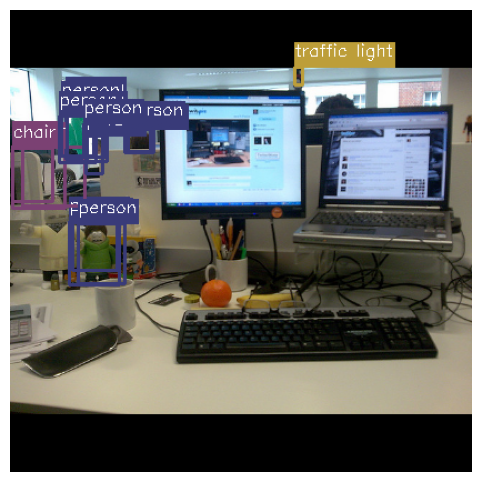

  6%|▌         | 1002/17432 [29:46<23:11:35,  5.08s/it, loss=1.81]

batch_idx: 1001
batch_idx: 1002


  6%|▌         | 1004/17432 [29:46<11:39:23,  2.55s/it, loss=1.81]

batch_idx: 1003
batch_idx: 1004


  6%|▌         | 1006/17432 [29:46<6:00:26,  1.32s/it, loss=1.81] 

batch_idx: 1005
batch_idx: 1006


  6%|▌         | 1008/17432 [29:47<3:13:42,  1.41it/s, loss=1.81]

batch_idx: 1007
batch_idx: 1008


  6%|▌         | 1010/17432 [29:47<1:52:16,  2.44it/s, loss=1.81]

batch_idx: 1009
batch_idx: 1010


  6%|▌         | 1012/17432 [29:47<1:11:46,  3.81it/s, loss=1.81]

batch_idx: 1011
batch_idx: 1012


  6%|▌         | 1014/17432 [29:53<9:03:22,  1.99s/it, loss=1.81]

batch_idx: 1013
batch_idx: 1014


  6%|▌         | 1016/17432 [29:54<4:43:10,  1.03s/it, loss=1.81]

batch_idx: 1015
batch_idx: 1016


  6%|▌         | 1018/17432 [30:01<12:12:31,  2.68s/it, loss=1.81]

batch_idx: 1017
batch_idx: 1018


  6%|▌         | 1020/17432 [30:01<6:15:45,  1.37s/it, loss=1.81] 

batch_idx: 1019
batch_idx: 1020


  6%|▌         | 1022/17432 [30:08<12:01:26,  2.64s/it, loss=1.81]

batch_idx: 1021
batch_idx: 1022


  6%|▌         | 1024/17432 [30:08<6:10:30,  1.35s/it, loss=1.81] 

batch_idx: 1023
batch_idx: 1024


  6%|▌         | 1026/17432 [30:14<11:29:50,  2.52s/it, loss=1.81]

batch_idx: 1025
batch_idx: 1026


  6%|▌         | 1028/17432 [30:14<5:54:50,  1.30s/it, loss=1.8]  

batch_idx: 1027
batch_idx: 1028


  6%|▌         | 1030/17432 [30:22<12:31:09,  2.75s/it, loss=1.8]

batch_idx: 1029
batch_idx: 1030


  6%|▌         | 1032/17432 [30:22<6:25:23,  1.41s/it, loss=1.8] 

batch_idx: 1031
batch_idx: 1032


  6%|▌         | 1034/17432 [30:29<12:51:37,  2.82s/it, loss=1.8]

batch_idx: 1033
batch_idx: 1034


  6%|▌         | 1036/17432 [30:29<6:35:29,  1.45s/it, loss=1.81]

batch_idx: 1035
batch_idx: 1036


  6%|▌         | 1038/17432 [30:36<13:11:46,  2.90s/it, loss=1.81]

batch_idx: 1037
batch_idx: 1038


  6%|▌         | 1040/17432 [30:37<6:44:50,  1.48s/it, loss=1.81] 

batch_idx: 1039
batch_idx: 1040


  6%|▌         | 1042/17432 [30:43<11:42:51,  2.57s/it, loss=1.81]

batch_idx: 1041
batch_idx: 1042


  6%|▌         | 1044/17432 [30:43<6:01:38,  1.32s/it, loss=1.8]  

batch_idx: 1043
batch_idx: 1044


  6%|▌         | 1046/17432 [30:50<11:59:58,  2.64s/it, loss=1.8]

batch_idx: 1045
batch_idx: 1046


  6%|▌         | 1048/17432 [30:50<6:09:52,  1.35s/it, loss=1.8] 

batch_idx: 1047
batch_idx: 1048


  6%|▌         | 1050/17432 [30:57<12:29:52,  2.75s/it, loss=1.81]

batch_idx: 1049
batch_idx: 1050


  6%|▌         | 1052/17432 [30:57<6:24:28,  1.41s/it, loss=1.81] 

batch_idx: 1051
batch_idx: 1052


  6%|▌         | 1054/17432 [31:04<11:42:09,  2.57s/it, loss=1.81]

batch_idx: 1053
batch_idx: 1054


  6%|▌         | 1056/17432 [31:04<6:01:30,  1.32s/it, loss=1.81] 

batch_idx: 1055
batch_idx: 1056


  6%|▌         | 1058/17432 [31:10<11:37:45,  2.56s/it, loss=1.81]

batch_idx: 1057
batch_idx: 1058


  6%|▌         | 1060/17432 [31:10<5:58:36,  1.31s/it, loss=1.81] 

batch_idx: 1059
batch_idx: 1060


  6%|▌         | 1062/17432 [31:17<12:22:32,  2.72s/it, loss=1.81]

batch_idx: 1061
batch_idx: 1062


  6%|▌         | 1064/17432 [31:18<6:20:49,  1.40s/it, loss=1.81] 

batch_idx: 1063
batch_idx: 1064


  6%|▌         | 1066/17432 [31:24<11:38:33,  2.56s/it, loss=1.81]

batch_idx: 1065
batch_idx: 1066


  6%|▌         | 1068/17432 [31:24<5:59:09,  1.32s/it, loss=1.81] 

batch_idx: 1067
batch_idx: 1068


  6%|▌         | 1070/17432 [31:30<11:22:24,  2.50s/it, loss=1.8]

batch_idx: 1069
batch_idx: 1070


  6%|▌         | 1072/17432 [31:31<5:51:12,  1.29s/it, loss=1.81] 

batch_idx: 1071
batch_idx: 1072


  6%|▌         | 1074/17432 [31:37<11:38:37,  2.56s/it, loss=1.8]

batch_idx: 1073
batch_idx: 1074


  6%|▌         | 1076/17432 [31:37<5:59:08,  1.32s/it, loss=1.8] 

batch_idx: 1075
batch_idx: 1076


  6%|▌         | 1078/17432 [31:44<11:46:33,  2.59s/it, loss=1.8]

batch_idx: 1077
batch_idx: 1078


  6%|▌         | 1080/17432 [31:44<6:03:47,  1.33s/it, loss=1.8] 

batch_idx: 1079
batch_idx: 1080


  6%|▌         | 1082/17432 [31:51<12:15:59,  2.70s/it, loss=1.8]

batch_idx: 1081
batch_idx: 1082


  6%|▌         | 1084/17432 [31:51<6:17:28,  1.39s/it, loss=1.8] 

batch_idx: 1083
batch_idx: 1084


  6%|▌         | 1086/17432 [31:57<11:16:52,  2.48s/it, loss=1.8]

batch_idx: 1085
batch_idx: 1086


  6%|▌         | 1088/17432 [31:58<5:48:21,  1.28s/it, loss=1.8] 

batch_idx: 1087
batch_idx: 1088


  6%|▋         | 1090/17432 [32:04<11:57:32,  2.63s/it, loss=1.8]

batch_idx: 1089
batch_idx: 1090


  6%|▋         | 1092/17432 [32:05<6:08:46,  1.35s/it, loss=1.8] 

batch_idx: 1091
batch_idx: 1092


  6%|▋         | 1094/17432 [32:12<12:44:29,  2.81s/it, loss=1.8]

batch_idx: 1093
batch_idx: 1094


  6%|▋         | 1096/17432 [32:12<6:31:18,  1.44s/it, loss=1.8] 

batch_idx: 1095
batch_idx: 1096


  6%|▋         | 1098/17432 [32:19<12:13:20,  2.69s/it, loss=1.8]

batch_idx: 1097
batch_idx: 1098


  6%|▋         | 1100/17432 [32:19<6:16:11,  1.38s/it, loss=1.8] 

batch_idx: 1099
batch_idx: 1100


  6%|▋         | 1102/17432 [32:26<12:10:57,  2.69s/it, loss=1.8]

batch_idx: 1101
batch_idx: 1102


  6%|▋         | 1104/17432 [32:26<6:14:42,  1.38s/it, loss=1.8] 

batch_idx: 1103
batch_idx: 1104


  6%|▋         | 1106/17432 [32:33<12:36:27,  2.78s/it, loss=1.8]

batch_idx: 1105
batch_idx: 1106


  6%|▋         | 1108/17432 [32:33<6:27:22,  1.42s/it, loss=1.8] 

batch_idx: 1107
batch_idx: 1108


  6%|▋         | 1110/17432 [32:40<12:36:00,  2.78s/it, loss=1.8]

batch_idx: 1109
batch_idx: 1110


  6%|▋         | 1112/17432 [32:40<6:27:21,  1.42s/it, loss=1.8] 

batch_idx: 1111
batch_idx: 1112


  6%|▋         | 1114/17432 [32:47<11:39:13,  2.57s/it, loss=1.8]

batch_idx: 1113
batch_idx: 1114


  6%|▋         | 1116/17432 [32:47<5:59:22,  1.32s/it, loss=1.8] 

batch_idx: 1115
batch_idx: 1116


  6%|▋         | 1118/17432 [32:53<11:15:41,  2.49s/it, loss=1.8]

batch_idx: 1117
batch_idx: 1118


  6%|▋         | 1120/17432 [32:53<5:47:47,  1.28s/it, loss=1.8] 

batch_idx: 1119
batch_idx: 1120


  6%|▋         | 1122/17432 [33:00<12:15:11,  2.70s/it, loss=1.8]

batch_idx: 1121
batch_idx: 1122


  6%|▋         | 1124/17432 [33:01<6:17:09,  1.39s/it, loss=1.8] 

batch_idx: 1123
batch_idx: 1124


  6%|▋         | 1126/17432 [33:07<12:18:39,  2.72s/it, loss=1.8]

batch_idx: 1125
batch_idx: 1126


  6%|▋         | 1128/17432 [33:08<6:18:49,  1.39s/it, loss=1.8] 

batch_idx: 1127
batch_idx: 1128


  6%|▋         | 1130/17432 [33:14<11:48:59,  2.61s/it, loss=1.8]

batch_idx: 1129
batch_idx: 1130


  6%|▋         | 1132/17432 [33:14<6:04:08,  1.34s/it, loss=1.8] 

batch_idx: 1131
batch_idx: 1132


  7%|▋         | 1134/17432 [33:21<12:18:39,  2.72s/it, loss=1.81]

batch_idx: 1133
batch_idx: 1134


  7%|▋         | 1136/17432 [33:21<6:18:39,  1.39s/it, loss=1.81] 

batch_idx: 1135
batch_idx: 1136


  7%|▋         | 1138/17432 [33:29<13:20:14,  2.95s/it, loss=1.81]

batch_idx: 1137
batch_idx: 1138


  7%|▋         | 1140/17432 [33:29<6:48:48,  1.51s/it, loss=1.81] 

batch_idx: 1139
batch_idx: 1140


  7%|▋         | 1142/17432 [33:36<12:05:14,  2.67s/it, loss=1.81]

batch_idx: 1141
batch_idx: 1142


  7%|▋         | 1144/17432 [33:36<6:12:00,  1.37s/it, loss=1.81] 

batch_idx: 1143
batch_idx: 1144


  7%|▋         | 1146/17432 [33:42<11:42:06,  2.59s/it, loss=1.81]

batch_idx: 1145
batch_idx: 1146


  7%|▋         | 1148/17432 [33:43<6:00:35,  1.33s/it, loss=1.81] 

batch_idx: 1147
batch_idx: 1148


  7%|▋         | 1150/17432 [33:50<12:13:13,  2.70s/it, loss=1.81]

batch_idx: 1149
batch_idx: 1150


  7%|▋         | 1152/17432 [33:50<6:15:47,  1.39s/it, loss=1.81] 

batch_idx: 1151
batch_idx: 1152


  7%|▋         | 1154/17432 [33:56<11:42:33,  2.59s/it, loss=1.81]

batch_idx: 1153
batch_idx: 1154


  7%|▋         | 1156/17432 [33:56<6:00:54,  1.33s/it, loss=1.81] 

batch_idx: 1155
batch_idx: 1156


  7%|▋         | 1158/17432 [34:03<12:04:22,  2.67s/it, loss=1.81]

batch_idx: 1157
batch_idx: 1158


  7%|▋         | 1160/17432 [34:03<6:11:38,  1.37s/it, loss=1.81] 

batch_idx: 1159
batch_idx: 1160


  7%|▋         | 1162/17432 [34:10<11:46:11,  2.60s/it, loss=1.81]

batch_idx: 1161
batch_idx: 1162


  7%|▋         | 1164/17432 [34:10<6:02:46,  1.34s/it, loss=1.81] 

batch_idx: 1163
batch_idx: 1164


  7%|▋         | 1166/17432 [34:17<12:51:39,  2.85s/it, loss=1.81]

batch_idx: 1165
batch_idx: 1166


  7%|▋         | 1168/17432 [34:18<6:34:48,  1.46s/it, loss=1.81] 

batch_idx: 1167
batch_idx: 1168


  7%|▋         | 1170/17432 [34:24<12:16:22,  2.72s/it, loss=1.81]

batch_idx: 1169
batch_idx: 1170


  7%|▋         | 1172/17432 [34:25<6:17:30,  1.39s/it, loss=1.81] 

batch_idx: 1171
batch_idx: 1172


  7%|▋         | 1174/17432 [34:31<12:00:11,  2.66s/it, loss=1.81]

batch_idx: 1173
batch_idx: 1174


  7%|▋         | 1176/17432 [34:32<6:09:34,  1.36s/it, loss=1.81] 

batch_idx: 1175
batch_idx: 1176


  7%|▋         | 1178/17432 [34:38<12:13:21,  2.71s/it, loss=1.81]

batch_idx: 1177
batch_idx: 1178


  7%|▋         | 1180/17432 [34:39<6:15:53,  1.39s/it, loss=1.81] 

batch_idx: 1179
batch_idx: 1180


  7%|▋         | 1182/17432 [34:46<12:33:47,  2.78s/it, loss=1.81]

batch_idx: 1181
batch_idx: 1182


  7%|▋         | 1184/17432 [34:46<6:26:00,  1.43s/it, loss=1.81] 

batch_idx: 1183
batch_idx: 1184


  7%|▋         | 1186/17432 [34:53<12:33:38,  2.78s/it, loss=1.81]

batch_idx: 1185
batch_idx: 1186


  7%|▋         | 1188/17432 [34:53<6:25:51,  1.43s/it, loss=1.81] 

batch_idx: 1187
batch_idx: 1188


  7%|▋         | 1190/17432 [35:00<11:44:24,  2.60s/it, loss=1.81]

batch_idx: 1189
batch_idx: 1190


  7%|▋         | 1192/17432 [35:00<6:01:58,  1.34s/it, loss=1.81] 

batch_idx: 1191
batch_idx: 1192


  7%|▋         | 1194/17432 [35:07<12:01:30,  2.67s/it, loss=1.81]

batch_idx: 1193
batch_idx: 1194


  7%|▋         | 1196/17432 [35:07<6:10:09,  1.37s/it, loss=1.81] 

batch_idx: 1195
batch_idx: 1196


  7%|▋         | 1198/17432 [35:13<12:01:58,  2.67s/it, loss=1.81]

batch_idx: 1197
batch_idx: 1198


  7%|▋         | 1200/17432 [35:14<6:10:26,  1.37s/it, loss=1.81] 

batch_idx: 1199
batch_idx: 1200


  7%|▋         | 1200/17432 [35:14<6:10:26,  1.37s/it, loss=1.81]

==> Saving checkpoint


  7%|▋         | 1202/17432 [35:20<9:23:56,  2.08s/it, loss=1.81] 

batch_idx: 1201
batch_idx: 1202


  7%|▋         | 1204/17432 [35:21<4:52:48,  1.08s/it, loss=1.81]

batch_idx: 1203
batch_idx: 1204


  7%|▋         | 1206/17432 [35:27<11:17:56,  2.51s/it, loss=1.81]

batch_idx: 1205
batch_idx: 1206


  7%|▋         | 1208/17432 [35:27<5:48:43,  1.29s/it, loss=1.81] 

batch_idx: 1207
batch_idx: 1208


  7%|▋         | 1210/17432 [35:34<11:41:35,  2.59s/it, loss=1.81]

batch_idx: 1209
batch_idx: 1210


  7%|▋         | 1212/17432 [35:34<6:00:29,  1.33s/it, loss=1.81] 

batch_idx: 1211
batch_idx: 1212


  7%|▋         | 1214/17432 [35:41<11:24:07,  2.53s/it, loss=1.81]

batch_idx: 1213
batch_idx: 1214


  7%|▋         | 1216/17432 [35:41<5:51:58,  1.30s/it, loss=1.81] 

batch_idx: 1215


  7%|▋         | 1217/17432 [35:41<4:28:27,  1.01it/s, loss=1.81]

batch_idx: 1216


  7%|▋         | 1218/17432 [35:47<11:46:57,  2.62s/it, loss=1.81]

batch_idx: 1217
batch_idx: 1218


  7%|▋         | 1220/17432 [35:48<6:03:10,  1.34s/it, loss=1.82] 

batch_idx: 1219
batch_idx: 1220


  7%|▋         | 1222/17432 [35:54<11:49:16,  2.63s/it, loss=1.81]

batch_idx: 1221
batch_idx: 1222


  7%|▋         | 1224/17432 [35:55<6:04:02,  1.35s/it, loss=1.82] 

batch_idx: 1223


  7%|▋         | 1225/17432 [35:55<4:35:32,  1.02s/it, loss=1.82]

batch_idx: 1224


  7%|▋         | 1226/17432 [36:02<12:42:22,  2.82s/it, loss=1.82]

batch_idx: 1225
batch_idx: 1226


  7%|▋         | 1228/17432 [36:02<6:30:14,  1.44s/it, loss=1.82] 

batch_idx: 1227
batch_idx: 1228


  7%|▋         | 1230/17432 [36:09<12:14:59,  2.72s/it, loss=1.81]

batch_idx: 1229
batch_idx: 1230


  7%|▋         | 1232/17432 [36:09<6:16:42,  1.40s/it, loss=1.81] 

batch_idx: 1231
batch_idx: 1232


  7%|▋         | 1234/17432 [36:16<12:18:28,  2.74s/it, loss=1.82]

batch_idx: 1233
batch_idx: 1234


  7%|▋         | 1236/17432 [36:16<6:18:38,  1.40s/it, loss=1.81] 

batch_idx: 1235
batch_idx: 1236


  7%|▋         | 1238/17432 [36:23<12:02:06,  2.68s/it, loss=1.82]

batch_idx: 1237
batch_idx: 1238


  7%|▋         | 1240/17432 [36:23<6:10:26,  1.37s/it, loss=1.82] 

batch_idx: 1239
batch_idx: 1240


  7%|▋         | 1242/17432 [36:30<12:26:28,  2.77s/it, loss=1.82]

batch_idx: 1241
batch_idx: 1242


  7%|▋         | 1244/17432 [36:30<6:22:26,  1.42s/it, loss=1.81] 

batch_idx: 1243
batch_idx: 1244


  7%|▋         | 1246/17432 [36:37<11:53:16,  2.64s/it, loss=1.81]

batch_idx: 1245
batch_idx: 1246


  7%|▋         | 1248/17432 [36:37<6:06:06,  1.36s/it, loss=1.81] 

batch_idx: 1247
batch_idx: 1248


  7%|▋         | 1250/17432 [36:44<11:47:59,  2.63s/it, loss=1.81]

batch_idx: 1249
batch_idx: 1250


  7%|▋         | 1252/17432 [36:44<6:03:35,  1.35s/it, loss=1.81] 

batch_idx: 1251
batch_idx: 1252


  7%|▋         | 1254/17432 [36:51<12:01:43,  2.68s/it, loss=1.81]

batch_idx: 1253
batch_idx: 1254


  7%|▋         | 1256/17432 [36:51<6:10:59,  1.38s/it, loss=1.81] 

batch_idx: 1255
batch_idx: 1256


  7%|▋         | 1258/17432 [36:57<11:45:52,  2.62s/it, loss=1.81]

batch_idx: 1257
batch_idx: 1258


  7%|▋         | 1260/17432 [36:58<6:02:27,  1.34s/it, loss=1.81] 

batch_idx: 1259
batch_idx: 1260


  7%|▋         | 1262/17432 [37:05<12:07:16,  2.70s/it, loss=1.81]

batch_idx: 1261
batch_idx: 1262


  7%|▋         | 1264/17432 [37:05<6:13:22,  1.39s/it, loss=1.81] 

batch_idx: 1263
batch_idx: 1264


  7%|▋         | 1266/17432 [37:11<11:43:59,  2.61s/it, loss=1.81]

batch_idx: 1265
batch_idx: 1266


  7%|▋         | 1268/17432 [37:12<6:01:39,  1.34s/it, loss=1.81] 

batch_idx: 1267
batch_idx: 1268


  7%|▋         | 1270/17432 [37:18<11:49:41,  2.63s/it, loss=1.81]

batch_idx: 1269
batch_idx: 1270


  7%|▋         | 1272/17432 [37:18<6:04:20,  1.35s/it, loss=1.81] 

batch_idx: 1271
batch_idx: 1272


  7%|▋         | 1274/17432 [37:25<11:41:46,  2.61s/it, loss=1.81]

batch_idx: 1273
batch_idx: 1274


  7%|▋         | 1276/17432 [37:25<6:00:27,  1.34s/it, loss=1.81] 

batch_idx: 1275
batch_idx: 1276


  7%|▋         | 1278/17432 [37:32<11:37:14,  2.59s/it, loss=1.81]

batch_idx: 1277
batch_idx: 1278


  7%|▋         | 1280/17432 [37:32<5:58:19,  1.33s/it, loss=1.81] 

batch_idx: 1279
batch_idx: 1280


  7%|▋         | 1282/17432 [37:39<12:00:23,  2.68s/it, loss=1.81]

batch_idx: 1281
batch_idx: 1282


  7%|▋         | 1284/17432 [37:39<6:09:28,  1.37s/it, loss=1.81] 

batch_idx: 1283
batch_idx: 1284


  7%|▋         | 1286/17432 [37:46<11:52:02,  2.65s/it, loss=1.81]

batch_idx: 1285
batch_idx: 1286


  7%|▋         | 1288/17432 [37:46<6:05:28,  1.36s/it, loss=1.81] 

batch_idx: 1287


  7%|▋         | 1289/17432 [37:46<5:01:34,  1.12s/it, loss=1.81]

batch_idx: 1288


  7%|▋         | 1290/17432 [37:52<11:43:59,  2.62s/it, loss=1.81]

batch_idx: 1289
batch_idx: 1290


  7%|▋         | 1292/17432 [37:53<6:01:36,  1.34s/it, loss=1.81] 

batch_idx: 1291


  7%|▋         | 1293/17432 [37:54<5:35:53,  1.25s/it, loss=1.81]

batch_idx: 1292


  7%|▋         | 1294/17432 [37:59<11:17:10,  2.52s/it, loss=1.81]

batch_idx: 1293
batch_idx: 1294


  7%|▋         | 1296/17432 [37:59<5:48:31,  1.30s/it, loss=1.81] 

batch_idx: 1295


  7%|▋         | 1297/17432 [38:00<4:58:38,  1.11s/it, loss=1.81]

batch_idx: 1296


  7%|▋         | 1298/17432 [38:06<10:56:16,  2.44s/it, loss=1.81]

batch_idx: 1297
batch_idx: 1298


  7%|▋         | 1300/17432 [38:06<5:38:13,  1.26s/it, loss=1.81] 

batch_idx: 1299


  7%|▋         | 1301/17432 [38:07<5:08:00,  1.15s/it, loss=1.81]

batch_idx: 1300


  7%|▋         | 1302/17432 [38:13<11:30:52,  2.57s/it, loss=1.81]

batch_idx: 1301
batch_idx: 1302


  7%|▋         | 1304/17432 [38:13<5:55:15,  1.32s/it, loss=1.81] 

batch_idx: 1303


  7%|▋         | 1305/17432 [38:14<5:05:31,  1.14s/it, loss=1.81]

batch_idx: 1304


  7%|▋         | 1306/17432 [38:20<11:34:10,  2.58s/it, loss=1.81]

batch_idx: 1305
batch_idx: 1306


  8%|▊         | 1308/17432 [38:20<5:56:41,  1.33s/it, loss=1.81] 

batch_idx: 1307


  8%|▊         | 1309/17432 [38:21<5:41:34,  1.27s/it, loss=1.81]

batch_idx: 1308


  8%|▊         | 1310/17432 [38:26<11:09:00,  2.49s/it, loss=1.81]

batch_idx: 1309
batch_idx: 1310


  8%|▊         | 1312/17432 [38:27<5:44:15,  1.28s/it, loss=1.81] 

batch_idx: 1311


  8%|▊         | 1313/17432 [38:28<5:19:32,  1.19s/it, loss=1.81]

batch_idx: 1312


  8%|▊         | 1314/17432 [38:33<11:10:47,  2.50s/it, loss=1.81]

batch_idx: 1313
batch_idx: 1314


  8%|▊         | 1316/17432 [38:33<5:45:00,  1.28s/it, loss=1.81] 

batch_idx: 1315


  8%|▊         | 1317/17432 [38:34<4:41:18,  1.05s/it, loss=1.81]

batch_idx: 1316


  8%|▊         | 1318/17432 [38:40<11:56:35,  2.67s/it, loss=1.81]

batch_idx: 1317
batch_idx: 1318


  8%|▊         | 1320/17432 [38:40<6:07:27,  1.37s/it, loss=1.81] 

batch_idx: 1319


  8%|▊         | 1321/17432 [38:41<4:59:22,  1.11s/it, loss=1.82]

batch_idx: 1320


  8%|▊         | 1322/17432 [38:47<11:33:54,  2.58s/it, loss=1.82]

batch_idx: 1321
batch_idx: 1322


  8%|▊         | 1324/17432 [38:47<5:56:32,  1.33s/it, loss=1.81] 

batch_idx: 1323
batch_idx: 1324


  8%|▊         | 1326/17432 [38:54<11:20:26,  2.53s/it, loss=1.82]

batch_idx: 1325
batch_idx: 1326


  8%|▊         | 1328/17432 [38:54<5:50:42,  1.31s/it, loss=1.82] 

batch_idx: 1327
batch_idx: 1328


  8%|▊         | 1330/17432 [39:01<12:22:01,  2.76s/it, loss=1.81]

batch_idx: 1329
batch_idx: 1330


  8%|▊         | 1332/17432 [39:01<6:20:09,  1.42s/it, loss=1.81] 

batch_idx: 1331
batch_idx: 1332


  8%|▊         | 1334/17432 [39:08<11:52:41,  2.66s/it, loss=1.81]

batch_idx: 1333
batch_idx: 1334


  8%|▊         | 1336/17432 [39:08<6:05:40,  1.36s/it, loss=1.81] 

batch_idx: 1335
batch_idx: 1336


  8%|▊         | 1338/17432 [39:15<12:32:55,  2.81s/it, loss=1.81]

batch_idx: 1337
batch_idx: 1338


  8%|▊         | 1340/17432 [39:15<6:25:30,  1.44s/it, loss=1.81] 

batch_idx: 1339
batch_idx: 1340


  8%|▊         | 1342/17432 [39:22<11:43:50,  2.62s/it, loss=1.81]

batch_idx: 1341
batch_idx: 1342


  8%|▊         | 1344/17432 [39:22<6:01:12,  1.35s/it, loss=1.81] 

batch_idx: 1343


  8%|▊         | 1345/17432 [39:23<4:45:01,  1.06s/it, loss=1.81]

batch_idx: 1344


  8%|▊         | 1346/17432 [39:29<11:53:26,  2.66s/it, loss=1.81]

batch_idx: 1345
batch_idx: 1346


  8%|▊         | 1348/17432 [39:29<6:06:09,  1.37s/it, loss=1.81] 

batch_idx: 1347


  8%|▊         | 1349/17432 [39:30<5:06:11,  1.14s/it, loss=1.81]

batch_idx: 1348


  8%|▊         | 1350/17432 [39:36<11:35:10,  2.59s/it, loss=1.81]

batch_idx: 1349
batch_idx: 1350


  8%|▊         | 1352/17432 [39:36<5:57:16,  1.33s/it, loss=1.82] 

batch_idx: 1351


  8%|▊         | 1353/17432 [39:37<5:16:25,  1.18s/it, loss=1.82]

batch_idx: 1352


  8%|▊         | 1354/17432 [39:43<11:51:39,  2.66s/it, loss=1.82]

batch_idx: 1353
batch_idx: 1354


  8%|▊         | 1356/17432 [39:43<6:05:20,  1.36s/it, loss=1.82] 

batch_idx: 1355


  8%|▊         | 1357/17432 [39:44<4:54:21,  1.10s/it, loss=1.82]

batch_idx: 1356


  8%|▊         | 1358/17432 [39:50<11:41:18,  2.62s/it, loss=1.82]

batch_idx: 1357
batch_idx: 1358


  8%|▊         | 1360/17432 [39:50<6:00:35,  1.35s/it, loss=1.82] 

batch_idx: 1359


  8%|▊         | 1361/17432 [39:50<4:39:49,  1.04s/it, loss=1.82]

batch_idx: 1360


  8%|▊         | 1362/17432 [39:57<11:29:09,  2.57s/it, loss=1.82]

batch_idx: 1361
batch_idx: 1362


  8%|▊         | 1364/17432 [39:57<5:54:24,  1.32s/it, loss=1.82] 

batch_idx: 1363


  8%|▊         | 1365/17432 [39:58<5:08:12,  1.15s/it, loss=1.81]

batch_idx: 1364


  8%|▊         | 1366/17432 [40:03<11:32:03,  2.58s/it, loss=1.81]

batch_idx: 1365
batch_idx: 1366


  8%|▊         | 1368/17432 [40:04<5:55:27,  1.33s/it, loss=1.81] 

batch_idx: 1367


  8%|▊         | 1369/17432 [40:05<5:49:38,  1.31s/it, loss=1.81]

batch_idx: 1368


  8%|▊         | 1370/17432 [40:10<11:26:04,  2.56s/it, loss=1.81]

batch_idx: 1369
batch_idx: 1370


  8%|▊         | 1372/17432 [40:11<5:52:32,  1.32s/it, loss=1.82] 

batch_idx: 1371


  8%|▊         | 1373/17432 [40:12<6:07:59,  1.37s/it, loss=1.82]

batch_idx: 1372


  8%|▊         | 1374/17432 [40:17<11:19:16,  2.54s/it, loss=1.82]

batch_idx: 1373
batch_idx: 1374


  8%|▊         | 1376/17432 [40:18<5:49:16,  1.31s/it, loss=1.82] 

batch_idx: 1375


  8%|▊         | 1377/17432 [40:19<5:28:26,  1.23s/it, loss=1.82]

batch_idx: 1376


  8%|▊         | 1378/17432 [40:24<11:10:42,  2.51s/it, loss=1.82]

batch_idx: 1377
batch_idx: 1378


  8%|▊         | 1380/17432 [40:24<5:45:21,  1.29s/it, loss=1.82] 

batch_idx: 1379


  8%|▊         | 1381/17432 [40:25<4:58:55,  1.12s/it, loss=1.82]

batch_idx: 1380


  8%|▊         | 1382/17432 [40:31<11:15:54,  2.53s/it, loss=1.82]

batch_idx: 1381
batch_idx: 1382


  8%|▊         | 1384/17432 [40:31<5:48:05,  1.30s/it, loss=1.82] 

batch_idx: 1383


  8%|▊         | 1385/17432 [40:32<5:26:27,  1.22s/it, loss=1.82]

batch_idx: 1384


  8%|▊         | 1386/17432 [40:38<11:14:52,  2.52s/it, loss=1.82]

batch_idx: 1385
batch_idx: 1386


  8%|▊         | 1388/17432 [40:38<5:47:07,  1.30s/it, loss=1.82] 

batch_idx: 1387


  8%|▊         | 1389/17432 [40:39<5:32:52,  1.24s/it, loss=1.82]

batch_idx: 1388


  8%|▊         | 1390/17432 [40:45<11:18:55,  2.54s/it, loss=1.82]

batch_idx: 1389
batch_idx: 1390


  8%|▊         | 1392/17432 [40:45<5:49:03,  1.31s/it, loss=1.82] 

batch_idx: 1391


  8%|▊         | 1393/17432 [40:46<5:13:40,  1.17s/it, loss=1.82]

batch_idx: 1392


  8%|▊         | 1394/17432 [40:52<11:22:36,  2.55s/it, loss=1.82]

batch_idx: 1393
batch_idx: 1394


  8%|▊         | 1396/17432 [40:52<5:50:58,  1.31s/it, loss=1.82] 

batch_idx: 1395


  8%|▊         | 1397/17432 [40:53<5:25:48,  1.22s/it, loss=1.81]

batch_idx: 1396


  8%|▊         | 1398/17432 [40:59<11:20:52,  2.55s/it, loss=1.81]

batch_idx: 1397
batch_idx: 1398


  8%|▊         | 1400/17432 [40:59<5:50:06,  1.31s/it, loss=1.81] 

batch_idx: 1399


  8%|▊         | 1400/17432 [41:00<5:50:06,  1.31s/it, loss=1.81]

batch_idx: 1400
==> Saving checkpoint


  8%|▊         | 1402/17432 [41:06<9:45:03,  2.19s/it, loss=1.81] 

batch_idx: 1401
batch_idx: 1402


  8%|▊         | 1404/17432 [41:06<5:03:06,  1.13s/it, loss=1.81]

batch_idx: 1403
batch_idx: 1404


  8%|▊         | 1406/17432 [41:13<10:57:27,  2.46s/it, loss=1.81]

batch_idx: 1405
batch_idx: 1406


  8%|▊         | 1408/17432 [41:13<5:38:29,  1.27s/it, loss=1.82] 

batch_idx: 1407
batch_idx: 1408


  8%|▊         | 1410/17432 [41:19<11:18:03,  2.54s/it, loss=1.82]

batch_idx: 1409
batch_idx: 1410


  8%|▊         | 1412/17432 [41:20<5:48:38,  1.31s/it, loss=1.82] 

batch_idx: 1411
batch_idx: 1412


  8%|▊         | 1414/17432 [41:27<11:56:50,  2.69s/it, loss=1.82]

batch_idx: 1413
batch_idx: 1414


  8%|▊         | 1416/17432 [41:27<6:07:27,  1.38s/it, loss=1.82] 

batch_idx: 1415
batch_idx: 1416


  8%|▊         | 1418/17432 [41:33<11:47:40,  2.65s/it, loss=1.82]

batch_idx: 1417
batch_idx: 1418


  8%|▊         | 1420/17432 [41:34<6:03:02,  1.36s/it, loss=1.82] 

batch_idx: 1419
batch_idx: 1420


  8%|▊         | 1422/17432 [41:40<11:40:10,  2.62s/it, loss=1.82]

batch_idx: 1421
batch_idx: 1422


  8%|▊         | 1424/17432 [41:40<5:59:47,  1.35s/it, loss=1.82] 

batch_idx: 1423
batch_idx: 1424


  8%|▊         | 1426/17432 [41:47<11:46:45,  2.65s/it, loss=1.82]

batch_idx: 1425
batch_idx: 1426


  8%|▊         | 1428/17432 [41:47<6:02:35,  1.36s/it, loss=1.82] 

batch_idx: 1427
batch_idx: 1428


  8%|▊         | 1430/17432 [41:54<11:46:45,  2.65s/it, loss=1.81]

batch_idx: 1429
batch_idx: 1430


  8%|▊         | 1432/17432 [41:54<6:02:42,  1.36s/it, loss=1.81] 

batch_idx: 1431
batch_idx: 1432


  8%|▊         | 1434/17432 [42:01<12:19:50,  2.77s/it, loss=1.81]

batch_idx: 1433
batch_idx: 1434


  8%|▊         | 1436/17432 [42:02<6:19:05,  1.42s/it, loss=1.81] 

batch_idx: 1435
batch_idx: 1436


  8%|▊         | 1438/17432 [42:08<11:53:50,  2.68s/it, loss=1.81]

batch_idx: 1437
batch_idx: 1438


  8%|▊         | 1440/17432 [42:08<6:06:08,  1.37s/it, loss=1.81] 

batch_idx: 1439
batch_idx: 1440


  8%|▊         | 1442/17432 [42:15<11:36:15,  2.61s/it, loss=1.81]

batch_idx: 1441
batch_idx: 1442


  8%|▊         | 1444/17432 [42:15<5:57:38,  1.34s/it, loss=1.81] 

batch_idx: 1443
batch_idx: 1444


  8%|▊         | 1446/17432 [42:22<11:45:02,  2.65s/it, loss=1.81]

batch_idx: 1445
batch_idx: 1446


  8%|▊         | 1448/17432 [42:22<6:01:52,  1.36s/it, loss=1.81] 

batch_idx: 1447
batch_idx: 1448


  8%|▊         | 1450/17432 [42:29<11:31:47,  2.60s/it, loss=1.81]

batch_idx: 1449
batch_idx: 1450


  8%|▊         | 1452/17432 [42:29<5:55:29,  1.33s/it, loss=1.81] 

batch_idx: 1451
batch_idx: 1452


  8%|▊         | 1454/17432 [42:35<11:18:05,  2.55s/it, loss=1.81]

batch_idx: 1453
batch_idx: 1454


  8%|▊         | 1456/17432 [42:35<5:48:43,  1.31s/it, loss=1.81] 

batch_idx: 1455


  8%|▊         | 1457/17432 [42:36<5:02:26,  1.14s/it, loss=1.81]

batch_idx: 1456


  8%|▊         | 1458/17432 [42:42<11:41:27,  2.63s/it, loss=1.81]

batch_idx: 1457
batch_idx: 1458


  8%|▊         | 1460/17432 [42:42<6:00:37,  1.35s/it, loss=1.81] 

batch_idx: 1459


  8%|▊         | 1461/17432 [42:43<4:49:01,  1.09s/it, loss=1.81]

batch_idx: 1460


  8%|▊         | 1462/17432 [42:49<11:46:07,  2.65s/it, loss=1.81]

batch_idx: 1461
batch_idx: 1462


  8%|▊         | 1464/17432 [42:49<6:02:17,  1.36s/it, loss=1.81] 

batch_idx: 1463


  8%|▊         | 1465/17432 [42:50<4:58:21,  1.12s/it, loss=1.81]

batch_idx: 1464


  8%|▊         | 1466/17432 [42:56<11:15:41,  2.54s/it, loss=1.81]

batch_idx: 1465
batch_idx: 1466


  8%|▊         | 1468/17432 [42:56<5:47:33,  1.31s/it, loss=1.81] 

batch_idx: 1467


  8%|▊         | 1469/17432 [42:57<5:22:09,  1.21s/it, loss=1.81]

batch_idx: 1468


  8%|▊         | 1470/17432 [43:03<11:55:52,  2.69s/it, loss=1.81]

batch_idx: 1469
batch_idx: 1470


  8%|▊         | 1472/17432 [43:04<6:07:01,  1.38s/it, loss=1.81] 

batch_idx: 1471


  8%|▊         | 1473/17432 [43:04<4:44:20,  1.07s/it, loss=1.81]

batch_idx: 1472


  8%|▊         | 1474/17432 [43:10<11:46:50,  2.66s/it, loss=1.81]

batch_idx: 1473
batch_idx: 1474


  8%|▊         | 1476/17432 [43:10<6:02:40,  1.36s/it, loss=1.81] 

batch_idx: 1475


  8%|▊         | 1477/17432 [43:11<4:49:16,  1.09s/it, loss=1.81]

batch_idx: 1476


  8%|▊         | 1478/17432 [43:17<11:58:02,  2.70s/it, loss=1.81]

batch_idx: 1477
batch_idx: 1478


  8%|▊         | 1480/17432 [43:18<6:08:02,  1.38s/it, loss=1.81] 

batch_idx: 1479


  8%|▊         | 1481/17432 [43:18<4:50:39,  1.09s/it, loss=1.81]

batch_idx: 1480


  9%|▊         | 1482/17432 [43:24<11:49:06,  2.67s/it, loss=1.81]

batch_idx: 1481
batch_idx: 1482


  9%|▊         | 1484/17432 [43:25<6:03:50,  1.37s/it, loss=1.81] 

batch_idx: 1483


  9%|▊         | 1485/17432 [43:25<4:52:08,  1.10s/it, loss=1.81]

batch_idx: 1484


  9%|▊         | 1486/17432 [43:32<12:11:02,  2.75s/it, loss=1.81]

batch_idx: 1485
batch_idx: 1486


  9%|▊         | 1488/17432 [43:32<6:14:36,  1.41s/it, loss=1.81] 

batch_idx: 1487
batch_idx: 1488


  9%|▊         | 1490/17432 [43:39<11:51:56,  2.68s/it, loss=1.81]

batch_idx: 1489
batch_idx: 1490


  9%|▊         | 1492/17432 [43:39<6:05:12,  1.37s/it, loss=1.81] 

batch_idx: 1491
batch_idx: 1492


  9%|▊         | 1494/17432 [43:45<11:39:20,  2.63s/it, loss=1.81]

batch_idx: 1493
batch_idx: 1494


  9%|▊         | 1496/17432 [43:46<5:59:02,  1.35s/it, loss=1.81] 

batch_idx: 1495
batch_idx: 1496


  9%|▊         | 1498/17432 [43:53<12:10:58,  2.75s/it, loss=1.81]

batch_idx: 1497
batch_idx: 1498


  9%|▊         | 1500/17432 [43:53<6:14:24,  1.41s/it, loss=1.81] 

batch_idx: 1499
batch_idx: 1500


  9%|▊         | 1502/17432 [44:00<12:18:16,  2.78s/it, loss=1.81]

batch_idx: 1501
batch_idx: 1502


  9%|▊         | 1504/17432 [44:00<6:17:57,  1.42s/it, loss=1.81] 

batch_idx: 1503
batch_idx: 1504


  9%|▊         | 1506/17432 [44:07<12:17:16,  2.78s/it, loss=1.81]

batch_idx: 1505
batch_idx: 1506


  9%|▊         | 1508/17432 [44:07<6:17:40,  1.42s/it, loss=1.81] 

batch_idx: 1507
batch_idx: 1508


  9%|▊         | 1510/17432 [44:14<12:04:24,  2.73s/it, loss=1.81]

batch_idx: 1509
batch_idx: 1510


  9%|▊         | 1512/17432 [44:14<6:11:07,  1.40s/it, loss=1.81] 

batch_idx: 1511
batch_idx: 1512


  9%|▊         | 1514/17432 [44:21<12:22:52,  2.80s/it, loss=1.81]

batch_idx: 1513
batch_idx: 1514


  9%|▊         | 1516/17432 [44:22<6:20:45,  1.44s/it, loss=1.81] 

batch_idx: 1515
batch_idx: 1516


  9%|▊         | 1518/17432 [44:29<12:45:40,  2.89s/it, loss=1.81]

batch_idx: 1517
batch_idx: 1518


  9%|▊         | 1520/17432 [44:29<6:31:22,  1.48s/it, loss=1.81] 

batch_idx: 1519
batch_idx: 1520


  9%|▊         | 1522/17432 [44:37<12:52:30,  2.91s/it, loss=1.81]

batch_idx: 1521
batch_idx: 1522


  9%|▊         | 1524/17432 [44:37<6:34:51,  1.49s/it, loss=1.81] 

batch_idx: 1523
batch_idx: 1524


  9%|▉         | 1526/17432 [44:43<11:21:22,  2.57s/it, loss=1.81]

batch_idx: 1525
batch_idx: 1526


  9%|▉         | 1528/17432 [44:43<5:50:09,  1.32s/it, loss=1.81] 

batch_idx: 1527
batch_idx: 1528


  9%|▉         | 1530/17432 [44:50<11:45:49,  2.66s/it, loss=1.81]

batch_idx: 1529
batch_idx: 1530


  9%|▉         | 1532/17432 [44:50<6:02:08,  1.37s/it, loss=1.81] 

batch_idx: 1531
batch_idx: 1532


  9%|▉         | 1534/17432 [44:57<11:56:50,  2.71s/it, loss=1.81]

batch_idx: 1533
batch_idx: 1534


  9%|▉         | 1536/17432 [44:57<6:07:29,  1.39s/it, loss=1.81] 

batch_idx: 1535
batch_idx: 1536


  9%|▉         | 1538/17432 [45:04<11:45:52,  2.66s/it, loss=1.81]

batch_idx: 1537
batch_idx: 1538


  9%|▉         | 1540/17432 [45:04<6:02:10,  1.37s/it, loss=1.81] 

batch_idx: 1539
batch_idx: 1540


  9%|▉         | 1542/17432 [45:11<12:07:12,  2.75s/it, loss=1.81]

batch_idx: 1541
batch_idx: 1542


  9%|▉         | 1544/17432 [45:11<6:12:33,  1.41s/it, loss=1.81] 

batch_idx: 1543
batch_idx: 1544


  9%|▉         | 1546/17432 [45:18<12:17:04,  2.78s/it, loss=1.81]

batch_idx: 1545
batch_idx: 1546


  9%|▉         | 1548/17432 [45:19<6:17:26,  1.43s/it, loss=1.81] 

batch_idx: 1547
batch_idx: 1548


  9%|▉         | 1550/17432 [45:26<12:06:25,  2.74s/it, loss=1.81]

batch_idx: 1549
batch_idx: 1550


  9%|▉         | 1552/17432 [45:26<6:12:22,  1.41s/it, loss=1.81] 

batch_idx: 1551
batch_idx: 1552


  9%|▉         | 1554/17432 [45:32<11:50:20,  2.68s/it, loss=1.81]

batch_idx: 1553
batch_idx: 1554


  9%|▉         | 1556/17432 [45:33<6:04:46,  1.38s/it, loss=1.81] 

batch_idx: 1555
batch_idx: 1556


  9%|▉         | 1558/17432 [45:40<12:14:04,  2.77s/it, loss=1.81]

batch_idx: 1557
batch_idx: 1558


  9%|▉         | 1560/17432 [45:40<6:16:12,  1.42s/it, loss=1.81] 

batch_idx: 1559
batch_idx: 1560


  9%|▉         | 1562/17432 [45:47<11:51:05,  2.69s/it, loss=1.81]

batch_idx: 1561
batch_idx: 1562


  9%|▉         | 1564/17432 [45:47<6:04:46,  1.38s/it, loss=1.81] 

batch_idx: 1563
batch_idx: 1564


  9%|▉         | 1566/17432 [45:54<11:56:32,  2.71s/it, loss=1.81]

batch_idx: 1565
batch_idx: 1566


  9%|▉         | 1568/17432 [45:54<6:07:19,  1.39s/it, loss=1.81] 

batch_idx: 1567
batch_idx: 1568


  9%|▉         | 1570/17432 [46:01<12:05:54,  2.75s/it, loss=1.81]

batch_idx: 1569
batch_idx: 1570


  9%|▉         | 1572/17432 [46:01<6:11:54,  1.41s/it, loss=1.81] 

batch_idx: 1571
batch_idx: 1572


  9%|▉         | 1574/17432 [46:08<12:03:31,  2.74s/it, loss=1.81]

batch_idx: 1573
batch_idx: 1574


  9%|▉         | 1576/17432 [46:08<6:10:48,  1.40s/it, loss=1.81] 

batch_idx: 1575
batch_idx: 1576


  9%|▉         | 1578/17432 [46:15<11:57:21,  2.71s/it, loss=1.81]

batch_idx: 1577
batch_idx: 1578


  9%|▉         | 1580/17432 [46:15<6:07:56,  1.39s/it, loss=1.81] 

batch_idx: 1579
batch_idx: 1580


  9%|▉         | 1582/17432 [46:22<11:53:05,  2.70s/it, loss=1.81]

batch_idx: 1581
batch_idx: 1582


  9%|▉         | 1584/17432 [46:22<6:06:02,  1.39s/it, loss=1.81] 

batch_idx: 1583
batch_idx: 1584


  9%|▉         | 1586/17432 [46:29<12:24:33,  2.82s/it, loss=1.81]

batch_idx: 1585
batch_idx: 1586


  9%|▉         | 1588/17432 [46:30<6:20:56,  1.44s/it, loss=1.81] 

batch_idx: 1587
batch_idx: 1588


  9%|▉         | 1590/17432 [46:36<11:48:10,  2.68s/it, loss=1.81]

batch_idx: 1589
batch_idx: 1590


  9%|▉         | 1592/17432 [46:37<6:03:19,  1.38s/it, loss=1.81] 

batch_idx: 1591
batch_idx: 1592


  9%|▉         | 1594/17432 [46:44<12:27:32,  2.83s/it, loss=1.81]

batch_idx: 1593
batch_idx: 1594


  9%|▉         | 1596/17432 [46:44<6:22:35,  1.45s/it, loss=1.81] 

batch_idx: 1595
batch_idx: 1596


  9%|▉         | 1598/17432 [46:51<12:28:07,  2.83s/it, loss=1.81]

batch_idx: 1597
batch_idx: 1598


  9%|▉         | 1600/17432 [46:51<6:22:50,  1.45s/it, loss=1.81] 

batch_idx: 1599
batch_idx: 1600


  9%|▉         | 1600/17432 [46:52<6:22:50,  1.45s/it, loss=1.81]

==> Saving checkpoint


  9%|▉         | 1602/17432 [46:58<9:29:37,  2.16s/it, loss=1.81] 

batch_idx: 1601
batch_idx: 1602


  9%|▉         | 1604/17432 [46:58<4:55:18,  1.12s/it, loss=1.81]

batch_idx: 1603
batch_idx: 1604


  9%|▉         | 1606/17432 [47:05<11:39:10,  2.65s/it, loss=1.81]

batch_idx: 1605
batch_idx: 1606


  9%|▉         | 1608/17432 [47:06<5:59:10,  1.36s/it, loss=1.81] 

batch_idx: 1607
batch_idx: 1608


  9%|▉         | 1610/17432 [47:12<11:41:37,  2.66s/it, loss=1.81]

batch_idx: 1609
batch_idx: 1610


  9%|▉         | 1612/17432 [47:13<6:00:26,  1.37s/it, loss=1.81] 

batch_idx: 1611
batch_idx: 1612


  9%|▉         | 1614/17432 [47:19<11:54:21,  2.71s/it, loss=1.81]

batch_idx: 1613
batch_idx: 1614


  9%|▉         | 1616/17432 [47:20<6:06:14,  1.39s/it, loss=1.81] 

batch_idx: 1615
batch_idx: 1616


  9%|▉         | 1618/17432 [47:27<12:01:40,  2.74s/it, loss=1.81]

batch_idx: 1617
batch_idx: 1618


  9%|▉         | 1620/17432 [47:27<6:09:46,  1.40s/it, loss=1.81] 

batch_idx: 1619
batch_idx: 1620


  9%|▉         | 1622/17432 [47:34<12:10:41,  2.77s/it, loss=1.81]

batch_idx: 1621
batch_idx: 1622


  9%|▉         | 1624/17432 [47:34<6:14:26,  1.42s/it, loss=1.81] 

batch_idx: 1623
batch_idx: 1624


  9%|▉         | 1626/17432 [47:40<11:02:49,  2.52s/it, loss=1.81]

batch_idx: 1625
batch_idx: 1626


  9%|▉         | 1628/17432 [47:40<5:41:23,  1.30s/it, loss=1.81] 

batch_idx: 1627
batch_idx: 1628


  9%|▉         | 1630/17432 [47:47<11:36:53,  2.65s/it, loss=1.81]

batch_idx: 1629
batch_idx: 1630


  9%|▉         | 1632/17432 [47:47<5:57:44,  1.36s/it, loss=1.81] 

batch_idx: 1631
batch_idx: 1632


  9%|▉         | 1634/17432 [47:55<12:37:21,  2.88s/it, loss=1.81]

batch_idx: 1633
batch_idx: 1634


  9%|▉         | 1636/17432 [47:55<6:27:10,  1.47s/it, loss=1.81] 

batch_idx: 1635
batch_idx: 1636


  9%|▉         | 1638/17432 [48:02<12:17:58,  2.80s/it, loss=1.81]

batch_idx: 1637
batch_idx: 1638


  9%|▉         | 1640/17432 [48:02<6:17:39,  1.43s/it, loss=1.81] 

batch_idx: 1639
batch_idx: 1640


  9%|▉         | 1642/17432 [48:09<12:15:25,  2.79s/it, loss=1.81]

batch_idx: 1641
batch_idx: 1642


  9%|▉         | 1644/17432 [48:10<6:16:33,  1.43s/it, loss=1.81] 

batch_idx: 1643
batch_idx: 1644


  9%|▉         | 1646/17432 [48:16<11:32:59,  2.63s/it, loss=1.81]

batch_idx: 1645
batch_idx: 1646


  9%|▉         | 1648/17432 [48:16<5:56:02,  1.35s/it, loss=1.81] 

batch_idx: 1647
batch_idx: 1648


  9%|▉         | 1650/17432 [48:23<11:28:36,  2.62s/it, loss=1.81]

batch_idx: 1649
batch_idx: 1650


  9%|▉         | 1652/17432 [48:23<5:53:34,  1.34s/it, loss=1.81] 

batch_idx: 1651
batch_idx: 1652


  9%|▉         | 1654/17432 [48:30<12:33:06,  2.86s/it, loss=1.81]

batch_idx: 1653
batch_idx: 1654


  9%|▉         | 1656/17432 [48:31<6:25:08,  1.46s/it, loss=1.81] 

batch_idx: 1655
batch_idx: 1656


 10%|▉         | 1658/17432 [48:38<12:09:23,  2.77s/it, loss=1.81]

batch_idx: 1657
batch_idx: 1658


 10%|▉         | 1660/17432 [48:38<6:13:53,  1.42s/it, loss=1.81] 

batch_idx: 1659
batch_idx: 1660


 10%|▉         | 1662/17432 [48:44<11:46:55,  2.69s/it, loss=1.81]

batch_idx: 1661
batch_idx: 1662


 10%|▉         | 1664/17432 [48:45<6:02:24,  1.38s/it, loss=1.81] 

batch_idx: 1663
batch_idx: 1664


 10%|▉         | 1666/17432 [48:52<12:09:48,  2.78s/it, loss=1.81]

batch_idx: 1665
batch_idx: 1666


 10%|▉         | 1668/17432 [48:52<6:13:39,  1.42s/it, loss=1.81] 

batch_idx: 1667
batch_idx: 1668


 10%|▉         | 1670/17432 [48:58<11:27:36,  2.62s/it, loss=1.81]

batch_idx: 1669
batch_idx: 1670


 10%|▉         | 1672/17432 [48:59<5:52:55,  1.34s/it, loss=1.81] 

batch_idx: 1671
batch_idx: 1672


 10%|▉         | 1674/17432 [49:06<12:01:49,  2.75s/it, loss=1.81]

batch_idx: 1673
batch_idx: 1674


 10%|▉         | 1676/17432 [49:06<6:09:56,  1.41s/it, loss=1.81] 

batch_idx: 1675
batch_idx: 1676


 10%|▉         | 1678/17432 [49:13<12:09:09,  2.78s/it, loss=1.81]

batch_idx: 1677
batch_idx: 1678


 10%|▉         | 1680/17432 [49:13<6:13:12,  1.42s/it, loss=1.81] 

batch_idx: 1679
batch_idx: 1680


 10%|▉         | 1682/17432 [49:20<11:31:32,  2.63s/it, loss=1.81]

batch_idx: 1681
batch_idx: 1682


 10%|▉         | 1684/17432 [49:20<5:55:09,  1.35s/it, loss=1.81] 

batch_idx: 1683
batch_idx: 1684


 10%|▉         | 1686/17432 [49:27<11:52:14,  2.71s/it, loss=1.81]

batch_idx: 1685
batch_idx: 1686


 10%|▉         | 1688/17432 [49:27<6:05:06,  1.39s/it, loss=1.81] 

batch_idx: 1687
batch_idx: 1688


 10%|▉         | 1690/17432 [49:33<11:23:07,  2.60s/it, loss=1.81]

batch_idx: 1689
batch_idx: 1690


 10%|▉         | 1692/17432 [49:34<5:51:00,  1.34s/it, loss=1.81] 

batch_idx: 1691
batch_idx: 1692


 10%|▉         | 1694/17432 [49:40<11:10:18,  2.56s/it, loss=1.81]

batch_idx: 1693
batch_idx: 1694


 10%|▉         | 1696/17432 [49:40<5:44:30,  1.31s/it, loss=1.81] 

batch_idx: 1695
batch_idx: 1696


 10%|▉         | 1698/17432 [49:48<12:50:39,  2.94s/it, loss=1.81]

batch_idx: 1697
batch_idx: 1698


 10%|▉         | 1700/17432 [49:48<6:33:44,  1.50s/it, loss=1.81] 

batch_idx: 1699
batch_idx: 1700


 10%|▉         | 1702/17432 [49:55<12:03:48,  2.76s/it, loss=1.81]

batch_idx: 1701
batch_idx: 1702


 10%|▉         | 1704/17432 [49:55<6:10:39,  1.41s/it, loss=1.81] 

batch_idx: 1703
batch_idx: 1704


 10%|▉         | 1706/17432 [50:02<11:59:02,  2.74s/it, loss=1.81]

batch_idx: 1705
batch_idx: 1706


 10%|▉         | 1708/17432 [50:02<6:08:26,  1.41s/it, loss=1.81] 

batch_idx: 1707
batch_idx: 1708


 10%|▉         | 1710/17432 [50:09<11:25:03,  2.61s/it, loss=1.81]

batch_idx: 1709
batch_idx: 1710


 10%|▉         | 1712/17432 [50:09<5:52:25,  1.35s/it, loss=1.81] 

batch_idx: 1711
batch_idx: 1712


 10%|▉         | 1714/17432 [50:16<11:30:11,  2.63s/it, loss=1.81]

batch_idx: 1713
batch_idx: 1714


 10%|▉         | 1716/17432 [50:16<5:54:38,  1.35s/it, loss=1.81] 

batch_idx: 1715
batch_idx: 1716


 10%|▉         | 1718/17432 [50:23<12:03:27,  2.76s/it, loss=1.81]

batch_idx: 1717
batch_idx: 1718


 10%|▉         | 1720/17432 [50:23<6:11:21,  1.42s/it, loss=1.81] 

batch_idx: 1719
batch_idx: 1720


 10%|▉         | 1722/17432 [50:30<11:16:18,  2.58s/it, loss=1.81]

batch_idx: 1721
batch_idx: 1722


 10%|▉         | 1724/17432 [50:30<5:47:35,  1.33s/it, loss=1.81] 

batch_idx: 1723
batch_idx: 1724


 10%|▉         | 1726/17432 [50:36<11:28:25,  2.63s/it, loss=1.81]

batch_idx: 1725
batch_idx: 1726


 10%|▉         | 1728/17432 [50:37<5:53:21,  1.35s/it, loss=1.81] 

batch_idx: 1727
batch_idx: 1728


 10%|▉         | 1730/17432 [50:43<11:10:17,  2.56s/it, loss=1.81]

batch_idx: 1729
batch_idx: 1730


 10%|▉         | 1732/17432 [50:43<5:44:30,  1.32s/it, loss=1.81] 

batch_idx: 1731
batch_idx: 1732


 10%|▉         | 1734/17432 [50:50<11:37:43,  2.67s/it, loss=1.81]

batch_idx: 1733
batch_idx: 1734


 10%|▉         | 1736/17432 [50:50<5:58:02,  1.37s/it, loss=1.81] 

batch_idx: 1735
batch_idx: 1736


 10%|▉         | 1738/17432 [50:57<11:41:24,  2.68s/it, loss=1.81]

batch_idx: 1737
batch_idx: 1738


 10%|▉         | 1740/17432 [50:57<5:59:52,  1.38s/it, loss=1.81] 

batch_idx: 1739
batch_idx: 1740


 10%|▉         | 1742/17432 [51:04<11:24:28,  2.62s/it, loss=1.8]

batch_idx: 1741
batch_idx: 1742


 10%|█         | 1744/17432 [51:04<5:51:33,  1.34s/it, loss=1.81]

batch_idx: 1743
batch_idx: 1744


 10%|█         | 1746/17432 [51:10<11:04:54,  2.54s/it, loss=1.81]

batch_idx: 1745
batch_idx: 1746


 10%|█         | 1748/17432 [51:11<5:41:59,  1.31s/it, loss=1.81] 

batch_idx: 1747
batch_idx: 1748


 10%|█         | 1750/17432 [51:17<11:45:20,  2.70s/it, loss=1.81]

batch_idx: 1749
batch_idx: 1750


 10%|█         | 1752/17432 [51:18<6:01:37,  1.38s/it, loss=1.81] 

batch_idx: 1751
batch_idx: 1752


 10%|█         | 1754/17432 [51:24<11:26:02,  2.63s/it, loss=1.81]

batch_idx: 1753
batch_idx: 1754


 10%|█         | 1756/17432 [51:25<5:52:13,  1.35s/it, loss=1.81] 

batch_idx: 1755
batch_idx: 1756


 10%|█         | 1758/17432 [51:32<12:02:19,  2.77s/it, loss=1.81]

batch_idx: 1757
batch_idx: 1758


 10%|█         | 1760/17432 [51:32<6:09:59,  1.42s/it, loss=1.81] 

batch_idx: 1759
batch_idx: 1760


 10%|█         | 1762/17432 [51:38<11:26:07,  2.63s/it, loss=1.81]

batch_idx: 1761
batch_idx: 1762


 10%|█         | 1764/17432 [51:39<5:52:15,  1.35s/it, loss=1.81] 

batch_idx: 1763
batch_idx: 1764


 10%|█         | 1766/17432 [51:45<11:41:15,  2.69s/it, loss=1.81]

batch_idx: 1765
batch_idx: 1766


 10%|█         | 1768/17432 [51:46<5:59:29,  1.38s/it, loss=1.81] 

batch_idx: 1767
batch_idx: 1768


 10%|█         | 1770/17432 [51:52<11:26:22,  2.63s/it, loss=1.81]

batch_idx: 1769
batch_idx: 1770


 10%|█         | 1772/17432 [51:52<5:52:16,  1.35s/it, loss=1.81] 

batch_idx: 1771
batch_idx: 1772


 10%|█         | 1774/17432 [51:59<11:57:16,  2.75s/it, loss=1.81]

batch_idx: 1773
batch_idx: 1774


 10%|█         | 1776/17432 [52:00<6:07:25,  1.41s/it, loss=1.81] 

batch_idx: 1775
batch_idx: 1776


 10%|█         | 1778/17432 [52:06<11:30:19,  2.65s/it, loss=1.81]

batch_idx: 1777
batch_idx: 1778


 10%|█         | 1780/17432 [52:06<5:54:31,  1.36s/it, loss=1.81] 

batch_idx: 1779
batch_idx: 1780


 10%|█         | 1782/17432 [52:13<11:04:08,  2.55s/it, loss=1.81]

batch_idx: 1781
batch_idx: 1782


 10%|█         | 1784/17432 [52:13<5:41:32,  1.31s/it, loss=1.81] 

batch_idx: 1783
batch_idx: 1784


 10%|█         | 1786/17432 [52:20<12:31:03,  2.88s/it, loss=1.81]

batch_idx: 1785
batch_idx: 1786


 10%|█         | 1788/17432 [52:21<6:24:03,  1.47s/it, loss=1.8]  

batch_idx: 1787
batch_idx: 1788


 10%|█         | 1790/17432 [52:27<11:48:05,  2.72s/it, loss=1.8]

batch_idx: 1789
batch_idx: 1790


 10%|█         | 1792/17432 [52:28<6:02:55,  1.39s/it, loss=1.8] 

batch_idx: 1791
batch_idx: 1792


 10%|█         | 1794/17432 [52:34<11:00:56,  2.54s/it, loss=1.8]

batch_idx: 1793
batch_idx: 1794


 10%|█         | 1796/17432 [52:34<5:40:21,  1.31s/it, loss=1.8] 

batch_idx: 1795
batch_idx: 1796


 10%|█         | 1798/17432 [52:41<11:39:26,  2.68s/it, loss=1.8]

batch_idx: 1797
batch_idx: 1798


 10%|█         | 1800/17432 [52:41<5:59:42,  1.38s/it, loss=1.8] 

batch_idx: 1799
batch_idx: 1800


 10%|█         | 1800/17432 [52:41<5:59:42,  1.38s/it, loss=1.8]

==> Saving checkpoint


 10%|█         | 1802/17432 [52:48<9:19:17,  2.15s/it, loss=1.8] 

batch_idx: 1801
batch_idx: 1802


 10%|█         | 1804/17432 [52:48<4:49:52,  1.11s/it, loss=1.8]

batch_idx: 1803
batch_idx: 1804


 10%|█         | 1806/17432 [52:55<11:31:49,  2.66s/it, loss=1.8]

batch_idx: 1805
batch_idx: 1806


 10%|█         | 1808/17432 [52:56<5:54:54,  1.36s/it, loss=1.8] 

batch_idx: 1807
batch_idx: 1808


 10%|█         | 1810/17432 [53:02<11:44:52,  2.71s/it, loss=1.8]

batch_idx: 1809
batch_idx: 1810


 10%|█         | 1812/17432 [53:03<6:01:18,  1.39s/it, loss=1.8] 

batch_idx: 1811
batch_idx: 1812


 10%|█         | 1814/17432 [53:10<12:06:05,  2.79s/it, loss=1.81]

batch_idx: 1813
batch_idx: 1814


 10%|█         | 1816/17432 [53:10<6:11:46,  1.43s/it, loss=1.81] 

batch_idx: 1815
batch_idx: 1816


 10%|█         | 1818/17432 [53:17<11:55:18,  2.75s/it, loss=1.81]

batch_idx: 1817
batch_idx: 1818


 10%|█         | 1820/17432 [53:17<6:06:55,  1.41s/it, loss=1.8]  

batch_idx: 1819
batch_idx: 1820


 10%|█         | 1822/17432 [53:24<11:58:00,  2.76s/it, loss=1.8]

batch_idx: 1821
batch_idx: 1822


 10%|█         | 1824/17432 [53:24<6:07:38,  1.41s/it, loss=1.8] 

batch_idx: 1823
batch_idx: 1824


 10%|█         | 1826/17432 [53:31<11:47:01,  2.72s/it, loss=1.8]

batch_idx: 1825
batch_idx: 1826


 10%|█         | 1828/17432 [53:31<6:02:38,  1.39s/it, loss=1.8] 

batch_idx: 1827
batch_idx: 1828


 10%|█         | 1830/17432 [53:38<11:59:45,  2.77s/it, loss=1.8]

batch_idx: 1829
batch_idx: 1830


 11%|█         | 1832/17432 [53:39<6:08:27,  1.42s/it, loss=1.8] 

batch_idx: 1831
batch_idx: 1832


 11%|█         | 1834/17432 [53:46<12:27:16,  2.87s/it, loss=1.8]

batch_idx: 1833
batch_idx: 1834


 11%|█         | 1836/17432 [53:46<6:22:19,  1.47s/it, loss=1.8] 

batch_idx: 1835
batch_idx: 1836


 11%|█         | 1838/17432 [53:53<12:15:59,  2.83s/it, loss=1.8]

batch_idx: 1837
batch_idx: 1838


 11%|█         | 1840/17432 [53:53<6:16:35,  1.45s/it, loss=1.8] 

batch_idx: 1839
batch_idx: 1840


 11%|█         | 1842/17432 [54:00<11:33:09,  2.67s/it, loss=1.8]

batch_idx: 1841
batch_idx: 1842


 11%|█         | 1844/17432 [54:00<5:55:33,  1.37s/it, loss=1.8] 

batch_idx: 1843
batch_idx: 1844


 11%|█         | 1846/17432 [54:06<10:57:03,  2.53s/it, loss=1.8]

batch_idx: 1845
batch_idx: 1846


 11%|█         | 1848/17432 [54:07<5:37:47,  1.30s/it, loss=1.8] 

batch_idx: 1847
batch_idx: 1848


 11%|█         | 1850/17432 [54:14<11:38:48,  2.69s/it, loss=1.8]

batch_idx: 1849
batch_idx: 1850


 11%|█         | 1852/17432 [54:14<5:58:29,  1.38s/it, loss=1.8] 

batch_idx: 1851
batch_idx: 1852


 11%|█         | 1854/17432 [54:20<11:24:35,  2.64s/it, loss=1.8]

batch_idx: 1853
batch_idx: 1854


 11%|█         | 1856/17432 [54:21<5:51:20,  1.35s/it, loss=1.8] 

batch_idx: 1855
batch_idx: 1856


 11%|█         | 1858/17432 [54:27<11:20:42,  2.62s/it, loss=1.8]

batch_idx: 1857
batch_idx: 1858


 11%|█         | 1860/17432 [54:27<5:49:20,  1.35s/it, loss=1.8] 

batch_idx: 1859
batch_idx: 1860


 11%|█         | 1862/17432 [54:34<11:24:46,  2.64s/it, loss=1.8]

batch_idx: 1861
batch_idx: 1862


 11%|█         | 1864/17432 [54:34<5:51:21,  1.35s/it, loss=1.8] 

batch_idx: 1863
batch_idx: 1864


 11%|█         | 1866/17432 [54:42<12:12:47,  2.82s/it, loss=1.8]

batch_idx: 1865
batch_idx: 1866


 11%|█         | 1868/17432 [54:42<6:15:03,  1.45s/it, loss=1.8] 

batch_idx: 1867
batch_idx: 1868


 11%|█         | 1870/17432 [54:49<12:15:03,  2.83s/it, loss=1.8]

batch_idx: 1869
batch_idx: 1870


 11%|█         | 1872/17432 [54:49<6:16:02,  1.45s/it, loss=1.8] 

batch_idx: 1871
batch_idx: 1872


 11%|█         | 1874/17432 [54:56<11:58:26,  2.77s/it, loss=1.8]

batch_idx: 1873
batch_idx: 1874


 11%|█         | 1876/17432 [54:56<6:07:48,  1.42s/it, loss=1.8] 

batch_idx: 1875
batch_idx: 1876


 11%|█         | 1878/17432 [55:03<11:51:43,  2.75s/it, loss=1.8]

batch_idx: 1877
batch_idx: 1878


 11%|█         | 1880/17432 [55:03<6:04:36,  1.41s/it, loss=1.8] 

batch_idx: 1879
batch_idx: 1880


 11%|█         | 1882/17432 [55:11<12:09:51,  2.82s/it, loss=1.8]

batch_idx: 1881
batch_idx: 1882


 11%|█         | 1884/17432 [55:11<6:13:52,  1.44s/it, loss=1.8] 

batch_idx: 1883
batch_idx: 1884


 11%|█         | 1886/17432 [55:18<11:45:38,  2.72s/it, loss=1.8]

batch_idx: 1885
batch_idx: 1886


 11%|█         | 1888/17432 [55:18<6:01:36,  1.40s/it, loss=1.8] 

batch_idx: 1887
batch_idx: 1888


 11%|█         | 1890/17432 [55:24<11:34:44,  2.68s/it, loss=1.8]

batch_idx: 1889
batch_idx: 1890


 11%|█         | 1892/17432 [55:25<5:56:27,  1.38s/it, loss=1.8] 

batch_idx: 1891
batch_idx: 1892


 11%|█         | 1894/17432 [55:31<11:39:59,  2.70s/it, loss=1.8]

batch_idx: 1893
batch_idx: 1894


 11%|█         | 1896/17432 [55:32<5:58:39,  1.39s/it, loss=1.8] 

batch_idx: 1895
batch_idx: 1896


 11%|█         | 1898/17432 [55:38<11:12:39,  2.60s/it, loss=1.8]

batch_idx: 1897
batch_idx: 1898


 11%|█         | 1900/17432 [55:38<5:45:31,  1.33s/it, loss=1.8] 

batch_idx: 1899
batch_idx: 1900


 11%|█         | 1902/17432 [55:45<11:08:01,  2.58s/it, loss=1.8]

batch_idx: 1901
batch_idx: 1902


 11%|█         | 1904/17432 [55:45<5:43:12,  1.33s/it, loss=1.8] 

batch_idx: 1903
batch_idx: 1904


 11%|█         | 1906/17432 [55:52<11:39:57,  2.70s/it, loss=1.8]

batch_idx: 1905
batch_idx: 1906


 11%|█         | 1908/17432 [55:52<5:58:38,  1.39s/it, loss=1.8] 

batch_idx: 1907
batch_idx: 1908


 11%|█         | 1910/17432 [55:59<11:52:05,  2.75s/it, loss=1.8]

batch_idx: 1909
batch_idx: 1910


 11%|█         | 1912/17432 [55:59<6:05:01,  1.41s/it, loss=1.8] 

batch_idx: 1911
batch_idx: 1912


 11%|█         | 1914/17432 [56:07<12:29:49,  2.90s/it, loss=1.8]

batch_idx: 1913
batch_idx: 1914


 11%|█         | 1916/17432 [56:07<6:23:07,  1.48s/it, loss=1.8] 

batch_idx: 1915
batch_idx: 1916


 11%|█         | 1918/17432 [56:14<11:53:36,  2.76s/it, loss=1.8]

batch_idx: 1917
batch_idx: 1918


 11%|█         | 1920/17432 [56:14<6:05:21,  1.41s/it, loss=1.8] 

batch_idx: 1919
batch_idx: 1920


 11%|█         | 1922/17432 [56:21<11:57:01,  2.77s/it, loss=1.8]

batch_idx: 1921
batch_idx: 1922


 11%|█         | 1924/17432 [56:21<6:07:07,  1.42s/it, loss=1.8] 

batch_idx: 1923
batch_idx: 1924


 11%|█         | 1926/17432 [56:28<11:47:51,  2.74s/it, loss=1.8]

batch_idx: 1925
batch_idx: 1926


 11%|█         | 1928/17432 [56:28<6:02:39,  1.40s/it, loss=1.8] 

batch_idx: 1927
batch_idx: 1928


 11%|█         | 1930/17432 [56:35<11:45:07,  2.73s/it, loss=1.8]

batch_idx: 1929
batch_idx: 1930


 11%|█         | 1932/17432 [56:36<6:01:26,  1.40s/it, loss=1.8] 

batch_idx: 1931
batch_idx: 1932


 11%|█         | 1934/17432 [56:42<11:36:58,  2.70s/it, loss=1.8]

batch_idx: 1933
batch_idx: 1934


 11%|█         | 1936/17432 [56:42<5:57:20,  1.38s/it, loss=1.8] 

batch_idx: 1935
batch_idx: 1936


 11%|█         | 1938/17432 [56:49<11:20:16,  2.63s/it, loss=1.8]

batch_idx: 1937
batch_idx: 1938


 11%|█         | 1940/17432 [56:49<5:49:06,  1.35s/it, loss=1.8] 

batch_idx: 1939
batch_idx: 1940


 11%|█         | 1942/17432 [56:56<11:17:51,  2.63s/it, loss=1.8]

batch_idx: 1941
batch_idx: 1942


 11%|█         | 1944/17432 [56:56<5:47:39,  1.35s/it, loss=1.8] 

batch_idx: 1943
batch_idx: 1944


 11%|█         | 1946/17432 [57:04<13:01:35,  3.03s/it, loss=1.8]

batch_idx: 1945
batch_idx: 1946


 11%|█         | 1948/17432 [57:04<6:38:40,  1.54s/it, loss=1.8] 

batch_idx: 1947
batch_idx: 1948


 11%|█         | 1950/17432 [57:11<12:08:57,  2.83s/it, loss=1.8]

batch_idx: 1949
batch_idx: 1950


 11%|█         | 1952/17432 [57:11<6:12:58,  1.45s/it, loss=1.8] 

batch_idx: 1951
batch_idx: 1952


 11%|█         | 1954/17432 [57:18<11:52:32,  2.76s/it, loss=1.8]

batch_idx: 1953
batch_idx: 1954


 11%|█         | 1956/17432 [57:19<6:04:51,  1.41s/it, loss=1.8] 

batch_idx: 1955
batch_idx: 1956


 11%|█         | 1958/17432 [57:26<12:05:36,  2.81s/it, loss=1.8]

batch_idx: 1957
batch_idx: 1958


 11%|█         | 1960/17432 [57:26<6:11:15,  1.44s/it, loss=1.8] 

batch_idx: 1959
batch_idx: 1960


 11%|█▏        | 1962/17432 [57:33<11:59:55,  2.79s/it, loss=1.8]

batch_idx: 1961
batch_idx: 1962


 11%|█▏        | 1964/17432 [57:33<6:08:29,  1.43s/it, loss=1.8] 

batch_idx: 1963
batch_idx: 1964


 11%|█▏        | 1966/17432 [57:40<11:29:53,  2.68s/it, loss=1.8]

batch_idx: 1965
batch_idx: 1966


 11%|█▏        | 1968/17432 [57:40<5:53:57,  1.37s/it, loss=1.8] 

batch_idx: 1967
batch_idx: 1968


 11%|█▏        | 1970/17432 [57:47<11:42:57,  2.73s/it, loss=1.8]

batch_idx: 1969
batch_idx: 1970


 11%|█▏        | 1972/17432 [57:47<6:00:12,  1.40s/it, loss=1.8] 

batch_idx: 1971
batch_idx: 1972


 11%|█▏        | 1974/17432 [57:54<11:55:42,  2.78s/it, loss=1.8]

batch_idx: 1973
batch_idx: 1974


 11%|█▏        | 1976/17432 [57:54<6:06:39,  1.42s/it, loss=1.8] 

batch_idx: 1975
batch_idx: 1976


 11%|█▏        | 1978/17432 [58:01<11:35:08,  2.70s/it, loss=1.8]

batch_idx: 1977
batch_idx: 1978


 11%|█▏        | 1980/17432 [58:01<5:56:35,  1.38s/it, loss=1.8] 

batch_idx: 1979
batch_idx: 1980


 11%|█▏        | 1982/17432 [58:08<11:28:54,  2.68s/it, loss=1.8]

batch_idx: 1981
batch_idx: 1982


 11%|█▏        | 1984/17432 [58:08<5:53:22,  1.37s/it, loss=1.8] 

batch_idx: 1983
batch_idx: 1984


 11%|█▏        | 1986/17432 [58:16<12:25:32,  2.90s/it, loss=1.8]

batch_idx: 1985
batch_idx: 1986


 11%|█▏        | 1988/17432 [58:16<6:21:00,  1.48s/it, loss=1.8] 

batch_idx: 1987
batch_idx: 1988


 11%|█▏        | 1990/17432 [58:23<11:50:05,  2.76s/it, loss=1.8]

batch_idx: 1989
batch_idx: 1990


 11%|█▏        | 1992/17432 [58:23<6:03:47,  1.41s/it, loss=1.8] 

batch_idx: 1991
batch_idx: 1992


 11%|█▏        | 1994/17432 [58:30<11:49:41,  2.76s/it, loss=1.8]

batch_idx: 1993
batch_idx: 1994


 11%|█▏        | 1996/17432 [58:30<6:04:00,  1.41s/it, loss=1.8] 

batch_idx: 1995
batch_idx: 1996


 11%|█▏        | 1998/17432 [58:37<11:42:32,  2.73s/it, loss=1.8]

batch_idx: 1997
batch_idx: 1998


 11%|█▏        | 2000/17432 [58:37<5:59:57,  1.40s/it, loss=1.8] 

batch_idx: 1999
batch_idx: 2000


 11%|█▏        | 2000/17432 [58:37<5:59:57,  1.40s/it, loss=1.8]

==> Saving checkpoint
==> Saving checkpoint


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


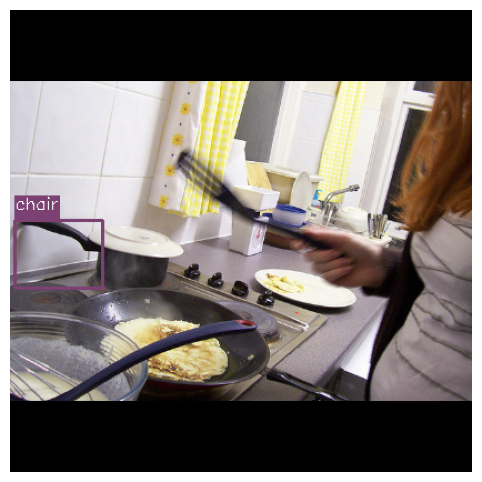

 11%|█▏        | 2002/17432 [58:58<21:55:47,  5.12s/it, loss=1.8]

batch_idx: 2001
batch_idx: 2002


 11%|█▏        | 2004/17432 [58:59<11:00:36,  2.57s/it, loss=1.8]

batch_idx: 2003
batch_idx: 2004


 12%|█▏        | 2006/17432 [58:59<5:40:13,  1.32s/it, loss=1.8] 

batch_idx: 2005
batch_idx: 2006


 12%|█▏        | 2008/17432 [58:59<3:02:35,  1.41it/s, loss=1.8]

batch_idx: 2007
batch_idx: 2008


 12%|█▏        | 2010/17432 [58:59<1:45:57,  2.43it/s, loss=1.8]

batch_idx: 2009
batch_idx: 2010


 12%|█▏        | 2012/17432 [59:00<1:07:42,  3.80it/s, loss=1.8]

batch_idx: 2011
batch_idx: 2012


 12%|█▏        | 2014/17432 [59:05<7:11:43,  1.68s/it, loss=1.8]

batch_idx: 2013
batch_idx: 2014


 12%|█▏        | 2016/17432 [59:05<3:47:20,  1.13it/s, loss=1.8]

batch_idx: 2015
batch_idx: 2016


 12%|█▏        | 2018/17432 [59:12<10:21:29,  2.42s/it, loss=1.8]

batch_idx: 2017
batch_idx: 2018


 12%|█▏        | 2020/17432 [59:12<5:20:07,  1.25s/it, loss=1.8] 

batch_idx: 2019
batch_idx: 2020


 12%|█▏        | 2022/17432 [59:19<11:48:53,  2.76s/it, loss=1.8]

batch_idx: 2021
batch_idx: 2022


 12%|█▏        | 2024/17432 [59:19<6:03:08,  1.41s/it, loss=1.8] 

batch_idx: 2023
batch_idx: 2024


 12%|█▏        | 2026/17432 [59:26<11:28:16,  2.68s/it, loss=1.8]

batch_idx: 2025
batch_idx: 2026


 12%|█▏        | 2028/17432 [59:26<5:52:55,  1.37s/it, loss=1.8] 

batch_idx: 2027
batch_idx: 2028


 12%|█▏        | 2030/17432 [59:33<11:29:14,  2.69s/it, loss=1.8]

batch_idx: 2029
batch_idx: 2030


 12%|█▏        | 2032/17432 [59:33<5:53:29,  1.38s/it, loss=1.8] 

batch_idx: 2031
batch_idx: 2032


 12%|█▏        | 2034/17432 [59:40<11:38:50,  2.72s/it, loss=1.8]

batch_idx: 2033
batch_idx: 2034


 12%|█▏        | 2036/17432 [59:40<5:58:15,  1.40s/it, loss=1.8] 

batch_idx: 2035
batch_idx: 2036


 12%|█▏        | 2038/17432 [59:47<11:33:44,  2.70s/it, loss=1.8]

batch_idx: 2037
batch_idx: 2038


 12%|█▏        | 2040/17432 [59:47<5:55:39,  1.39s/it, loss=1.8] 

batch_idx: 2039
batch_idx: 2040


 12%|█▏        | 2042/17432 [59:54<11:16:20,  2.64s/it, loss=1.8]

batch_idx: 2041
batch_idx: 2042


 12%|█▏        | 2044/17432 [59:54<5:47:05,  1.35s/it, loss=1.8] 

batch_idx: 2043
batch_idx: 2044


 12%|█▏        | 2046/17432 [1:00:02<12:28:43,  2.92s/it, loss=1.8]

batch_idx: 2045
batch_idx: 2046


 12%|█▏        | 2048/17432 [1:00:02<6:22:34,  1.49s/it, loss=1.8] 

batch_idx: 2047
batch_idx: 2048


 12%|█▏        | 2050/17432 [1:00:09<12:02:11,  2.82s/it, loss=1.8]

batch_idx: 2049
batch_idx: 2050


 12%|█▏        | 2052/17432 [1:00:09<6:09:34,  1.44s/it, loss=1.8] 

batch_idx: 2051
batch_idx: 2052


 12%|█▏        | 2054/17432 [1:00:16<11:41:18,  2.74s/it, loss=1.8]

batch_idx: 2053
batch_idx: 2054


 12%|█▏        | 2056/17432 [1:00:16<5:59:23,  1.40s/it, loss=1.8] 

batch_idx: 2055
batch_idx: 2056


 12%|█▏        | 2058/17432 [1:00:23<11:32:32,  2.70s/it, loss=1.8]

batch_idx: 2057
batch_idx: 2058


 12%|█▏        | 2060/17432 [1:00:23<5:55:06,  1.39s/it, loss=1.8] 

batch_idx: 2059
batch_idx: 2060


 12%|█▏        | 2062/17432 [1:00:29<10:55:47,  2.56s/it, loss=1.8]

batch_idx: 2061
batch_idx: 2062


 12%|█▏        | 2064/17432 [1:00:30<5:37:31,  1.32s/it, loss=1.8] 

batch_idx: 2063
batch_idx: 2064


 12%|█▏        | 2066/17432 [1:00:36<11:22:56,  2.67s/it, loss=1.8]

batch_idx: 2065
batch_idx: 2066


 12%|█▏        | 2068/17432 [1:00:37<5:50:19,  1.37s/it, loss=1.8] 

batch_idx: 2067
batch_idx: 2068


 12%|█▏        | 2070/17432 [1:00:43<11:01:55,  2.59s/it, loss=1.8]

batch_idx: 2069
batch_idx: 2070


 12%|█▏        | 2072/17432 [1:00:43<5:40:01,  1.33s/it, loss=1.8] 

batch_idx: 2071
batch_idx: 2072


 12%|█▏        | 2074/17432 [1:00:50<11:13:56,  2.63s/it, loss=1.8]

batch_idx: 2073
batch_idx: 2074


 12%|█▏        | 2076/17432 [1:00:50<5:45:56,  1.35s/it, loss=1.8] 

batch_idx: 2075
batch_idx: 2076


 12%|█▏        | 2078/17432 [1:00:57<11:08:06,  2.61s/it, loss=1.8]

batch_idx: 2077
batch_idx: 2078


 12%|█▏        | 2080/17432 [1:00:57<5:43:05,  1.34s/it, loss=1.8] 

batch_idx: 2079
batch_idx: 2080


 12%|█▏        | 2082/17432 [1:01:04<11:14:10,  2.64s/it, loss=1.8]

batch_idx: 2081
batch_idx: 2082


 12%|█▏        | 2084/17432 [1:01:04<5:46:05,  1.35s/it, loss=1.8] 

batch_idx: 2083
batch_idx: 2084


 12%|█▏        | 2086/17432 [1:01:11<11:33:01,  2.71s/it, loss=1.8]

batch_idx: 2085
batch_idx: 2086


 12%|█▏        | 2088/17432 [1:01:11<5:55:27,  1.39s/it, loss=1.8] 

batch_idx: 2087
batch_idx: 2088


 12%|█▏        | 2090/17432 [1:01:18<11:36:45,  2.72s/it, loss=1.8]

batch_idx: 2089
batch_idx: 2090


 12%|█▏        | 2092/17432 [1:01:18<5:57:20,  1.40s/it, loss=1.8] 

batch_idx: 2091
batch_idx: 2092


 12%|█▏        | 2094/17432 [1:01:25<11:39:02,  2.73s/it, loss=1.8]

batch_idx: 2093
batch_idx: 2094


 12%|█▏        | 2096/17432 [1:01:25<5:58:49,  1.40s/it, loss=1.8] 

batch_idx: 2095
batch_idx: 2096


 12%|█▏        | 2098/17432 [1:01:32<11:16:21,  2.65s/it, loss=1.8]

batch_idx: 2097
batch_idx: 2098


 12%|█▏        | 2100/17432 [1:01:32<5:47:03,  1.36s/it, loss=1.8] 

batch_idx: 2099
batch_idx: 2100


 12%|█▏        | 2102/17432 [1:01:39<11:31:10,  2.71s/it, loss=1.8]

batch_idx: 2101
batch_idx: 2102


 12%|█▏        | 2104/17432 [1:01:39<5:54:22,  1.39s/it, loss=1.8] 

batch_idx: 2103
batch_idx: 2104


 12%|█▏        | 2106/17432 [1:01:46<11:18:23,  2.66s/it, loss=1.8]

batch_idx: 2105
batch_idx: 2106


 12%|█▏        | 2108/17432 [1:01:46<5:48:04,  1.36s/it, loss=1.8] 

batch_idx: 2107
batch_idx: 2108


 12%|█▏        | 2110/17432 [1:01:53<11:26:47,  2.69s/it, loss=1.8]

batch_idx: 2109
batch_idx: 2110


 12%|█▏        | 2112/17432 [1:01:53<5:52:17,  1.38s/it, loss=1.8] 

batch_idx: 2111
batch_idx: 2112


 12%|█▏        | 2114/17432 [1:02:00<11:21:31,  2.67s/it, loss=1.8]

batch_idx: 2113
batch_idx: 2114


 12%|█▏        | 2116/17432 [1:02:00<5:49:37,  1.37s/it, loss=1.8] 

batch_idx: 2115
batch_idx: 2116


 12%|█▏        | 2118/17432 [1:02:07<11:49:13,  2.78s/it, loss=1.8]

batch_idx: 2117
batch_idx: 2118


 12%|█▏        | 2120/17432 [1:02:07<6:03:19,  1.42s/it, loss=1.8] 

batch_idx: 2119
batch_idx: 2120


 12%|█▏        | 2122/17432 [1:02:14<11:15:13,  2.65s/it, loss=1.8]

batch_idx: 2121
batch_idx: 2122


 12%|█▏        | 2124/17432 [1:02:14<5:46:35,  1.36s/it, loss=1.8] 

batch_idx: 2123
batch_idx: 2124


 12%|█▏        | 2126/17432 [1:02:20<10:55:50,  2.57s/it, loss=1.8]

batch_idx: 2125
batch_idx: 2126


 12%|█▏        | 2128/17432 [1:02:21<5:36:52,  1.32s/it, loss=1.8] 

batch_idx: 2127
batch_idx: 2128


 12%|█▏        | 2130/17432 [1:02:27<11:19:28,  2.66s/it, loss=1.8]

batch_idx: 2129
batch_idx: 2130


 12%|█▏        | 2132/17432 [1:02:28<5:48:26,  1.37s/it, loss=1.8] 

batch_idx: 2131
batch_idx: 2132


 12%|█▏        | 2134/17432 [1:02:34<11:27:52,  2.70s/it, loss=1.8]

batch_idx: 2133
batch_idx: 2134


 12%|█▏        | 2136/17432 [1:02:35<5:53:07,  1.39s/it, loss=1.8] 

batch_idx: 2135
batch_idx: 2136


 12%|█▏        | 2138/17432 [1:02:41<10:36:33,  2.50s/it, loss=1.8]

batch_idx: 2137
batch_idx: 2138


 12%|█▏        | 2140/17432 [1:02:41<5:27:33,  1.29s/it, loss=1.8] 

batch_idx: 2139
batch_idx: 2140


 12%|█▏        | 2142/17432 [1:02:48<11:47:03,  2.77s/it, loss=1.8]

batch_idx: 2141
batch_idx: 2142


 12%|█▏        | 2144/17432 [1:02:48<6:02:07,  1.42s/it, loss=1.8] 

batch_idx: 2143
batch_idx: 2144


 12%|█▏        | 2146/17432 [1:02:55<10:53:00,  2.56s/it, loss=1.8]

batch_idx: 2145
batch_idx: 2146


 12%|█▏        | 2148/17432 [1:02:55<5:35:42,  1.32s/it, loss=1.8] 

batch_idx: 2147
batch_idx: 2148


 12%|█▏        | 2150/17432 [1:03:02<11:08:17,  2.62s/it, loss=1.8]

batch_idx: 2149
batch_idx: 2150


 12%|█▏        | 2152/17432 [1:03:02<5:43:13,  1.35s/it, loss=1.8] 

batch_idx: 2151
batch_idx: 2152


 12%|█▏        | 2154/17432 [1:03:09<11:42:36,  2.76s/it, loss=1.8]

batch_idx: 2153
batch_idx: 2154


 12%|█▏        | 2156/17432 [1:03:09<5:59:46,  1.41s/it, loss=1.8] 

batch_idx: 2155
batch_idx: 2156


 12%|█▏        | 2158/17432 [1:03:16<11:23:12,  2.68s/it, loss=1.8]

batch_idx: 2157
batch_idx: 2158


 12%|█▏        | 2160/17432 [1:03:16<5:50:22,  1.38s/it, loss=1.8] 

batch_idx: 2159
batch_idx: 2160


 12%|█▏        | 2162/17432 [1:03:22<10:53:09,  2.57s/it, loss=1.8]

batch_idx: 2161
batch_idx: 2162


 12%|█▏        | 2164/17432 [1:03:23<5:35:41,  1.32s/it, loss=1.8] 

batch_idx: 2163
batch_idx: 2164


 12%|█▏        | 2166/17432 [1:03:29<10:51:33,  2.56s/it, loss=1.8]

batch_idx: 2165
batch_idx: 2166


 12%|█▏        | 2168/17432 [1:03:29<5:34:58,  1.32s/it, loss=1.8] 

batch_idx: 2167
batch_idx: 2168


 12%|█▏        | 2170/17432 [1:03:36<11:14:50,  2.65s/it, loss=1.8]

batch_idx: 2169
batch_idx: 2170


 12%|█▏        | 2172/17432 [1:03:36<5:46:16,  1.36s/it, loss=1.8] 

batch_idx: 2171
batch_idx: 2172


 12%|█▏        | 2174/17432 [1:03:44<12:08:46,  2.87s/it, loss=1.8]

batch_idx: 2173
batch_idx: 2174


 12%|█▏        | 2176/17432 [1:03:44<6:12:49,  1.47s/it, loss=1.8] 

batch_idx: 2175
batch_idx: 2176


 12%|█▏        | 2178/17432 [1:03:51<11:30:51,  2.72s/it, loss=1.8]

batch_idx: 2177
batch_idx: 2178


 13%|█▎        | 2180/17432 [1:03:51<5:54:37,  1.40s/it, loss=1.8] 

batch_idx: 2179
batch_idx: 2180


 13%|█▎        | 2182/17432 [1:03:57<11:21:13,  2.68s/it, loss=1.8]

batch_idx: 2181
batch_idx: 2182


 13%|█▎        | 2184/17432 [1:03:58<5:49:45,  1.38s/it, loss=1.8] 

batch_idx: 2183
batch_idx: 2184


 13%|█▎        | 2186/17432 [1:04:04<11:10:31,  2.64s/it, loss=1.8]

batch_idx: 2185
batch_idx: 2186


 13%|█▎        | 2188/17432 [1:04:05<5:44:06,  1.35s/it, loss=1.8] 

batch_idx: 2187
batch_idx: 2188


 13%|█▎        | 2190/17432 [1:04:12<11:57:12,  2.82s/it, loss=1.8]

batch_idx: 2189
batch_idx: 2190


 13%|█▎        | 2192/17432 [1:04:12<6:07:08,  1.45s/it, loss=1.8] 

batch_idx: 2191
batch_idx: 2192


 13%|█▎        | 2194/17432 [1:04:18<11:07:40,  2.63s/it, loss=1.8]

batch_idx: 2193
batch_idx: 2194


 13%|█▎        | 2196/17432 [1:04:19<5:43:08,  1.35s/it, loss=1.8] 

batch_idx: 2195
batch_idx: 2196


 13%|█▎        | 2198/17432 [1:04:25<10:53:50,  2.58s/it, loss=1.8]

batch_idx: 2197
batch_idx: 2198


 13%|█▎        | 2200/17432 [1:04:25<5:36:05,  1.32s/it, loss=1.8] 

batch_idx: 2199
batch_idx: 2200


 13%|█▎        | 2200/17432 [1:04:25<5:36:05,  1.32s/it, loss=1.8]

==> Saving checkpoint


 13%|█▎        | 2202/17432 [1:04:32<9:12:15,  2.18s/it, loss=1.8] 

batch_idx: 2201
batch_idx: 2202


 13%|█▎        | 2204/17432 [1:04:33<4:46:17,  1.13s/it, loss=1.8]

batch_idx: 2203
batch_idx: 2204


 13%|█▎        | 2206/17432 [1:04:39<10:28:31,  2.48s/it, loss=1.8]

batch_idx: 2205
batch_idx: 2206


 13%|█▎        | 2208/17432 [1:04:39<5:23:36,  1.28s/it, loss=1.8] 

batch_idx: 2207
batch_idx: 2208


 13%|█▎        | 2210/17432 [1:04:46<11:30:22,  2.72s/it, loss=1.8]

batch_idx: 2209
batch_idx: 2210


 13%|█▎        | 2212/17432 [1:04:47<5:53:58,  1.40s/it, loss=1.8] 

batch_idx: 2211
batch_idx: 2212


 13%|█▎        | 2214/17432 [1:04:53<11:30:03,  2.72s/it, loss=1.8]

batch_idx: 2213
batch_idx: 2214


 13%|█▎        | 2216/17432 [1:04:54<5:54:04,  1.40s/it, loss=1.8] 

batch_idx: 2215
batch_idx: 2216


 13%|█▎        | 2218/17432 [1:05:01<11:56:45,  2.83s/it, loss=1.8]

batch_idx: 2217
batch_idx: 2218


 13%|█▎        | 2220/17432 [1:05:01<6:06:56,  1.45s/it, loss=1.8] 

batch_idx: 2219
batch_idx: 2220


 13%|█▎        | 2222/17432 [1:05:09<13:01:52,  3.08s/it, loss=1.8]

batch_idx: 2221
batch_idx: 2222


 13%|█▎        | 2224/17432 [1:05:09<6:38:32,  1.57s/it, loss=1.8] 

batch_idx: 2223
batch_idx: 2224


 13%|█▎        | 2226/17432 [1:05:16<12:03:52,  2.86s/it, loss=1.8]

batch_idx: 2225
batch_idx: 2226


 13%|█▎        | 2228/17432 [1:05:17<6:10:11,  1.46s/it, loss=1.8] 

batch_idx: 2227
batch_idx: 2228


 13%|█▎        | 2230/17432 [1:05:23<11:39:18,  2.76s/it, loss=1.8]

batch_idx: 2229
batch_idx: 2230


 13%|█▎        | 2232/17432 [1:05:24<5:58:01,  1.41s/it, loss=1.8] 

batch_idx: 2231
batch_idx: 2232


 13%|█▎        | 2234/17432 [1:05:30<10:53:24,  2.58s/it, loss=1.8]

batch_idx: 2233
batch_idx: 2234


 13%|█▎        | 2236/17432 [1:05:30<5:35:33,  1.32s/it, loss=1.8] 

batch_idx: 2235
batch_idx: 2236


 13%|█▎        | 2238/17432 [1:05:37<11:40:14,  2.77s/it, loss=1.8]

batch_idx: 2237
batch_idx: 2238


 13%|█▎        | 2240/17432 [1:05:38<5:58:39,  1.42s/it, loss=1.8] 

batch_idx: 2239
batch_idx: 2240


 13%|█▎        | 2242/17432 [1:05:44<11:26:49,  2.71s/it, loss=1.8]

batch_idx: 2241
batch_idx: 2242


 13%|█▎        | 2244/17432 [1:05:45<5:52:15,  1.39s/it, loss=1.8] 

batch_idx: 2243
batch_idx: 2244


 13%|█▎        | 2246/17432 [1:05:51<11:32:17,  2.74s/it, loss=1.8]

batch_idx: 2245
batch_idx: 2246


 13%|█▎        | 2248/17432 [1:05:52<5:54:38,  1.40s/it, loss=1.8] 

batch_idx: 2247
batch_idx: 2248


 13%|█▎        | 2250/17432 [1:05:58<11:12:35,  2.66s/it, loss=1.8]

batch_idx: 2249
batch_idx: 2250


 13%|█▎        | 2252/17432 [1:05:58<5:45:10,  1.36s/it, loss=1.8] 

batch_idx: 2251
batch_idx: 2252


 13%|█▎        | 2254/17432 [1:06:06<11:40:27,  2.77s/it, loss=1.8]

batch_idx: 2253
batch_idx: 2254


 13%|█▎        | 2256/17432 [1:06:06<5:58:47,  1.42s/it, loss=1.8] 

batch_idx: 2255
batch_idx: 2256


 13%|█▎        | 2258/17432 [1:06:13<12:04:36,  2.87s/it, loss=1.8]

batch_idx: 2257
batch_idx: 2258


 13%|█▎        | 2260/17432 [1:06:13<6:10:33,  1.47s/it, loss=1.8] 

batch_idx: 2259
batch_idx: 2260


 13%|█▎        | 2262/17432 [1:06:21<12:14:37,  2.91s/it, loss=1.8]

batch_idx: 2261
batch_idx: 2262


 13%|█▎        | 2264/17432 [1:06:21<6:15:35,  1.49s/it, loss=1.8] 

batch_idx: 2263
batch_idx: 2264


 13%|█▎        | 2266/17432 [1:06:27<10:35:31,  2.51s/it, loss=1.8]

batch_idx: 2265
batch_idx: 2266


 13%|█▎        | 2268/17432 [1:06:27<5:26:53,  1.29s/it, loss=1.8] 

batch_idx: 2267
batch_idx: 2268


 13%|█▎        | 2270/17432 [1:06:34<10:54:35,  2.59s/it, loss=1.8]

batch_idx: 2269
batch_idx: 2270


 13%|█▎        | 2272/17432 [1:06:34<5:36:16,  1.33s/it, loss=1.8] 

batch_idx: 2271
batch_idx: 2272


 13%|█▎        | 2274/17432 [1:06:41<11:28:08,  2.72s/it, loss=1.8]

batch_idx: 2273
batch_idx: 2274


 13%|█▎        | 2276/17432 [1:06:41<5:52:35,  1.40s/it, loss=1.8] 

batch_idx: 2275
batch_idx: 2276


 13%|█▎        | 2278/17432 [1:06:48<10:57:18,  2.60s/it, loss=1.8]

batch_idx: 2277
batch_idx: 2278


 13%|█▎        | 2280/17432 [1:06:48<5:38:10,  1.34s/it, loss=1.8] 

batch_idx: 2279
batch_idx: 2280


 13%|█▎        | 2282/17432 [1:06:54<11:04:55,  2.63s/it, loss=1.8]

batch_idx: 2281
batch_idx: 2282


 13%|█▎        | 2284/17432 [1:06:55<5:41:21,  1.35s/it, loss=1.8] 

batch_idx: 2283
batch_idx: 2284


 13%|█▎        | 2286/17432 [1:07:01<10:45:25,  2.56s/it, loss=1.8]

batch_idx: 2285
batch_idx: 2286


 13%|█▎        | 2288/17432 [1:07:01<5:31:52,  1.31s/it, loss=1.8] 

batch_idx: 2287
batch_idx: 2288


 13%|█▎        | 2290/17432 [1:07:08<11:25:43,  2.72s/it, loss=1.8]

batch_idx: 2289
batch_idx: 2290


 13%|█▎        | 2292/17432 [1:07:08<5:51:43,  1.39s/it, loss=1.8] 

batch_idx: 2291
batch_idx: 2292


 13%|█▎        | 2294/17432 [1:07:15<11:11:15,  2.66s/it, loss=1.8]

batch_idx: 2293
batch_idx: 2294


 13%|█▎        | 2296/17432 [1:07:15<5:44:30,  1.37s/it, loss=1.8] 

batch_idx: 2295
batch_idx: 2296


 13%|█▎        | 2298/17432 [1:07:22<11:36:07,  2.76s/it, loss=1.8]

batch_idx: 2297
batch_idx: 2298


 13%|█▎        | 2300/17432 [1:07:23<5:56:26,  1.41s/it, loss=1.8] 

batch_idx: 2299
batch_idx: 2300


 13%|█▎        | 2302/17432 [1:07:29<11:00:22,  2.62s/it, loss=1.8]

batch_idx: 2301
batch_idx: 2302


 13%|█▎        | 2304/17432 [1:07:29<5:39:08,  1.35s/it, loss=1.8] 

batch_idx: 2303
batch_idx: 2304


 13%|█▎        | 2306/17432 [1:07:38<14:13:41,  3.39s/it, loss=1.8]

batch_idx: 2305
batch_idx: 2306


 13%|█▎        | 2308/17432 [1:07:39<7:13:52,  1.72s/it, loss=1.8] 

batch_idx: 2307
batch_idx: 2308


 13%|█▎        | 2310/17432 [1:07:49<16:03:12,  3.82s/it, loss=1.8]

batch_idx: 2309
batch_idx: 2310


 13%|█▎        | 2312/17432 [1:07:49<8:07:27,  1.93s/it, loss=1.8] 

batch_idx: 2311
batch_idx: 2312


 13%|█▎        | 2314/17432 [1:07:56<12:34:43,  3.00s/it, loss=1.8]

batch_idx: 2313
batch_idx: 2314


 13%|█▎        | 2316/17432 [1:07:56<6:25:20,  1.53s/it, loss=1.8] 

batch_idx: 2315
batch_idx: 2316


 13%|█▎        | 2318/17432 [1:08:03<12:02:03,  2.87s/it, loss=1.8]

batch_idx: 2317
batch_idx: 2318


 13%|█▎        | 2320/17432 [1:08:03<6:09:21,  1.47s/it, loss=1.8] 

batch_idx: 2319
batch_idx: 2320


 13%|█▎        | 2322/17432 [1:08:10<11:42:50,  2.79s/it, loss=1.8]

batch_idx: 2321
batch_idx: 2322


 13%|█▎        | 2324/17432 [1:08:10<5:59:57,  1.43s/it, loss=1.8] 

batch_idx: 2323
batch_idx: 2324


 13%|█▎        | 2326/17432 [1:08:17<11:25:39,  2.72s/it, loss=1.8]

batch_idx: 2325
batch_idx: 2326


 13%|█▎        | 2328/17432 [1:08:17<5:51:26,  1.40s/it, loss=1.8] 

batch_idx: 2327
batch_idx: 2328


 13%|█▎        | 2330/17432 [1:08:24<11:27:02,  2.73s/it, loss=1.8]

batch_idx: 2329
batch_idx: 2330


 13%|█▎        | 2332/17432 [1:08:25<5:52:07,  1.40s/it, loss=1.8] 

batch_idx: 2331
batch_idx: 2332


 13%|█▎        | 2334/17432 [1:08:31<11:26:41,  2.73s/it, loss=1.8]

batch_idx: 2333
batch_idx: 2334


 13%|█▎        | 2336/17432 [1:08:32<5:51:50,  1.40s/it, loss=1.8] 

batch_idx: 2335
batch_idx: 2336


 13%|█▎        | 2338/17432 [1:08:39<11:34:52,  2.76s/it, loss=1.8]

batch_idx: 2337
batch_idx: 2338


 13%|█▎        | 2340/17432 [1:08:39<5:55:48,  1.41s/it, loss=1.8] 

batch_idx: 2339
batch_idx: 2340


 13%|█▎        | 2342/17432 [1:08:46<11:33:11,  2.76s/it, loss=1.8]

batch_idx: 2341
batch_idx: 2342


 13%|█▎        | 2344/17432 [1:08:46<5:55:08,  1.41s/it, loss=1.8] 

batch_idx: 2343
batch_idx: 2344


 13%|█▎        | 2346/17432 [1:08:53<11:21:11,  2.71s/it, loss=1.8]

batch_idx: 2345
batch_idx: 2346


 13%|█▎        | 2348/17432 [1:08:53<5:49:15,  1.39s/it, loss=1.8] 

batch_idx: 2347
batch_idx: 2348


 13%|█▎        | 2350/17432 [1:09:00<11:17:20,  2.69s/it, loss=1.8]

batch_idx: 2349
batch_idx: 2350


 13%|█▎        | 2352/17432 [1:09:00<5:47:24,  1.38s/it, loss=1.8] 

batch_idx: 2351
batch_idx: 2352


 14%|█▎        | 2354/17432 [1:09:07<11:24:56,  2.73s/it, loss=1.8]

batch_idx: 2353
batch_idx: 2354


 14%|█▎        | 2356/17432 [1:09:07<5:50:57,  1.40s/it, loss=1.8] 

batch_idx: 2355
batch_idx: 2356


 14%|█▎        | 2358/17432 [1:09:14<11:52:03,  2.83s/it, loss=1.8]

batch_idx: 2357
batch_idx: 2358


 14%|█▎        | 2360/17432 [1:09:15<6:04:30,  1.45s/it, loss=1.8] 

batch_idx: 2359
batch_idx: 2360


 14%|█▎        | 2362/17432 [1:09:22<11:52:22,  2.84s/it, loss=1.8]

batch_idx: 2361
batch_idx: 2362


 14%|█▎        | 2364/17432 [1:09:22<6:04:31,  1.45s/it, loss=1.8] 

batch_idx: 2363
batch_idx: 2364


 14%|█▎        | 2366/17432 [1:09:29<11:50:13,  2.83s/it, loss=1.8]

batch_idx: 2365
batch_idx: 2366


 14%|█▎        | 2368/17432 [1:09:29<6:03:23,  1.45s/it, loss=1.8] 

batch_idx: 2367
batch_idx: 2368


 14%|█▎        | 2370/17432 [1:09:35<10:47:27,  2.58s/it, loss=1.8]

batch_idx: 2369
batch_idx: 2370


 14%|█▎        | 2372/17432 [1:09:36<5:32:42,  1.33s/it, loss=1.8] 

batch_idx: 2371
batch_idx: 2372


 14%|█▎        | 2374/17432 [1:09:43<11:10:52,  2.67s/it, loss=1.8]

batch_idx: 2373
batch_idx: 2374


 14%|█▎        | 2376/17432 [1:09:43<5:43:56,  1.37s/it, loss=1.8] 

batch_idx: 2375
batch_idx: 2376


 14%|█▎        | 2378/17432 [1:09:50<11:39:21,  2.79s/it, loss=1.8]

batch_idx: 2377
batch_idx: 2378


 14%|█▎        | 2380/17432 [1:09:50<5:57:59,  1.43s/it, loss=1.8] 

batch_idx: 2379
batch_idx: 2380


 14%|█▎        | 2382/17432 [1:09:57<10:56:08,  2.62s/it, loss=1.8]

batch_idx: 2381
batch_idx: 2382


 14%|█▎        | 2384/17432 [1:09:57<5:36:53,  1.34s/it, loss=1.8] 

batch_idx: 2383
batch_idx: 2384


 14%|█▎        | 2386/17432 [1:10:04<11:17:47,  2.70s/it, loss=1.8]

batch_idx: 2385
batch_idx: 2386


 14%|█▎        | 2388/17432 [1:10:04<5:47:29,  1.39s/it, loss=1.8] 

batch_idx: 2387
batch_idx: 2388


 14%|█▎        | 2390/17432 [1:10:10<11:05:25,  2.65s/it, loss=1.8]

batch_idx: 2389
batch_idx: 2390


 14%|█▎        | 2392/17432 [1:10:11<5:41:26,  1.36s/it, loss=1.8] 

batch_idx: 2391
batch_idx: 2392


 14%|█▎        | 2394/17432 [1:10:17<10:34:41,  2.53s/it, loss=1.8]

batch_idx: 2393
batch_idx: 2394


 14%|█▎        | 2396/17432 [1:10:17<5:26:27,  1.30s/it, loss=1.8] 

batch_idx: 2395
batch_idx: 2396


 14%|█▍        | 2398/17432 [1:10:25<11:46:28,  2.82s/it, loss=1.8]

batch_idx: 2397
batch_idx: 2398


 14%|█▍        | 2400/17432 [1:10:25<6:01:29,  1.44s/it, loss=1.8] 

batch_idx: 2399
batch_idx: 2400


 14%|█▍        | 2400/17432 [1:10:25<6:01:29,  1.44s/it, loss=1.8]

==> Saving checkpoint


 14%|█▍        | 2402/17432 [1:10:32<9:15:41,  2.22s/it, loss=1.8] 

batch_idx: 2401
batch_idx: 2402


 14%|█▍        | 2404/17432 [1:10:32<4:47:49,  1.15s/it, loss=1.8]

batch_idx: 2403
batch_idx: 2404


 14%|█▍        | 2406/17432 [1:10:38<10:25:32,  2.50s/it, loss=1.8]

batch_idx: 2405
batch_idx: 2406


 14%|█▍        | 2408/17432 [1:10:39<5:21:49,  1.29s/it, loss=1.8] 

batch_idx: 2407
batch_idx: 2408


 14%|█▍        | 2410/17432 [1:10:45<10:54:35,  2.61s/it, loss=1.8]

batch_idx: 2409
batch_idx: 2410


 14%|█▍        | 2412/17432 [1:10:46<5:36:20,  1.34s/it, loss=1.8] 

batch_idx: 2411
batch_idx: 2412


 14%|█▍        | 2414/17432 [1:10:52<10:38:37,  2.55s/it, loss=1.8]

batch_idx: 2413
batch_idx: 2414


 14%|█▍        | 2416/17432 [1:10:52<5:28:26,  1.31s/it, loss=1.8] 

batch_idx: 2415
batch_idx: 2416


 14%|█▍        | 2418/17432 [1:10:59<11:24:51,  2.74s/it, loss=1.8]

batch_idx: 2417
batch_idx: 2418


 14%|█▍        | 2420/17432 [1:10:59<5:50:57,  1.40s/it, loss=1.8] 

batch_idx: 2419
batch_idx: 2420


 14%|█▍        | 2422/17432 [1:11:05<10:22:47,  2.49s/it, loss=1.8]

batch_idx: 2421
batch_idx: 2422


 14%|█▍        | 2424/17432 [1:11:06<5:20:34,  1.28s/it, loss=1.8] 

batch_idx: 2423
batch_idx: 2424


 14%|█▍        | 2426/17432 [1:11:12<11:02:16,  2.65s/it, loss=1.8]

batch_idx: 2425
batch_idx: 2426


 14%|█▍        | 2428/17432 [1:11:13<5:39:56,  1.36s/it, loss=1.8] 

batch_idx: 2427
batch_idx: 2428


 14%|█▍        | 2430/17432 [1:11:20<11:41:36,  2.81s/it, loss=1.8]

batch_idx: 2429
batch_idx: 2430


 14%|█▍        | 2432/17432 [1:11:20<5:59:13,  1.44s/it, loss=1.8] 

batch_idx: 2431
batch_idx: 2432


 14%|█▍        | 2434/17432 [1:11:27<11:31:07,  2.76s/it, loss=1.8]

batch_idx: 2433
batch_idx: 2434


 14%|█▍        | 2436/17432 [1:11:27<5:54:00,  1.42s/it, loss=1.8] 

batch_idx: 2435
batch_idx: 2436


 14%|█▍        | 2438/17432 [1:11:34<11:38:23,  2.79s/it, loss=1.8]

batch_idx: 2437
batch_idx: 2438


 14%|█▍        | 2440/17432 [1:11:35<5:58:00,  1.43s/it, loss=1.8] 

batch_idx: 2439
batch_idx: 2440


 14%|█▍        | 2442/17432 [1:11:42<11:45:28,  2.82s/it, loss=1.8]

batch_idx: 2441
batch_idx: 2442


 14%|█▍        | 2444/17432 [1:11:42<6:00:51,  1.44s/it, loss=1.8] 

batch_idx: 2443
batch_idx: 2444


 14%|█▍        | 2446/17432 [1:11:48<10:58:50,  2.64s/it, loss=1.8]

batch_idx: 2445
batch_idx: 2446


 14%|█▍        | 2448/17432 [1:11:49<5:38:32,  1.36s/it, loss=1.8] 

batch_idx: 2447
batch_idx: 2448


 14%|█▍        | 2450/17432 [1:11:55<11:00:55,  2.65s/it, loss=1.8]

batch_idx: 2449
batch_idx: 2450


 14%|█▍        | 2452/17432 [1:11:56<5:39:06,  1.36s/it, loss=1.8] 

batch_idx: 2451
batch_idx: 2452


 14%|█▍        | 2454/17432 [1:12:03<11:27:14,  2.75s/it, loss=1.8]

batch_idx: 2453
batch_idx: 2454


 14%|█▍        | 2456/17432 [1:12:03<5:52:00,  1.41s/it, loss=1.8] 

batch_idx: 2455
batch_idx: 2456


 14%|█▍        | 2458/17432 [1:12:09<10:51:57,  2.61s/it, loss=1.8]

batch_idx: 2457
batch_idx: 2458


 14%|█▍        | 2460/17432 [1:12:09<5:34:43,  1.34s/it, loss=1.8] 

batch_idx: 2459
batch_idx: 2460


 14%|█▍        | 2462/17432 [1:12:16<11:09:41,  2.68s/it, loss=1.8]

batch_idx: 2461
batch_idx: 2462


 14%|█▍        | 2464/17432 [1:12:16<5:43:24,  1.38s/it, loss=1.8] 

batch_idx: 2463
batch_idx: 2464


 14%|█▍        | 2466/17432 [1:12:24<11:31:06,  2.77s/it, loss=1.8]

batch_idx: 2465
batch_idx: 2466


 14%|█▍        | 2468/17432 [1:12:24<5:54:04,  1.42s/it, loss=1.8] 

batch_idx: 2467
batch_idx: 2468


 14%|█▍        | 2470/17432 [1:12:31<11:25:40,  2.75s/it, loss=1.8]

batch_idx: 2469
batch_idx: 2470


 14%|█▍        | 2472/17432 [1:12:31<5:51:09,  1.41s/it, loss=1.8] 

batch_idx: 2471
batch_idx: 2472


 14%|█▍        | 2474/17432 [1:12:38<11:50:53,  2.85s/it, loss=1.8]

batch_idx: 2473
batch_idx: 2474


 14%|█▍        | 2476/17432 [1:12:38<6:03:40,  1.46s/it, loss=1.8] 

batch_idx: 2475
batch_idx: 2476


 14%|█▍        | 2478/17432 [1:12:45<10:47:21,  2.60s/it, loss=1.8]

batch_idx: 2477
batch_idx: 2478


 14%|█▍        | 2480/17432 [1:12:45<5:32:34,  1.33s/it, loss=1.8] 

batch_idx: 2479
batch_idx: 2480


 14%|█▍        | 2482/17432 [1:12:52<11:03:49,  2.66s/it, loss=1.8]

batch_idx: 2481
batch_idx: 2482


 14%|█▍        | 2484/17432 [1:12:52<5:40:26,  1.37s/it, loss=1.8] 

batch_idx: 2483
batch_idx: 2484


 14%|█▍        | 2486/17432 [1:12:59<11:22:58,  2.74s/it, loss=1.8]

batch_idx: 2485
batch_idx: 2486


 14%|█▍        | 2488/17432 [1:12:59<5:49:48,  1.40s/it, loss=1.8] 

batch_idx: 2487
batch_idx: 2488


 14%|█▍        | 2490/17432 [1:13:06<11:11:42,  2.70s/it, loss=1.8]

batch_idx: 2489
batch_idx: 2490


 14%|█▍        | 2492/17432 [1:13:06<5:44:27,  1.38s/it, loss=1.8] 

batch_idx: 2491
batch_idx: 2492


 14%|█▍        | 2494/17432 [1:13:13<11:24:55,  2.75s/it, loss=1.8]

batch_idx: 2493
batch_idx: 2494


 14%|█▍        | 2496/17432 [1:13:13<5:50:54,  1.41s/it, loss=1.8] 

batch_idx: 2495
batch_idx: 2496


 14%|█▍        | 2498/17432 [1:13:20<11:28:25,  2.77s/it, loss=1.8]

batch_idx: 2497
batch_idx: 2498


 14%|█▍        | 2500/17432 [1:13:20<5:52:30,  1.42s/it, loss=1.8] 

batch_idx: 2499
batch_idx: 2500


 14%|█▍        | 2502/17432 [1:13:28<11:47:04,  2.84s/it, loss=1.8]

batch_idx: 2501
batch_idx: 2502


 14%|█▍        | 2504/17432 [1:13:28<6:01:35,  1.45s/it, loss=1.8] 

batch_idx: 2503
batch_idx: 2504


 14%|█▍        | 2506/17432 [1:13:35<11:11:41,  2.70s/it, loss=1.8]

batch_idx: 2505
batch_idx: 2506


 14%|█▍        | 2508/17432 [1:13:35<5:44:16,  1.38s/it, loss=1.8] 

batch_idx: 2507
batch_idx: 2508


 14%|█▍        | 2510/17432 [1:13:42<11:48:30,  2.85s/it, loss=1.8]

batch_idx: 2509
batch_idx: 2510


 14%|█▍        | 2512/17432 [1:13:42<6:02:34,  1.46s/it, loss=1.8] 

batch_idx: 2511
batch_idx: 2512


 14%|█▍        | 2514/17432 [1:13:49<11:43:33,  2.83s/it, loss=1.8]

batch_idx: 2513
batch_idx: 2514


 14%|█▍        | 2516/17432 [1:13:50<6:00:06,  1.45s/it, loss=1.8] 

batch_idx: 2515
batch_idx: 2516


 14%|█▍        | 2518/17432 [1:13:56<10:45:48,  2.60s/it, loss=1.8]

batch_idx: 2517
batch_idx: 2518


 14%|█▍        | 2520/17432 [1:13:56<5:31:47,  1.33s/it, loss=1.8] 

batch_idx: 2519
batch_idx: 2520


 14%|█▍        | 2522/17432 [1:14:03<11:35:46,  2.80s/it, loss=1.8]

batch_idx: 2521
batch_idx: 2522


 14%|█▍        | 2524/17432 [1:14:04<5:56:14,  1.43s/it, loss=1.8] 

batch_idx: 2523
batch_idx: 2524


 14%|█▍        | 2526/17432 [1:14:10<11:02:42,  2.67s/it, loss=1.8]

batch_idx: 2525
batch_idx: 2526


 15%|█▍        | 2528/17432 [1:14:10<5:39:59,  1.37s/it, loss=1.8] 

batch_idx: 2527
batch_idx: 2528


 15%|█▍        | 2530/17432 [1:14:17<11:00:49,  2.66s/it, loss=1.8]

batch_idx: 2529
batch_idx: 2530


 15%|█▍        | 2532/17432 [1:14:17<5:39:07,  1.37s/it, loss=1.8] 

batch_idx: 2531
batch_idx: 2532


 15%|█▍        | 2534/17432 [1:14:24<11:16:52,  2.73s/it, loss=1.8]

batch_idx: 2533
batch_idx: 2534


 15%|█▍        | 2536/17432 [1:14:24<5:46:59,  1.40s/it, loss=1.8] 

batch_idx: 2535
batch_idx: 2536


 15%|█▍        | 2538/17432 [1:14:31<10:56:04,  2.64s/it, loss=1.8]

batch_idx: 2537
batch_idx: 2538


 15%|█▍        | 2540/17432 [1:14:31<5:36:39,  1.36s/it, loss=1.8] 

batch_idx: 2539
batch_idx: 2540


 15%|█▍        | 2542/17432 [1:14:38<11:30:15,  2.78s/it, loss=1.8]

batch_idx: 2541
batch_idx: 2542


 15%|█▍        | 2544/17432 [1:14:39<5:54:04,  1.43s/it, loss=1.8] 

batch_idx: 2543
batch_idx: 2544


 15%|█▍        | 2546/17432 [1:14:46<11:33:49,  2.80s/it, loss=1.8]

batch_idx: 2545
batch_idx: 2546


 15%|█▍        | 2548/17432 [1:14:46<5:55:08,  1.43s/it, loss=1.8] 

batch_idx: 2547
batch_idx: 2548


 15%|█▍        | 2550/17432 [1:14:53<11:36:31,  2.81s/it, loss=1.8]

batch_idx: 2549
batch_idx: 2550


 15%|█▍        | 2552/17432 [1:14:53<5:56:34,  1.44s/it, loss=1.8] 

batch_idx: 2551
batch_idx: 2552


 15%|█▍        | 2554/17432 [1:15:00<11:09:42,  2.70s/it, loss=1.8]

batch_idx: 2553
batch_idx: 2554


 15%|█▍        | 2556/17432 [1:15:00<5:43:28,  1.39s/it, loss=1.8] 

batch_idx: 2555
batch_idx: 2556


 15%|█▍        | 2558/17432 [1:15:07<11:10:03,  2.70s/it, loss=1.8]

batch_idx: 2557
batch_idx: 2558


 15%|█▍        | 2560/17432 [1:15:07<5:43:40,  1.39s/it, loss=1.8] 

batch_idx: 2559
batch_idx: 2560


 15%|█▍        | 2562/17432 [1:15:14<10:54:29,  2.64s/it, loss=1.8]

batch_idx: 2561
batch_idx: 2562


 15%|█▍        | 2564/17432 [1:15:14<5:35:52,  1.36s/it, loss=1.8] 

batch_idx: 2563
batch_idx: 2564


 15%|█▍        | 2566/17432 [1:15:21<11:09:33,  2.70s/it, loss=1.8]

batch_idx: 2565
batch_idx: 2566


 15%|█▍        | 2568/17432 [1:15:21<5:43:23,  1.39s/it, loss=1.8] 

batch_idx: 2567
batch_idx: 2568


 15%|█▍        | 2570/17432 [1:15:28<11:33:34,  2.80s/it, loss=1.8]

batch_idx: 2569
batch_idx: 2570


 15%|█▍        | 2572/17432 [1:15:28<5:55:09,  1.43s/it, loss=1.8] 

batch_idx: 2571
batch_idx: 2572


 15%|█▍        | 2574/17432 [1:15:35<10:44:00,  2.60s/it, loss=1.8]

batch_idx: 2573
batch_idx: 2574


 15%|█▍        | 2576/17432 [1:15:35<5:31:13,  1.34s/it, loss=1.8] 

batch_idx: 2575
batch_idx: 2576


 15%|█▍        | 2578/17432 [1:15:42<11:01:16,  2.67s/it, loss=1.8]

batch_idx: 2577
batch_idx: 2578


 15%|█▍        | 2580/17432 [1:15:42<5:39:13,  1.37s/it, loss=1.8] 

batch_idx: 2579
batch_idx: 2580


 15%|█▍        | 2582/17432 [1:15:49<11:20:33,  2.75s/it, loss=1.8]

batch_idx: 2581
batch_idx: 2582


 15%|█▍        | 2584/17432 [1:15:49<5:48:46,  1.41s/it, loss=1.8] 

batch_idx: 2583
batch_idx: 2584


 15%|█▍        | 2586/17432 [1:15:56<11:21:04,  2.75s/it, loss=1.8]

batch_idx: 2585
batch_idx: 2586


 15%|█▍        | 2588/17432 [1:15:56<5:48:56,  1.41s/it, loss=1.8] 

batch_idx: 2587
batch_idx: 2588


 15%|█▍        | 2590/17432 [1:16:03<11:06:40,  2.70s/it, loss=1.8]

batch_idx: 2589
batch_idx: 2590


 15%|█▍        | 2592/17432 [1:16:03<5:41:52,  1.38s/it, loss=1.8] 

batch_idx: 2591
batch_idx: 2592


 15%|█▍        | 2594/17432 [1:16:10<11:26:22,  2.78s/it, loss=1.8]

batch_idx: 2593
batch_idx: 2594


 15%|█▍        | 2596/17432 [1:16:11<5:51:37,  1.42s/it, loss=1.8] 

batch_idx: 2595
batch_idx: 2596


 15%|█▍        | 2598/17432 [1:16:18<11:25:55,  2.77s/it, loss=1.8]

batch_idx: 2597
batch_idx: 2598


 15%|█▍        | 2600/17432 [1:16:18<5:51:20,  1.42s/it, loss=1.8] 

batch_idx: 2599
batch_idx: 2600


 15%|█▍        | 2600/17432 [1:16:18<5:51:20,  1.42s/it, loss=1.8]

==> Saving checkpoint


 15%|█▍        | 2602/17432 [1:16:24<8:37:38,  2.09s/it, loss=1.8] 

batch_idx: 2601
batch_idx: 2602


 15%|█▍        | 2604/17432 [1:16:25<4:28:45,  1.09s/it, loss=1.8]

batch_idx: 2603
batch_idx: 2604


 15%|█▍        | 2606/17432 [1:16:31<10:11:31,  2.47s/it, loss=1.8]

batch_idx: 2605
batch_idx: 2606


 15%|█▍        | 2608/17432 [1:16:31<5:14:59,  1.27s/it, loss=1.8] 

batch_idx: 2607
batch_idx: 2608


 15%|█▍        | 2610/17432 [1:16:38<11:07:43,  2.70s/it, loss=1.8]

batch_idx: 2609
batch_idx: 2610


 15%|█▍        | 2612/17432 [1:16:39<5:42:17,  1.39s/it, loss=1.8] 

batch_idx: 2611
batch_idx: 2612


 15%|█▍        | 2614/17432 [1:16:46<11:19:36,  2.75s/it, loss=1.8]

batch_idx: 2613
batch_idx: 2614


 15%|█▌        | 2616/17432 [1:16:46<5:48:18,  1.41s/it, loss=1.8] 

batch_idx: 2615
batch_idx: 2616


 15%|█▌        | 2618/17432 [1:16:53<11:20:05,  2.75s/it, loss=1.8]

batch_idx: 2617
batch_idx: 2618


 15%|█▌        | 2620/17432 [1:16:53<5:48:25,  1.41s/it, loss=1.8] 

batch_idx: 2619
batch_idx: 2620


 15%|█▌        | 2622/17432 [1:16:59<10:46:24,  2.62s/it, loss=1.8]

batch_idx: 2621
batch_idx: 2622


 15%|█▌        | 2624/17432 [1:17:00<5:31:54,  1.34s/it, loss=1.8] 

batch_idx: 2623
batch_idx: 2624


 15%|█▌        | 2626/17432 [1:17:06<10:53:43,  2.65s/it, loss=1.8]

batch_idx: 2625
batch_idx: 2626


 15%|█▌        | 2628/17432 [1:17:07<5:35:31,  1.36s/it, loss=1.8] 

batch_idx: 2627
batch_idx: 2628


 15%|█▌        | 2630/17432 [1:17:14<11:24:09,  2.77s/it, loss=1.8]

batch_idx: 2629
batch_idx: 2630


 15%|█▌        | 2632/17432 [1:17:14<5:50:36,  1.42s/it, loss=1.8] 

batch_idx: 2631
batch_idx: 2632


 15%|█▌        | 2634/17432 [1:17:20<10:31:26,  2.56s/it, loss=1.8]

batch_idx: 2633
batch_idx: 2634


 15%|█▌        | 2636/17432 [1:17:20<5:25:13,  1.32s/it, loss=1.8] 

batch_idx: 2635
batch_idx: 2636


 15%|█▌        | 2638/17432 [1:17:27<10:39:08,  2.59s/it, loss=1.8]

batch_idx: 2637
batch_idx: 2638


 15%|█▌        | 2640/17432 [1:17:27<5:28:23,  1.33s/it, loss=1.8] 

batch_idx: 2639
batch_idx: 2640


 15%|█▌        | 2642/17432 [1:17:34<11:05:48,  2.70s/it, loss=1.8]

batch_idx: 2641
batch_idx: 2642


 15%|█▌        | 2644/17432 [1:17:34<5:41:21,  1.39s/it, loss=1.8] 

batch_idx: 2643
batch_idx: 2644


 15%|█▌        | 2646/17432 [1:17:41<11:30:20,  2.80s/it, loss=1.8]

batch_idx: 2645
batch_idx: 2646


 15%|█▌        | 2648/17432 [1:17:42<5:53:22,  1.43s/it, loss=1.8] 

batch_idx: 2647
batch_idx: 2648


 15%|█▌        | 2650/17432 [1:17:48<11:12:49,  2.73s/it, loss=1.8]

batch_idx: 2649
batch_idx: 2650


 15%|█▌        | 2652/17432 [1:17:49<5:45:04,  1.40s/it, loss=1.8] 

batch_idx: 2651
batch_idx: 2652


 15%|█▌        | 2654/17432 [1:17:55<10:37:18,  2.59s/it, loss=1.8]

batch_idx: 2653
batch_idx: 2654


 15%|█▌        | 2656/17432 [1:17:55<5:27:24,  1.33s/it, loss=1.8] 

batch_idx: 2655
batch_idx: 2656


 15%|█▌        | 2658/17432 [1:18:02<10:42:10,  2.61s/it, loss=1.8]

batch_idx: 2657
batch_idx: 2658


 15%|█▌        | 2660/17432 [1:18:02<5:29:37,  1.34s/it, loss=1.8] 

batch_idx: 2659
batch_idx: 2660


 15%|█▌        | 2662/17432 [1:18:08<10:32:35,  2.57s/it, loss=1.8]

batch_idx: 2661
batch_idx: 2662


 15%|█▌        | 2664/17432 [1:18:09<5:25:17,  1.32s/it, loss=1.8] 

batch_idx: 2663
batch_idx: 2664


 15%|█▌        | 2666/17432 [1:18:15<10:38:07,  2.59s/it, loss=1.8]

batch_idx: 2665
batch_idx: 2666


 15%|█▌        | 2668/17432 [1:18:15<5:27:52,  1.33s/it, loss=1.8] 

batch_idx: 2667
batch_idx: 2668


 15%|█▌        | 2670/17432 [1:18:23<11:17:08,  2.75s/it, loss=1.8]

batch_idx: 2669
batch_idx: 2670


 15%|█▌        | 2672/17432 [1:18:23<5:46:54,  1.41s/it, loss=1.8] 

batch_idx: 2671
batch_idx: 2672


 15%|█▌        | 2674/17432 [1:18:29<11:01:40,  2.69s/it, loss=1.8]

batch_idx: 2673
batch_idx: 2674


 15%|█▌        | 2676/17432 [1:18:30<5:39:15,  1.38s/it, loss=1.8] 

batch_idx: 2675
batch_idx: 2676


 15%|█▌        | 2678/17432 [1:18:37<11:44:56,  2.87s/it, loss=1.8]

batch_idx: 2677
batch_idx: 2678


 15%|█▌        | 2680/17432 [1:18:37<6:00:24,  1.47s/it, loss=1.8] 

batch_idx: 2679
batch_idx: 2680


 15%|█▌        | 2682/17432 [1:18:44<11:30:45,  2.81s/it, loss=1.8]

batch_idx: 2681
batch_idx: 2682


 15%|█▌        | 2684/17432 [1:18:45<5:53:50,  1.44s/it, loss=1.8] 

batch_idx: 2683
batch_idx: 2684


 15%|█▌        | 2686/17432 [1:18:51<11:18:02,  2.76s/it, loss=1.8]

batch_idx: 2685
batch_idx: 2686


 15%|█▌        | 2688/17432 [1:18:52<5:47:23,  1.41s/it, loss=1.8] 

batch_idx: 2687
batch_idx: 2688


 15%|█▌        | 2690/17432 [1:18:58<10:58:47,  2.68s/it, loss=1.8]

batch_idx: 2689
batch_idx: 2690


 15%|█▌        | 2692/17432 [1:18:59<5:37:55,  1.38s/it, loss=1.8] 

batch_idx: 2691
batch_idx: 2692


 15%|█▌        | 2694/17432 [1:19:06<11:30:00,  2.81s/it, loss=1.8]

batch_idx: 2693
batch_idx: 2694


 15%|█▌        | 2696/17432 [1:19:06<5:53:04,  1.44s/it, loss=1.8] 

batch_idx: 2695
batch_idx: 2696


 15%|█▌        | 2698/17432 [1:19:12<10:34:46,  2.58s/it, loss=1.8]

batch_idx: 2697
batch_idx: 2698


 15%|█▌        | 2700/17432 [1:19:12<5:26:02,  1.33s/it, loss=1.8] 

batch_idx: 2699
batch_idx: 2700


 16%|█▌        | 2702/17432 [1:19:19<10:37:01,  2.59s/it, loss=1.8]

batch_idx: 2701
batch_idx: 2702


 16%|█▌        | 2704/17432 [1:19:19<5:27:12,  1.33s/it, loss=1.8] 

batch_idx: 2703
batch_idx: 2704


 16%|█▌        | 2706/17432 [1:19:26<11:06:06,  2.71s/it, loss=1.8]

batch_idx: 2705
batch_idx: 2706


 16%|█▌        | 2708/17432 [1:19:26<5:41:26,  1.39s/it, loss=1.8] 

batch_idx: 2707
batch_idx: 2708


 16%|█▌        | 2710/17432 [1:19:33<10:55:16,  2.67s/it, loss=1.8]

batch_idx: 2709
batch_idx: 2710


 16%|█▌        | 2712/17432 [1:19:33<5:36:24,  1.37s/it, loss=1.8] 

batch_idx: 2711
batch_idx: 2712


 16%|█▌        | 2714/17432 [1:19:40<10:22:31,  2.54s/it, loss=1.8]

batch_idx: 2713
batch_idx: 2714


 16%|█▌        | 2716/17432 [1:19:40<5:20:04,  1.31s/it, loss=1.8] 

batch_idx: 2715
batch_idx: 2716


 16%|█▌        | 2718/17432 [1:19:46<10:44:26,  2.63s/it, loss=1.8]

batch_idx: 2717
batch_idx: 2718


 16%|█▌        | 2720/17432 [1:19:47<5:30:50,  1.35s/it, loss=1.8] 

batch_idx: 2719
batch_idx: 2720


 16%|█▌        | 2722/17432 [1:19:54<11:13:28,  2.75s/it, loss=1.8]

batch_idx: 2721
batch_idx: 2722


 16%|█▌        | 2724/17432 [1:19:54<5:45:04,  1.41s/it, loss=1.8] 

batch_idx: 2723
batch_idx: 2724


 16%|█▌        | 2726/17432 [1:20:01<11:08:00,  2.73s/it, loss=1.8]

batch_idx: 2725
batch_idx: 2726


 16%|█▌        | 2728/17432 [1:20:01<5:42:21,  1.40s/it, loss=1.8] 

batch_idx: 2727
batch_idx: 2728


 16%|█▌        | 2730/17432 [1:20:07<10:41:50,  2.62s/it, loss=1.8]

batch_idx: 2729
batch_idx: 2730


 16%|█▌        | 2732/17432 [1:20:08<5:29:23,  1.34s/it, loss=1.8] 

batch_idx: 2731
batch_idx: 2732


 16%|█▌        | 2734/17432 [1:20:15<11:42:38,  2.87s/it, loss=1.8]

batch_idx: 2733
batch_idx: 2734


 16%|█▌        | 2736/17432 [1:20:15<5:59:31,  1.47s/it, loss=1.8] 

batch_idx: 2735
batch_idx: 2736


 16%|█▌        | 2738/17432 [1:20:22<11:22:23,  2.79s/it, loss=1.8]

batch_idx: 2737
batch_idx: 2738


 16%|█▌        | 2740/17432 [1:20:23<5:49:24,  1.43s/it, loss=1.8] 

batch_idx: 2739
batch_idx: 2740


 16%|█▌        | 2742/17432 [1:20:30<12:03:28,  2.95s/it, loss=1.8]

batch_idx: 2741
batch_idx: 2742


 16%|█▌        | 2744/17432 [1:20:30<6:09:32,  1.51s/it, loss=1.8] 

batch_idx: 2743
batch_idx: 2744


 16%|█▌        | 2746/17432 [1:20:37<10:55:09,  2.68s/it, loss=1.8]

batch_idx: 2745
batch_idx: 2746


 16%|█▌        | 2748/17432 [1:20:37<5:36:06,  1.37s/it, loss=1.8] 

batch_idx: 2747
batch_idx: 2748


 16%|█▌        | 2750/17432 [1:20:44<10:42:50,  2.63s/it, loss=1.8]

batch_idx: 2749
batch_idx: 2750


 16%|█▌        | 2752/17432 [1:20:44<5:29:59,  1.35s/it, loss=1.8] 

batch_idx: 2751
batch_idx: 2752


 16%|█▌        | 2754/17432 [1:20:51<10:52:18,  2.67s/it, loss=1.8]

batch_idx: 2753
batch_idx: 2754


 16%|█▌        | 2756/17432 [1:20:51<5:34:30,  1.37s/it, loss=1.8] 

batch_idx: 2755
batch_idx: 2756


 16%|█▌        | 2758/17432 [1:20:57<10:44:35,  2.64s/it, loss=1.8]

batch_idx: 2757
batch_idx: 2758


 16%|█▌        | 2760/17432 [1:20:58<5:30:53,  1.35s/it, loss=1.8] 

batch_idx: 2759
batch_idx: 2760


 16%|█▌        | 2762/17432 [1:21:04<10:43:34,  2.63s/it, loss=1.8]

batch_idx: 2761
batch_idx: 2762


 16%|█▌        | 2764/17432 [1:21:04<5:30:13,  1.35s/it, loss=1.8] 

batch_idx: 2763
batch_idx: 2764


 16%|█▌        | 2766/17432 [1:21:11<10:33:47,  2.59s/it, loss=1.8]

batch_idx: 2765
batch_idx: 2766


 16%|█▌        | 2768/17432 [1:21:11<5:25:38,  1.33s/it, loss=1.8] 

batch_idx: 2767
batch_idx: 2768


 16%|█▌        | 2770/17432 [1:21:18<11:20:26,  2.78s/it, loss=1.8]

batch_idx: 2769
batch_idx: 2770


 16%|█▌        | 2772/17432 [1:21:19<5:48:19,  1.43s/it, loss=1.8] 

batch_idx: 2771
batch_idx: 2772


 16%|█▌        | 2774/17432 [1:21:25<11:02:35,  2.71s/it, loss=1.8]

batch_idx: 2773
batch_idx: 2774


 16%|█▌        | 2776/17432 [1:21:26<5:39:51,  1.39s/it, loss=1.8] 

batch_idx: 2775
batch_idx: 2776


 16%|█▌        | 2778/17432 [1:21:32<11:07:14,  2.73s/it, loss=1.8]

batch_idx: 2777
batch_idx: 2778


 16%|█▌        | 2780/17432 [1:21:33<5:41:46,  1.40s/it, loss=1.8] 

batch_idx: 2779
batch_idx: 2780


 16%|█▌        | 2782/17432 [1:21:39<10:56:31,  2.69s/it, loss=1.8]

batch_idx: 2781
batch_idx: 2782


 16%|█▌        | 2784/17432 [1:21:40<5:36:32,  1.38s/it, loss=1.8] 

batch_idx: 2783
batch_idx: 2784


 16%|█▌        | 2786/17432 [1:21:47<11:36:46,  2.85s/it, loss=1.8]

batch_idx: 2785
batch_idx: 2786


 16%|█▌        | 2788/17432 [1:21:47<5:56:27,  1.46s/it, loss=1.8] 

batch_idx: 2787
batch_idx: 2788


 16%|█▌        | 2790/17432 [1:21:54<11:28:02,  2.82s/it, loss=1.8]

batch_idx: 2789
batch_idx: 2790


 16%|█▌        | 2792/17432 [1:21:54<5:52:11,  1.44s/it, loss=1.8] 

batch_idx: 2791
batch_idx: 2792


 16%|█▌        | 2794/17432 [1:22:01<10:55:25,  2.69s/it, loss=1.8]

batch_idx: 2793
batch_idx: 2794


 16%|█▌        | 2796/17432 [1:22:01<5:36:09,  1.38s/it, loss=1.8] 

batch_idx: 2795
batch_idx: 2796


 16%|█▌        | 2798/17432 [1:22:09<11:26:32,  2.81s/it, loss=1.8]

batch_idx: 2797
batch_idx: 2798


 16%|█▌        | 2800/17432 [1:22:09<5:51:12,  1.44s/it, loss=1.8] 

batch_idx: 2799
batch_idx: 2800


 16%|█▌        | 2800/17432 [1:22:09<5:51:12,  1.44s/it, loss=1.8]

==> Saving checkpoint


 16%|█▌        | 2802/17432 [1:22:16<9:38:10,  2.37s/it, loss=1.8] 

batch_idx: 2801
batch_idx: 2802


 16%|█▌        | 2804/17432 [1:22:16<4:58:14,  1.22s/it, loss=1.8]

batch_idx: 2803
batch_idx: 2804


 16%|█▌        | 2806/17432 [1:22:24<10:57:24,  2.70s/it, loss=1.8]

batch_idx: 2805
batch_idx: 2806


 16%|█▌        | 2808/17432 [1:22:24<5:37:06,  1.38s/it, loss=1.8] 

batch_idx: 2807
batch_idx: 2808


 16%|█▌        | 2810/17432 [1:22:30<10:48:38,  2.66s/it, loss=1.8]

batch_idx: 2809
batch_idx: 2810


 16%|█▌        | 2812/17432 [1:22:31<5:32:44,  1.37s/it, loss=1.8] 

batch_idx: 2811
batch_idx: 2812


 16%|█▌        | 2814/17432 [1:22:37<10:34:47,  2.61s/it, loss=1.8]

batch_idx: 2813
batch_idx: 2814


 16%|█▌        | 2816/17432 [1:22:37<5:25:56,  1.34s/it, loss=1.8] 

batch_idx: 2815
batch_idx: 2816


 16%|█▌        | 2818/17432 [1:22:44<10:56:26,  2.70s/it, loss=1.8]

batch_idx: 2817
batch_idx: 2818


 16%|█▌        | 2820/17432 [1:22:44<5:36:28,  1.38s/it, loss=1.8] 

batch_idx: 2819
batch_idx: 2820


 16%|█▌        | 2822/17432 [1:22:52<11:26:50,  2.82s/it, loss=1.8]

batch_idx: 2821
batch_idx: 2822


 16%|█▌        | 2824/17432 [1:22:52<5:51:23,  1.44s/it, loss=1.8] 

batch_idx: 2823
batch_idx: 2824


 16%|█▌        | 2826/17432 [1:22:58<10:49:57,  2.67s/it, loss=1.8]

batch_idx: 2825
batch_idx: 2826


 16%|█▌        | 2828/17432 [1:22:59<5:33:29,  1.37s/it, loss=1.8] 

batch_idx: 2827
batch_idx: 2828


 16%|█▌        | 2830/17432 [1:23:06<11:01:30,  2.72s/it, loss=1.8]

batch_idx: 2829
batch_idx: 2830


 16%|█▌        | 2832/17432 [1:23:06<5:39:11,  1.39s/it, loss=1.8] 

batch_idx: 2831
batch_idx: 2832


 16%|█▋        | 2834/17432 [1:23:12<10:48:24,  2.67s/it, loss=1.8]

batch_idx: 2833
batch_idx: 2834


 16%|█▋        | 2836/17432 [1:23:13<5:32:32,  1.37s/it, loss=1.8] 

batch_idx: 2835
batch_idx: 2836


 16%|█▋        | 2838/17432 [1:23:20<11:29:51,  2.84s/it, loss=1.8]

batch_idx: 2837
batch_idx: 2838


 16%|█▋        | 2840/17432 [1:23:20<5:53:12,  1.45s/it, loss=1.8] 

batch_idx: 2839
batch_idx: 2840


 16%|█▋        | 2842/17432 [1:23:27<11:04:13,  2.73s/it, loss=1.8]

batch_idx: 2841
batch_idx: 2842


 16%|█▋        | 2844/17432 [1:23:27<5:40:23,  1.40s/it, loss=1.8] 

batch_idx: 2843
batch_idx: 2844


 16%|█▋        | 2846/17432 [1:23:34<11:02:27,  2.73s/it, loss=1.8]

batch_idx: 2845
batch_idx: 2846


 16%|█▋        | 2848/17432 [1:23:34<5:39:27,  1.40s/it, loss=1.8] 

batch_idx: 2847
batch_idx: 2848


 16%|█▋        | 2850/17432 [1:23:41<10:26:16,  2.58s/it, loss=1.8]

batch_idx: 2849
batch_idx: 2850


 16%|█▋        | 2852/17432 [1:23:41<5:21:54,  1.32s/it, loss=1.8] 

batch_idx: 2851
batch_idx: 2852


 16%|█▋        | 2854/17432 [1:23:47<10:32:03,  2.60s/it, loss=1.8]

batch_idx: 2853
batch_idx: 2854


 16%|█▋        | 2856/17432 [1:23:48<5:24:37,  1.34s/it, loss=1.8] 

batch_idx: 2855
batch_idx: 2856


 16%|█▋        | 2858/17432 [1:23:54<9:51:11,  2.43s/it, loss=1.8]

batch_idx: 2857
batch_idx: 2858


 16%|█▋        | 2860/17432 [1:23:54<5:04:53,  1.26s/it, loss=1.8]

batch_idx: 2859
batch_idx: 2860


 16%|█▋        | 2862/17432 [1:24:00<9:41:11,  2.39s/it, loss=1.8]

batch_idx: 2861
batch_idx: 2862


 16%|█▋        | 2864/17432 [1:24:00<4:59:58,  1.24s/it, loss=1.8]

batch_idx: 2863
batch_idx: 2864


 16%|█▋        | 2866/17432 [1:24:07<10:53:58,  2.69s/it, loss=1.8]

batch_idx: 2865
batch_idx: 2866


 16%|█▋        | 2868/17432 [1:24:07<5:35:21,  1.38s/it, loss=1.8] 

batch_idx: 2867
batch_idx: 2868


 16%|█▋        | 2870/17432 [1:24:15<11:36:20,  2.87s/it, loss=1.8]

batch_idx: 2869
batch_idx: 2870


 16%|█▋        | 2872/17432 [1:24:15<5:56:15,  1.47s/it, loss=1.8] 

batch_idx: 2871
batch_idx: 2872


 16%|█▋        | 2874/17432 [1:24:22<11:59:36,  2.97s/it, loss=1.8]

batch_idx: 2873
batch_idx: 2874


 16%|█▋        | 2876/17432 [1:24:23<6:07:32,  1.52s/it, loss=1.8] 

batch_idx: 2875
batch_idx: 2876


 17%|█▋        | 2878/17432 [1:24:29<10:58:22,  2.71s/it, loss=1.8]

batch_idx: 2877
batch_idx: 2878


 17%|█▋        | 2880/17432 [1:24:29<5:37:28,  1.39s/it, loss=1.8] 

batch_idx: 2879
batch_idx: 2880


 17%|█▋        | 2882/17432 [1:24:36<10:39:48,  2.64s/it, loss=1.8]

batch_idx: 2881
batch_idx: 2882


 17%|█▋        | 2884/17432 [1:24:36<5:28:56,  1.36s/it, loss=1.8] 

batch_idx: 2883
batch_idx: 2884


 17%|█▋        | 2886/17432 [1:24:43<10:51:46,  2.69s/it, loss=1.8]

batch_idx: 2885
batch_idx: 2886


 17%|█▋        | 2888/17432 [1:24:43<5:34:23,  1.38s/it, loss=1.8] 

batch_idx: 2887
batch_idx: 2888


 17%|█▋        | 2890/17432 [1:24:50<10:58:49,  2.72s/it, loss=1.8]

batch_idx: 2889
batch_idx: 2890


 17%|█▋        | 2892/17432 [1:24:50<5:37:49,  1.39s/it, loss=1.8] 

batch_idx: 2891
batch_idx: 2892


 17%|█▋        | 2894/17432 [1:24:57<10:45:04,  2.66s/it, loss=1.8]

batch_idx: 2893
batch_idx: 2894


 17%|█▋        | 2896/17432 [1:24:57<5:31:40,  1.37s/it, loss=1.8] 

batch_idx: 2895
batch_idx: 2896


 17%|█▋        | 2898/17432 [1:25:04<10:39:55,  2.64s/it, loss=1.8]

batch_idx: 2897
batch_idx: 2898


 17%|█▋        | 2900/17432 [1:25:04<5:28:31,  1.36s/it, loss=1.8] 

batch_idx: 2899
batch_idx: 2900


 17%|█▋        | 2902/17432 [1:25:10<10:06:17,  2.50s/it, loss=1.8]

batch_idx: 2901
batch_idx: 2902


 17%|█▋        | 2904/17432 [1:25:11<5:11:54,  1.29s/it, loss=1.8] 

batch_idx: 2903
batch_idx: 2904


 17%|█▋        | 2906/17432 [1:25:17<10:44:48,  2.66s/it, loss=1.8]

batch_idx: 2905
batch_idx: 2906


 17%|█▋        | 2908/17432 [1:25:18<5:30:55,  1.37s/it, loss=1.8] 

batch_idx: 2907
batch_idx: 2908


 17%|█▋        | 2910/17432 [1:25:24<10:57:02,  2.71s/it, loss=1.8]

batch_idx: 2909
batch_idx: 2910


 17%|█▋        | 2912/17432 [1:25:25<5:37:14,  1.39s/it, loss=1.8] 

batch_idx: 2911
batch_idx: 2912


 17%|█▋        | 2914/17432 [1:25:32<11:19:28,  2.81s/it, loss=1.8]

batch_idx: 2913
batch_idx: 2914


 17%|█▋        | 2916/17432 [1:25:32<5:47:44,  1.44s/it, loss=1.8] 

batch_idx: 2915
batch_idx: 2916


 17%|█▋        | 2918/17432 [1:25:39<11:40:54,  2.90s/it, loss=1.8]

batch_idx: 2917
batch_idx: 2918


 17%|█▋        | 2920/17432 [1:25:40<5:58:19,  1.48s/it, loss=1.8] 

batch_idx: 2919
batch_idx: 2920


 17%|█▋        | 2922/17432 [1:25:47<11:24:19,  2.83s/it, loss=1.8]

batch_idx: 2921
batch_idx: 2922


 17%|█▋        | 2924/17432 [1:25:47<5:50:13,  1.45s/it, loss=1.8] 

batch_idx: 2923
batch_idx: 2924


 17%|█▋        | 2926/17432 [1:25:54<10:48:32,  2.68s/it, loss=1.8]

batch_idx: 2925
batch_idx: 2926


 17%|█▋        | 2928/17432 [1:25:54<5:32:35,  1.38s/it, loss=1.8] 

batch_idx: 2927
batch_idx: 2928


 17%|█▋        | 2930/17432 [1:26:00<10:42:13,  2.66s/it, loss=1.8]

batch_idx: 2929
batch_idx: 2930


 17%|█▋        | 2932/17432 [1:26:01<5:29:27,  1.36s/it, loss=1.8] 

batch_idx: 2931
batch_idx: 2932


 17%|█▋        | 2934/17432 [1:26:08<10:59:38,  2.73s/it, loss=1.8]

batch_idx: 2933
batch_idx: 2934


 17%|█▋        | 2936/17432 [1:26:08<5:38:01,  1.40s/it, loss=1.8] 

batch_idx: 2935
batch_idx: 2936


 17%|█▋        | 2938/17432 [1:26:15<11:11:28,  2.78s/it, loss=1.8]

batch_idx: 2937
batch_idx: 2938


 17%|█▋        | 2940/17432 [1:26:15<5:43:50,  1.42s/it, loss=1.8] 

batch_idx: 2939
batch_idx: 2940


 17%|█▋        | 2942/17432 [1:26:22<11:23:53,  2.83s/it, loss=1.8]

batch_idx: 2941
batch_idx: 2942


 17%|█▋        | 2944/17432 [1:26:23<5:50:25,  1.45s/it, loss=1.8] 

batch_idx: 2943
batch_idx: 2944


 17%|█▋        | 2946/17432 [1:26:29<10:55:00,  2.71s/it, loss=1.8]

batch_idx: 2945
batch_idx: 2946


 17%|█▋        | 2948/17432 [1:26:29<5:36:06,  1.39s/it, loss=1.8] 

batch_idx: 2947
batch_idx: 2948


 17%|█▋        | 2950/17432 [1:26:36<10:11:19,  2.53s/it, loss=1.8]

batch_idx: 2949
batch_idx: 2950


 17%|█▋        | 2952/17432 [1:26:36<5:14:25,  1.30s/it, loss=1.8] 

batch_idx: 2951
batch_idx: 2952


 17%|█▋        | 2954/17432 [1:26:43<11:02:18,  2.74s/it, loss=1.8]

batch_idx: 2953
batch_idx: 2954


 17%|█▋        | 2956/17432 [1:26:43<5:39:18,  1.41s/it, loss=1.8] 

batch_idx: 2955
batch_idx: 2956


 17%|█▋        | 2958/17432 [1:26:50<10:40:23,  2.65s/it, loss=1.8]

batch_idx: 2957
batch_idx: 2958


 17%|█▋        | 2960/17432 [1:26:50<5:28:36,  1.36s/it, loss=1.8] 

batch_idx: 2959
batch_idx: 2960


 17%|█▋        | 2962/17432 [1:26:57<11:10:47,  2.78s/it, loss=1.8]

batch_idx: 2961
batch_idx: 2962


 17%|█▋        | 2964/17432 [1:26:57<5:43:19,  1.42s/it, loss=1.8] 

batch_idx: 2963
batch_idx: 2964


 17%|█▋        | 2966/17432 [1:27:04<10:40:59,  2.66s/it, loss=1.8]

batch_idx: 2965
batch_idx: 2966


 17%|█▋        | 2968/17432 [1:27:04<5:29:11,  1.37s/it, loss=1.8] 

batch_idx: 2967
batch_idx: 2968


 17%|█▋        | 2970/17432 [1:27:11<11:09:29,  2.78s/it, loss=1.8]

batch_idx: 2969
batch_idx: 2970


 17%|█▋        | 2972/17432 [1:27:11<5:42:55,  1.42s/it, loss=1.8] 

batch_idx: 2971
batch_idx: 2972


 17%|█▋        | 2974/17432 [1:27:18<10:44:48,  2.68s/it, loss=1.8]

batch_idx: 2973
batch_idx: 2974


 17%|█▋        | 2976/17432 [1:27:18<5:30:56,  1.37s/it, loss=1.8] 

batch_idx: 2975
batch_idx: 2976


 17%|█▋        | 2978/17432 [1:27:25<10:30:05,  2.62s/it, loss=1.8]

batch_idx: 2977
batch_idx: 2978


 17%|█▋        | 2980/17432 [1:27:25<5:23:33,  1.34s/it, loss=1.8] 

batch_idx: 2979
batch_idx: 2980


 17%|█▋        | 2982/17432 [1:27:32<10:32:11,  2.63s/it, loss=1.8]

batch_idx: 2981
batch_idx: 2982


 17%|█▋        | 2984/17432 [1:27:32<5:24:43,  1.35s/it, loss=1.8] 

batch_idx: 2983
batch_idx: 2984


 17%|█▋        | 2986/17432 [1:27:39<10:30:56,  2.62s/it, loss=1.8]

batch_idx: 2985
batch_idx: 2986


 17%|█▋        | 2988/17432 [1:27:39<5:23:57,  1.35s/it, loss=1.8] 

batch_idx: 2987
batch_idx: 2988


 17%|█▋        | 2990/17432 [1:27:46<10:57:11,  2.73s/it, loss=1.8]

batch_idx: 2989
batch_idx: 2990


 17%|█▋        | 2992/17432 [1:27:46<5:36:45,  1.40s/it, loss=1.8] 

batch_idx: 2991
batch_idx: 2992


 17%|█▋        | 2994/17432 [1:27:53<11:06:09,  2.77s/it, loss=1.8]

batch_idx: 2993
batch_idx: 2994


 17%|█▋        | 2996/17432 [1:27:53<5:41:29,  1.42s/it, loss=1.8] 

batch_idx: 2995
batch_idx: 2996


 17%|█▋        | 2998/17432 [1:28:00<10:56:11,  2.73s/it, loss=1.8]

batch_idx: 2997
batch_idx: 2998


 17%|█▋        | 3000/17432 [1:28:00<5:36:20,  1.40s/it, loss=1.8] 

batch_idx: 2999
batch_idx: 3000


 17%|█▋        | 3000/17432 [1:28:00<5:36:20,  1.40s/it, loss=1.8]

==> Saving checkpoint
==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


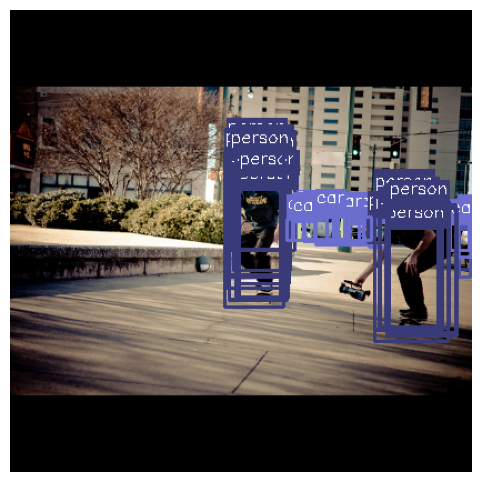

 17%|█▋        | 3002/17432 [1:28:21<20:25:59,  5.10s/it, loss=1.8]

batch_idx: 3001
batch_idx: 3002


 17%|█▋        | 3004/17432 [1:28:21<10:15:21,  2.56s/it, loss=1.8]

batch_idx: 3003
batch_idx: 3004


 17%|█▋        | 3006/17432 [1:28:22<5:16:42,  1.32s/it, loss=1.8] 

batch_idx: 3005
batch_idx: 3006


 17%|█▋        | 3008/17432 [1:28:22<2:49:54,  1.41it/s, loss=1.8]

batch_idx: 3007
batch_idx: 3008


 17%|█▋        | 3010/17432 [1:28:22<1:38:28,  2.44it/s, loss=1.8]

batch_idx: 3009
batch_idx: 3010


 17%|█▋        | 3012/17432 [1:28:22<1:02:56,  3.82it/s, loss=1.8]

batch_idx: 3011
batch_idx: 3012


 17%|█▋        | 3014/17432 [1:28:27<6:16:51,  1.57s/it, loss=1.8]

batch_idx: 3013
batch_idx: 3014


 17%|█▋        | 3016/17432 [1:28:27<3:19:17,  1.21it/s, loss=1.8]

batch_idx: 3015
batch_idx: 3016


 17%|█▋        | 3018/17432 [1:28:34<9:10:09,  2.29s/it, loss=1.8]

batch_idx: 3017
batch_idx: 3018


 17%|█▋        | 3020/17432 [1:28:34<4:44:20,  1.18s/it, loss=1.8]

batch_idx: 3019
batch_idx: 3020


 17%|█▋        | 3022/17432 [1:28:41<10:18:03,  2.57s/it, loss=1.8]

batch_idx: 3021
batch_idx: 3022


 17%|█▋        | 3024/17432 [1:28:41<5:18:15,  1.33s/it, loss=1.8] 

batch_idx: 3023
batch_idx: 3024


 17%|█▋        | 3026/17432 [1:28:47<10:11:52,  2.55s/it, loss=1.8]

batch_idx: 3025
batch_idx: 3026


 17%|█▋        | 3028/17432 [1:28:48<5:15:06,  1.31s/it, loss=1.8] 

batch_idx: 3027
batch_idx: 3028


 17%|█▋        | 3030/17432 [1:28:54<10:34:36,  2.64s/it, loss=1.8]

batch_idx: 3029
batch_idx: 3030


 17%|█▋        | 3032/17432 [1:28:55<5:25:36,  1.36s/it, loss=1.8] 

batch_idx: 3031
batch_idx: 3032


 17%|█▋        | 3034/17432 [1:29:01<10:08:01,  2.53s/it, loss=1.8]

batch_idx: 3033
batch_idx: 3034


 17%|█▋        | 3036/17432 [1:29:01<5:12:33,  1.30s/it, loss=1.8] 

batch_idx: 3035
batch_idx: 3036


 17%|█▋        | 3038/17432 [1:29:08<10:24:47,  2.60s/it, loss=1.8]

batch_idx: 3037
batch_idx: 3038


 17%|█▋        | 3040/17432 [1:29:08<5:20:49,  1.34s/it, loss=1.8] 

batch_idx: 3039
batch_idx: 3040


 17%|█▋        | 3042/17432 [1:29:15<10:58:05,  2.74s/it, loss=1.8]

batch_idx: 3041
batch_idx: 3042


 17%|█▋        | 3044/17432 [1:29:15<5:37:47,  1.41s/it, loss=1.8] 

batch_idx: 3043
batch_idx: 3044


 17%|█▋        | 3046/17432 [1:29:22<10:46:37,  2.70s/it, loss=1.8]

batch_idx: 3045
batch_idx: 3046


 17%|█▋        | 3048/17432 [1:29:22<5:31:43,  1.38s/it, loss=1.8] 

batch_idx: 3047
batch_idx: 3048


 17%|█▋        | 3050/17432 [1:29:29<10:52:02,  2.72s/it, loss=1.8]

batch_idx: 3049
batch_idx: 3050


 18%|█▊        | 3052/17432 [1:29:29<5:34:04,  1.39s/it, loss=1.8] 

batch_idx: 3051
batch_idx: 3052


 18%|█▊        | 3054/17432 [1:29:36<10:37:33,  2.66s/it, loss=1.8]

batch_idx: 3053
batch_idx: 3054


 18%|█▊        | 3056/17432 [1:29:36<5:27:06,  1.37s/it, loss=1.8] 

batch_idx: 3055
batch_idx: 3056


 18%|█▊        | 3058/17432 [1:29:42<10:05:12,  2.53s/it, loss=1.8]

batch_idx: 3057
batch_idx: 3058


 18%|█▊        | 3060/17432 [1:29:42<5:11:16,  1.30s/it, loss=1.8] 

batch_idx: 3059
batch_idx: 3060


 18%|█▊        | 3062/17432 [1:29:49<10:31:37,  2.64s/it, loss=1.8]

batch_idx: 3061
batch_idx: 3062


 18%|█▊        | 3064/17432 [1:29:49<5:24:27,  1.35s/it, loss=1.8] 

batch_idx: 3063
batch_idx: 3064


 18%|█▊        | 3066/17432 [1:29:56<10:55:08,  2.74s/it, loss=1.8]

batch_idx: 3065
batch_idx: 3066


 18%|█▊        | 3068/17432 [1:29:57<5:36:12,  1.40s/it, loss=1.8] 

batch_idx: 3067
batch_idx: 3068


 18%|█▊        | 3070/17432 [1:30:03<10:30:36,  2.63s/it, loss=1.8]

batch_idx: 3069
batch_idx: 3070


 18%|█▊        | 3072/17432 [1:30:03<5:23:46,  1.35s/it, loss=1.8] 

batch_idx: 3071
batch_idx: 3072


 18%|█▊        | 3074/17432 [1:30:10<11:03:44,  2.77s/it, loss=1.8]

batch_idx: 3073
batch_idx: 3074


 18%|█▊        | 3076/17432 [1:30:11<5:39:59,  1.42s/it, loss=1.8] 

batch_idx: 3075
batch_idx: 3076


 18%|█▊        | 3078/17432 [1:30:18<11:07:09,  2.79s/it, loss=1.8]

batch_idx: 3077
batch_idx: 3078


 18%|█▊        | 3080/17432 [1:30:18<5:41:41,  1.43s/it, loss=1.8] 

batch_idx: 3079
batch_idx: 3080


 18%|█▊        | 3082/17432 [1:30:25<10:58:39,  2.75s/it, loss=1.8]

batch_idx: 3081
batch_idx: 3082


 18%|█▊        | 3084/17432 [1:30:25<5:37:20,  1.41s/it, loss=1.8] 

batch_idx: 3083
batch_idx: 3084


 18%|█▊        | 3086/17432 [1:30:32<11:01:22,  2.77s/it, loss=1.8]

batch_idx: 3085
batch_idx: 3086


 18%|█▊        | 3088/17432 [1:30:32<5:38:47,  1.42s/it, loss=1.8] 

batch_idx: 3087
batch_idx: 3088


 18%|█▊        | 3090/17432 [1:30:39<11:08:16,  2.80s/it, loss=1.8]

batch_idx: 3089
batch_idx: 3090


 18%|█▊        | 3092/17432 [1:30:40<5:42:03,  1.43s/it, loss=1.8] 

batch_idx: 3091
batch_idx: 3092


 18%|█▊        | 3094/17432 [1:30:46<10:52:36,  2.73s/it, loss=1.8]

batch_idx: 3093
batch_idx: 3094


 18%|█▊        | 3096/17432 [1:30:47<5:34:32,  1.40s/it, loss=1.8] 

batch_idx: 3095
batch_idx: 3096


 18%|█▊        | 3098/17432 [1:30:54<11:11:47,  2.81s/it, loss=1.8]

batch_idx: 3097
batch_idx: 3098


 18%|█▊        | 3100/17432 [1:30:54<5:44:09,  1.44s/it, loss=1.8] 

batch_idx: 3099
batch_idx: 3100


 18%|█▊        | 3102/17432 [1:31:01<10:38:53,  2.68s/it, loss=1.8]

batch_idx: 3101
batch_idx: 3102


 18%|█▊        | 3104/17432 [1:31:01<5:27:46,  1.37s/it, loss=1.8] 

batch_idx: 3103
batch_idx: 3104


 18%|█▊        | 3106/17432 [1:31:07<10:21:51,  2.60s/it, loss=1.8]

batch_idx: 3105
batch_idx: 3106


 18%|█▊        | 3108/17432 [1:31:08<5:19:21,  1.34s/it, loss=1.8] 

batch_idx: 3107
batch_idx: 3108


 18%|█▊        | 3110/17432 [1:31:14<10:39:27,  2.68s/it, loss=1.8]

batch_idx: 3109
batch_idx: 3110


 18%|█▊        | 3112/17432 [1:31:15<5:27:52,  1.37s/it, loss=1.8] 

batch_idx: 3111
batch_idx: 3112


 18%|█▊        | 3114/17432 [1:31:21<10:53:21,  2.74s/it, loss=1.8]

batch_idx: 3113
batch_idx: 3114


 18%|█▊        | 3116/17432 [1:31:22<5:34:47,  1.40s/it, loss=1.8] 

batch_idx: 3115
batch_idx: 3116


 18%|█▊        | 3118/17432 [1:31:29<10:53:42,  2.74s/it, loss=1.8]

batch_idx: 3117
batch_idx: 3118


 18%|█▊        | 3120/17432 [1:31:29<5:35:04,  1.40s/it, loss=1.8] 

batch_idx: 3119
batch_idx: 3120


 18%|█▊        | 3122/17432 [1:31:36<11:25:25,  2.87s/it, loss=1.8]

batch_idx: 3121
batch_idx: 3122


 18%|█▊        | 3124/17432 [1:31:36<5:50:32,  1.47s/it, loss=1.8] 

batch_idx: 3123
batch_idx: 3124


 18%|█▊        | 3126/17432 [1:31:44<11:17:12,  2.84s/it, loss=1.8]

batch_idx: 3125
batch_idx: 3126


 18%|█▊        | 3128/17432 [1:31:44<5:46:33,  1.45s/it, loss=1.8] 

batch_idx: 3127
batch_idx: 3128


 18%|█▊        | 3130/17432 [1:31:51<11:01:00,  2.77s/it, loss=1.8]

batch_idx: 3129
batch_idx: 3130


 18%|█▊        | 3132/17432 [1:31:51<5:38:43,  1.42s/it, loss=1.8] 

batch_idx: 3131
batch_idx: 3132


 18%|█▊        | 3134/17432 [1:31:58<11:12:52,  2.82s/it, loss=1.8]

batch_idx: 3133
batch_idx: 3134


 18%|█▊        | 3136/17432 [1:31:58<5:44:20,  1.45s/it, loss=1.8] 

batch_idx: 3135
batch_idx: 3136


 18%|█▊        | 3138/17432 [1:32:05<11:08:57,  2.81s/it, loss=1.8]

batch_idx: 3137
batch_idx: 3138


 18%|█▊        | 3140/17432 [1:32:06<5:42:35,  1.44s/it, loss=1.8] 

batch_idx: 3139
batch_idx: 3140


 18%|█▊        | 3142/17432 [1:32:13<11:05:44,  2.80s/it, loss=1.8]

batch_idx: 3141
batch_idx: 3142


 18%|█▊        | 3144/17432 [1:32:13<5:40:53,  1.43s/it, loss=1.8] 

batch_idx: 3143
batch_idx: 3144


 18%|█▊        | 3146/17432 [1:32:19<10:26:10,  2.63s/it, loss=1.8]

batch_idx: 3145
batch_idx: 3146


 18%|█▊        | 3148/17432 [1:32:20<5:21:21,  1.35s/it, loss=1.8] 

batch_idx: 3147
batch_idx: 3148


 18%|█▊        | 3150/17432 [1:32:27<11:22:17,  2.87s/it, loss=1.8]

batch_idx: 3149
batch_idx: 3150


 18%|█▊        | 3152/17432 [1:32:27<5:48:55,  1.47s/it, loss=1.8] 

batch_idx: 3151
batch_idx: 3152


 18%|█▊        | 3154/17432 [1:32:35<11:37:55,  2.93s/it, loss=1.8]

batch_idx: 3153
batch_idx: 3154


 18%|█▊        | 3156/17432 [1:32:35<5:56:36,  1.50s/it, loss=1.8] 

batch_idx: 3155
batch_idx: 3156


 18%|█▊        | 3158/17432 [1:32:42<11:36:24,  2.93s/it, loss=1.8]

batch_idx: 3157
batch_idx: 3158


 18%|█▊        | 3160/17432 [1:32:42<5:55:50,  1.50s/it, loss=1.8] 

batch_idx: 3159
batch_idx: 3160


 18%|█▊        | 3162/17432 [1:32:49<10:42:34,  2.70s/it, loss=1.8]

batch_idx: 3161
batch_idx: 3162


 18%|█▊        | 3164/17432 [1:32:49<5:29:46,  1.39s/it, loss=1.8] 

batch_idx: 3163
batch_idx: 3164


 18%|█▊        | 3166/17432 [1:32:56<10:37:36,  2.68s/it, loss=1.8]

batch_idx: 3165
batch_idx: 3166


 18%|█▊        | 3168/17432 [1:32:56<5:26:56,  1.38s/it, loss=1.8] 

batch_idx: 3167
batch_idx: 3168


 18%|█▊        | 3170/17432 [1:33:03<11:01:37,  2.78s/it, loss=1.8]

batch_idx: 3169
batch_idx: 3170


 18%|█▊        | 3172/17432 [1:33:04<5:39:10,  1.43s/it, loss=1.8] 

batch_idx: 3171
batch_idx: 3172


 18%|█▊        | 3174/17432 [1:33:10<10:43:18,  2.71s/it, loss=1.8]

batch_idx: 3173
batch_idx: 3174


 18%|█▊        | 3176/17432 [1:33:10<5:29:54,  1.39s/it, loss=1.8] 

batch_idx: 3175
batch_idx: 3176


 18%|█▊        | 3178/17432 [1:33:18<11:05:26,  2.80s/it, loss=1.8]

batch_idx: 3177
batch_idx: 3178


 18%|█▊        | 3180/17432 [1:33:18<5:40:48,  1.43s/it, loss=1.8] 

batch_idx: 3179
batch_idx: 3180


 18%|█▊        | 3182/17432 [1:33:24<10:30:44,  2.66s/it, loss=1.8]

batch_idx: 3181
batch_idx: 3182


 18%|█▊        | 3184/17432 [1:33:25<5:23:41,  1.36s/it, loss=1.8] 

batch_idx: 3183
batch_idx: 3184


 18%|█▊        | 3186/17432 [1:33:32<11:19:24,  2.86s/it, loss=1.8]

batch_idx: 3185
batch_idx: 3186


 18%|█▊        | 3188/17432 [1:33:32<5:47:27,  1.46s/it, loss=1.8] 

batch_idx: 3187
batch_idx: 3188


 18%|█▊        | 3190/17432 [1:33:39<11:23:53,  2.88s/it, loss=1.8]

batch_idx: 3189
batch_idx: 3190


 18%|█▊        | 3192/17432 [1:33:40<5:49:35,  1.47s/it, loss=1.8] 

batch_idx: 3191
batch_idx: 3192


 18%|█▊        | 3194/17432 [1:33:46<10:52:50,  2.75s/it, loss=1.8]

batch_idx: 3193
batch_idx: 3194


 18%|█▊        | 3196/17432 [1:33:47<5:34:29,  1.41s/it, loss=1.8] 

batch_idx: 3195
batch_idx: 3196


 18%|█▊        | 3198/17432 [1:33:54<10:57:33,  2.77s/it, loss=1.8]

batch_idx: 3197
batch_idx: 3198


 18%|█▊        | 3200/17432 [1:33:54<5:37:15,  1.42s/it, loss=1.8] 

batch_idx: 3199
batch_idx: 3200


 18%|█▊        | 3200/17432 [1:33:54<5:37:15,  1.42s/it, loss=1.8]

==> Saving checkpoint


 18%|█▊        | 3202/17432 [1:34:01<8:17:41,  2.10s/it, loss=1.8] 

batch_idx: 3201
batch_idx: 3202


 18%|█▊        | 3204/17432 [1:34:01<4:18:27,  1.09s/it, loss=1.8]

batch_idx: 3203
batch_idx: 3204


 18%|█▊        | 3206/17432 [1:34:07<9:43:08,  2.46s/it, loss=1.8]

batch_idx: 3205
batch_idx: 3206


 18%|█▊        | 3208/17432 [1:34:08<5:00:40,  1.27s/it, loss=1.8]

batch_idx: 3207
batch_idx: 3208


 18%|█▊        | 3210/17432 [1:34:14<10:26:49,  2.64s/it, loss=1.8]

batch_idx: 3209
batch_idx: 3210


 18%|█▊        | 3212/17432 [1:34:15<5:21:42,  1.36s/it, loss=1.8] 

batch_idx: 3211
batch_idx: 3212


 18%|█▊        | 3214/17432 [1:34:22<11:02:06,  2.79s/it, loss=1.8]

batch_idx: 3213
batch_idx: 3214


 18%|█▊        | 3216/17432 [1:34:22<5:39:04,  1.43s/it, loss=1.8] 

batch_idx: 3215
batch_idx: 3216


 18%|█▊        | 3218/17432 [1:34:28<10:19:58,  2.62s/it, loss=1.8]

batch_idx: 3217
batch_idx: 3218


 18%|█▊        | 3220/17432 [1:34:29<5:18:24,  1.34s/it, loss=1.8] 

batch_idx: 3219
batch_idx: 3220


 18%|█▊        | 3222/17432 [1:34:35<10:17:17,  2.61s/it, loss=1.8]

batch_idx: 3221
batch_idx: 3222


 18%|█▊        | 3224/17432 [1:34:35<5:17:27,  1.34s/it, loss=1.8] 

batch_idx: 3223
batch_idx: 3224


 19%|█▊        | 3226/17432 [1:34:42<10:54:00,  2.76s/it, loss=1.8]

batch_idx: 3225
batch_idx: 3226


 19%|█▊        | 3228/17432 [1:34:43<5:35:17,  1.42s/it, loss=1.8] 

batch_idx: 3227
batch_idx: 3228


 19%|█▊        | 3230/17432 [1:34:50<10:58:50,  2.78s/it, loss=1.8]

batch_idx: 3229
batch_idx: 3230


 19%|█▊        | 3232/17432 [1:34:50<5:37:27,  1.43s/it, loss=1.8] 

batch_idx: 3231
batch_idx: 3232


 19%|█▊        | 3234/17432 [1:34:56<10:30:25,  2.66s/it, loss=1.8]

batch_idx: 3233
batch_idx: 3234


 19%|█▊        | 3236/17432 [1:34:57<5:23:30,  1.37s/it, loss=1.8] 

batch_idx: 3235
batch_idx: 3236


 19%|█▊        | 3238/17432 [1:35:04<10:41:43,  2.71s/it, loss=1.8]

batch_idx: 3237
batch_idx: 3238


 19%|█▊        | 3240/17432 [1:35:04<5:28:57,  1.39s/it, loss=1.8] 

batch_idx: 3239
batch_idx: 3240


 19%|█▊        | 3242/17432 [1:35:10<10:13:04,  2.59s/it, loss=1.8]

batch_idx: 3241
batch_idx: 3242


 19%|█▊        | 3244/17432 [1:35:10<5:15:02,  1.33s/it, loss=1.8] 

batch_idx: 3243
batch_idx: 3244


 19%|█▊        | 3246/17432 [1:35:17<10:41:05,  2.71s/it, loss=1.8]

batch_idx: 3245
batch_idx: 3246


 19%|█▊        | 3248/17432 [1:35:18<5:28:43,  1.39s/it, loss=1.8] 

batch_idx: 3247
batch_idx: 3248


 19%|█▊        | 3250/17432 [1:35:24<9:59:49,  2.54s/it, loss=1.8]

batch_idx: 3249
batch_idx: 3250


 19%|█▊        | 3252/17432 [1:35:24<5:08:48,  1.31s/it, loss=1.8]

batch_idx: 3251
batch_idx: 3252


 19%|█▊        | 3254/17432 [1:35:31<10:56:39,  2.78s/it, loss=1.8]

batch_idx: 3253
batch_idx: 3254


 19%|█▊        | 3256/17432 [1:35:31<5:36:22,  1.42s/it, loss=1.8] 

batch_idx: 3255
batch_idx: 3256


 19%|█▊        | 3258/17432 [1:35:38<10:17:29,  2.61s/it, loss=1.8]

batch_idx: 3257
batch_idx: 3258


 19%|█▊        | 3260/17432 [1:35:38<5:17:14,  1.34s/it, loss=1.8] 

batch_idx: 3259
batch_idx: 3260


 19%|█▊        | 3262/17432 [1:35:45<10:31:09,  2.67s/it, loss=1.8]

batch_idx: 3261
batch_idx: 3262


 19%|█▊        | 3264/17432 [1:35:45<5:24:14,  1.37s/it, loss=1.8] 

batch_idx: 3263
batch_idx: 3264


 19%|█▊        | 3266/17432 [1:35:52<10:29:37,  2.67s/it, loss=1.8]

batch_idx: 3265
batch_idx: 3266


 19%|█▊        | 3268/17432 [1:35:52<5:23:12,  1.37s/it, loss=1.8] 

batch_idx: 3267
batch_idx: 3268


 19%|█▉        | 3270/17432 [1:35:59<11:09:57,  2.84s/it, loss=1.8]

batch_idx: 3269
batch_idx: 3270


 19%|█▉        | 3272/17432 [1:36:00<5:42:47,  1.45s/it, loss=1.8] 

batch_idx: 3271
batch_idx: 3272


 19%|█▉        | 3274/17432 [1:36:07<11:03:09,  2.81s/it, loss=1.8]

batch_idx: 3273
batch_idx: 3274


 19%|█▉        | 3276/17432 [1:36:07<5:39:30,  1.44s/it, loss=1.8] 

batch_idx: 3275
batch_idx: 3276


 19%|█▉        | 3278/17432 [1:36:14<10:52:26,  2.77s/it, loss=1.8]

batch_idx: 3277
batch_idx: 3278


 19%|█▉        | 3280/17432 [1:36:14<5:34:08,  1.42s/it, loss=1.8] 

batch_idx: 3279
batch_idx: 3280


 19%|█▉        | 3282/17432 [1:36:21<10:39:19,  2.71s/it, loss=1.8]

batch_idx: 3281
batch_idx: 3282


 19%|█▉        | 3284/17432 [1:36:21<5:27:41,  1.39s/it, loss=1.8] 

batch_idx: 3283
batch_idx: 3284


 19%|█▉        | 3286/17432 [1:36:28<10:53:46,  2.77s/it, loss=1.8]

batch_idx: 3285
batch_idx: 3286


 19%|█▉        | 3288/17432 [1:36:28<5:34:51,  1.42s/it, loss=1.8] 

batch_idx: 3287
batch_idx: 3288


 19%|█▉        | 3290/17432 [1:36:35<10:53:05,  2.77s/it, loss=1.8]

batch_idx: 3289
batch_idx: 3290


 19%|█▉        | 3292/17432 [1:36:35<5:34:26,  1.42s/it, loss=1.8] 

batch_idx: 3291
batch_idx: 3292


 19%|█▉        | 3294/17432 [1:36:42<10:20:23,  2.63s/it, loss=1.8]

batch_idx: 3293
batch_idx: 3294


 19%|█▉        | 3296/17432 [1:36:42<5:18:19,  1.35s/it, loss=1.8] 

batch_idx: 3295
batch_idx: 3296


 19%|█▉        | 3298/17432 [1:36:48<9:36:50,  2.45s/it, loss=1.8]

batch_idx: 3297
batch_idx: 3298


 19%|█▉        | 3300/17432 [1:36:48<4:57:01,  1.26s/it, loss=1.8]

batch_idx: 3299
batch_idx: 3300


 19%|█▉        | 3302/17432 [1:36:56<10:44:51,  2.74s/it, loss=1.8]

batch_idx: 3301
batch_idx: 3302


 19%|█▉        | 3304/17432 [1:36:56<5:30:49,  1.40s/it, loss=1.8] 

batch_idx: 3303
batch_idx: 3304


 19%|█▉        | 3306/17432 [1:37:03<10:39:25,  2.72s/it, loss=1.8]

batch_idx: 3305
batch_idx: 3306


 19%|█▉        | 3308/17432 [1:37:03<5:27:41,  1.39s/it, loss=1.8] 

batch_idx: 3307
batch_idx: 3308


 19%|█▉        | 3310/17432 [1:37:09<10:27:17,  2.67s/it, loss=1.8]

batch_idx: 3309
batch_idx: 3310


 19%|█▉        | 3312/17432 [1:37:10<5:21:44,  1.37s/it, loss=1.8] 

batch_idx: 3311
batch_idx: 3312


 19%|█▉        | 3314/17432 [1:37:16<10:31:52,  2.69s/it, loss=1.8]

batch_idx: 3313
batch_idx: 3314


 19%|█▉        | 3316/17432 [1:37:17<5:24:02,  1.38s/it, loss=1.8] 

batch_idx: 3315
batch_idx: 3316


 19%|█▉        | 3318/17432 [1:37:23<10:17:48,  2.63s/it, loss=1.8]

batch_idx: 3317
batch_idx: 3318


 19%|█▉        | 3320/17432 [1:37:23<5:16:58,  1.35s/it, loss=1.8] 

batch_idx: 3319
batch_idx: 3320


 19%|█▉        | 3322/17432 [1:37:31<10:59:11,  2.80s/it, loss=1.8]

batch_idx: 3321
batch_idx: 3322


 19%|█▉        | 3324/17432 [1:37:31<5:37:19,  1.43s/it, loss=1.8] 

batch_idx: 3323
batch_idx: 3324


 19%|█▉        | 3326/17432 [1:37:38<10:36:39,  2.71s/it, loss=1.8]

batch_idx: 3325
batch_idx: 3326


 19%|█▉        | 3328/17432 [1:37:38<5:26:30,  1.39s/it, loss=1.8] 

batch_idx: 3327
batch_idx: 3328


 19%|█▉        | 3330/17432 [1:37:44<10:25:30,  2.66s/it, loss=1.8]

batch_idx: 3329
batch_idx: 3330


 19%|█▉        | 3332/17432 [1:37:45<5:20:56,  1.37s/it, loss=1.8] 

batch_idx: 3331
batch_idx: 3332


 19%|█▉        | 3334/17432 [1:37:52<10:47:59,  2.76s/it, loss=1.8]

batch_idx: 3333
batch_idx: 3334


 19%|█▉        | 3336/17432 [1:37:52<5:31:55,  1.41s/it, loss=1.8] 

batch_idx: 3335
batch_idx: 3336


 19%|█▉        | 3338/17432 [1:37:59<10:28:21,  2.67s/it, loss=1.8]

batch_idx: 3337
batch_idx: 3338


 19%|█▉        | 3340/17432 [1:37:59<5:22:23,  1.37s/it, loss=1.8] 

batch_idx: 3339
batch_idx: 3340


 19%|█▉        | 3342/17432 [1:38:06<11:04:09,  2.83s/it, loss=1.8]

batch_idx: 3341
batch_idx: 3342


 19%|█▉        | 3344/17432 [1:38:06<5:39:45,  1.45s/it, loss=1.8] 

batch_idx: 3343
batch_idx: 3344


 19%|█▉        | 3346/17432 [1:38:13<11:08:27,  2.85s/it, loss=1.8]

batch_idx: 3345
batch_idx: 3346


 19%|█▉        | 3348/17432 [1:38:14<5:41:58,  1.46s/it, loss=1.8] 

batch_idx: 3347
batch_idx: 3348


 19%|█▉        | 3350/17432 [1:38:20<10:30:10,  2.68s/it, loss=1.8]

batch_idx: 3349
batch_idx: 3350


 19%|█▉        | 3352/17432 [1:38:21<5:23:27,  1.38s/it, loss=1.8] 

batch_idx: 3351
batch_idx: 3352


 19%|█▉        | 3354/17432 [1:38:27<10:31:04,  2.69s/it, loss=1.8]

batch_idx: 3353
batch_idx: 3354


 19%|█▉        | 3356/17432 [1:38:28<5:23:47,  1.38s/it, loss=1.8] 

batch_idx: 3355
batch_idx: 3356


 19%|█▉        | 3358/17432 [1:38:34<10:32:50,  2.70s/it, loss=1.8]

batch_idx: 3357
batch_idx: 3358


 19%|█▉        | 3360/17432 [1:38:35<5:24:24,  1.38s/it, loss=1.8] 

batch_idx: 3359
batch_idx: 3360


 19%|█▉        | 3362/17432 [1:38:42<11:14:08,  2.87s/it, loss=1.8]

batch_idx: 3361
batch_idx: 3362


 19%|█▉        | 3364/17432 [1:38:42<5:44:57,  1.47s/it, loss=1.8] 

batch_idx: 3363
batch_idx: 3364


 19%|█▉        | 3366/17432 [1:38:49<10:58:37,  2.81s/it, loss=1.8]

batch_idx: 3365
batch_idx: 3366


 19%|█▉        | 3368/17432 [1:38:49<5:37:13,  1.44s/it, loss=1.8] 

batch_idx: 3367
batch_idx: 3368


 19%|█▉        | 3370/17432 [1:38:56<10:44:04,  2.75s/it, loss=1.8]

batch_idx: 3369
batch_idx: 3370


 19%|█▉        | 3372/17432 [1:38:57<5:29:56,  1.41s/it, loss=1.8] 

batch_idx: 3371
batch_idx: 3372


 19%|█▉        | 3374/17432 [1:39:03<9:59:25,  2.56s/it, loss=1.8]

batch_idx: 3373
batch_idx: 3374


 19%|█▉        | 3376/17432 [1:39:03<5:08:13,  1.32s/it, loss=1.8]

batch_idx: 3375
batch_idx: 3376


 19%|█▉        | 3378/17432 [1:39:10<10:31:19,  2.70s/it, loss=1.8]

batch_idx: 3377
batch_idx: 3378


 19%|█▉        | 3380/17432 [1:39:10<5:23:46,  1.38s/it, loss=1.8] 

batch_idx: 3379
batch_idx: 3380


 19%|█▉        | 3382/17432 [1:39:17<10:16:02,  2.63s/it, loss=1.8]

batch_idx: 3381
batch_idx: 3382


 19%|█▉        | 3384/17432 [1:39:17<5:16:24,  1.35s/it, loss=1.8] 

batch_idx: 3383
batch_idx: 3384


 19%|█▉        | 3386/17432 [1:39:24<10:32:13,  2.70s/it, loss=1.8]

batch_idx: 3385
batch_idx: 3386


 19%|█▉        | 3388/17432 [1:39:24<5:24:19,  1.39s/it, loss=1.8] 

batch_idx: 3387
batch_idx: 3388


 19%|█▉        | 3390/17432 [1:39:31<10:11:59,  2.62s/it, loss=1.8]

batch_idx: 3389
batch_idx: 3390


 19%|█▉        | 3392/17432 [1:39:31<5:14:32,  1.34s/it, loss=1.8] 

batch_idx: 3391
batch_idx: 3392


 19%|█▉        | 3394/17432 [1:39:38<10:58:37,  2.82s/it, loss=1.8]

batch_idx: 3393
batch_idx: 3394


 19%|█▉        | 3396/17432 [1:39:38<5:37:16,  1.44s/it, loss=1.8] 

batch_idx: 3395
batch_idx: 3396


 19%|█▉        | 3398/17432 [1:39:45<10:10:57,  2.61s/it, loss=1.8]

batch_idx: 3397
batch_idx: 3398


 20%|█▉        | 3400/17432 [1:39:45<5:13:56,  1.34s/it, loss=1.8] 

batch_idx: 3399
batch_idx: 3400


 20%|█▉        | 3400/17432 [1:39:45<5:13:56,  1.34s/it, loss=1.8]

==> Saving checkpoint


 20%|█▉        | 3402/17432 [1:39:51<8:01:47,  2.06s/it, loss=1.8] 

batch_idx: 3401
batch_idx: 3402


 20%|█▉        | 3404/17432 [1:39:52<4:10:42,  1.07s/it, loss=1.8]

batch_idx: 3403
batch_idx: 3404


 20%|█▉        | 3406/17432 [1:39:58<9:32:08,  2.45s/it, loss=1.8]

batch_idx: 3405
batch_idx: 3406


 20%|█▉        | 3408/17432 [1:39:58<4:54:52,  1.26s/it, loss=1.8]

batch_idx: 3407
batch_idx: 3408


 20%|█▉        | 3410/17432 [1:40:05<10:14:25,  2.63s/it, loss=1.8]

batch_idx: 3409
batch_idx: 3410


 20%|█▉        | 3412/17432 [1:40:05<5:15:29,  1.35s/it, loss=1.8] 

batch_idx: 3411
batch_idx: 3412


 20%|█▉        | 3414/17432 [1:40:12<10:25:00,  2.68s/it, loss=1.8]

batch_idx: 3413
batch_idx: 3414


 20%|█▉        | 3416/17432 [1:40:12<5:20:46,  1.37s/it, loss=1.8] 

batch_idx: 3415
batch_idx: 3416


 20%|█▉        | 3418/17432 [1:40:19<10:30:26,  2.70s/it, loss=1.8]

batch_idx: 3417
batch_idx: 3418


 20%|█▉        | 3420/17432 [1:40:19<5:23:21,  1.38s/it, loss=1.8] 

batch_idx: 3419
batch_idx: 3420


 20%|█▉        | 3422/17432 [1:40:26<9:49:39,  2.53s/it, loss=1.8]

batch_idx: 3421
batch_idx: 3422


 20%|█▉        | 3424/17432 [1:40:26<5:03:20,  1.30s/it, loss=1.8]

batch_idx: 3423
batch_idx: 3424


 20%|█▉        | 3426/17432 [1:40:33<10:22:08,  2.67s/it, loss=1.8]

batch_idx: 3425
batch_idx: 3426


 20%|█▉        | 3428/17432 [1:40:33<5:19:11,  1.37s/it, loss=1.8] 

batch_idx: 3427
batch_idx: 3428


 20%|█▉        | 3430/17432 [1:40:40<10:55:34,  2.81s/it, loss=1.8]

batch_idx: 3429
batch_idx: 3430


 20%|█▉        | 3432/17432 [1:40:40<5:35:35,  1.44s/it, loss=1.8] 

batch_idx: 3431
batch_idx: 3432


 20%|█▉        | 3434/17432 [1:40:47<10:47:04,  2.77s/it, loss=1.8]

batch_idx: 3433
batch_idx: 3434


 20%|█▉        | 3436/17432 [1:40:47<5:31:26,  1.42s/it, loss=1.8] 

batch_idx: 3435
batch_idx: 3436


 20%|█▉        | 3438/17432 [1:40:54<10:36:22,  2.73s/it, loss=1.8]

batch_idx: 3437
batch_idx: 3438


 20%|█▉        | 3440/17432 [1:40:55<5:26:15,  1.40s/it, loss=1.8] 

batch_idx: 3439
batch_idx: 3440


 20%|█▉        | 3442/17432 [1:41:01<10:02:39,  2.58s/it, loss=1.8]

batch_idx: 3441
batch_idx: 3442


 20%|█▉        | 3444/17432 [1:41:01<5:09:41,  1.33s/it, loss=1.8] 

batch_idx: 3443
batch_idx: 3444


 20%|█▉        | 3446/17432 [1:41:07<9:44:08,  2.51s/it, loss=1.8]

batch_idx: 3445
batch_idx: 3446


 20%|█▉        | 3448/17432 [1:41:08<5:00:28,  1.29s/it, loss=1.8]

batch_idx: 3447
batch_idx: 3448


 20%|█▉        | 3450/17432 [1:41:15<10:47:26,  2.78s/it, loss=1.8]

batch_idx: 3449
batch_idx: 3450


 20%|█▉        | 3452/17432 [1:41:15<5:31:49,  1.42s/it, loss=1.8] 

batch_idx: 3451
batch_idx: 3452


 20%|█▉        | 3454/17432 [1:41:22<10:43:32,  2.76s/it, loss=1.8]

batch_idx: 3453
batch_idx: 3454


 20%|█▉        | 3456/17432 [1:41:22<5:29:32,  1.41s/it, loss=1.8] 

batch_idx: 3455
batch_idx: 3456


 20%|█▉        | 3458/17432 [1:41:29<10:52:00,  2.80s/it, loss=1.8]

batch_idx: 3457
batch_idx: 3458


 20%|█▉        | 3460/17432 [1:41:30<5:33:57,  1.43s/it, loss=1.8] 

batch_idx: 3459
batch_idx: 3460


 20%|█▉        | 3462/17432 [1:41:37<11:00:42,  2.84s/it, loss=1.8]

batch_idx: 3461
batch_idx: 3462


 20%|█▉        | 3464/17432 [1:41:37<5:38:12,  1.45s/it, loss=1.8] 

batch_idx: 3463
batch_idx: 3464


 20%|█▉        | 3466/17432 [1:41:44<10:46:21,  2.78s/it, loss=1.8]

batch_idx: 3465
batch_idx: 3466


 20%|█▉        | 3468/17432 [1:41:44<5:30:56,  1.42s/it, loss=1.8] 

batch_idx: 3467
batch_idx: 3468


 20%|█▉        | 3470/17432 [1:41:51<10:16:51,  2.65s/it, loss=1.8]

batch_idx: 3469
batch_idx: 3470


 20%|█▉        | 3472/17432 [1:41:51<5:16:28,  1.36s/it, loss=1.8] 

batch_idx: 3471
batch_idx: 3472


 20%|█▉        | 3474/17432 [1:41:58<10:31:47,  2.72s/it, loss=1.8]

batch_idx: 3473
batch_idx: 3474


 20%|█▉        | 3476/17432 [1:41:58<5:23:47,  1.39s/it, loss=1.8] 

batch_idx: 3475
batch_idx: 3476


 20%|█▉        | 3478/17432 [1:42:04<9:59:09,  2.58s/it, loss=1.8]

batch_idx: 3477
batch_idx: 3478


 20%|█▉        | 3480/17432 [1:42:05<5:08:01,  1.32s/it, loss=1.8]

batch_idx: 3479
batch_idx: 3480


 20%|█▉        | 3482/17432 [1:42:11<9:55:43,  2.56s/it, loss=1.8]

batch_idx: 3481
batch_idx: 3482


 20%|█▉        | 3484/17432 [1:42:11<5:06:44,  1.32s/it, loss=1.8]

batch_idx: 3483
batch_idx: 3484


 20%|█▉        | 3486/17432 [1:42:18<10:30:30,  2.71s/it, loss=1.8]

batch_idx: 3485
batch_idx: 3486


 20%|██        | 3488/17432 [1:42:18<5:23:11,  1.39s/it, loss=1.8] 

batch_idx: 3487
batch_idx: 3488


 20%|██        | 3490/17432 [1:42:25<10:24:22,  2.69s/it, loss=1.8]

batch_idx: 3489
batch_idx: 3490


 20%|██        | 3492/17432 [1:42:25<5:20:01,  1.38s/it, loss=1.8] 

batch_idx: 3491
batch_idx: 3492


 20%|██        | 3494/17432 [1:42:32<10:42:53,  2.77s/it, loss=1.8]

batch_idx: 3493
batch_idx: 3494


 20%|██        | 3496/17432 [1:42:33<5:29:13,  1.42s/it, loss=1.8] 

batch_idx: 3495
batch_idx: 3496


 20%|██        | 3498/17432 [1:42:39<10:16:19,  2.65s/it, loss=1.8]

batch_idx: 3497
batch_idx: 3498


 20%|██        | 3500/17432 [1:42:39<5:16:17,  1.36s/it, loss=1.8] 

batch_idx: 3499
batch_idx: 3500


 20%|██        | 3502/17432 [1:42:46<10:14:54,  2.65s/it, loss=1.8]

batch_idx: 3501
batch_idx: 3502


 20%|██        | 3504/17432 [1:42:46<5:16:04,  1.36s/it, loss=1.8] 

batch_idx: 3503
batch_idx: 3504


 20%|██        | 3506/17432 [1:42:53<9:55:09,  2.56s/it, loss=1.8]

batch_idx: 3505
batch_idx: 3506


 20%|██        | 3508/17432 [1:42:53<5:06:04,  1.32s/it, loss=1.8]

batch_idx: 3507
batch_idx: 3508


 20%|██        | 3510/17432 [1:43:00<10:26:19,  2.70s/it, loss=1.8]

batch_idx: 3509
batch_idx: 3510


 20%|██        | 3512/17432 [1:43:00<5:21:14,  1.38s/it, loss=1.8] 

batch_idx: 3511
batch_idx: 3512


 20%|██        | 3514/17432 [1:43:07<10:23:44,  2.69s/it, loss=1.8]

batch_idx: 3513
batch_idx: 3514


 20%|██        | 3516/17432 [1:43:07<5:19:46,  1.38s/it, loss=1.8] 

batch_idx: 3515
batch_idx: 3516


 20%|██        | 3518/17432 [1:43:14<10:25:39,  2.70s/it, loss=1.8]

batch_idx: 3517
batch_idx: 3518


 20%|██        | 3520/17432 [1:43:14<5:21:00,  1.38s/it, loss=1.8] 

batch_idx: 3519
batch_idx: 3520


 20%|██        | 3522/17432 [1:43:21<10:19:18,  2.67s/it, loss=1.8]

batch_idx: 3521
batch_idx: 3522


 20%|██        | 3524/17432 [1:43:21<5:18:00,  1.37s/it, loss=1.8] 

batch_idx: 3523
batch_idx: 3524


 20%|██        | 3526/17432 [1:43:28<10:23:43,  2.69s/it, loss=1.8]

batch_idx: 3525
batch_idx: 3526


 20%|██        | 3528/17432 [1:43:28<5:20:11,  1.38s/it, loss=1.8] 

batch_idx: 3527
batch_idx: 3528


 20%|██        | 3530/17432 [1:43:35<10:40:18,  2.76s/it, loss=1.8]

batch_idx: 3529
batch_idx: 3530


 20%|██        | 3532/17432 [1:43:35<5:28:15,  1.42s/it, loss=1.8] 

batch_idx: 3531
batch_idx: 3532


 20%|██        | 3534/17432 [1:43:42<10:15:21,  2.66s/it, loss=1.8]

batch_idx: 3533
batch_idx: 3534


 20%|██        | 3536/17432 [1:43:42<5:16:04,  1.36s/it, loss=1.8] 

batch_idx: 3535
batch_idx: 3536


 20%|██        | 3538/17432 [1:43:49<10:32:39,  2.73s/it, loss=1.8]

batch_idx: 3537
batch_idx: 3538


 20%|██        | 3540/17432 [1:43:49<5:24:11,  1.40s/it, loss=1.8] 

batch_idx: 3539
batch_idx: 3540


 20%|██        | 3542/17432 [1:43:56<10:46:12,  2.79s/it, loss=1.8]

batch_idx: 3541
batch_idx: 3542


 20%|██        | 3544/17432 [1:43:56<5:30:57,  1.43s/it, loss=1.8] 

batch_idx: 3543
batch_idx: 3544


 20%|██        | 3546/17432 [1:44:04<10:58:00,  2.84s/it, loss=1.8]

batch_idx: 3545
batch_idx: 3546


 20%|██        | 3548/17432 [1:44:04<5:36:40,  1.45s/it, loss=1.8] 

batch_idx: 3547
batch_idx: 3548


 20%|██        | 3550/17432 [1:44:11<11:16:24,  2.92s/it, loss=1.8]

batch_idx: 3549
batch_idx: 3550


 20%|██        | 3552/17432 [1:44:12<5:45:37,  1.49s/it, loss=1.8] 

batch_idx: 3551
batch_idx: 3552


 20%|██        | 3554/17432 [1:44:19<11:06:24,  2.88s/it, loss=1.8]

batch_idx: 3553
batch_idx: 3554


 20%|██        | 3556/17432 [1:44:19<5:40:34,  1.47s/it, loss=1.8] 

batch_idx: 3555
batch_idx: 3556


 20%|██        | 3558/17432 [1:44:26<11:12:20,  2.91s/it, loss=1.8]

batch_idx: 3557
batch_idx: 3558


 20%|██        | 3560/17432 [1:44:27<5:43:33,  1.49s/it, loss=1.8] 

batch_idx: 3559
batch_idx: 3560


 20%|██        | 3562/17432 [1:44:33<10:32:22,  2.74s/it, loss=1.8]

batch_idx: 3561
batch_idx: 3562


 20%|██        | 3564/17432 [1:44:34<5:24:07,  1.40s/it, loss=1.8] 

batch_idx: 3563
batch_idx: 3564


 20%|██        | 3566/17432 [1:44:41<10:51:26,  2.82s/it, loss=1.8]

batch_idx: 3565
batch_idx: 3566


 20%|██        | 3568/17432 [1:44:41<5:33:27,  1.44s/it, loss=1.8] 

batch_idx: 3567
batch_idx: 3568


 20%|██        | 3570/17432 [1:44:48<11:12:11,  2.91s/it, loss=1.8]

batch_idx: 3569
batch_idx: 3570


 20%|██        | 3572/17432 [1:44:49<5:43:43,  1.49s/it, loss=1.8] 

batch_idx: 3571
batch_idx: 3572


 21%|██        | 3574/17432 [1:44:55<10:26:08,  2.71s/it, loss=1.8]

batch_idx: 3573
batch_idx: 3574


 21%|██        | 3576/17432 [1:44:55<5:20:57,  1.39s/it, loss=1.8] 

batch_idx: 3575
batch_idx: 3576


 21%|██        | 3578/17432 [1:45:02<10:26:22,  2.71s/it, loss=1.8]

batch_idx: 3577
batch_idx: 3578


 21%|██        | 3580/17432 [1:45:02<5:21:09,  1.39s/it, loss=1.8] 

batch_idx: 3579
batch_idx: 3580


 21%|██        | 3582/17432 [1:45:09<10:26:06,  2.71s/it, loss=1.8]

batch_idx: 3581
batch_idx: 3582


 21%|██        | 3584/17432 [1:45:10<5:20:55,  1.39s/it, loss=1.8] 

batch_idx: 3583
batch_idx: 3584


 21%|██        | 3586/17432 [1:45:16<9:59:43,  2.60s/it, loss=1.8]

batch_idx: 3585
batch_idx: 3586


 21%|██        | 3588/17432 [1:45:16<5:07:55,  1.33s/it, loss=1.8]

batch_idx: 3587
batch_idx: 3588


 21%|██        | 3590/17432 [1:45:23<10:32:29,  2.74s/it, loss=1.8]

batch_idx: 3589
batch_idx: 3590


 21%|██        | 3592/17432 [1:45:23<5:24:02,  1.40s/it, loss=1.8] 

batch_idx: 3591
batch_idx: 3592


 21%|██        | 3594/17432 [1:45:30<10:43:28,  2.79s/it, loss=1.8]

batch_idx: 3593
batch_idx: 3594


 21%|██        | 3596/17432 [1:45:31<5:29:23,  1.43s/it, loss=1.8] 

batch_idx: 3595
batch_idx: 3596


 21%|██        | 3598/17432 [1:45:37<10:28:10,  2.72s/it, loss=1.8]

batch_idx: 3597
batch_idx: 3598


 21%|██        | 3600/17432 [1:45:38<5:22:02,  1.40s/it, loss=1.8] 

batch_idx: 3599
batch_idx: 3600


 21%|██        | 3600/17432 [1:45:38<5:22:02,  1.40s/it, loss=1.8]

==> Saving checkpoint


 21%|██        | 3602/17432 [1:45:45<8:29:25,  2.21s/it, loss=1.8] 

batch_idx: 3601
batch_idx: 3602


 21%|██        | 3604/17432 [1:45:45<4:23:47,  1.14s/it, loss=1.8]

batch_idx: 3603
batch_idx: 3604


 21%|██        | 3606/17432 [1:45:52<9:44:00,  2.53s/it, loss=1.8]

batch_idx: 3605
batch_idx: 3606


 21%|██        | 3608/17432 [1:45:52<5:00:23,  1.30s/it, loss=1.8]

batch_idx: 3607
batch_idx: 3608


 21%|██        | 3610/17432 [1:45:59<10:31:24,  2.74s/it, loss=1.8]

batch_idx: 3609
batch_idx: 3610


 21%|██        | 3612/17432 [1:45:59<5:23:51,  1.41s/it, loss=1.8] 

batch_idx: 3611
batch_idx: 3612


 21%|██        | 3614/17432 [1:46:06<10:34:58,  2.76s/it, loss=1.8]

batch_idx: 3613
batch_idx: 3614


 21%|██        | 3616/17432 [1:46:06<5:25:11,  1.41s/it, loss=1.8] 

batch_idx: 3615
batch_idx: 3616


 21%|██        | 3618/17432 [1:46:13<10:01:24,  2.61s/it, loss=1.8]

batch_idx: 3617
batch_idx: 3618


 21%|██        | 3620/17432 [1:46:13<5:08:39,  1.34s/it, loss=1.8] 

batch_idx: 3619
batch_idx: 3620


 21%|██        | 3622/17432 [1:46:19<9:49:33,  2.56s/it, loss=1.8]

batch_idx: 3621
batch_idx: 3622


 21%|██        | 3624/17432 [1:46:20<5:03:11,  1.32s/it, loss=1.8]

batch_idx: 3623
batch_idx: 3624


 21%|██        | 3626/17432 [1:46:27<10:34:13,  2.76s/it, loss=1.8]

batch_idx: 3625
batch_idx: 3626


 21%|██        | 3628/17432 [1:46:27<5:24:56,  1.41s/it, loss=1.8] 

batch_idx: 3627
batch_idx: 3628


 21%|██        | 3630/17432 [1:46:34<10:19:29,  2.69s/it, loss=1.8]

batch_idx: 3629
batch_idx: 3630


 21%|██        | 3632/17432 [1:46:34<5:17:40,  1.38s/it, loss=1.8] 

batch_idx: 3631
batch_idx: 3632


 21%|██        | 3634/17432 [1:46:41<10:29:59,  2.74s/it, loss=1.8]

batch_idx: 3633
batch_idx: 3634


 21%|██        | 3636/17432 [1:46:41<5:22:56,  1.40s/it, loss=1.8] 

batch_idx: 3635
batch_idx: 3636


 21%|██        | 3638/17432 [1:46:48<10:42:05,  2.79s/it, loss=1.8]

batch_idx: 3637
batch_idx: 3638


 21%|██        | 3640/17432 [1:46:48<5:28:46,  1.43s/it, loss=1.8] 

batch_idx: 3639
batch_idx: 3640


 21%|██        | 3642/17432 [1:46:55<10:46:19,  2.81s/it, loss=1.8]

batch_idx: 3641
batch_idx: 3642


 21%|██        | 3644/17432 [1:46:56<5:30:54,  1.44s/it, loss=1.8] 

batch_idx: 3643
batch_idx: 3644


 21%|██        | 3646/17432 [1:47:03<10:52:54,  2.84s/it, loss=1.8]

batch_idx: 3645
batch_idx: 3646


 21%|██        | 3648/17432 [1:47:03<5:33:58,  1.45s/it, loss=1.8] 

batch_idx: 3647
batch_idx: 3648


 21%|██        | 3650/17432 [1:47:10<10:23:50,  2.72s/it, loss=1.8]

batch_idx: 3649
batch_idx: 3650


 21%|██        | 3652/17432 [1:47:10<5:19:50,  1.39s/it, loss=1.8] 

batch_idx: 3651
batch_idx: 3652


 21%|██        | 3654/17432 [1:47:16<9:31:21,  2.49s/it, loss=1.8]

batch_idx: 3653
batch_idx: 3654


 21%|██        | 3656/17432 [1:47:16<4:54:28,  1.28s/it, loss=1.8]

batch_idx: 3655
batch_idx: 3656


 21%|██        | 3658/17432 [1:47:23<10:02:51,  2.63s/it, loss=1.8]

batch_idx: 3657
batch_idx: 3658


 21%|██        | 3660/17432 [1:47:23<5:09:52,  1.35s/it, loss=1.8] 

batch_idx: 3659
batch_idx: 3660


 21%|██        | 3662/17432 [1:47:30<9:52:50,  2.58s/it, loss=1.8]

batch_idx: 3661
batch_idx: 3662


 21%|██        | 3664/17432 [1:47:30<5:05:22,  1.33s/it, loss=1.8]

batch_idx: 3663
batch_idx: 3664


 21%|██        | 3666/17432 [1:47:37<10:23:19,  2.72s/it, loss=1.8]

batch_idx: 3665
batch_idx: 3666


 21%|██        | 3668/17432 [1:47:37<5:19:37,  1.39s/it, loss=1.8] 

batch_idx: 3667
batch_idx: 3668


 21%|██        | 3670/17432 [1:47:44<10:31:24,  2.75s/it, loss=1.8]

batch_idx: 3669
batch_idx: 3670


 21%|██        | 3672/17432 [1:47:44<5:23:39,  1.41s/it, loss=1.8] 

batch_idx: 3671
batch_idx: 3672


 21%|██        | 3674/17432 [1:47:51<10:28:58,  2.74s/it, loss=1.8]

batch_idx: 3673
batch_idx: 3674


 21%|██        | 3676/17432 [1:47:51<5:22:15,  1.41s/it, loss=1.8] 

batch_idx: 3675
batch_idx: 3676


 21%|██        | 3678/17432 [1:47:58<10:06:52,  2.65s/it, loss=1.8]

batch_idx: 3677
batch_idx: 3678


 21%|██        | 3680/17432 [1:47:58<5:11:31,  1.36s/it, loss=1.8] 

batch_idx: 3679
batch_idx: 3680


 21%|██        | 3682/17432 [1:48:05<10:23:48,  2.72s/it, loss=1.8]

batch_idx: 3681
batch_idx: 3682


 21%|██        | 3684/17432 [1:48:05<5:20:15,  1.40s/it, loss=1.8] 

batch_idx: 3683
batch_idx: 3684


 21%|██        | 3686/17432 [1:48:13<10:56:32,  2.87s/it, loss=1.8]

batch_idx: 3685
batch_idx: 3686


 21%|██        | 3688/17432 [1:48:13<5:35:54,  1.47s/it, loss=1.8] 

batch_idx: 3687
batch_idx: 3688


 21%|██        | 3690/17432 [1:48:20<11:23:04,  2.98s/it, loss=1.8]

batch_idx: 3689
batch_idx: 3690


 21%|██        | 3692/17432 [1:48:21<5:49:14,  1.53s/it, loss=1.8] 

batch_idx: 3691
batch_idx: 3692


 21%|██        | 3694/17432 [1:48:28<10:42:33,  2.81s/it, loss=1.8]

batch_idx: 3693
batch_idx: 3694


 21%|██        | 3696/17432 [1:48:28<5:28:57,  1.44s/it, loss=1.8] 

batch_idx: 3695
batch_idx: 3696


 21%|██        | 3698/17432 [1:48:34<9:53:09,  2.59s/it, loss=1.8]

batch_idx: 3697
batch_idx: 3698


 21%|██        | 3700/17432 [1:48:34<5:04:46,  1.33s/it, loss=1.79]

batch_idx: 3699
batch_idx: 3700


 21%|██        | 3702/17432 [1:48:42<10:40:38,  2.80s/it, loss=1.79]

batch_idx: 3701
batch_idx: 3702


 21%|██        | 3704/17432 [1:48:42<5:28:19,  1.43s/it, loss=1.79] 

batch_idx: 3703
batch_idx: 3704


 21%|██▏       | 3706/17432 [1:48:49<10:17:17,  2.70s/it, loss=1.8]

batch_idx: 3705
batch_idx: 3706


 21%|██▏       | 3708/17432 [1:48:49<5:16:38,  1.38s/it, loss=1.79] 

batch_idx: 3707
batch_idx: 3708


 21%|██▏       | 3710/17432 [1:48:56<10:17:25,  2.70s/it, loss=1.79]

batch_idx: 3709
batch_idx: 3710


 21%|██▏       | 3712/17432 [1:48:56<5:17:03,  1.39s/it, loss=1.79] 

batch_idx: 3711
batch_idx: 3712


 21%|██▏       | 3714/17432 [1:49:02<10:00:51,  2.63s/it, loss=1.79]

batch_idx: 3713
batch_idx: 3714


 21%|██▏       | 3716/17432 [1:49:03<5:08:53,  1.35s/it, loss=1.79] 

batch_idx: 3715
batch_idx: 3716


 21%|██▏       | 3718/17432 [1:49:09<9:32:08,  2.50s/it, loss=1.79]

batch_idx: 3717
batch_idx: 3718


 21%|██▏       | 3720/17432 [1:49:09<4:55:21,  1.29s/it, loss=1.79]

batch_idx: 3719
batch_idx: 3720


 21%|██▏       | 3722/17432 [1:49:16<10:31:22,  2.76s/it, loss=1.79]

batch_idx: 3721
batch_idx: 3722


 21%|██▏       | 3724/17432 [1:49:16<5:23:44,  1.42s/it, loss=1.79] 

batch_idx: 3723
batch_idx: 3724


 21%|██▏       | 3726/17432 [1:49:23<9:44:32,  2.56s/it, loss=1.79]

batch_idx: 3725
batch_idx: 3726


 21%|██▏       | 3728/17432 [1:49:23<5:01:00,  1.32s/it, loss=1.79]

batch_idx: 3727
batch_idx: 3728


 21%|██▏       | 3730/17432 [1:49:30<10:31:42,  2.77s/it, loss=1.79]

batch_idx: 3729
batch_idx: 3730


 21%|██▏       | 3732/17432 [1:49:30<5:23:44,  1.42s/it, loss=1.79] 

batch_idx: 3731
batch_idx: 3732


 21%|██▏       | 3734/17432 [1:49:37<10:25:21,  2.74s/it, loss=1.79]

batch_idx: 3733
batch_idx: 3734


 21%|██▏       | 3736/17432 [1:49:37<5:20:23,  1.40s/it, loss=1.79] 

batch_idx: 3735
batch_idx: 3736


 21%|██▏       | 3738/17432 [1:49:44<10:31:33,  2.77s/it, loss=1.79]

batch_idx: 3737
batch_idx: 3738


 21%|██▏       | 3740/17432 [1:49:45<5:23:43,  1.42s/it, loss=1.79] 

batch_idx: 3739
batch_idx: 3740


 21%|██▏       | 3742/17432 [1:49:51<10:25:08,  2.74s/it, loss=1.79]

batch_idx: 3741
batch_idx: 3742


 21%|██▏       | 3744/17432 [1:49:52<5:20:30,  1.40s/it, loss=1.79] 

batch_idx: 3743
batch_idx: 3744


 21%|██▏       | 3746/17432 [1:49:58<10:16:46,  2.70s/it, loss=1.79]

batch_idx: 3745
batch_idx: 3746


 22%|██▏       | 3748/17432 [1:49:59<5:16:38,  1.39s/it, loss=1.79] 

batch_idx: 3747
batch_idx: 3748


 22%|██▏       | 3750/17432 [1:50:05<10:07:41,  2.66s/it, loss=1.79]

batch_idx: 3749
batch_idx: 3750


 22%|██▏       | 3752/17432 [1:50:06<5:11:35,  1.37s/it, loss=1.79] 

batch_idx: 3751
batch_idx: 3752


 22%|██▏       | 3754/17432 [1:50:13<10:35:06,  2.79s/it, loss=1.8]

batch_idx: 3753
batch_idx: 3754


 22%|██▏       | 3756/17432 [1:50:13<5:25:02,  1.43s/it, loss=1.8] 

batch_idx: 3755
batch_idx: 3756


 22%|██▏       | 3758/17432 [1:50:20<10:21:22,  2.73s/it, loss=1.8]

batch_idx: 3757
batch_idx: 3758


 22%|██▏       | 3760/17432 [1:50:20<5:18:24,  1.40s/it, loss=1.8] 

batch_idx: 3759
batch_idx: 3760


 22%|██▏       | 3762/17432 [1:50:26<9:42:14,  2.56s/it, loss=1.8]

batch_idx: 3761
batch_idx: 3762


 22%|██▏       | 3764/17432 [1:50:26<4:59:09,  1.31s/it, loss=1.8]

batch_idx: 3763
batch_idx: 3764


 22%|██▏       | 3766/17432 [1:50:33<10:04:39,  2.65s/it, loss=1.8]

batch_idx: 3765
batch_idx: 3766


 22%|██▏       | 3768/17432 [1:50:33<5:10:11,  1.36s/it, loss=1.8] 

batch_idx: 3767
batch_idx: 3768


 22%|██▏       | 3770/17432 [1:50:40<10:26:06,  2.75s/it, loss=1.8]

batch_idx: 3769
batch_idx: 3770


 22%|██▏       | 3772/17432 [1:50:41<5:20:48,  1.41s/it, loss=1.8] 

batch_idx: 3771
batch_idx: 3772


 22%|██▏       | 3774/17432 [1:50:48<10:39:56,  2.81s/it, loss=1.8]

batch_idx: 3773
batch_idx: 3774


 22%|██▏       | 3776/17432 [1:50:48<5:27:36,  1.44s/it, loss=1.8] 

batch_idx: 3775
batch_idx: 3776


 22%|██▏       | 3778/17432 [1:50:54<9:48:03,  2.58s/it, loss=1.8]

batch_idx: 3777
batch_idx: 3778


 22%|██▏       | 3780/17432 [1:50:55<5:01:54,  1.33s/it, loss=1.8]

batch_idx: 3779
batch_idx: 3780


 22%|██▏       | 3782/17432 [1:51:01<10:05:57,  2.66s/it, loss=1.8]

batch_idx: 3781
batch_idx: 3782


 22%|██▏       | 3784/17432 [1:51:02<5:10:41,  1.37s/it, loss=1.8] 

batch_idx: 3783
batch_idx: 3784


 22%|██▏       | 3786/17432 [1:51:08<10:15:16,  2.71s/it, loss=1.8]

batch_idx: 3785
batch_idx: 3786


 22%|██▏       | 3788/17432 [1:51:09<5:15:18,  1.39s/it, loss=1.8] 

batch_idx: 3787
batch_idx: 3788


 22%|██▏       | 3790/17432 [1:51:15<10:02:21,  2.65s/it, loss=1.8]

batch_idx: 3789
batch_idx: 3790


 22%|██▏       | 3792/17432 [1:51:15<5:08:53,  1.36s/it, loss=1.8] 

batch_idx: 3791
batch_idx: 3792


 22%|██▏       | 3794/17432 [1:51:22<10:16:34,  2.71s/it, loss=1.8]

batch_idx: 3793
batch_idx: 3794


 22%|██▏       | 3796/17432 [1:51:23<5:16:14,  1.39s/it, loss=1.8] 

batch_idx: 3795
batch_idx: 3796


 22%|██▏       | 3798/17432 [1:51:29<10:16:48,  2.71s/it, loss=1.8]

batch_idx: 3797
batch_idx: 3798


 22%|██▏       | 3800/17432 [1:51:30<5:16:15,  1.39s/it, loss=1.8] 

batch_idx: 3799
batch_idx: 3800


 22%|██▏       | 3800/17432 [1:51:30<5:16:15,  1.39s/it, loss=1.8]

==> Saving checkpoint


 22%|██▏       | 3802/17432 [1:51:36<8:03:24,  2.13s/it, loss=1.8] 

batch_idx: 3801
batch_idx: 3802


 22%|██▏       | 3804/17432 [1:51:37<4:10:53,  1.10s/it, loss=1.8]

batch_idx: 3803
batch_idx: 3804


 22%|██▏       | 3806/17432 [1:51:44<10:05:32,  2.67s/it, loss=1.8]

batch_idx: 3805
batch_idx: 3806


 22%|██▏       | 3808/17432 [1:51:44<5:10:35,  1.37s/it, loss=1.8] 

batch_idx: 3807
batch_idx: 3808


 22%|██▏       | 3810/17432 [1:51:50<9:48:35,  2.59s/it, loss=1.8]

batch_idx: 3809
batch_idx: 3810


 22%|██▏       | 3812/17432 [1:51:51<5:02:25,  1.33s/it, loss=1.8]

batch_idx: 3811
batch_idx: 3812


 22%|██▏       | 3814/17432 [1:51:57<10:03:50,  2.66s/it, loss=1.8]

batch_idx: 3813
batch_idx: 3814


 22%|██▏       | 3816/17432 [1:51:58<5:09:50,  1.37s/it, loss=1.8] 

batch_idx: 3815
batch_idx: 3816


 22%|██▏       | 3818/17432 [1:52:04<10:00:51,  2.65s/it, loss=1.8]

batch_idx: 3817
batch_idx: 3818


 22%|██▏       | 3820/17432 [1:52:05<5:08:17,  1.36s/it, loss=1.8] 

batch_idx: 3819
batch_idx: 3820


 22%|██▏       | 3822/17432 [1:52:11<9:33:11,  2.53s/it, loss=1.8]

batch_idx: 3821
batch_idx: 3822


 22%|██▏       | 3824/17432 [1:52:11<4:55:19,  1.30s/it, loss=1.8]

batch_idx: 3823
batch_idx: 3824


 22%|██▏       | 3826/17432 [1:52:18<9:55:28,  2.63s/it, loss=1.8]

batch_idx: 3825
batch_idx: 3826


 22%|██▏       | 3828/17432 [1:52:18<5:05:43,  1.35s/it, loss=1.8]

batch_idx: 3827
batch_idx: 3828


 22%|██▏       | 3830/17432 [1:52:25<10:18:04,  2.73s/it, loss=1.8]

batch_idx: 3829
batch_idx: 3830


 22%|██▏       | 3832/17432 [1:52:25<5:17:14,  1.40s/it, loss=1.8] 

batch_idx: 3831
batch_idx: 3832


 22%|██▏       | 3834/17432 [1:52:32<10:20:00,  2.74s/it, loss=1.8]

batch_idx: 3833
batch_idx: 3834


 22%|██▏       | 3836/17432 [1:52:32<5:18:04,  1.40s/it, loss=1.8] 

batch_idx: 3835
batch_idx: 3836


 22%|██▏       | 3838/17432 [1:52:39<10:18:24,  2.73s/it, loss=1.8]

batch_idx: 3837
batch_idx: 3838


 22%|██▏       | 3840/17432 [1:52:39<5:17:11,  1.40s/it, loss=1.8] 

batch_idx: 3839
batch_idx: 3840


 22%|██▏       | 3842/17432 [1:52:46<10:26:05,  2.76s/it, loss=1.8]

batch_idx: 3841
batch_idx: 3842


 22%|██▏       | 3844/17432 [1:52:46<5:21:09,  1.42s/it, loss=1.8] 

batch_idx: 3843
batch_idx: 3844


 22%|██▏       | 3846/17432 [1:52:53<9:59:40,  2.65s/it, loss=1.8]

batch_idx: 3845
batch_idx: 3846


 22%|██▏       | 3848/17432 [1:52:53<5:07:41,  1.36s/it, loss=1.8]

batch_idx: 3847
batch_idx: 3848


 22%|██▏       | 3850/17432 [1:53:00<10:26:53,  2.77s/it, loss=1.8]

batch_idx: 3849
batch_idx: 3850


 22%|██▏       | 3852/17432 [1:53:01<5:21:51,  1.42s/it, loss=1.8] 

batch_idx: 3851
batch_idx: 3852


 22%|██▏       | 3854/17432 [1:53:07<10:18:19,  2.73s/it, loss=1.8]

batch_idx: 3853
batch_idx: 3854


 22%|██▏       | 3856/17432 [1:53:08<5:16:53,  1.40s/it, loss=1.8] 

batch_idx: 3855
batch_idx: 3856


 22%|██▏       | 3858/17432 [1:53:14<9:35:05,  2.54s/it, loss=1.8]

batch_idx: 3857
batch_idx: 3858


 22%|██▏       | 3860/17432 [1:53:14<4:55:44,  1.31s/it, loss=1.8]

batch_idx: 3859
batch_idx: 3860


 22%|██▏       | 3862/17432 [1:53:21<10:22:27,  2.75s/it, loss=1.8]

batch_idx: 3861
batch_idx: 3862


 22%|██▏       | 3864/17432 [1:53:21<5:19:08,  1.41s/it, loss=1.8] 

batch_idx: 3863
batch_idx: 3864


 22%|██▏       | 3866/17432 [1:53:28<10:31:53,  2.79s/it, loss=1.8]

batch_idx: 3865
batch_idx: 3866


 22%|██▏       | 3868/17432 [1:53:29<5:23:32,  1.43s/it, loss=1.8] 

batch_idx: 3867
batch_idx: 3868


 22%|██▏       | 3870/17432 [1:53:36<10:18:05,  2.73s/it, loss=1.8]

batch_idx: 3869
batch_idx: 3870


 22%|██▏       | 3872/17432 [1:53:36<5:17:02,  1.40s/it, loss=1.8] 

batch_idx: 3871
batch_idx: 3872


 22%|██▏       | 3874/17432 [1:53:43<10:34:30,  2.81s/it, loss=1.8]

batch_idx: 3873
batch_idx: 3874


 22%|██▏       | 3876/17432 [1:53:43<5:24:58,  1.44s/it, loss=1.8] 

batch_idx: 3875
batch_idx: 3876


 22%|██▏       | 3878/17432 [1:53:50<10:36:27,  2.82s/it, loss=1.8]

batch_idx: 3877
batch_idx: 3878


 22%|██▏       | 3880/17432 [1:53:50<5:25:55,  1.44s/it, loss=1.8] 

batch_idx: 3879
batch_idx: 3880


 22%|██▏       | 3882/17432 [1:53:57<10:20:31,  2.75s/it, loss=1.8]

batch_idx: 3881
batch_idx: 3882


 22%|██▏       | 3884/17432 [1:53:58<5:18:11,  1.41s/it, loss=1.8] 

batch_idx: 3883
batch_idx: 3884


 22%|██▏       | 3886/17432 [1:54:05<10:32:36,  2.80s/it, loss=1.8]

batch_idx: 3885
batch_idx: 3886


 22%|██▏       | 3888/17432 [1:54:05<5:24:42,  1.44s/it, loss=1.8] 

batch_idx: 3887
batch_idx: 3888


 22%|██▏       | 3890/17432 [1:54:12<10:19:31,  2.74s/it, loss=1.8]

batch_idx: 3889
batch_idx: 3890


 22%|██▏       | 3892/17432 [1:54:12<5:17:32,  1.41s/it, loss=1.8] 

batch_idx: 3891
batch_idx: 3892


 22%|██▏       | 3894/17432 [1:54:19<10:24:05,  2.77s/it, loss=1.8]

batch_idx: 3893
batch_idx: 3894


 22%|██▏       | 3896/17432 [1:54:19<5:20:24,  1.42s/it, loss=1.8] 

batch_idx: 3895
batch_idx: 3896


 22%|██▏       | 3898/17432 [1:54:27<11:07:40,  2.96s/it, loss=1.8]

batch_idx: 3897
batch_idx: 3898


 22%|██▏       | 3900/17432 [1:54:27<5:41:15,  1.51s/it, loss=1.8] 

batch_idx: 3899
batch_idx: 3900


 22%|██▏       | 3902/17432 [1:54:34<10:11:40,  2.71s/it, loss=1.8]

batch_idx: 3901
batch_idx: 3902


 22%|██▏       | 3904/17432 [1:54:34<5:13:51,  1.39s/it, loss=1.8] 

batch_idx: 3903
batch_idx: 3904


 22%|██▏       | 3906/17432 [1:54:41<10:04:54,  2.68s/it, loss=1.8]

batch_idx: 3905
batch_idx: 3906


 22%|██▏       | 3908/17432 [1:54:41<5:10:21,  1.38s/it, loss=1.8] 

batch_idx: 3907
batch_idx: 3908


 22%|██▏       | 3910/17432 [1:54:48<10:07:49,  2.70s/it, loss=1.8]

batch_idx: 3909
batch_idx: 3910


 22%|██▏       | 3912/17432 [1:54:48<5:12:08,  1.39s/it, loss=1.8] 

batch_idx: 3911
batch_idx: 3912


 22%|██▏       | 3914/17432 [1:54:55<10:02:22,  2.67s/it, loss=1.8]

batch_idx: 3913
batch_idx: 3914


 22%|██▏       | 3916/17432 [1:54:55<5:09:18,  1.37s/it, loss=1.8] 

batch_idx: 3915
batch_idx: 3916


 22%|██▏       | 3918/17432 [1:55:01<9:53:16,  2.63s/it, loss=1.8]

batch_idx: 3917
batch_idx: 3918


 22%|██▏       | 3920/17432 [1:55:02<5:06:27,  1.36s/it, loss=1.8]

batch_idx: 3919
batch_idx: 3920


 22%|██▏       | 3922/17432 [1:55:09<10:23:21,  2.77s/it, loss=1.8]

batch_idx: 3921
batch_idx: 3922


 23%|██▎       | 3924/17432 [1:55:09<5:19:31,  1.42s/it, loss=1.8] 

batch_idx: 3923
batch_idx: 3924


 23%|██▎       | 3926/17432 [1:55:16<10:01:29,  2.67s/it, loss=1.8]

batch_idx: 3925
batch_idx: 3926


 23%|██▎       | 3928/17432 [1:55:16<5:09:00,  1.37s/it, loss=1.8] 

batch_idx: 3927
batch_idx: 3928


 23%|██▎       | 3930/17432 [1:55:22<9:58:24,  2.66s/it, loss=1.8]

batch_idx: 3929
batch_idx: 3930


 23%|██▎       | 3932/17432 [1:55:23<5:07:15,  1.37s/it, loss=1.8]

batch_idx: 3931
batch_idx: 3932


 23%|██▎       | 3934/17432 [1:55:30<10:10:57,  2.72s/it, loss=1.8]

batch_idx: 3933
batch_idx: 3934


 23%|██▎       | 3936/17432 [1:55:30<5:13:32,  1.39s/it, loss=1.8] 

batch_idx: 3935
batch_idx: 3936


 23%|██▎       | 3938/17432 [1:55:36<9:27:51,  2.52s/it, loss=1.8]

batch_idx: 3937
batch_idx: 3938


 23%|██▎       | 3940/17432 [1:55:36<4:52:10,  1.30s/it, loss=1.8]

batch_idx: 3939
batch_idx: 3940


 23%|██▎       | 3942/17432 [1:55:43<9:58:01,  2.66s/it, loss=1.8]

batch_idx: 3941
batch_idx: 3942


 23%|██▎       | 3944/17432 [1:55:43<5:07:08,  1.37s/it, loss=1.8]

batch_idx: 3943
batch_idx: 3944


 23%|██▎       | 3946/17432 [1:55:50<10:10:23,  2.72s/it, loss=1.8]

batch_idx: 3945
batch_idx: 3946


 23%|██▎       | 3948/17432 [1:55:50<5:13:09,  1.39s/it, loss=1.8] 

batch_idx: 3947
batch_idx: 3948


 23%|██▎       | 3950/17432 [1:55:57<10:16:09,  2.74s/it, loss=1.8]

batch_idx: 3949
batch_idx: 3950


 23%|██▎       | 3952/17432 [1:55:58<5:15:48,  1.41s/it, loss=1.8] 

batch_idx: 3951
batch_idx: 3952


 23%|██▎       | 3954/17432 [1:56:04<10:19:13,  2.76s/it, loss=1.8]

batch_idx: 3953
batch_idx: 3954


 23%|██▎       | 3956/17432 [1:56:05<5:18:10,  1.42s/it, loss=1.8] 

batch_idx: 3955
batch_idx: 3956


 23%|██▎       | 3958/17432 [1:56:12<10:14:03,  2.73s/it, loss=1.8]

batch_idx: 3957
batch_idx: 3958


 23%|██▎       | 3960/17432 [1:56:12<5:14:41,  1.40s/it, loss=1.8] 

batch_idx: 3959
batch_idx: 3960


 23%|██▎       | 3962/17432 [1:56:18<10:04:41,  2.69s/it, loss=1.8]

batch_idx: 3961
batch_idx: 3962


 23%|██▎       | 3964/17432 [1:56:19<5:10:33,  1.38s/it, loss=1.8] 

batch_idx: 3963
batch_idx: 3964


 23%|██▎       | 3966/17432 [1:56:25<9:35:31,  2.56s/it, loss=1.8]

batch_idx: 3965
batch_idx: 3966


 23%|██▎       | 3968/17432 [1:56:25<4:56:08,  1.32s/it, loss=1.8]

batch_idx: 3967
batch_idx: 3968


 23%|██▎       | 3970/17432 [1:56:32<9:38:20,  2.58s/it, loss=1.8]

batch_idx: 3969
batch_idx: 3970


 23%|██▎       | 3972/17432 [1:56:32<4:57:15,  1.33s/it, loss=1.8]

batch_idx: 3971
batch_idx: 3972


 23%|██▎       | 3974/17432 [1:56:39<10:08:37,  2.71s/it, loss=1.8]

batch_idx: 3973
batch_idx: 3974


 23%|██▎       | 3976/17432 [1:56:39<5:12:46,  1.39s/it, loss=1.8] 

batch_idx: 3975
batch_idx: 3976


 23%|██▎       | 3978/17432 [1:56:46<10:02:15,  2.69s/it, loss=1.8]

batch_idx: 3977
batch_idx: 3978


 23%|██▎       | 3980/17432 [1:56:46<5:09:11,  1.38s/it, loss=1.8] 

batch_idx: 3979
batch_idx: 3980


 23%|██▎       | 3982/17432 [1:56:53<9:51:39,  2.64s/it, loss=1.8]

batch_idx: 3981
batch_idx: 3982


 23%|██▎       | 3984/17432 [1:56:53<5:04:01,  1.36s/it, loss=1.8]

batch_idx: 3983
batch_idx: 3984


 23%|██▎       | 3986/17432 [1:57:00<10:10:56,  2.73s/it, loss=1.8]

batch_idx: 3985
batch_idx: 3986


 23%|██▎       | 3988/17432 [1:57:00<5:13:45,  1.40s/it, loss=1.8] 

batch_idx: 3987
batch_idx: 3988


 23%|██▎       | 3990/17432 [1:57:07<10:42:16,  2.87s/it, loss=1.8]

batch_idx: 3989
batch_idx: 3990


 23%|██▎       | 3992/17432 [1:57:08<5:28:52,  1.47s/it, loss=1.8] 

batch_idx: 3991
batch_idx: 3992


 23%|██▎       | 3994/17432 [1:57:14<10:00:53,  2.68s/it, loss=1.8]

batch_idx: 3993
batch_idx: 3994


 23%|██▎       | 3996/17432 [1:57:15<5:09:07,  1.38s/it, loss=1.8] 

batch_idx: 3995
batch_idx: 3996


 23%|██▎       | 3998/17432 [1:57:22<10:49:20,  2.90s/it, loss=1.8]

batch_idx: 3997
batch_idx: 3998


 23%|██▎       | 4000/17432 [1:57:22<5:32:13,  1.48s/it, loss=1.8] 

batch_idx: 3999
batch_idx: 4000


 23%|██▎       | 4000/17432 [1:57:22<5:32:13,  1.48s/it, loss=1.8]

==> Saving checkpoint
==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


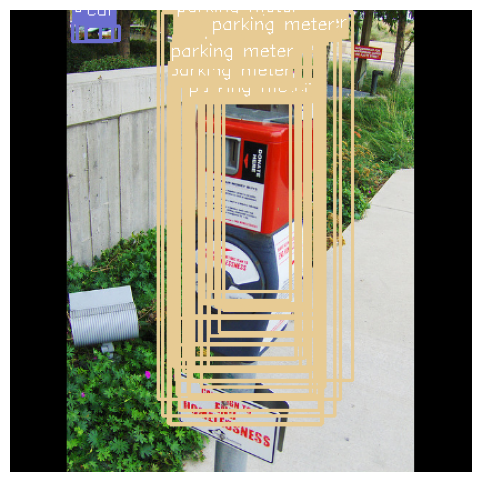

 23%|██▎       | 4002/17432 [1:57:48<23:04:23,  6.18s/it, loss=1.8]

batch_idx: 4001
batch_idx: 4002


 23%|██▎       | 4004/17432 [1:57:48<11:32:26,  3.09s/it, loss=1.8]

batch_idx: 4003
batch_idx: 4004


 23%|██▎       | 4006/17432 [1:57:49<5:53:57,  1.58s/it, loss=1.8] 

batch_idx: 4005
batch_idx: 4006


 23%|██▎       | 4008/17432 [1:57:49<3:07:22,  1.19it/s, loss=1.8]

batch_idx: 4007
batch_idx: 4008


 23%|██▎       | 4010/17432 [1:57:49<1:46:22,  2.10it/s, loss=1.8]

batch_idx: 4009
batch_idx: 4010


 23%|██▎       | 4012/17432 [1:57:49<1:06:09,  3.38it/s, loss=1.8]

batch_idx: 4011
batch_idx: 4012


 23%|██▎       | 4014/17432 [1:57:50<1:10:24,  3.18it/s, loss=1.8]

batch_idx: 4013
batch_idx: 4014


 23%|██▎       | 4016/17432 [1:57:50<48:34,  4.60it/s, loss=1.8]  

batch_idx: 4015
batch_idx: 4016


 23%|██▎       | 4018/17432 [1:57:58<8:39:01,  2.32s/it, loss=1.8]

batch_idx: 4017
batch_idx: 4018


 23%|██▎       | 4020/17432 [1:57:58<4:28:26,  1.20s/it, loss=1.8]

batch_idx: 4019
batch_idx: 4020


 23%|██▎       | 4022/17432 [1:58:05<9:32:57,  2.56s/it, loss=1.8]

batch_idx: 4021
batch_idx: 4022


 23%|██▎       | 4024/17432 [1:58:05<4:55:05,  1.32s/it, loss=1.8]

batch_idx: 4023
batch_idx: 4024


 23%|██▎       | 4026/17432 [1:58:11<9:44:59,  2.62s/it, loss=1.8]

batch_idx: 4025
batch_idx: 4026


 23%|██▎       | 4028/17432 [1:58:12<5:00:35,  1.35s/it, loss=1.8]

batch_idx: 4027
batch_idx: 4028


 23%|██▎       | 4030/17432 [1:58:18<9:29:59,  2.55s/it, loss=1.8]

batch_idx: 4029
batch_idx: 4030


 23%|██▎       | 4032/17432 [1:58:18<4:53:36,  1.31s/it, loss=1.8]

batch_idx: 4031
batch_idx: 4032


 23%|██▎       | 4034/17432 [1:58:25<9:42:37,  2.61s/it, loss=1.8]

batch_idx: 4033
batch_idx: 4034


 23%|██▎       | 4036/17432 [1:58:25<4:59:51,  1.34s/it, loss=1.8]

batch_idx: 4035
batch_idx: 4036


 23%|██▎       | 4038/17432 [1:58:32<9:56:03,  2.67s/it, loss=1.8]

batch_idx: 4037
batch_idx: 4038


 23%|██▎       | 4040/17432 [1:58:32<5:06:30,  1.37s/it, loss=1.8]

batch_idx: 4039
batch_idx: 4040


 23%|██▎       | 4042/17432 [1:58:38<9:19:52,  2.51s/it, loss=1.8]

batch_idx: 4041
batch_idx: 4042


 23%|██▎       | 4044/17432 [1:58:39<4:48:29,  1.29s/it, loss=1.8]

batch_idx: 4043
batch_idx: 4044


 23%|██▎       | 4046/17432 [1:58:45<10:06:28,  2.72s/it, loss=1.8]

batch_idx: 4045
batch_idx: 4046


 23%|██▎       | 4048/17432 [1:58:46<5:11:29,  1.40s/it, loss=1.8] 

batch_idx: 4047
batch_idx: 4048


 23%|██▎       | 4050/17432 [1:58:52<9:35:36,  2.58s/it, loss=1.8]

batch_idx: 4049
batch_idx: 4050


 23%|██▎       | 4052/17432 [1:58:52<4:56:17,  1.33s/it, loss=1.8]

batch_idx: 4051
batch_idx: 4052


 23%|██▎       | 4054/17432 [1:58:59<9:56:57,  2.68s/it, loss=1.8]

batch_idx: 4053
batch_idx: 4054


 23%|██▎       | 4056/17432 [1:58:59<5:07:14,  1.38s/it, loss=1.8]

batch_idx: 4055
batch_idx: 4056


 23%|██▎       | 4058/17432 [1:59:06<9:51:52,  2.66s/it, loss=1.8]

batch_idx: 4057
batch_idx: 4058


 23%|██▎       | 4060/17432 [1:59:06<5:04:21,  1.37s/it, loss=1.8]

batch_idx: 4059
batch_idx: 4060


 23%|██▎       | 4062/17432 [1:59:13<10:01:52,  2.70s/it, loss=1.8]

batch_idx: 4061
batch_idx: 4062


 23%|██▎       | 4064/17432 [1:59:13<5:09:32,  1.39s/it, loss=1.8] 

batch_idx: 4063
batch_idx: 4064


 23%|██▎       | 4066/17432 [1:59:20<9:38:38,  2.60s/it, loss=1.8]

batch_idx: 4065
batch_idx: 4066


 23%|██▎       | 4068/17432 [1:59:20<4:58:04,  1.34s/it, loss=1.8]

batch_idx: 4067
batch_idx: 4068


 23%|██▎       | 4070/17432 [1:59:27<9:40:22,  2.61s/it, loss=1.8]

batch_idx: 4069
batch_idx: 4070


 23%|██▎       | 4072/17432 [1:59:27<4:58:30,  1.34s/it, loss=1.8]

batch_idx: 4071
batch_idx: 4072


 23%|██▎       | 4074/17432 [1:59:34<10:13:48,  2.76s/it, loss=1.8]

batch_idx: 4073
batch_idx: 4074


 23%|██▎       | 4076/17432 [1:59:34<5:14:46,  1.41s/it, loss=1.8] 

batch_idx: 4075
batch_idx: 4076


 23%|██▎       | 4078/17432 [1:59:41<10:29:34,  2.83s/it, loss=1.8]

batch_idx: 4077
batch_idx: 4078


 23%|██▎       | 4080/17432 [1:59:42<5:22:46,  1.45s/it, loss=1.8] 

batch_idx: 4079
batch_idx: 4080


 23%|██▎       | 4082/17432 [1:59:48<9:50:18,  2.65s/it, loss=1.8]

batch_idx: 4081
batch_idx: 4082


 23%|██▎       | 4084/17432 [1:59:48<5:04:22,  1.37s/it, loss=1.8]

batch_idx: 4083
batch_idx: 4084


 23%|██▎       | 4086/17432 [1:59:55<9:52:51,  2.67s/it, loss=1.8]

batch_idx: 4085
batch_idx: 4086


 23%|██▎       | 4088/17432 [1:59:55<5:05:06,  1.37s/it, loss=1.8]

batch_idx: 4087
batch_idx: 4088


 23%|██▎       | 4090/17432 [2:00:02<9:54:46,  2.67s/it, loss=1.8]

batch_idx: 4089
batch_idx: 4090


 23%|██▎       | 4092/17432 [2:00:02<5:05:21,  1.37s/it, loss=1.8]

batch_idx: 4091
batch_idx: 4092


 23%|██▎       | 4094/17432 [2:00:09<10:04:42,  2.72s/it, loss=1.8]

batch_idx: 4093
batch_idx: 4094


 23%|██▎       | 4096/17432 [2:00:09<5:10:07,  1.40s/it, loss=1.8] 

batch_idx: 4095
batch_idx: 4096


 24%|██▎       | 4098/17432 [2:00:16<10:02:18,  2.71s/it, loss=1.8]

batch_idx: 4097
batch_idx: 4098


 24%|██▎       | 4100/17432 [2:00:16<5:08:58,  1.39s/it, loss=1.8] 

batch_idx: 4099
batch_idx: 4100


 24%|██▎       | 4102/17432 [2:00:24<10:31:59,  2.84s/it, loss=1.8]

batch_idx: 4101
batch_idx: 4102


 24%|██▎       | 4104/17432 [2:00:24<5:24:18,  1.46s/it, loss=1.8] 

batch_idx: 4103
batch_idx: 4104


 24%|██▎       | 4106/17432 [2:00:31<10:07:46,  2.74s/it, loss=1.8]

batch_idx: 4105
batch_idx: 4106


 24%|██▎       | 4108/17432 [2:00:31<5:11:50,  1.40s/it, loss=1.8] 

batch_idx: 4107
batch_idx: 4108


 24%|██▎       | 4110/17432 [2:00:38<9:56:43,  2.69s/it, loss=1.8]

batch_idx: 4109
batch_idx: 4110


 24%|██▎       | 4112/17432 [2:00:38<5:06:10,  1.38s/it, loss=1.8]

batch_idx: 4111
batch_idx: 4112


 24%|██▎       | 4114/17432 [2:00:45<9:59:37,  2.70s/it, loss=1.8]

batch_idx: 4113
batch_idx: 4114


 24%|██▎       | 4116/17432 [2:00:45<5:07:49,  1.39s/it, loss=1.8]

batch_idx: 4115
batch_idx: 4116


 24%|██▎       | 4118/17432 [2:00:52<10:12:01,  2.76s/it, loss=1.8]

batch_idx: 4117
batch_idx: 4118


 24%|██▎       | 4120/17432 [2:00:52<5:14:30,  1.42s/it, loss=1.8] 

batch_idx: 4119
batch_idx: 4120


 24%|██▎       | 4122/17432 [2:01:00<10:56:29,  2.96s/it, loss=1.8]

batch_idx: 4121
batch_idx: 4122


 24%|██▎       | 4124/17432 [2:01:00<5:35:51,  1.51s/it, loss=1.8] 

batch_idx: 4123
batch_idx: 4124


 24%|██▎       | 4126/17432 [2:01:06<9:56:58,  2.69s/it, loss=1.8]

batch_idx: 4125
batch_idx: 4126


 24%|██▎       | 4128/17432 [2:01:07<5:06:54,  1.38s/it, loss=1.8]

batch_idx: 4127
batch_idx: 4128


 24%|██▎       | 4130/17432 [2:01:14<10:12:59,  2.76s/it, loss=1.8]

batch_idx: 4129
batch_idx: 4130


 24%|██▎       | 4132/17432 [2:01:14<5:14:02,  1.42s/it, loss=1.8] 

batch_idx: 4131
batch_idx: 4132


 24%|██▎       | 4134/17432 [2:01:21<10:01:01,  2.71s/it, loss=1.8]

batch_idx: 4133
batch_idx: 4134


 24%|██▎       | 4136/17432 [2:01:21<5:08:34,  1.39s/it, loss=1.8] 

batch_idx: 4135
batch_idx: 4136


 24%|██▎       | 4138/17432 [2:01:28<10:27:59,  2.83s/it, loss=1.8]

batch_idx: 4137
batch_idx: 4138


 24%|██▎       | 4140/17432 [2:01:28<5:22:00,  1.45s/it, loss=1.8] 

batch_idx: 4139
batch_idx: 4140


 24%|██▍       | 4142/17432 [2:01:35<9:55:42,  2.69s/it, loss=1.8]

batch_idx: 4141
batch_idx: 4142


 24%|██▍       | 4144/17432 [2:01:35<5:06:01,  1.38s/it, loss=1.8]

batch_idx: 4143
batch_idx: 4144


 24%|██▍       | 4146/17432 [2:01:42<9:53:50,  2.68s/it, loss=1.8]

batch_idx: 4145
batch_idx: 4146


 24%|██▍       | 4148/17432 [2:01:42<5:04:57,  1.38s/it, loss=1.8]

batch_idx: 4147
batch_idx: 4148


 24%|██▍       | 4150/17432 [2:01:49<9:52:15,  2.68s/it, loss=1.8]

batch_idx: 4149
batch_idx: 4150


 24%|██▍       | 4152/17432 [2:01:49<5:03:56,  1.37s/it, loss=1.8]

batch_idx: 4151
batch_idx: 4152


 24%|██▍       | 4154/17432 [2:01:56<10:12:52,  2.77s/it, loss=1.8]

batch_idx: 4153
batch_idx: 4154


 24%|██▍       | 4156/17432 [2:01:57<5:14:28,  1.42s/it, loss=1.8] 

batch_idx: 4155
batch_idx: 4156


 24%|██▍       | 4158/17432 [2:02:03<9:35:27,  2.60s/it, loss=1.8]

batch_idx: 4157
batch_idx: 4158


 24%|██▍       | 4160/17432 [2:02:03<4:55:58,  1.34s/it, loss=1.8]

batch_idx: 4159
batch_idx: 4160


 24%|██▍       | 4162/17432 [2:02:10<10:02:17,  2.72s/it, loss=1.8]

batch_idx: 4161
batch_idx: 4162


 24%|██▍       | 4164/17432 [2:02:10<5:08:57,  1.40s/it, loss=1.8] 

batch_idx: 4163
batch_idx: 4164


 24%|██▍       | 4166/17432 [2:02:17<10:23:12,  2.82s/it, loss=1.8]

batch_idx: 4165
batch_idx: 4166


 24%|██▍       | 4168/17432 [2:02:18<5:19:40,  1.45s/it, loss=1.8] 

batch_idx: 4167
batch_idx: 4168


 24%|██▍       | 4170/17432 [2:02:25<10:30:38,  2.85s/it, loss=1.8]

batch_idx: 4169
batch_idx: 4170


 24%|██▍       | 4172/17432 [2:02:25<5:22:55,  1.46s/it, loss=1.8] 

batch_idx: 4171
batch_idx: 4172


 24%|██▍       | 4174/17432 [2:02:32<10:29:06,  2.85s/it, loss=1.8]

batch_idx: 4173
batch_idx: 4174


 24%|██▍       | 4176/17432 [2:02:33<5:21:58,  1.46s/it, loss=1.8] 

batch_idx: 4175
batch_idx: 4176


 24%|██▍       | 4178/17432 [2:02:40<10:16:22,  2.79s/it, loss=1.8]

batch_idx: 4177
batch_idx: 4178


 24%|██▍       | 4180/17432 [2:02:40<5:16:02,  1.43s/it, loss=1.8] 

batch_idx: 4179
batch_idx: 4180


 24%|██▍       | 4182/17432 [2:02:47<10:10:21,  2.76s/it, loss=1.8]

batch_idx: 4181
batch_idx: 4182


 24%|██▍       | 4184/17432 [2:02:47<5:12:49,  1.42s/it, loss=1.8] 

batch_idx: 4183
batch_idx: 4184


 24%|██▍       | 4186/17432 [2:02:54<10:25:15,  2.83s/it, loss=1.8]

batch_idx: 4185
batch_idx: 4186


 24%|██▍       | 4188/17432 [2:02:54<5:20:07,  1.45s/it, loss=1.8] 

batch_idx: 4187
batch_idx: 4188


 24%|██▍       | 4190/17432 [2:03:02<10:29:34,  2.85s/it, loss=1.8]

batch_idx: 4189
batch_idx: 4190


 24%|██▍       | 4192/17432 [2:03:02<5:22:39,  1.46s/it, loss=1.8] 

batch_idx: 4191
batch_idx: 4192


 24%|██▍       | 4194/17432 [2:03:09<10:31:37,  2.86s/it, loss=1.8]

batch_idx: 4193
batch_idx: 4194


 24%|██▍       | 4196/17432 [2:03:09<5:23:08,  1.46s/it, loss=1.8] 

batch_idx: 4195
batch_idx: 4196


 24%|██▍       | 4198/17432 [2:03:16<10:23:39,  2.83s/it, loss=1.8]

batch_idx: 4197
batch_idx: 4198


 24%|██▍       | 4200/17432 [2:03:17<5:19:23,  1.45s/it, loss=1.8] 

batch_idx: 4199
batch_idx: 4200


 24%|██▍       | 4200/17432 [2:03:17<5:19:23,  1.45s/it, loss=1.8]

==> Saving checkpoint


 24%|██▍       | 4202/17432 [2:03:29<12:04:11,  3.28s/it, loss=1.8]

batch_idx: 4201
batch_idx: 4202


 24%|██▍       | 4204/17432 [2:03:29<6:08:22,  1.67s/it, loss=1.8] 

batch_idx: 4203
batch_idx: 4204


 24%|██▍       | 4206/17432 [2:03:31<5:02:11,  1.37s/it, loss=1.8]

batch_idx: 4205
batch_idx: 4206


 24%|██▍       | 4208/17432 [2:03:31<2:41:39,  1.36it/s, loss=1.8]

batch_idx: 4207
batch_idx: 4208


 24%|██▍       | 4210/17432 [2:03:38<8:31:01,  2.32s/it, loss=1.8]

batch_idx: 4209
batch_idx: 4210


 24%|██▍       | 4212/17432 [2:03:38<4:23:53,  1.20s/it, loss=1.8]

batch_idx: 4211
batch_idx: 4212


 24%|██▍       | 4214/17432 [2:03:45<9:32:39,  2.60s/it, loss=1.8]

batch_idx: 4213
batch_idx: 4214


 24%|██▍       | 4216/17432 [2:03:45<4:54:10,  1.34s/it, loss=1.8]

batch_idx: 4215
batch_idx: 4216


 24%|██▍       | 4218/17432 [2:03:52<9:55:25,  2.70s/it, loss=1.8]

batch_idx: 4217
batch_idx: 4218


 24%|██▍       | 4220/17432 [2:03:52<5:05:10,  1.39s/it, loss=1.8]

batch_idx: 4219
batch_idx: 4220


 24%|██▍       | 4222/17432 [2:03:59<10:27:13,  2.85s/it, loss=1.8]

batch_idx: 4221
batch_idx: 4222


 24%|██▍       | 4224/17432 [2:04:00<5:21:07,  1.46s/it, loss=1.8] 

batch_idx: 4223
batch_idx: 4224


 24%|██▍       | 4226/17432 [2:04:06<9:48:30,  2.67s/it, loss=1.8]

batch_idx: 4225
batch_idx: 4226


 24%|██▍       | 4228/17432 [2:04:06<5:02:04,  1.37s/it, loss=1.8]

batch_idx: 4227
batch_idx: 4228


 24%|██▍       | 4230/17432 [2:04:13<10:12:19,  2.78s/it, loss=1.8]

batch_idx: 4229
batch_idx: 4230


 24%|██▍       | 4232/17432 [2:04:14<5:14:00,  1.43s/it, loss=1.8] 

batch_idx: 4231
batch_idx: 4232


 24%|██▍       | 4234/17432 [2:04:21<10:15:28,  2.80s/it, loss=1.8]

batch_idx: 4233
batch_idx: 4234


 24%|██▍       | 4236/17432 [2:04:21<5:16:14,  1.44s/it, loss=1.8] 

batch_idx: 4235
batch_idx: 4236


 24%|██▍       | 4238/17432 [2:04:28<10:07:32,  2.76s/it, loss=1.8]

batch_idx: 4237
batch_idx: 4238


 24%|██▍       | 4240/17432 [2:04:28<5:11:22,  1.42s/it, loss=1.8] 

batch_idx: 4239
batch_idx: 4240


 24%|██▍       | 4242/17432 [2:04:35<10:13:21,  2.79s/it, loss=1.8]

batch_idx: 4241
batch_idx: 4242


 24%|██▍       | 4244/17432 [2:04:35<5:14:29,  1.43s/it, loss=1.8] 

batch_idx: 4243
batch_idx: 4244


 24%|██▍       | 4246/17432 [2:04:42<9:21:21,  2.55s/it, loss=1.8]

batch_idx: 4245
batch_idx: 4246


 24%|██▍       | 4248/17432 [2:04:42<4:48:56,  1.31s/it, loss=1.8]

batch_idx: 4247
batch_idx: 4248


 24%|██▍       | 4250/17432 [2:04:49<10:29:08,  2.86s/it, loss=1.8]

batch_idx: 4249
batch_idx: 4250


 24%|██▍       | 4252/17432 [2:04:49<5:22:18,  1.47s/it, loss=1.8] 

batch_idx: 4251
batch_idx: 4252


 24%|██▍       | 4254/17432 [2:04:56<10:01:30,  2.74s/it, loss=1.8]

batch_idx: 4253
batch_idx: 4254


 24%|██▍       | 4256/17432 [2:04:57<5:08:37,  1.41s/it, loss=1.8] 

batch_idx: 4255
batch_idx: 4256


 24%|██▍       | 4258/17432 [2:05:03<10:07:31,  2.77s/it, loss=1.8]

batch_idx: 4257
batch_idx: 4258


 24%|██▍       | 4260/17432 [2:05:04<5:12:01,  1.42s/it, loss=1.8] 

batch_idx: 4259
batch_idx: 4260


 24%|██▍       | 4262/17432 [2:05:11<10:22:50,  2.84s/it, loss=1.8]

batch_idx: 4261
batch_idx: 4262


 24%|██▍       | 4264/17432 [2:05:11<5:20:04,  1.46s/it, loss=1.8] 

batch_idx: 4263
batch_idx: 4264


 24%|██▍       | 4266/17432 [2:05:18<10:11:10,  2.79s/it, loss=1.8]

batch_idx: 4265
batch_idx: 4266


 24%|██▍       | 4268/17432 [2:05:18<5:13:15,  1.43s/it, loss=1.8] 

batch_idx: 4267
batch_idx: 4268


 24%|██▍       | 4270/17432 [2:05:26<10:25:41,  2.85s/it, loss=1.8]

batch_idx: 4269
batch_idx: 4270


 25%|██▍       | 4272/17432 [2:05:26<5:20:27,  1.46s/it, loss=1.8] 

batch_idx: 4271
batch_idx: 4272


 25%|██▍       | 4274/17432 [2:05:33<10:34:43,  2.89s/it, loss=1.8]

batch_idx: 4273
batch_idx: 4274


 25%|██▍       | 4276/17432 [2:05:33<5:24:46,  1.48s/it, loss=1.8] 

batch_idx: 4275
batch_idx: 4276


 25%|██▍       | 4278/17432 [2:05:40<10:14:50,  2.80s/it, loss=1.8]

batch_idx: 4277
batch_idx: 4278


 25%|██▍       | 4280/17432 [2:05:41<5:15:08,  1.44s/it, loss=1.8] 

batch_idx: 4279
batch_idx: 4280


 25%|██▍       | 4282/17432 [2:05:47<9:52:32,  2.70s/it, loss=1.8]

batch_idx: 4281
batch_idx: 4282


 25%|██▍       | 4284/17432 [2:05:48<5:04:33,  1.39s/it, loss=1.8]

batch_idx: 4283
batch_idx: 4284


 25%|██▍       | 4286/17432 [2:05:55<10:19:30,  2.83s/it, loss=1.8]

batch_idx: 4285
batch_idx: 4286


 25%|██▍       | 4288/17432 [2:05:55<5:17:40,  1.45s/it, loss=1.8] 

batch_idx: 4287
batch_idx: 4288


 25%|██▍       | 4290/17432 [2:06:02<10:11:00,  2.79s/it, loss=1.8]

batch_idx: 4289
batch_idx: 4290


 25%|██▍       | 4292/17432 [2:06:02<5:13:23,  1.43s/it, loss=1.8] 

batch_idx: 4291
batch_idx: 4292


 25%|██▍       | 4294/17432 [2:06:08<9:09:33,  2.51s/it, loss=1.8]

batch_idx: 4293
batch_idx: 4294


 25%|██▍       | 4296/17432 [2:06:09<4:42:52,  1.29s/it, loss=1.8]

batch_idx: 4295
batch_idx: 4296


 25%|██▍       | 4298/17432 [2:06:15<9:42:55,  2.66s/it, loss=1.8]

batch_idx: 4297
batch_idx: 4298


 25%|██▍       | 4300/17432 [2:06:16<4:59:40,  1.37s/it, loss=1.8]

batch_idx: 4299
batch_idx: 4300


 25%|██▍       | 4302/17432 [2:06:23<10:20:05,  2.83s/it, loss=1.8]

batch_idx: 4301
batch_idx: 4302


 25%|██▍       | 4304/17432 [2:06:23<5:17:37,  1.45s/it, loss=1.8] 

batch_idx: 4303
batch_idx: 4304


 25%|██▍       | 4306/17432 [2:06:29<9:31:54,  2.61s/it, loss=1.8]

batch_idx: 4305
batch_idx: 4306


 25%|██▍       | 4308/17432 [2:06:30<4:54:04,  1.34s/it, loss=1.8]

batch_idx: 4307
batch_idx: 4308


 25%|██▍       | 4310/17432 [2:06:36<9:46:16,  2.68s/it, loss=1.8]

batch_idx: 4309
batch_idx: 4310


 25%|██▍       | 4312/17432 [2:06:37<5:01:30,  1.38s/it, loss=1.8]

batch_idx: 4311
batch_idx: 4312


 25%|██▍       | 4314/17432 [2:06:43<9:42:03,  2.66s/it, loss=1.8]

batch_idx: 4313
batch_idx: 4314


 25%|██▍       | 4316/17432 [2:06:44<5:00:23,  1.37s/it, loss=1.8]

batch_idx: 4315
batch_idx: 4316


 25%|██▍       | 4318/17432 [2:06:50<9:39:10,  2.65s/it, loss=1.8]

batch_idx: 4317
batch_idx: 4318


 25%|██▍       | 4320/17432 [2:06:51<4:57:24,  1.36s/it, loss=1.8]

batch_idx: 4319
batch_idx: 4320


 25%|██▍       | 4322/17432 [2:06:58<10:35:21,  2.91s/it, loss=1.8]

batch_idx: 4321
batch_idx: 4322


 25%|██▍       | 4324/17432 [2:06:58<5:26:05,  1.49s/it, loss=1.8] 

batch_idx: 4323
batch_idx: 4324


 25%|██▍       | 4326/17432 [2:07:05<9:39:43,  2.65s/it, loss=1.8]

batch_idx: 4325
batch_idx: 4326


 25%|██▍       | 4328/17432 [2:07:05<4:58:30,  1.37s/it, loss=1.8]

batch_idx: 4327
batch_idx: 4328


 25%|██▍       | 4330/17432 [2:07:12<10:05:17,  2.77s/it, loss=1.8]

batch_idx: 4329
batch_idx: 4330


 25%|██▍       | 4332/17432 [2:07:12<5:10:22,  1.42s/it, loss=1.8] 

batch_idx: 4331
batch_idx: 4332


 25%|██▍       | 4334/17432 [2:07:19<9:53:05,  2.72s/it, loss=1.8]

batch_idx: 4333
batch_idx: 4334


 25%|██▍       | 4336/17432 [2:07:19<5:05:00,  1.40s/it, loss=1.8]

batch_idx: 4335
batch_idx: 4336


 25%|██▍       | 4338/17432 [2:07:25<9:01:20,  2.48s/it, loss=1.8]

batch_idx: 4337
batch_idx: 4338


 25%|██▍       | 4340/17432 [2:07:26<4:39:11,  1.28s/it, loss=1.8]

batch_idx: 4339
batch_idx: 4340


 25%|██▍       | 4342/17432 [2:07:32<9:24:23,  2.59s/it, loss=1.8]

batch_idx: 4341
batch_idx: 4342


 25%|██▍       | 4344/17432 [2:07:32<4:51:21,  1.34s/it, loss=1.8]

batch_idx: 4343
batch_idx: 4344


 25%|██▍       | 4346/17432 [2:07:40<10:15:25,  2.82s/it, loss=1.8]

batch_idx: 4345
batch_idx: 4346


 25%|██▍       | 4348/17432 [2:07:40<5:16:06,  1.45s/it, loss=1.8] 

batch_idx: 4347
batch_idx: 4348


 25%|██▍       | 4350/17432 [2:07:47<10:10:34,  2.80s/it, loss=1.8]

batch_idx: 4349
batch_idx: 4350


 25%|██▍       | 4352/17432 [2:07:47<5:13:37,  1.44s/it, loss=1.8] 

batch_idx: 4351
batch_idx: 4352


 25%|██▍       | 4354/17432 [2:07:54<9:53:57,  2.73s/it, loss=1.8]

batch_idx: 4353
batch_idx: 4354


 25%|██▍       | 4356/17432 [2:07:54<5:05:57,  1.40s/it, loss=1.8]

batch_idx: 4355
batch_idx: 4356


 25%|██▌       | 4358/17432 [2:08:01<9:38:33,  2.66s/it, loss=1.8]

batch_idx: 4357
batch_idx: 4358


 25%|██▌       | 4360/17432 [2:08:01<4:57:05,  1.36s/it, loss=1.8]

batch_idx: 4359
batch_idx: 4360


 25%|██▌       | 4362/17432 [2:08:08<9:36:18,  2.65s/it, loss=1.8]

batch_idx: 4361
batch_idx: 4362


 25%|██▌       | 4364/17432 [2:08:08<4:56:24,  1.36s/it, loss=1.8]

batch_idx: 4363
batch_idx: 4364


 25%|██▌       | 4366/17432 [2:08:15<9:36:44,  2.65s/it, loss=1.8]

batch_idx: 4365
batch_idx: 4366


 25%|██▌       | 4368/17432 [2:08:15<4:56:39,  1.36s/it, loss=1.8]

batch_idx: 4367
batch_idx: 4368


 25%|██▌       | 4370/17432 [2:08:21<9:14:38,  2.55s/it, loss=1.8]

batch_idx: 4369
batch_idx: 4370


 25%|██▌       | 4372/17432 [2:08:22<4:46:21,  1.32s/it, loss=1.8]

batch_idx: 4371
batch_idx: 4372


 25%|██▌       | 4374/17432 [2:08:28<9:40:19,  2.67s/it, loss=1.8]

batch_idx: 4373
batch_idx: 4374


 25%|██▌       | 4376/17432 [2:08:29<4:59:21,  1.38s/it, loss=1.8]

batch_idx: 4375
batch_idx: 4376


 25%|██▌       | 4378/17432 [2:08:35<9:21:43,  2.58s/it, loss=1.8]

batch_idx: 4377
batch_idx: 4378


 25%|██▌       | 4380/17432 [2:08:35<4:49:06,  1.33s/it, loss=1.8]

batch_idx: 4379
batch_idx: 4380


 25%|██▌       | 4382/17432 [2:08:42<9:25:14,  2.60s/it, loss=1.8]

batch_idx: 4381
batch_idx: 4382


 25%|██▌       | 4384/17432 [2:08:42<4:50:43,  1.34s/it, loss=1.8]

batch_idx: 4383
batch_idx: 4384


 25%|██▌       | 4386/17432 [2:08:49<9:51:11,  2.72s/it, loss=1.8]

batch_idx: 4385
batch_idx: 4386


 25%|██▌       | 4388/17432 [2:08:49<5:04:07,  1.40s/it, loss=1.8]

batch_idx: 4387
batch_idx: 4388


 25%|██▌       | 4390/17432 [2:08:56<10:13:46,  2.82s/it, loss=1.8]

batch_idx: 4389
batch_idx: 4390


 25%|██▌       | 4392/17432 [2:08:57<5:14:29,  1.45s/it, loss=1.8] 

batch_idx: 4391
batch_idx: 4392


 25%|██▌       | 4394/17432 [2:09:03<10:00:30,  2.76s/it, loss=1.8]

batch_idx: 4393
batch_idx: 4394


 25%|██▌       | 4396/17432 [2:09:04<5:09:06,  1.42s/it, loss=1.8] 

batch_idx: 4395
batch_idx: 4396


 25%|██▌       | 4398/17432 [2:09:11<10:03:01,  2.78s/it, loss=1.8]

batch_idx: 4397
batch_idx: 4398


 25%|██▌       | 4400/17432 [2:09:11<5:09:03,  1.42s/it, loss=1.8] 

batch_idx: 4399
batch_idx: 4400


 25%|██▌       | 4400/17432 [2:09:11<5:09:03,  1.42s/it, loss=1.8]

==> Saving checkpoint


 25%|██▌       | 4402/17432 [2:09:23<11:52:28,  3.28s/it, loss=1.8]

batch_idx: 4401
batch_idx: 4402


 25%|██▌       | 4404/17432 [2:09:23<6:03:09,  1.67s/it, loss=1.8] 

batch_idx: 4403
batch_idx: 4404


 25%|██▌       | 4406/17432 [2:09:25<4:24:58,  1.22s/it, loss=1.8]

batch_idx: 4405
batch_idx: 4406


 25%|██▌       | 4408/17432 [2:09:25<2:24:04,  1.51it/s, loss=1.8]

batch_idx: 4407
batch_idx: 4408


 25%|██▌       | 4410/17432 [2:09:32<8:17:13,  2.29s/it, loss=1.8]

batch_idx: 4409
batch_idx: 4410


 25%|██▌       | 4412/17432 [2:09:32<4:19:01,  1.19s/it, loss=1.8]

batch_idx: 4411
batch_idx: 4412


 25%|██▌       | 4414/17432 [2:09:39<9:45:01,  2.70s/it, loss=1.8]

batch_idx: 4413
batch_idx: 4414


 25%|██▌       | 4416/17432 [2:09:39<5:01:38,  1.39s/it, loss=1.8]

batch_idx: 4415
batch_idx: 4416


 25%|██▌       | 4418/17432 [2:09:47<10:15:46,  2.84s/it, loss=1.8]

batch_idx: 4417
batch_idx: 4418


 25%|██▌       | 4420/17432 [2:09:47<5:15:28,  1.45s/it, loss=1.8] 

batch_idx: 4419
batch_idx: 4420


 25%|██▌       | 4422/17432 [2:09:54<9:55:45,  2.75s/it, loss=1.8]

batch_idx: 4421
batch_idx: 4422


 25%|██▌       | 4424/17432 [2:09:54<5:05:46,  1.41s/it, loss=1.8]

batch_idx: 4423
batch_idx: 4424


 25%|██▌       | 4426/17432 [2:10:00<9:36:57,  2.66s/it, loss=1.8]

batch_idx: 4425
batch_idx: 4426


 25%|██▌       | 4428/17432 [2:10:01<4:57:33,  1.37s/it, loss=1.8]

batch_idx: 4427
batch_idx: 4428


 25%|██▌       | 4430/17432 [2:10:07<9:23:20,  2.60s/it, loss=1.8]

batch_idx: 4429
batch_idx: 4430


 25%|██▌       | 4432/17432 [2:10:07<4:51:37,  1.35s/it, loss=1.8]

batch_idx: 4431
batch_idx: 4432


 25%|██▌       | 4434/17432 [2:10:14<9:43:05,  2.69s/it, loss=1.8]

batch_idx: 4433
batch_idx: 4434


 25%|██▌       | 4436/17432 [2:10:15<5:00:32,  1.39s/it, loss=1.8]

batch_idx: 4435
batch_idx: 4436


 25%|██▌       | 4438/17432 [2:10:22<10:27:17,  2.90s/it, loss=1.8]

batch_idx: 4437
batch_idx: 4438


 25%|██▌       | 4440/17432 [2:10:22<5:21:58,  1.49s/it, loss=1.8] 

batch_idx: 4439
batch_idx: 4440


 25%|██▌       | 4442/17432 [2:10:30<10:28:25,  2.90s/it, loss=1.8]

batch_idx: 4441
batch_idx: 4442


 25%|██▌       | 4444/17432 [2:10:30<5:22:53,  1.49s/it, loss=1.8] 

batch_idx: 4443
batch_idx: 4444


 26%|██▌       | 4446/17432 [2:10:37<9:56:09,  2.75s/it, loss=1.8]

batch_idx: 4445
batch_idx: 4446


 26%|██▌       | 4448/17432 [2:10:37<5:06:17,  1.42s/it, loss=1.8]

batch_idx: 4447
batch_idx: 4448


 26%|██▌       | 4450/17432 [2:10:44<10:22:24,  2.88s/it, loss=1.8]

batch_idx: 4449
batch_idx: 4450


 26%|██▌       | 4452/17432 [2:10:44<5:19:49,  1.48s/it, loss=1.8] 

batch_idx: 4451
batch_idx: 4452


 26%|██▌       | 4454/17432 [2:10:52<10:18:34,  2.86s/it, loss=1.8]

batch_idx: 4453
batch_idx: 4454


 26%|██▌       | 4456/17432 [2:10:52<5:17:28,  1.47s/it, loss=1.8] 

batch_idx: 4455
batch_idx: 4456


 26%|██▌       | 4458/17432 [2:10:59<10:19:48,  2.87s/it, loss=1.8]

batch_idx: 4457
batch_idx: 4458


 26%|██▌       | 4460/17432 [2:10:59<5:18:44,  1.47s/it, loss=1.8] 

batch_idx: 4459
batch_idx: 4460


 26%|██▌       | 4462/17432 [2:11:06<9:20:40,  2.59s/it, loss=1.8]

batch_idx: 4461
batch_idx: 4462


 26%|██▌       | 4464/17432 [2:11:06<4:48:39,  1.34s/it, loss=1.8]

batch_idx: 4463
batch_idx: 4464


 26%|██▌       | 4466/17432 [2:11:13<9:56:21,  2.76s/it, loss=1.8]

batch_idx: 4465
batch_idx: 4466


 26%|██▌       | 4468/17432 [2:11:13<5:06:19,  1.42s/it, loss=1.8]

batch_idx: 4467
batch_idx: 4468


 26%|██▌       | 4470/17432 [2:11:20<9:53:56,  2.75s/it, loss=1.8]

batch_idx: 4469
batch_idx: 4470


 26%|██▌       | 4472/17432 [2:11:20<5:04:45,  1.41s/it, loss=1.8]

batch_idx: 4471
batch_idx: 4472


 26%|██▌       | 4474/17432 [2:11:28<10:21:10,  2.88s/it, loss=1.8]

batch_idx: 4473
batch_idx: 4474


 26%|██▌       | 4476/17432 [2:11:28<5:18:39,  1.48s/it, loss=1.8] 

batch_idx: 4475
batch_idx: 4476


 26%|██▌       | 4478/17432 [2:11:34<9:30:45,  2.64s/it, loss=1.8]

batch_idx: 4477
batch_idx: 4478


 26%|██▌       | 4480/17432 [2:11:35<4:53:25,  1.36s/it, loss=1.8]

batch_idx: 4479
batch_idx: 4480


 26%|██▌       | 4482/17432 [2:11:42<10:16:10,  2.85s/it, loss=1.8]

batch_idx: 4481
batch_idx: 4482


 26%|██▌       | 4484/17432 [2:11:42<5:16:23,  1.47s/it, loss=1.8] 

batch_idx: 4483
batch_idx: 4484


 26%|██▌       | 4486/17432 [2:11:49<9:51:01,  2.74s/it, loss=1.8]

batch_idx: 4485
batch_idx: 4486


 26%|██▌       | 4488/17432 [2:11:49<5:04:00,  1.41s/it, loss=1.8]

batch_idx: 4487
batch_idx: 4488


 26%|██▌       | 4490/17432 [2:11:56<10:02:18,  2.79s/it, loss=1.8]

batch_idx: 4489
batch_idx: 4490


 26%|██▌       | 4492/17432 [2:11:57<5:09:30,  1.44s/it, loss=1.8] 

batch_idx: 4491
batch_idx: 4492


 26%|██▌       | 4494/17432 [2:12:03<9:59:41,  2.78s/it, loss=1.8]

batch_idx: 4493
batch_idx: 4494


 26%|██▌       | 4496/17432 [2:12:04<5:07:43,  1.43s/it, loss=1.8]

batch_idx: 4495
batch_idx: 4496


 26%|██▌       | 4498/17432 [2:12:10<9:32:01,  2.65s/it, loss=1.8]

batch_idx: 4497
batch_idx: 4498


 26%|██▌       | 4500/17432 [2:12:11<4:54:26,  1.37s/it, loss=1.8]

batch_idx: 4499
batch_idx: 4500


 26%|██▌       | 4502/17432 [2:12:18<9:57:59,  2.77s/it, loss=1.8]

batch_idx: 4501
batch_idx: 4502


 26%|██▌       | 4504/17432 [2:12:18<5:06:47,  1.42s/it, loss=1.8]

batch_idx: 4503
batch_idx: 4504


 26%|██▌       | 4506/17432 [2:12:24<9:22:38,  2.61s/it, loss=1.8]

batch_idx: 4505
batch_idx: 4506


 26%|██▌       | 4508/17432 [2:12:25<4:50:26,  1.35s/it, loss=1.8]

batch_idx: 4507
batch_idx: 4508


 26%|██▌       | 4510/17432 [2:12:32<9:56:43,  2.77s/it, loss=1.8]

batch_idx: 4509
batch_idx: 4510


 26%|██▌       | 4512/17432 [2:12:32<5:06:40,  1.42s/it, loss=1.8]

batch_idx: 4511
batch_idx: 4512


 26%|██▌       | 4514/17432 [2:12:39<10:07:14,  2.82s/it, loss=1.8]

batch_idx: 4513
batch_idx: 4514


 26%|██▌       | 4516/17432 [2:12:39<5:11:53,  1.45s/it, loss=1.8] 

batch_idx: 4515
batch_idx: 4516


 26%|██▌       | 4518/17432 [2:12:46<10:12:50,  2.85s/it, loss=1.8]

batch_idx: 4517
batch_idx: 4518


 26%|██▌       | 4520/17432 [2:12:47<5:14:16,  1.46s/it, loss=1.8] 

batch_idx: 4519
batch_idx: 4520


 26%|██▌       | 4522/17432 [2:12:53<9:51:40,  2.75s/it, loss=1.8]

batch_idx: 4521
batch_idx: 4522


 26%|██▌       | 4524/17432 [2:12:54<5:04:13,  1.41s/it, loss=1.8]

batch_idx: 4523
batch_idx: 4524


 26%|██▌       | 4526/17432 [2:13:01<9:46:13,  2.73s/it, loss=1.8]

batch_idx: 4525
batch_idx: 4526


 26%|██▌       | 4528/17432 [2:13:01<5:01:35,  1.40s/it, loss=1.8]

batch_idx: 4527
batch_idx: 4528


 26%|██▌       | 4530/17432 [2:13:07<9:28:09,  2.64s/it, loss=1.8]

batch_idx: 4529
batch_idx: 4530


 26%|██▌       | 4532/17432 [2:13:08<4:52:56,  1.36s/it, loss=1.8]

batch_idx: 4531
batch_idx: 4532


 26%|██▌       | 4534/17432 [2:13:14<9:37:21,  2.69s/it, loss=1.8]

batch_idx: 4533
batch_idx: 4534


 26%|██▌       | 4536/17432 [2:13:15<4:58:00,  1.39s/it, loss=1.8]

batch_idx: 4535
batch_idx: 4536


 26%|██▌       | 4538/17432 [2:13:22<9:46:42,  2.73s/it, loss=1.8]

batch_idx: 4537
batch_idx: 4538


 26%|██▌       | 4540/17432 [2:13:22<5:00:57,  1.40s/it, loss=1.8]

batch_idx: 4539
batch_idx: 4540


 26%|██▌       | 4542/17432 [2:13:29<9:51:53,  2.76s/it, loss=1.8]

batch_idx: 4541
batch_idx: 4542


 26%|██▌       | 4544/17432 [2:13:29<5:04:45,  1.42s/it, loss=1.8]

batch_idx: 4543
batch_idx: 4544


 26%|██▌       | 4546/17432 [2:13:36<9:40:04,  2.70s/it, loss=1.8]

batch_idx: 4545
batch_idx: 4546


 26%|██▌       | 4548/17432 [2:13:36<4:58:29,  1.39s/it, loss=1.8]

batch_idx: 4547
batch_idx: 4548


 26%|██▌       | 4550/17432 [2:13:43<9:54:21,  2.77s/it, loss=1.8]

batch_idx: 4549
batch_idx: 4550


 26%|██▌       | 4552/17432 [2:13:43<5:05:31,  1.42s/it, loss=1.8]

batch_idx: 4551
batch_idx: 4552


 26%|██▌       | 4554/17432 [2:13:49<8:56:04,  2.50s/it, loss=1.8]

batch_idx: 4553
batch_idx: 4554


 26%|██▌       | 4556/17432 [2:13:50<4:36:58,  1.29s/it, loss=1.8]

batch_idx: 4555
batch_idx: 4556


 26%|██▌       | 4558/17432 [2:13:57<10:09:18,  2.84s/it, loss=1.8]

batch_idx: 4557
batch_idx: 4558


 26%|██▌       | 4560/17432 [2:13:57<5:13:01,  1.46s/it, loss=1.8] 

batch_idx: 4559
batch_idx: 4560


 26%|██▌       | 4562/17432 [2:14:04<9:46:16,  2.73s/it, loss=1.8]

batch_idx: 4561
batch_idx: 4562


 26%|██▌       | 4564/17432 [2:14:04<5:00:57,  1.40s/it, loss=1.8]

batch_idx: 4563
batch_idx: 4564


 26%|██▌       | 4566/17432 [2:14:11<9:33:31,  2.67s/it, loss=1.8]

batch_idx: 4565
batch_idx: 4566


 26%|██▌       | 4568/17432 [2:14:11<4:56:13,  1.38s/it, loss=1.8]

batch_idx: 4567
batch_idx: 4568


 26%|██▌       | 4570/17432 [2:14:18<9:34:04,  2.68s/it, loss=1.8]

batch_idx: 4569
batch_idx: 4570


 26%|██▌       | 4572/17432 [2:14:18<4:56:41,  1.38s/it, loss=1.8]

batch_idx: 4571
batch_idx: 4572


 26%|██▌       | 4574/17432 [2:14:25<9:24:40,  2.63s/it, loss=1.8]

batch_idx: 4573
batch_idx: 4574


 26%|██▋       | 4576/17432 [2:14:25<4:50:50,  1.36s/it, loss=1.8]

batch_idx: 4575
batch_idx: 4576


 26%|██▋       | 4578/17432 [2:14:32<9:20:53,  2.62s/it, loss=1.8]

batch_idx: 4577
batch_idx: 4578


 26%|██▋       | 4580/17432 [2:14:32<4:49:19,  1.35s/it, loss=1.8]

batch_idx: 4579
batch_idx: 4580


 26%|██▋       | 4582/17432 [2:14:39<9:27:23,  2.65s/it, loss=1.8]

batch_idx: 4581
batch_idx: 4582


 26%|██▋       | 4584/17432 [2:14:39<4:51:37,  1.36s/it, loss=1.8]

batch_idx: 4583
batch_idx: 4584


 26%|██▋       | 4586/17432 [2:14:46<9:47:54,  2.75s/it, loss=1.8]

batch_idx: 4585
batch_idx: 4586


 26%|██▋       | 4588/17432 [2:14:46<5:02:15,  1.41s/it, loss=1.8]

batch_idx: 4587
batch_idx: 4588


 26%|██▋       | 4590/17432 [2:14:53<9:39:37,  2.71s/it, loss=1.8]

batch_idx: 4589
batch_idx: 4590


 26%|██▋       | 4592/17432 [2:14:53<4:59:02,  1.40s/it, loss=1.8]

batch_idx: 4591
batch_idx: 4592


 26%|██▋       | 4594/17432 [2:15:00<9:47:20,  2.74s/it, loss=1.8]

batch_idx: 4593
batch_idx: 4594


 26%|██▋       | 4596/17432 [2:15:00<5:02:26,  1.41s/it, loss=1.8]

batch_idx: 4595
batch_idx: 4596


 26%|██▋       | 4598/17432 [2:15:07<9:36:51,  2.70s/it, loss=1.8]

batch_idx: 4597
batch_idx: 4598


 26%|██▋       | 4600/17432 [2:15:07<4:57:05,  1.39s/it, loss=1.8]

batch_idx: 4599
batch_idx: 4600


 26%|██▋       | 4600/17432 [2:15:07<4:57:05,  1.39s/it, loss=1.8]

==> Saving checkpoint


 26%|██▋       | 4602/17432 [2:15:17<9:45:24,  2.74s/it, loss=1.8] 

batch_idx: 4601
batch_idx: 4602


 26%|██▋       | 4604/17432 [2:15:17<5:00:05,  1.40s/it, loss=1.8]

batch_idx: 4603
batch_idx: 4604


 26%|██▋       | 4606/17432 [2:15:21<6:22:47,  1.79s/it, loss=1.8]

batch_idx: 4605
batch_idx: 4606


 26%|██▋       | 4608/17432 [2:15:21<3:21:17,  1.06it/s, loss=1.8]

batch_idx: 4607
batch_idx: 4608


 26%|██▋       | 4610/17432 [2:15:28<9:06:40,  2.56s/it, loss=1.8]

batch_idx: 4609
batch_idx: 4610


 26%|██▋       | 4612/17432 [2:15:28<4:41:46,  1.32s/it, loss=1.8]

batch_idx: 4611
batch_idx: 4612


 26%|██▋       | 4614/17432 [2:15:34<8:34:40,  2.41s/it, loss=1.8]

batch_idx: 4613
batch_idx: 4614


 26%|██▋       | 4616/17432 [2:15:35<4:25:52,  1.24s/it, loss=1.8]

batch_idx: 4615
batch_idx: 4616


 26%|██▋       | 4618/17432 [2:15:41<9:12:59,  2.59s/it, loss=1.8]

batch_idx: 4617
batch_idx: 4618


 27%|██▋       | 4620/17432 [2:15:41<4:44:09,  1.33s/it, loss=1.8]

batch_idx: 4619
batch_idx: 4620


 27%|██▋       | 4622/17432 [2:15:49<9:52:26,  2.77s/it, loss=1.8]

batch_idx: 4621
batch_idx: 4622


 27%|██▋       | 4624/17432 [2:15:49<5:04:51,  1.43s/it, loss=1.8]

batch_idx: 4623
batch_idx: 4624


 27%|██▋       | 4626/17432 [2:15:55<9:21:31,  2.63s/it, loss=1.8]

batch_idx: 4625
batch_idx: 4626


 27%|██▋       | 4628/17432 [2:15:56<4:48:29,  1.35s/it, loss=1.8]

batch_idx: 4627
batch_idx: 4628


 27%|██▋       | 4630/17432 [2:16:02<9:21:37,  2.63s/it, loss=1.8]

batch_idx: 4629
batch_idx: 4630


 27%|██▋       | 4632/17432 [2:16:02<4:50:09,  1.36s/it, loss=1.8]

batch_idx: 4631
batch_idx: 4632


 27%|██▋       | 4634/17432 [2:16:09<9:09:28,  2.58s/it, loss=1.8]

batch_idx: 4633
batch_idx: 4634


 27%|██▋       | 4636/17432 [2:16:09<4:43:45,  1.33s/it, loss=1.8]

batch_idx: 4635
batch_idx: 4636


 27%|██▋       | 4638/17432 [2:16:16<9:13:26,  2.60s/it, loss=1.8]

batch_idx: 4637
batch_idx: 4638


 27%|██▋       | 4640/17432 [2:16:16<4:45:08,  1.34s/it, loss=1.8]

batch_idx: 4639
batch_idx: 4640


 27%|██▋       | 4642/17432 [2:16:22<9:08:36,  2.57s/it, loss=1.8]

batch_idx: 4641
batch_idx: 4642


 27%|██▋       | 4644/17432 [2:16:23<4:43:55,  1.33s/it, loss=1.8]

batch_idx: 4643
batch_idx: 4644


 27%|██▋       | 4646/17432 [2:16:28<8:32:33,  2.41s/it, loss=1.8]

batch_idx: 4645
batch_idx: 4646


 27%|██▋       | 4648/17432 [2:16:29<4:24:59,  1.24s/it, loss=1.8]

batch_idx: 4647
batch_idx: 4648


 27%|██▋       | 4650/17432 [2:16:36<9:26:35,  2.66s/it, loss=1.8]

batch_idx: 4649
batch_idx: 4650


 27%|██▋       | 4652/17432 [2:16:36<4:50:58,  1.37s/it, loss=1.8]

batch_idx: 4651
batch_idx: 4652


 27%|██▋       | 4654/17432 [2:16:43<9:31:05,  2.68s/it, loss=1.8]

batch_idx: 4653
batch_idx: 4654


 27%|██▋       | 4656/17432 [2:16:43<4:53:19,  1.38s/it, loss=1.8]

batch_idx: 4655
batch_idx: 4656


 27%|██▋       | 4658/17432 [2:16:50<9:42:45,  2.74s/it, loss=1.8]

batch_idx: 4657
batch_idx: 4658


 27%|██▋       | 4660/17432 [2:16:50<5:01:13,  1.42s/it, loss=1.8]

batch_idx: 4659
batch_idx: 4660


 27%|██▋       | 4662/17432 [2:16:58<10:26:47,  2.94s/it, loss=1.8]

batch_idx: 4661
batch_idx: 4662


 27%|██▋       | 4664/17432 [2:16:58<5:21:29,  1.51s/it, loss=1.8] 

batch_idx: 4663
batch_idx: 4664


 27%|██▋       | 4666/17432 [2:17:05<9:45:06,  2.75s/it, loss=1.8]

batch_idx: 4665
batch_idx: 4666


 27%|██▋       | 4668/17432 [2:17:05<5:00:18,  1.41s/it, loss=1.8]

batch_idx: 4667
batch_idx: 4668


 27%|██▋       | 4670/17432 [2:17:11<9:07:03,  2.57s/it, loss=1.8]

batch_idx: 4669
batch_idx: 4670


 27%|██▋       | 4672/17432 [2:17:11<4:41:21,  1.32s/it, loss=1.8]

batch_idx: 4671
batch_idx: 4672


 27%|██▋       | 4674/17432 [2:17:18<8:56:00,  2.52s/it, loss=1.8]

batch_idx: 4673
batch_idx: 4674


 27%|██▋       | 4676/17432 [2:17:18<4:35:50,  1.30s/it, loss=1.8]

batch_idx: 4675
batch_idx: 4676


 27%|██▋       | 4678/17432 [2:17:25<9:46:08,  2.76s/it, loss=1.8]

batch_idx: 4677
batch_idx: 4678


 27%|██▋       | 4680/17432 [2:17:25<5:00:40,  1.41s/it, loss=1.8]

batch_idx: 4679
batch_idx: 4680


 27%|██▋       | 4682/17432 [2:17:32<9:28:37,  2.68s/it, loss=1.8]

batch_idx: 4681
batch_idx: 4682


 27%|██▋       | 4684/17432 [2:17:32<4:52:05,  1.37s/it, loss=1.8]

batch_idx: 4683
batch_idx: 4684


 27%|██▋       | 4686/17432 [2:17:39<9:41:16,  2.74s/it, loss=1.8]

batch_idx: 4685
batch_idx: 4686


 27%|██▋       | 4688/17432 [2:17:39<4:58:18,  1.40s/it, loss=1.8]

batch_idx: 4687
batch_idx: 4688


 27%|██▋       | 4690/17432 [2:17:46<9:35:26,  2.71s/it, loss=1.8]

batch_idx: 4689
batch_idx: 4690


 27%|██▋       | 4692/17432 [2:17:46<4:56:08,  1.39s/it, loss=1.8]

batch_idx: 4691
batch_idx: 4692


 27%|██▋       | 4694/17432 [2:17:54<9:59:27,  2.82s/it, loss=1.8]

batch_idx: 4693
batch_idx: 4694


 27%|██▋       | 4696/17432 [2:17:54<5:07:26,  1.45s/it, loss=1.8]

batch_idx: 4695
batch_idx: 4696


 27%|██▋       | 4698/17432 [2:18:00<9:26:43,  2.67s/it, loss=1.8]

batch_idx: 4697
batch_idx: 4698


 27%|██▋       | 4700/17432 [2:18:01<4:51:40,  1.37s/it, loss=1.8]

batch_idx: 4699
batch_idx: 4700


 27%|██▋       | 4702/17432 [2:18:08<9:38:06,  2.72s/it, loss=1.8]

batch_idx: 4701
batch_idx: 4702


 27%|██▋       | 4704/17432 [2:18:08<4:57:53,  1.40s/it, loss=1.8]

batch_idx: 4703
batch_idx: 4704


 27%|██▋       | 4706/17432 [2:18:15<10:08:17,  2.87s/it, loss=1.8]

batch_idx: 4705
batch_idx: 4706


 27%|██▋       | 4708/17432 [2:18:15<5:12:02,  1.47s/it, loss=1.8] 

batch_idx: 4707
batch_idx: 4708


 27%|██▋       | 4710/17432 [2:18:23<10:07:54,  2.87s/it, loss=1.8]

batch_idx: 4709
batch_idx: 4710


 27%|██▋       | 4712/17432 [2:18:23<5:12:03,  1.47s/it, loss=1.79]

batch_idx: 4711
batch_idx: 4712


 27%|██▋       | 4714/17432 [2:18:30<9:48:00,  2.77s/it, loss=1.79]

batch_idx: 4713
batch_idx: 4714


 27%|██▋       | 4716/17432 [2:18:30<5:01:55,  1.42s/it, loss=1.79]

batch_idx: 4715
batch_idx: 4716


 27%|██▋       | 4718/17432 [2:18:37<9:32:37,  2.70s/it, loss=1.8] 

batch_idx: 4717
batch_idx: 4718


 27%|██▋       | 4720/17432 [2:18:37<4:54:54,  1.39s/it, loss=1.8]

batch_idx: 4719
batch_idx: 4720


 27%|██▋       | 4722/17432 [2:18:44<9:35:37,  2.72s/it, loss=1.79]

batch_idx: 4721
batch_idx: 4722


 27%|██▋       | 4724/17432 [2:18:44<4:56:02,  1.40s/it, loss=1.79]

batch_idx: 4723
batch_idx: 4724


 27%|██▋       | 4726/17432 [2:18:51<9:37:14,  2.73s/it, loss=1.79]

batch_idx: 4725
batch_idx: 4726


 27%|██▋       | 4728/17432 [2:18:51<4:57:27,  1.40s/it, loss=1.79]

batch_idx: 4727
batch_idx: 4728


 27%|██▋       | 4730/17432 [2:18:58<9:39:31,  2.74s/it, loss=1.79]

batch_idx: 4729
batch_idx: 4730


 27%|██▋       | 4732/17432 [2:18:58<4:59:09,  1.41s/it, loss=1.79]

batch_idx: 4731
batch_idx: 4732


 27%|██▋       | 4734/17432 [2:19:05<9:01:39,  2.56s/it, loss=1.79]

batch_idx: 4733
batch_idx: 4734


 27%|██▋       | 4736/17432 [2:19:05<4:39:26,  1.32s/it, loss=1.79]

batch_idx: 4735
batch_idx: 4736


 27%|██▋       | 4738/17432 [2:19:12<9:28:56,  2.69s/it, loss=1.79]

batch_idx: 4737
batch_idx: 4738


 27%|██▋       | 4740/17432 [2:19:12<4:52:54,  1.38s/it, loss=1.79]

batch_idx: 4739
batch_idx: 4740


 27%|██▋       | 4742/17432 [2:19:19<9:43:12,  2.76s/it, loss=1.79]

batch_idx: 4741
batch_idx: 4742


 27%|██▋       | 4744/17432 [2:19:19<5:00:11,  1.42s/it, loss=1.79]

batch_idx: 4743
batch_idx: 4744


 27%|██▋       | 4746/17432 [2:19:26<9:38:29,  2.74s/it, loss=1.79]

batch_idx: 4745
batch_idx: 4746


 27%|██▋       | 4748/17432 [2:19:26<4:56:49,  1.40s/it, loss=1.79]

batch_idx: 4747
batch_idx: 4748


 27%|██▋       | 4750/17432 [2:19:33<9:31:37,  2.70s/it, loss=1.79]

batch_idx: 4749
batch_idx: 4750


 27%|██▋       | 4752/17432 [2:19:33<4:53:36,  1.39s/it, loss=1.8] 

batch_idx: 4751
batch_idx: 4752


 27%|██▋       | 4754/17432 [2:19:40<9:24:11,  2.67s/it, loss=1.8]

batch_idx: 4753
batch_idx: 4754


 27%|██▋       | 4756/17432 [2:19:40<4:49:34,  1.37s/it, loss=1.8]

batch_idx: 4755
batch_idx: 4756


 27%|██▋       | 4758/17432 [2:19:47<9:51:52,  2.80s/it, loss=1.8]

batch_idx: 4757
batch_idx: 4758


 27%|██▋       | 4760/17432 [2:19:48<5:03:45,  1.44s/it, loss=1.8]

batch_idx: 4759
batch_idx: 4760


 27%|██▋       | 4762/17432 [2:19:54<9:36:35,  2.73s/it, loss=1.8]

batch_idx: 4761
batch_idx: 4762


 27%|██▋       | 4764/17432 [2:19:55<4:56:56,  1.41s/it, loss=1.8]

batch_idx: 4763
batch_idx: 4764


 27%|██▋       | 4766/17432 [2:20:01<9:35:14,  2.72s/it, loss=1.8]

batch_idx: 4765
batch_idx: 4766


 27%|██▋       | 4768/17432 [2:20:02<4:56:23,  1.40s/it, loss=1.8]

batch_idx: 4767
batch_idx: 4768


 27%|██▋       | 4770/17432 [2:20:09<9:35:38,  2.73s/it, loss=1.8]

batch_idx: 4769
batch_idx: 4770


 27%|██▋       | 4772/17432 [2:20:09<4:56:40,  1.41s/it, loss=1.8]

batch_idx: 4771
batch_idx: 4772


 27%|██▋       | 4774/17432 [2:20:15<9:03:39,  2.58s/it, loss=1.8]

batch_idx: 4773
batch_idx: 4774


 27%|██▋       | 4776/17432 [2:20:15<4:40:31,  1.33s/it, loss=1.8]

batch_idx: 4775
batch_idx: 4776


 27%|██▋       | 4778/17432 [2:20:22<9:16:40,  2.64s/it, loss=1.8]

batch_idx: 4777
batch_idx: 4778


 27%|██▋       | 4780/17432 [2:20:22<4:46:34,  1.36s/it, loss=1.8]

batch_idx: 4779
batch_idx: 4780


 27%|██▋       | 4782/17432 [2:20:29<8:56:47,  2.55s/it, loss=1.8]

batch_idx: 4781
batch_idx: 4782


 27%|██▋       | 4784/17432 [2:20:29<4:36:18,  1.31s/it, loss=1.8]

batch_idx: 4783
batch_idx: 4784


 27%|██▋       | 4786/17432 [2:20:36<9:16:37,  2.64s/it, loss=1.8]

batch_idx: 4785
batch_idx: 4786


 27%|██▋       | 4788/17432 [2:20:36<4:46:25,  1.36s/it, loss=1.8]

batch_idx: 4787
batch_idx: 4788


 27%|██▋       | 4790/17432 [2:20:43<9:23:04,  2.67s/it, loss=1.8]

batch_idx: 4789
batch_idx: 4790


 27%|██▋       | 4792/17432 [2:20:43<4:50:39,  1.38s/it, loss=1.8]

batch_idx: 4791
batch_idx: 4792


 28%|██▊       | 4794/17432 [2:20:49<9:11:25,  2.62s/it, loss=1.8]

batch_idx: 4793
batch_idx: 4794


 28%|██▊       | 4796/17432 [2:20:50<4:44:12,  1.35s/it, loss=1.8] 

batch_idx: 4795
batch_idx: 4796


 28%|██▊       | 4798/17432 [2:20:56<9:12:51,  2.63s/it, loss=1.8]

batch_idx: 4797
batch_idx: 4798


 28%|██▊       | 4800/17432 [2:20:56<4:45:12,  1.35s/it, loss=1.8]

batch_idx: 4799
batch_idx: 4800


 28%|██▊       | 4800/17432 [2:20:57<4:45:12,  1.35s/it, loss=1.8]

==> Saving checkpoint


 28%|██▊       | 4802/17432 [2:21:04<8:11:35,  2.34s/it, loss=1.8] 

batch_idx: 4801
batch_idx: 4802


 28%|██▊       | 4804/17432 [2:21:05<4:13:57,  1.21s/it, loss=1.79]

batch_idx: 4803
batch_idx: 4804


 28%|██▊       | 4806/17432 [2:21:11<8:30:57,  2.43s/it, loss=1.8] 

batch_idx: 4805
batch_idx: 4806


 28%|██▊       | 4808/17432 [2:21:11<4:24:08,  1.26s/it, loss=1.79]

batch_idx: 4807
batch_idx: 4808


 28%|██▊       | 4810/17432 [2:21:18<9:04:50,  2.59s/it, loss=1.79]

batch_idx: 4809
batch_idx: 4810


 28%|██▊       | 4812/17432 [2:21:18<4:40:57,  1.34s/it, loss=1.79]

batch_idx: 4811
batch_idx: 4812


 28%|██▊       | 4814/17432 [2:21:25<9:33:26,  2.73s/it, loss=1.79]

batch_idx: 4813
batch_idx: 4814


 28%|██▊       | 4816/17432 [2:21:25<4:55:48,  1.41s/it, loss=1.79]

batch_idx: 4815
batch_idx: 4816


 28%|██▊       | 4818/17432 [2:21:32<9:37:44,  2.75s/it, loss=1.79]

batch_idx: 4817
batch_idx: 4818


 28%|██▊       | 4820/17432 [2:21:32<4:57:03,  1.41s/it, loss=1.79]

batch_idx: 4819
batch_idx: 4820


 28%|██▊       | 4822/17432 [2:21:39<9:36:06,  2.74s/it, loss=1.79]

batch_idx: 4821
batch_idx: 4822


 28%|██▊       | 4824/17432 [2:21:39<4:56:14,  1.41s/it, loss=1.79]

batch_idx: 4823
batch_idx: 4824


 28%|██▊       | 4826/17432 [2:21:46<9:16:04,  2.65s/it, loss=1.79]

batch_idx: 4825
batch_idx: 4826


 28%|██▊       | 4828/17432 [2:21:46<4:45:36,  1.36s/it, loss=1.79]

batch_idx: 4827
batch_idx: 4828


 28%|██▊       | 4830/17432 [2:21:53<8:52:45,  2.54s/it, loss=1.79]

batch_idx: 4829
batch_idx: 4830


 28%|██▊       | 4832/17432 [2:21:53<4:34:18,  1.31s/it, loss=1.79]

batch_idx: 4831
batch_idx: 4832


 28%|██▊       | 4834/17432 [2:22:00<9:50:01,  2.81s/it, loss=1.79]

batch_idx: 4833
batch_idx: 4834


 28%|██▊       | 4836/17432 [2:22:00<5:03:04,  1.44s/it, loss=1.79]

batch_idx: 4835
batch_idx: 4836


 28%|██▊       | 4838/17432 [2:22:07<9:33:48,  2.73s/it, loss=1.79]

batch_idx: 4837
batch_idx: 4838


 28%|██▊       | 4840/17432 [2:22:07<4:56:10,  1.41s/it, loss=1.79]

batch_idx: 4839
batch_idx: 4840


 28%|██▊       | 4842/17432 [2:22:14<9:45:59,  2.79s/it, loss=1.79]

batch_idx: 4841
batch_idx: 4842


 28%|██▊       | 4844/17432 [2:22:15<5:00:50,  1.43s/it, loss=1.79]

batch_idx: 4843
batch_idx: 4844


 28%|██▊       | 4846/17432 [2:22:22<9:54:36,  2.83s/it, loss=1.79]

batch_idx: 4845
batch_idx: 4846


 28%|██▊       | 4848/17432 [2:22:22<5:04:30,  1.45s/it, loss=1.79]

batch_idx: 4847
batch_idx: 4848


 28%|██▊       | 4850/17432 [2:22:29<9:44:49,  2.79s/it, loss=1.79]

batch_idx: 4849
batch_idx: 4850


 28%|██▊       | 4852/17432 [2:22:29<5:00:49,  1.43s/it, loss=1.79]

batch_idx: 4851
batch_idx: 4852


 28%|██▊       | 4854/17432 [2:22:36<9:33:48,  2.74s/it, loss=1.79]

batch_idx: 4853
batch_idx: 4854


 28%|██▊       | 4856/17432 [2:22:36<4:56:40,  1.42s/it, loss=1.79]

batch_idx: 4855
batch_idx: 4856


 28%|██▊       | 4858/17432 [2:22:43<8:54:57,  2.55s/it, loss=1.79]

batch_idx: 4857
batch_idx: 4858


 28%|██▊       | 4860/17432 [2:22:43<4:35:58,  1.32s/it, loss=1.79]

batch_idx: 4859
batch_idx: 4860


 28%|██▊       | 4862/17432 [2:22:49<9:00:22,  2.58s/it, loss=1.79]

batch_idx: 4861
batch_idx: 4862


 28%|██▊       | 4864/17432 [2:22:50<4:38:57,  1.33s/it, loss=1.79]

batch_idx: 4863
batch_idx: 4864


 28%|██▊       | 4866/17432 [2:22:57<9:42:14,  2.78s/it, loss=1.79]

batch_idx: 4865
batch_idx: 4866


 28%|██▊       | 4868/17432 [2:22:57<4:58:22,  1.42s/it, loss=1.79]

batch_idx: 4867
batch_idx: 4868


 28%|██▊       | 4870/17432 [2:23:04<9:46:37,  2.80s/it, loss=1.79]

batch_idx: 4869
batch_idx: 4870


 28%|██▊       | 4872/17432 [2:23:04<5:01:04,  1.44s/it, loss=1.79]

batch_idx: 4871
batch_idx: 4872


 28%|██▊       | 4874/17432 [2:23:11<9:35:45,  2.75s/it, loss=1.79]

batch_idx: 4873
batch_idx: 4874


 28%|██▊       | 4876/17432 [2:23:11<4:56:32,  1.42s/it, loss=1.79]

batch_idx: 4875
batch_idx: 4876


 28%|██▊       | 4878/17432 [2:23:18<8:58:49,  2.58s/it, loss=1.79]

batch_idx: 4877
batch_idx: 4878


 28%|██▊       | 4880/17432 [2:23:18<4:37:35,  1.33s/it, loss=1.79]

batch_idx: 4879
batch_idx: 4880


 28%|██▊       | 4882/17432 [2:23:25<9:40:57,  2.78s/it, loss=1.79]

batch_idx: 4881
batch_idx: 4882


 28%|██▊       | 4884/17432 [2:23:25<4:58:14,  1.43s/it, loss=1.79]

batch_idx: 4883
batch_idx: 4884


 28%|██▊       | 4886/17432 [2:23:32<9:25:10,  2.70s/it, loss=1.79]

batch_idx: 4885
batch_idx: 4886


 28%|██▊       | 4888/17432 [2:23:32<4:50:21,  1.39s/it, loss=1.79]

batch_idx: 4887
batch_idx: 4888


 28%|██▊       | 4890/17432 [2:23:39<9:08:59,  2.63s/it, loss=1.79]

batch_idx: 4889
batch_idx: 4890


 28%|██▊       | 4892/17432 [2:23:39<4:42:10,  1.35s/it, loss=1.79]

batch_idx: 4891
batch_idx: 4892


 28%|██▊       | 4894/17432 [2:23:46<8:55:45,  2.56s/it, loss=1.79]

batch_idx: 4893
batch_idx: 4894


 28%|██▊       | 4896/17432 [2:23:46<4:37:00,  1.33s/it, loss=1.79]

batch_idx: 4895
batch_idx: 4896


 28%|██▊       | 4898/17432 [2:23:53<9:27:13,  2.72s/it, loss=1.79]

batch_idx: 4897
batch_idx: 4898


 28%|██▊       | 4900/17432 [2:23:53<4:51:40,  1.40s/it, loss=1.79]

batch_idx: 4899
batch_idx: 4900


 28%|██▊       | 4902/17432 [2:24:00<9:38:36,  2.77s/it, loss=1.79]

batch_idx: 4901
batch_idx: 4902


 28%|██▊       | 4904/17432 [2:24:00<4:57:33,  1.43s/it, loss=1.79]

batch_idx: 4903
batch_idx: 4904


 28%|██▊       | 4906/17432 [2:24:07<9:38:47,  2.77s/it, loss=1.79]

batch_idx: 4905
batch_idx: 4906


 28%|██▊       | 4908/17432 [2:24:07<4:57:21,  1.42s/it, loss=1.79]

batch_idx: 4907
batch_idx: 4908


 28%|██▊       | 4910/17432 [2:24:14<9:16:12,  2.67s/it, loss=1.79]

batch_idx: 4909
batch_idx: 4910


 28%|██▊       | 4912/17432 [2:24:14<4:45:49,  1.37s/it, loss=1.79]

batch_idx: 4911
batch_idx: 4912


 28%|██▊       | 4914/17432 [2:24:21<9:06:24,  2.62s/it, loss=1.79]

batch_idx: 4913
batch_idx: 4914


 28%|██▊       | 4916/17432 [2:24:21<4:41:41,  1.35s/it, loss=1.79]

batch_idx: 4915
batch_idx: 4916


 28%|██▊       | 4918/17432 [2:24:28<9:41:26,  2.79s/it, loss=1.79]

batch_idx: 4917
batch_idx: 4918


 28%|██▊       | 4920/17432 [2:24:29<4:58:30,  1.43s/it, loss=1.79]

batch_idx: 4919
batch_idx: 4920


 28%|██▊       | 4922/17432 [2:24:35<9:10:31,  2.64s/it, loss=1.79]

batch_idx: 4921
batch_idx: 4922


 28%|██▊       | 4924/17432 [2:24:35<4:43:42,  1.36s/it, loss=1.79]

batch_idx: 4923
batch_idx: 4924


 28%|██▊       | 4926/17432 [2:24:42<9:23:26,  2.70s/it, loss=1.79]

batch_idx: 4925
batch_idx: 4926


 28%|██▊       | 4928/17432 [2:24:42<4:50:21,  1.39s/it, loss=1.79]

batch_idx: 4927
batch_idx: 4928


 28%|██▊       | 4930/17432 [2:24:49<9:26:12,  2.72s/it, loss=1.79]

batch_idx: 4929
batch_idx: 4930


 28%|██▊       | 4932/17432 [2:24:49<4:50:40,  1.40s/it, loss=1.79]

batch_idx: 4931
batch_idx: 4932


 28%|██▊       | 4934/17432 [2:24:57<9:59:52,  2.88s/it, loss=1.79]

batch_idx: 4933
batch_idx: 4934


 28%|██▊       | 4936/17432 [2:24:57<5:08:11,  1.48s/it, loss=1.79]

batch_idx: 4935
batch_idx: 4936


 28%|██▊       | 4938/17432 [2:25:04<9:34:46,  2.76s/it, loss=1.79]

batch_idx: 4937
batch_idx: 4938


 28%|██▊       | 4940/17432 [2:25:04<4:56:21,  1.42s/it, loss=1.79]

batch_idx: 4939
batch_idx: 4940


 28%|██▊       | 4942/17432 [2:25:11<9:25:42,  2.72s/it, loss=1.79]

batch_idx: 4941
batch_idx: 4942


 28%|██▊       | 4944/17432 [2:25:11<4:51:06,  1.40s/it, loss=1.79]

batch_idx: 4943
batch_idx: 4944


 28%|██▊       | 4946/17432 [2:25:19<10:34:21,  3.05s/it, loss=1.79]

batch_idx: 4945
batch_idx: 4946


 28%|██▊       | 4948/17432 [2:25:19<5:25:04,  1.56s/it, loss=1.79] 

batch_idx: 4947
batch_idx: 4948


 28%|██▊       | 4950/17432 [2:25:26<9:21:26,  2.70s/it, loss=1.79]

batch_idx: 4949
batch_idx: 4950


 28%|██▊       | 4952/17432 [2:25:26<4:48:29,  1.39s/it, loss=1.79]

batch_idx: 4951
batch_idx: 4952


 28%|██▊       | 4954/17432 [2:25:33<9:15:51,  2.67s/it, loss=1.79]

batch_idx: 4953
batch_idx: 4954


 28%|██▊       | 4956/17432 [2:25:33<4:46:12,  1.38s/it, loss=1.79]

batch_idx: 4955
batch_idx: 4956


 28%|██▊       | 4958/17432 [2:25:40<9:35:12,  2.77s/it, loss=1.79]

batch_idx: 4957
batch_idx: 4958


 28%|██▊       | 4960/17432 [2:25:40<4:55:57,  1.42s/it, loss=1.79]

batch_idx: 4959
batch_idx: 4960


 28%|██▊       | 4962/17432 [2:25:47<9:03:27,  2.61s/it, loss=1.79]

batch_idx: 4961
batch_idx: 4962


 28%|██▊       | 4964/17432 [2:25:47<4:40:52,  1.35s/it, loss=1.79]

batch_idx: 4963
batch_idx: 4964


 28%|██▊       | 4966/17432 [2:25:54<9:03:08,  2.61s/it, loss=1.79]

batch_idx: 4965
batch_idx: 4966


 28%|██▊       | 4968/17432 [2:25:54<4:40:02,  1.35s/it, loss=1.79]

batch_idx: 4967
batch_idx: 4968


 29%|██▊       | 4970/17432 [2:26:01<9:33:59,  2.76s/it, loss=1.79]

batch_idx: 4969
batch_idx: 4970


 29%|██▊       | 4972/17432 [2:26:01<4:54:06,  1.42s/it, loss=1.79]

batch_idx: 4971
batch_idx: 4972


 29%|██▊       | 4974/17432 [2:26:08<9:13:52,  2.67s/it, loss=1.79]

batch_idx: 4973
batch_idx: 4974


 29%|██▊       | 4976/17432 [2:26:08<4:45:12,  1.37s/it, loss=1.79]

batch_idx: 4975
batch_idx: 4976


 29%|██▊       | 4978/17432 [2:26:15<9:13:21,  2.67s/it, loss=1.79]

batch_idx: 4977
batch_idx: 4978


 29%|██▊       | 4980/17432 [2:26:15<4:45:28,  1.38s/it, loss=1.79]

batch_idx: 4979
batch_idx: 4980


 29%|██▊       | 4982/17432 [2:26:22<9:23:33,  2.72s/it, loss=1.79]

batch_idx: 4981
batch_idx: 4982


 29%|██▊       | 4984/17432 [2:26:22<4:49:57,  1.40s/it, loss=1.79]

batch_idx: 4983
batch_idx: 4984


 29%|██▊       | 4986/17432 [2:26:29<9:01:32,  2.61s/it, loss=1.79]

batch_idx: 4985
batch_idx: 4986


 29%|██▊       | 4988/17432 [2:26:29<4:40:37,  1.35s/it, loss=1.79]

batch_idx: 4987
batch_idx: 4988


 29%|██▊       | 4990/17432 [2:26:36<9:17:29,  2.69s/it, loss=1.79]

batch_idx: 4989
batch_idx: 4990


 29%|██▊       | 4992/17432 [2:26:36<4:46:04,  1.38s/it, loss=1.79]

batch_idx: 4991
batch_idx: 4992


 29%|██▊       | 4994/17432 [2:26:42<9:07:07,  2.64s/it, loss=1.79]

batch_idx: 4993
batch_idx: 4994


 29%|██▊       | 4996/17432 [2:26:43<4:41:59,  1.36s/it, loss=1.79]

batch_idx: 4995
batch_idx: 4996


 29%|██▊       | 4998/17432 [2:26:50<9:22:24,  2.71s/it, loss=1.79]

batch_idx: 4997
batch_idx: 4998


 29%|██▊       | 5000/17432 [2:26:50<4:49:53,  1.40s/it, loss=1.79]

batch_idx: 4999
batch_idx: 5000


 29%|██▊       | 5000/17432 [2:26:50<4:49:53,  1.40s/it, loss=1.79]

==> Saving checkpoint
==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


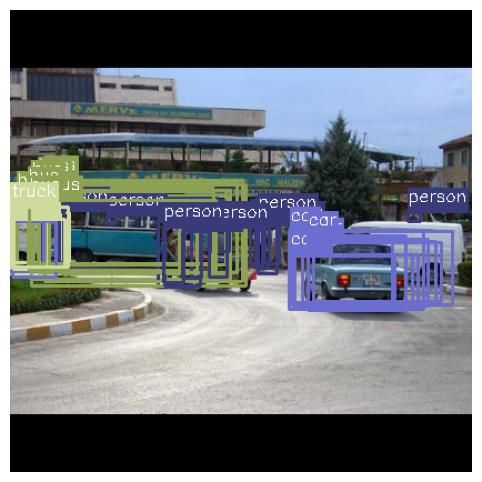

 29%|██▊       | 5002/17432 [2:27:11<17:52:07,  5.18s/it, loss=1.79]

batch_idx: 5001
batch_idx: 5002


 29%|██▊       | 5004/17432 [2:27:11<8:58:12,  2.60s/it, loss=1.79] 

batch_idx: 5003
batch_idx: 5004


 29%|██▊       | 5006/17432 [2:27:12<4:37:07,  1.34s/it, loss=1.79]

batch_idx: 5005
batch_idx: 5006


 29%|██▊       | 5008/17432 [2:27:12<2:28:49,  1.39it/s, loss=1.79]

batch_idx: 5007
batch_idx: 5008


 29%|██▊       | 5010/17432 [2:27:12<1:26:21,  2.40it/s, loss=1.79]

batch_idx: 5009
batch_idx: 5010


 29%|██▉       | 5012/17432 [2:27:12<55:13,  3.75it/s, loss=1.79]  

batch_idx: 5011
batch_idx: 5012


 29%|██▉       | 5014/17432 [2:27:18<6:17:22,  1.82s/it, loss=1.79]

batch_idx: 5013
batch_idx: 5014


 29%|██▉       | 5016/17432 [2:27:18<3:19:07,  1.04it/s, loss=1.79]

batch_idx: 5015
batch_idx: 5016


 29%|██▉       | 5018/17432 [2:27:25<8:40:12,  2.51s/it, loss=1.79]

batch_idx: 5017
batch_idx: 5018


 29%|██▉       | 5020/17432 [2:27:25<4:29:03,  1.30s/it, loss=1.79]

batch_idx: 5019
batch_idx: 5020


 29%|██▉       | 5022/17432 [2:27:32<8:58:20,  2.60s/it, loss=1.79]

batch_idx: 5021
batch_idx: 5022


 29%|██▉       | 5024/17432 [2:27:32<4:37:10,  1.34s/it, loss=1.79]

batch_idx: 5023
batch_idx: 5024


 29%|██▉       | 5026/17432 [2:27:39<8:50:25,  2.57s/it, loss=1.79]

batch_idx: 5025
batch_idx: 5026


 29%|██▉       | 5028/17432 [2:27:39<4:34:12,  1.33s/it, loss=1.79]

batch_idx: 5027
batch_idx: 5028


 29%|██▉       | 5030/17432 [2:27:46<9:14:12,  2.68s/it, loss=1.79]

batch_idx: 5029
batch_idx: 5030


 29%|██▉       | 5032/17432 [2:27:46<4:44:34,  1.38s/it, loss=1.79]

batch_idx: 5031
batch_idx: 5032


 29%|██▉       | 5034/17432 [2:27:53<9:33:02,  2.77s/it, loss=1.79]

batch_idx: 5033
batch_idx: 5034


 29%|██▉       | 5036/17432 [2:27:53<4:55:37,  1.43s/it, loss=1.79]

batch_idx: 5035
batch_idx: 5036


 29%|██▉       | 5038/17432 [2:28:00<9:20:58,  2.72s/it, loss=1.79]

batch_idx: 5037
batch_idx: 5038


 29%|██▉       | 5040/17432 [2:28:00<4:49:06,  1.40s/it, loss=1.79]

batch_idx: 5039
batch_idx: 5040


 29%|██▉       | 5042/17432 [2:28:07<8:43:19,  2.53s/it, loss=1.79]

batch_idx: 5041
batch_idx: 5042


 29%|██▉       | 5044/17432 [2:28:07<4:30:58,  1.31s/it, loss=1.79]

batch_idx: 5043
batch_idx: 5044


 29%|██▉       | 5046/17432 [2:28:14<9:12:10,  2.67s/it, loss=1.79]

batch_idx: 5045
batch_idx: 5046


 29%|██▉       | 5048/17432 [2:28:14<4:44:03,  1.38s/it, loss=1.79]

batch_idx: 5047
batch_idx: 5048


 29%|██▉       | 5050/17432 [2:28:20<9:00:19,  2.62s/it, loss=1.79]

batch_idx: 5049
batch_idx: 5050


 29%|██▉       | 5052/17432 [2:28:21<4:37:32,  1.35s/it, loss=1.79]

batch_idx: 5051
batch_idx: 5052


 29%|██▉       | 5054/17432 [2:28:28<9:36:25,  2.79s/it, loss=1.79]

batch_idx: 5053
batch_idx: 5054


 29%|██▉       | 5056/17432 [2:28:28<4:56:20,  1.44s/it, loss=1.79]

batch_idx: 5055
batch_idx: 5056


 29%|██▉       | 5058/17432 [2:28:34<8:39:17,  2.52s/it, loss=1.79]

batch_idx: 5057
batch_idx: 5058


 29%|██▉       | 5060/17432 [2:28:34<4:28:45,  1.30s/it, loss=1.79]

batch_idx: 5059
batch_idx: 5060


 29%|██▉       | 5062/17432 [2:28:40<8:20:07,  2.43s/it, loss=1.79]

batch_idx: 5061
batch_idx: 5062


 29%|██▉       | 5064/17432 [2:28:41<4:19:10,  1.26s/it, loss=1.79]

batch_idx: 5063
batch_idx: 5064


 29%|██▉       | 5066/17432 [2:28:47<8:42:11,  2.53s/it, loss=1.79]

batch_idx: 5065
batch_idx: 5066


 29%|██▉       | 5068/17432 [2:28:47<4:29:31,  1.31s/it, loss=1.79]

batch_idx: 5067
batch_idx: 5068


 29%|██▉       | 5070/17432 [2:28:54<9:17:09,  2.70s/it, loss=1.79]

batch_idx: 5069
batch_idx: 5070


 29%|██▉       | 5072/17432 [2:28:55<4:45:51,  1.39s/it, loss=1.79]

batch_idx: 5071
batch_idx: 5072


 29%|██▉       | 5074/17432 [2:29:01<9:19:12,  2.72s/it, loss=1.79]

batch_idx: 5073
batch_idx: 5074


 29%|██▉       | 5076/17432 [2:29:02<4:47:36,  1.40s/it, loss=1.79]

batch_idx: 5075
batch_idx: 5076


 29%|██▉       | 5078/17432 [2:29:09<9:45:20,  2.84s/it, loss=1.79]

batch_idx: 5077
batch_idx: 5078


 29%|██▉       | 5080/17432 [2:29:09<5:00:29,  1.46s/it, loss=1.79]

batch_idx: 5079
batch_idx: 5080


 29%|██▉       | 5082/17432 [2:29:16<9:15:44,  2.70s/it, loss=1.79]

batch_idx: 5081
batch_idx: 5082


 29%|██▉       | 5084/17432 [2:29:16<4:45:58,  1.39s/it, loss=1.79]

batch_idx: 5083
batch_idx: 5084


 29%|██▉       | 5086/17432 [2:29:23<9:49:28,  2.86s/it, loss=1.79]

batch_idx: 5085
batch_idx: 5086


 29%|██▉       | 5088/17432 [2:29:24<5:01:35,  1.47s/it, loss=1.79]

batch_idx: 5087
batch_idx: 5088


 29%|██▉       | 5090/17432 [2:29:30<9:10:57,  2.68s/it, loss=1.79]

batch_idx: 5089
batch_idx: 5090


 29%|██▉       | 5092/17432 [2:29:30<4:43:05,  1.38s/it, loss=1.79]

batch_idx: 5091
batch_idx: 5092


 29%|██▉       | 5094/17432 [2:29:37<9:06:42,  2.66s/it, loss=1.79]

batch_idx: 5093
batch_idx: 5094


 29%|██▉       | 5096/17432 [2:29:37<4:41:57,  1.37s/it, loss=1.79]

batch_idx: 5095
batch_idx: 5096


 29%|██▉       | 5098/17432 [2:29:44<9:29:38,  2.77s/it, loss=1.79]

batch_idx: 5097
batch_idx: 5098


 29%|██▉       | 5100/17432 [2:29:45<4:52:24,  1.42s/it, loss=1.79]

batch_idx: 5099
batch_idx: 5100


 29%|██▉       | 5102/17432 [2:29:51<8:48:31,  2.57s/it, loss=1.79]

batch_idx: 5101
batch_idx: 5102


 29%|██▉       | 5104/17432 [2:29:51<4:33:33,  1.33s/it, loss=1.79]

batch_idx: 5103
batch_idx: 5104


 29%|██▉       | 5106/17432 [2:29:58<9:03:17,  2.64s/it, loss=1.79]

batch_idx: 5105
batch_idx: 5106


 29%|██▉       | 5108/17432 [2:29:58<4:40:27,  1.37s/it, loss=1.79]

batch_idx: 5107
batch_idx: 5108


 29%|██▉       | 5110/17432 [2:30:05<9:11:38,  2.69s/it, loss=1.79]

batch_idx: 5109
batch_idx: 5110


 29%|██▉       | 5112/17432 [2:30:05<4:43:22,  1.38s/it, loss=1.79]

batch_idx: 5111
batch_idx: 5112


 29%|██▉       | 5114/17432 [2:30:12<8:53:36,  2.60s/it, loss=1.79]

batch_idx: 5113
batch_idx: 5114


 29%|██▉       | 5116/17432 [2:30:12<4:34:43,  1.34s/it, loss=1.79]

batch_idx: 5115
batch_idx: 5116


 29%|██▉       | 5118/17432 [2:30:19<9:18:41,  2.72s/it, loss=1.79]

batch_idx: 5117
batch_idx: 5118


 29%|██▉       | 5120/17432 [2:30:19<4:47:33,  1.40s/it, loss=1.79]

batch_idx: 5119
batch_idx: 5120


 29%|██▉       | 5122/17432 [2:30:26<9:22:19,  2.74s/it, loss=1.79]

batch_idx: 5121
batch_idx: 5122


 29%|██▉       | 5124/17432 [2:30:26<4:49:05,  1.41s/it, loss=1.79]

batch_idx: 5123
batch_idx: 5124


 29%|██▉       | 5126/17432 [2:30:33<8:48:53,  2.58s/it, loss=1.79]

batch_idx: 5125
batch_idx: 5126


 29%|██▉       | 5128/17432 [2:30:33<4:32:33,  1.33s/it, loss=1.79]

batch_idx: 5127
batch_idx: 5128


 29%|██▉       | 5130/17432 [2:30:40<9:14:13,  2.70s/it, loss=1.79]

batch_idx: 5129
batch_idx: 5130


 29%|██▉       | 5132/17432 [2:30:40<5:02:14,  1.47s/it, loss=1.79]

batch_idx: 5131
batch_idx: 5132


 29%|██▉       | 5134/17432 [2:30:47<9:07:51,  2.67s/it, loss=1.79]

batch_idx: 5133
batch_idx: 5134


 29%|██▉       | 5136/17432 [2:30:48<5:20:56,  1.57s/it, loss=1.79]

batch_idx: 5135
batch_idx: 5136


 29%|██▉       | 5138/17432 [2:30:54<8:46:32,  2.57s/it, loss=1.79]

batch_idx: 5137
batch_idx: 5138


 29%|██▉       | 5140/17432 [2:30:55<5:07:09,  1.50s/it, loss=1.79]

batch_idx: 5139
batch_idx: 5140


 29%|██▉       | 5142/17432 [2:31:01<9:03:34,  2.65s/it, loss=1.79]

batch_idx: 5141
batch_idx: 5142


 30%|██▉       | 5144/17432 [2:31:01<4:52:29,  1.43s/it, loss=1.79]

batch_idx: 5143
batch_idx: 5144


 30%|██▉       | 5146/17432 [2:31:08<8:41:44,  2.55s/it, loss=1.79]

batch_idx: 5145
batch_idx: 5146


 30%|██▉       | 5148/17432 [2:31:09<5:19:49,  1.56s/it, loss=1.79]

batch_idx: 5147
batch_idx: 5148


 30%|██▉       | 5150/17432 [2:31:15<9:09:29,  2.68s/it, loss=1.79]

batch_idx: 5149
batch_idx: 5150


 30%|██▉       | 5152/17432 [2:31:16<5:12:40,  1.53s/it, loss=1.79]

batch_idx: 5151
batch_idx: 5152


 30%|██▉       | 5154/17432 [2:31:22<8:51:58,  2.60s/it, loss=1.79]

batch_idx: 5153
batch_idx: 5154


 30%|██▉       | 5156/17432 [2:31:23<5:13:48,  1.53s/it, loss=1.79]

batch_idx: 5155
batch_idx: 5156


 30%|██▉       | 5158/17432 [2:31:29<8:31:49,  2.50s/it, loss=1.79]

batch_idx: 5157
batch_idx: 5158


 30%|██▉       | 5160/17432 [2:31:30<5:32:56,  1.63s/it, loss=1.79]

batch_idx: 5159
batch_idx: 5160


 30%|██▉       | 5162/17432 [2:31:36<8:44:15,  2.56s/it, loss=1.79]

batch_idx: 5161
batch_idx: 5162


 30%|██▉       | 5164/17432 [2:31:37<5:22:54,  1.58s/it, loss=1.79]

batch_idx: 5163
batch_idx: 5164


 30%|██▉       | 5166/17432 [2:31:43<8:26:50,  2.48s/it, loss=1.79]

batch_idx: 5165
batch_idx: 5166


 30%|██▉       | 5168/17432 [2:31:44<5:18:48,  1.56s/it, loss=1.79]

batch_idx: 5167
batch_idx: 5168


 30%|██▉       | 5170/17432 [2:31:50<8:32:21,  2.51s/it, loss=1.79]

batch_idx: 5169
batch_idx: 5170


 30%|██▉       | 5172/17432 [2:31:51<5:01:02,  1.47s/it, loss=1.79]

batch_idx: 5171
batch_idx: 5172


 30%|██▉       | 5174/17432 [2:31:57<8:44:04,  2.57s/it, loss=1.79]

batch_idx: 5173
batch_idx: 5174


 30%|██▉       | 5176/17432 [2:31:58<5:08:39,  1.51s/it, loss=1.79]

batch_idx: 5175
batch_idx: 5176


 30%|██▉       | 5178/17432 [2:32:04<8:12:37,  2.41s/it, loss=1.79]

batch_idx: 5177
batch_idx: 5178


 30%|██▉       | 5180/17432 [2:32:05<5:32:30,  1.63s/it, loss=1.79]

batch_idx: 5179
batch_idx: 5180


 30%|██▉       | 5182/17432 [2:32:11<8:50:06,  2.60s/it, loss=1.79]

batch_idx: 5181
batch_idx: 5182


 30%|██▉       | 5184/17432 [2:32:12<5:18:23,  1.56s/it, loss=1.79]

batch_idx: 5183
batch_idx: 5184


 30%|██▉       | 5186/17432 [2:32:18<8:34:16,  2.52s/it, loss=1.79]

batch_idx: 5185
batch_idx: 5186


 30%|██▉       | 5188/17432 [2:32:19<5:13:57,  1.54s/it, loss=1.79]

batch_idx: 5187
batch_idx: 5188


 30%|██▉       | 5190/17432 [2:32:25<8:26:12,  2.48s/it, loss=1.79]

batch_idx: 5189
batch_idx: 5190


 30%|██▉       | 5192/17432 [2:32:27<5:46:57,  1.70s/it, loss=1.79]

batch_idx: 5191
batch_idx: 5192


 30%|██▉       | 5194/17432 [2:32:32<8:14:53,  2.43s/it, loss=1.79]

batch_idx: 5193
batch_idx: 5194


 30%|██▉       | 5196/17432 [2:32:34<5:38:29,  1.66s/it, loss=1.79]

batch_idx: 5195
batch_idx: 5196


 30%|██▉       | 5198/17432 [2:32:39<8:05:36,  2.38s/it, loss=1.79]

batch_idx: 5197
batch_idx: 5198


 30%|██▉       | 5200/17432 [2:32:41<5:43:19,  1.68s/it, loss=1.79]

batch_idx: 5199
batch_idx: 5200


 30%|██▉       | 5200/17432 [2:32:41<5:43:19,  1.68s/it, loss=1.79]

==> Saving checkpoint


 30%|██▉       | 5202/17432 [2:32:50<9:53:57,  2.91s/it, loss=1.79] 

batch_idx: 5201
batch_idx: 5202


 30%|██▉       | 5204/17432 [2:32:51<5:04:22,  1.49s/it, loss=1.79]

batch_idx: 5203
batch_idx: 5204


 30%|██▉       | 5206/17432 [2:32:53<4:52:28,  1.44s/it, loss=1.79]

batch_idx: 5205
batch_idx: 5206


 30%|██▉       | 5208/17432 [2:32:55<4:08:13,  1.22s/it, loss=1.79]

batch_idx: 5207
batch_idx: 5208


 30%|██▉       | 5210/17432 [2:33:00<7:02:13,  2.07s/it, loss=1.79]

batch_idx: 5209
batch_idx: 5210


 30%|██▉       | 5212/17432 [2:33:03<6:09:02,  1.81s/it, loss=1.79]

batch_idx: 5211
batch_idx: 5212


 30%|██▉       | 5214/17432 [2:33:07<7:32:30,  2.22s/it, loss=1.79]

batch_idx: 5213
batch_idx: 5214


 30%|██▉       | 5216/17432 [2:33:09<5:37:03,  1.66s/it, loss=1.79]

batch_idx: 5215
batch_idx: 5216


 30%|██▉       | 5218/17432 [2:33:14<7:33:16,  2.23s/it, loss=1.79]

batch_idx: 5217
batch_idx: 5218


 30%|██▉       | 5220/17432 [2:33:16<6:04:24,  1.79s/it, loss=1.79]

batch_idx: 5219
batch_idx: 5220


 30%|██▉       | 5222/17432 [2:33:21<7:43:22,  2.28s/it, loss=1.79]

batch_idx: 5221
batch_idx: 5222


 30%|██▉       | 5224/17432 [2:33:23<5:49:45,  1.72s/it, loss=1.79]

batch_idx: 5223
batch_idx: 5224


 30%|██▉       | 5226/17432 [2:33:28<8:09:23,  2.41s/it, loss=1.79]

batch_idx: 5225
batch_idx: 5226


 30%|██▉       | 5228/17432 [2:33:29<5:14:37,  1.55s/it, loss=1.79]

batch_idx: 5227
batch_idx: 5228


 30%|███       | 5230/17432 [2:33:35<8:19:49,  2.46s/it, loss=1.79]

batch_idx: 5229
batch_idx: 5230


 30%|███       | 5232/17432 [2:33:36<4:58:38,  1.47s/it, loss=1.79]

batch_idx: 5231
batch_idx: 5232


 30%|███       | 5234/17432 [2:33:42<8:50:27,  2.61s/it, loss=1.79]

batch_idx: 5233
batch_idx: 5234


 30%|███       | 5236/17432 [2:33:43<4:48:14,  1.42s/it, loss=1.79]

batch_idx: 5235
batch_idx: 5236


 30%|███       | 5238/17432 [2:33:49<8:49:50,  2.61s/it, loss=1.79]

batch_idx: 5237
batch_idx: 5238


 30%|███       | 5240/17432 [2:33:50<4:49:34,  1.43s/it, loss=1.79]

batch_idx: 5239
batch_idx: 5240


 30%|███       | 5242/17432 [2:33:57<9:39:33,  2.85s/it, loss=1.79]

batch_idx: 5241
batch_idx: 5242


 30%|███       | 5244/17432 [2:33:57<4:56:51,  1.46s/it, loss=1.79]

batch_idx: 5243
batch_idx: 5244


 30%|███       | 5246/17432 [2:34:04<9:28:16,  2.80s/it, loss=1.79]

batch_idx: 5245
batch_idx: 5246


 30%|███       | 5248/17432 [2:34:04<4:51:22,  1.43s/it, loss=1.79]

batch_idx: 5247
batch_idx: 5248


 30%|███       | 5250/17432 [2:34:11<8:55:25,  2.64s/it, loss=1.79]

batch_idx: 5249
batch_idx: 5250


 30%|███       | 5252/17432 [2:34:11<4:35:04,  1.36s/it, loss=1.79]

batch_idx: 5251
batch_idx: 5252


 30%|███       | 5254/17432 [2:34:18<9:15:31,  2.74s/it, loss=1.79]

batch_idx: 5253
batch_idx: 5254


 30%|███       | 5256/17432 [2:34:18<4:45:53,  1.41s/it, loss=1.79]

batch_idx: 5255
batch_idx: 5256


 30%|███       | 5258/17432 [2:34:26<9:30:57,  2.81s/it, loss=1.79]

batch_idx: 5257
batch_idx: 5258


 30%|███       | 5260/17432 [2:34:26<4:53:38,  1.45s/it, loss=1.79]

batch_idx: 5259
batch_idx: 5260


 30%|███       | 5262/17432 [2:34:32<8:58:58,  2.66s/it, loss=1.79]

batch_idx: 5261
batch_idx: 5262


 30%|███       | 5264/17432 [2:34:33<4:37:14,  1.37s/it, loss=1.79]

batch_idx: 5263
batch_idx: 5264


 30%|███       | 5266/17432 [2:34:41<10:18:57,  3.05s/it, loss=1.79]

batch_idx: 5265
batch_idx: 5266


 30%|███       | 5268/17432 [2:34:41<5:15:54,  1.56s/it, loss=1.79] 

batch_idx: 5267
batch_idx: 5268


 30%|███       | 5270/17432 [2:34:47<9:17:10,  2.75s/it, loss=1.79]

batch_idx: 5269
batch_idx: 5270


 30%|███       | 5272/17432 [2:34:48<4:46:46,  1.42s/it, loss=1.79]

batch_idx: 5271
batch_idx: 5272


 30%|███       | 5274/17432 [2:34:55<9:13:43,  2.73s/it, loss=1.79]

batch_idx: 5273
batch_idx: 5274


 30%|███       | 5276/17432 [2:34:55<4:44:57,  1.41s/it, loss=1.79]

batch_idx: 5275
batch_idx: 5276


 30%|███       | 5278/17432 [2:35:02<9:56:02,  2.94s/it, loss=1.79]

batch_idx: 5277
batch_idx: 5278


 30%|███       | 5280/17432 [2:35:03<5:05:46,  1.51s/it, loss=1.79]

batch_idx: 5279
batch_idx: 5280


 30%|███       | 5282/17432 [2:35:10<9:28:44,  2.81s/it, loss=1.79]

batch_idx: 5281
batch_idx: 5282


 30%|███       | 5284/17432 [2:35:10<4:51:32,  1.44s/it, loss=1.79]

batch_idx: 5283
batch_idx: 5284


 30%|███       | 5286/17432 [2:35:17<9:06:56,  2.70s/it, loss=1.79]

batch_idx: 5285
batch_idx: 5286


 30%|███       | 5288/17432 [2:35:17<4:40:38,  1.39s/it, loss=1.79]

batch_idx: 5287
batch_idx: 5288


 30%|███       | 5290/17432 [2:35:23<8:54:00,  2.64s/it, loss=1.79]

batch_idx: 5289
batch_idx: 5290


 30%|███       | 5292/17432 [2:35:24<4:34:44,  1.36s/it, loss=1.79]

batch_idx: 5291
batch_idx: 5292


 30%|███       | 5294/17432 [2:35:30<9:11:20,  2.73s/it, loss=1.79]

batch_idx: 5293
batch_idx: 5294


 30%|███       | 5296/17432 [2:35:31<4:44:30,  1.41s/it, loss=1.79]

batch_idx: 5295
batch_idx: 5296


 30%|███       | 5298/17432 [2:35:37<8:54:23,  2.64s/it, loss=1.79]

batch_idx: 5297
batch_idx: 5298


 30%|███       | 5300/17432 [2:35:38<4:35:28,  1.36s/it, loss=1.79]

batch_idx: 5299
batch_idx: 5300


 30%|███       | 5302/17432 [2:35:44<8:41:05,  2.58s/it, loss=1.79]

batch_idx: 5301
batch_idx: 5302


 30%|███       | 5304/17432 [2:35:44<4:29:23,  1.33s/it, loss=1.79]

batch_idx: 5303
batch_idx: 5304


 30%|███       | 5306/17432 [2:35:52<9:30:12,  2.82s/it, loss=1.79]

batch_idx: 5305
batch_idx: 5306


 30%|███       | 5308/17432 [2:35:52<4:52:05,  1.45s/it, loss=1.79]

batch_idx: 5307
batch_idx: 5308


 30%|███       | 5310/17432 [2:35:59<9:28:24,  2.81s/it, loss=1.79]

batch_idx: 5309
batch_idx: 5310


 30%|███       | 5312/17432 [2:35:59<4:51:03,  1.44s/it, loss=1.79]

batch_idx: 5311
batch_idx: 5312


 30%|███       | 5314/17432 [2:36:06<8:52:53,  2.64s/it, loss=1.79]

batch_idx: 5313
batch_idx: 5314


 30%|███       | 5316/17432 [2:36:06<4:34:17,  1.36s/it, loss=1.79]

batch_idx: 5315
batch_idx: 5316


 31%|███       | 5318/17432 [2:36:12<8:33:09,  2.54s/it, loss=1.79]

batch_idx: 5317
batch_idx: 5318


 31%|███       | 5320/17432 [2:36:12<4:25:21,  1.31s/it, loss=1.78]

batch_idx: 5319
batch_idx: 5320


 31%|███       | 5322/17432 [2:36:19<9:06:06,  2.71s/it, loss=1.79]

batch_idx: 5321
batch_idx: 5322


 31%|███       | 5324/17432 [2:36:20<4:41:26,  1.39s/it, loss=1.79]

batch_idx: 5323
batch_idx: 5324


 31%|███       | 5326/17432 [2:36:26<9:00:25,  2.68s/it, loss=1.78]

batch_idx: 5325
batch_idx: 5326


 31%|███       | 5328/17432 [2:36:27<4:38:00,  1.38s/it, loss=1.78]

batch_idx: 5327
batch_idx: 5328


 31%|███       | 5330/17432 [2:36:33<8:45:15,  2.60s/it, loss=1.78]

batch_idx: 5329
batch_idx: 5330


 31%|███       | 5332/17432 [2:36:33<4:30:17,  1.34s/it, loss=1.78]

batch_idx: 5331
batch_idx: 5332


 31%|███       | 5334/17432 [2:36:40<8:46:02,  2.61s/it, loss=1.78]

batch_idx: 5333
batch_idx: 5334


 31%|███       | 5336/17432 [2:36:40<4:31:14,  1.35s/it, loss=1.78]

batch_idx: 5335
batch_idx: 5336


 31%|███       | 5338/17432 [2:36:47<9:24:27,  2.80s/it, loss=1.78]

batch_idx: 5337
batch_idx: 5338


 31%|███       | 5340/17432 [2:36:47<4:50:23,  1.44s/it, loss=1.78]

batch_idx: 5339
batch_idx: 5340


 31%|███       | 5342/17432 [2:36:55<9:36:25,  2.86s/it, loss=1.78]

batch_idx: 5341
batch_idx: 5342


 31%|███       | 5344/17432 [2:36:55<4:55:45,  1.47s/it, loss=1.78]

batch_idx: 5343
batch_idx: 5344


 31%|███       | 5346/17432 [2:37:01<8:49:50,  2.63s/it, loss=1.78]

batch_idx: 5345
batch_idx: 5346


 31%|███       | 5348/17432 [2:37:02<4:32:45,  1.35s/it, loss=1.78]

batch_idx: 5347
batch_idx: 5348


 31%|███       | 5350/17432 [2:37:09<9:06:35,  2.71s/it, loss=1.78]

batch_idx: 5349
batch_idx: 5350


 31%|███       | 5352/17432 [2:37:09<4:40:50,  1.39s/it, loss=1.78]

batch_idx: 5351
batch_idx: 5352


 31%|███       | 5354/17432 [2:37:16<9:05:24,  2.71s/it, loss=1.78]

batch_idx: 5353
batch_idx: 5354


 31%|███       | 5356/17432 [2:37:16<4:40:39,  1.39s/it, loss=1.78]

batch_idx: 5355
batch_idx: 5356


 31%|███       | 5358/17432 [2:37:23<9:12:41,  2.75s/it, loss=1.78]

batch_idx: 5357
batch_idx: 5358


 31%|███       | 5360/17432 [2:37:23<4:43:41,  1.41s/it, loss=1.78]

batch_idx: 5359
batch_idx: 5360


 31%|███       | 5362/17432 [2:37:30<8:56:32,  2.67s/it, loss=1.78]

batch_idx: 5361
batch_idx: 5362


 31%|███       | 5364/17432 [2:37:30<4:36:45,  1.38s/it, loss=1.78]

batch_idx: 5363
batch_idx: 5364


 31%|███       | 5366/17432 [2:37:37<9:25:57,  2.81s/it, loss=1.78]

batch_idx: 5365
batch_idx: 5366


 31%|███       | 5368/17432 [2:37:37<4:50:42,  1.45s/it, loss=1.78]

batch_idx: 5367
batch_idx: 5368


 31%|███       | 5370/17432 [2:37:44<9:05:23,  2.71s/it, loss=1.78]

batch_idx: 5369
batch_idx: 5370


 31%|███       | 5372/17432 [2:37:44<4:39:59,  1.39s/it, loss=1.78]

batch_idx: 5371
batch_idx: 5372


 31%|███       | 5374/17432 [2:37:51<8:50:33,  2.64s/it, loss=1.78]

batch_idx: 5373
batch_idx: 5374


 31%|███       | 5376/17432 [2:37:51<4:32:46,  1.36s/it, loss=1.78]

batch_idx: 5375
batch_idx: 5376


 31%|███       | 5378/17432 [2:37:58<9:08:15,  2.73s/it, loss=1.78]

batch_idx: 5377
batch_idx: 5378


 31%|███       | 5380/17432 [2:37:58<4:42:12,  1.40s/it, loss=1.78]

batch_idx: 5379
batch_idx: 5380


 31%|███       | 5382/17432 [2:38:05<9:09:46,  2.74s/it, loss=1.78]

batch_idx: 5381
batch_idx: 5382


 31%|███       | 5384/17432 [2:38:05<4:42:38,  1.41s/it, loss=1.78]

batch_idx: 5383
batch_idx: 5384


 31%|███       | 5386/17432 [2:38:12<9:01:17,  2.70s/it, loss=1.78]

batch_idx: 5385
batch_idx: 5386


 31%|███       | 5388/17432 [2:38:12<4:38:43,  1.39s/it, loss=1.78]

batch_idx: 5387
batch_idx: 5388


 31%|███       | 5390/17432 [2:38:19<9:03:29,  2.71s/it, loss=1.78]

batch_idx: 5389
batch_idx: 5390


 31%|███       | 5392/17432 [2:38:19<4:40:29,  1.40s/it, loss=1.78]

batch_idx: 5391
batch_idx: 5392


 31%|███       | 5394/17432 [2:38:26<8:38:16,  2.58s/it, loss=1.78]

batch_idx: 5393
batch_idx: 5394


 31%|███       | 5396/17432 [2:38:26<4:26:41,  1.33s/it, loss=1.78]

batch_idx: 5395
batch_idx: 5396


 31%|███       | 5398/17432 [2:38:33<8:48:11,  2.63s/it, loss=1.78]

batch_idx: 5397
batch_idx: 5398


 31%|███       | 5400/17432 [2:38:33<4:31:16,  1.35s/it, loss=1.78]

batch_idx: 5399
batch_idx: 5400


 31%|███       | 5400/17432 [2:38:33<4:31:16,  1.35s/it, loss=1.78]

==> Saving checkpoint


 31%|███       | 5402/17432 [2:38:40<7:19:23,  2.19s/it, loss=1.78]

batch_idx: 5401
batch_idx: 5402


 31%|███       | 5404/17432 [2:38:40<3:48:55,  1.14s/it, loss=1.78]

batch_idx: 5403
batch_idx: 5404


 31%|███       | 5406/17432 [2:38:48<9:17:19,  2.78s/it, loss=1.78]

batch_idx: 5405
batch_idx: 5406


 31%|███       | 5408/17432 [2:38:48<4:46:23,  1.43s/it, loss=1.78]

batch_idx: 5407
batch_idx: 5408


 31%|███       | 5410/17432 [2:38:54<8:39:29,  2.59s/it, loss=1.78]

batch_idx: 5409
batch_idx: 5410


 31%|███       | 5412/17432 [2:38:55<4:27:51,  1.34s/it, loss=1.78]

batch_idx: 5411
batch_idx: 5412


 31%|███       | 5414/17432 [2:39:01<8:32:48,  2.56s/it, loss=1.78]

batch_idx: 5413
batch_idx: 5414


 31%|███       | 5416/17432 [2:39:01<4:24:12,  1.32s/it, loss=1.78]

batch_idx: 5415
batch_idx: 5416


 31%|███       | 5418/17432 [2:39:08<9:04:06,  2.72s/it, loss=1.78]

batch_idx: 5417
batch_idx: 5418


 31%|███       | 5420/17432 [2:39:09<4:39:28,  1.40s/it, loss=1.78]

batch_idx: 5419
batch_idx: 5420


 31%|███       | 5422/17432 [2:39:15<8:57:59,  2.69s/it, loss=1.78]

batch_idx: 5421
batch_idx: 5422


 31%|███       | 5424/17432 [2:39:15<4:36:48,  1.38s/it, loss=1.78]

batch_idx: 5423
batch_idx: 5424


 31%|███       | 5426/17432 [2:39:22<8:42:22,  2.61s/it, loss=1.78]

batch_idx: 5425
batch_idx: 5426


 31%|███       | 5428/17432 [2:39:22<4:29:13,  1.35s/it, loss=1.78]

batch_idx: 5427
batch_idx: 5428


 31%|███       | 5430/17432 [2:39:28<8:20:30,  2.50s/it, loss=1.78]

batch_idx: 5429
batch_idx: 5430


 31%|███       | 5432/17432 [2:39:29<4:18:13,  1.29s/it, loss=1.78]

batch_idx: 5431
batch_idx: 5432


 31%|███       | 5434/17432 [2:39:35<8:36:49,  2.58s/it, loss=1.78]

batch_idx: 5433
batch_idx: 5434


 31%|███       | 5436/17432 [2:39:35<4:27:02,  1.34s/it, loss=1.78]

batch_idx: 5435
batch_idx: 5436


 31%|███       | 5438/17432 [2:39:42<8:51:17,  2.66s/it, loss=1.78]

batch_idx: 5437
batch_idx: 5438


 31%|███       | 5440/17432 [2:39:42<4:33:37,  1.37s/it, loss=1.78]

batch_idx: 5439
batch_idx: 5440


 31%|███       | 5442/17432 [2:39:49<9:08:09,  2.74s/it, loss=1.78]

batch_idx: 5441
batch_idx: 5442


 31%|███       | 5444/17432 [2:39:50<4:41:10,  1.41s/it, loss=1.78]

batch_idx: 5443
batch_idx: 5444


 31%|███       | 5446/17432 [2:39:57<9:06:05,  2.73s/it, loss=1.78]

batch_idx: 5445
batch_idx: 5446


 31%|███▏      | 5448/17432 [2:39:57<4:41:08,  1.41s/it, loss=1.78]

batch_idx: 5447
batch_idx: 5448


 31%|███▏      | 5450/17432 [2:40:03<8:49:16,  2.65s/it, loss=1.78]

batch_idx: 5449
batch_idx: 5450


 31%|███▏      | 5452/17432 [2:40:04<4:33:46,  1.37s/it, loss=1.78]

batch_idx: 5451
batch_idx: 5452


 31%|███▏      | 5454/17432 [2:40:11<9:11:36,  2.76s/it, loss=1.78]

batch_idx: 5453
batch_idx: 5454


 31%|███▏      | 5456/17432 [2:40:11<4:44:23,  1.42s/it, loss=1.78]

batch_idx: 5455
batch_idx: 5456


 31%|███▏      | 5458/17432 [2:40:18<9:13:49,  2.78s/it, loss=1.78]

batch_idx: 5457
batch_idx: 5458


 31%|███▏      | 5460/17432 [2:40:18<4:44:38,  1.43s/it, loss=1.78]

batch_idx: 5459
batch_idx: 5460


 31%|███▏      | 5462/17432 [2:40:25<9:03:50,  2.73s/it, loss=1.78]

batch_idx: 5461
batch_idx: 5462


 31%|███▏      | 5464/17432 [2:40:25<4:39:45,  1.40s/it, loss=1.78]

batch_idx: 5463
batch_idx: 5464


 31%|███▏      | 5466/17432 [2:40:32<8:31:48,  2.57s/it, loss=1.78]

batch_idx: 5465
batch_idx: 5466


 31%|███▏      | 5468/17432 [2:40:32<4:23:56,  1.32s/it, loss=1.78]

batch_idx: 5467
batch_idx: 5468


 31%|███▏      | 5470/17432 [2:40:38<8:47:57,  2.65s/it, loss=1.78]

batch_idx: 5469
batch_idx: 5470


 31%|███▏      | 5472/17432 [2:40:39<4:31:48,  1.36s/it, loss=1.78]

batch_idx: 5471
batch_idx: 5472


 31%|███▏      | 5474/17432 [2:40:45<8:49:11,  2.66s/it, loss=1.78]

batch_idx: 5473
batch_idx: 5474


 31%|███▏      | 5476/17432 [2:40:46<4:33:22,  1.37s/it, loss=1.78]

batch_idx: 5475
batch_idx: 5476


 31%|███▏      | 5478/17432 [2:40:52<8:43:44,  2.63s/it, loss=1.78]

batch_idx: 5477
batch_idx: 5478


 31%|███▏      | 5480/17432 [2:40:52<4:29:51,  1.35s/it, loss=1.78]

batch_idx: 5479
batch_idx: 5480


 31%|███▏      | 5482/17432 [2:40:59<8:40:04,  2.61s/it, loss=1.78]

batch_idx: 5481
batch_idx: 5482


 31%|███▏      | 5484/17432 [2:40:59<4:28:12,  1.35s/it, loss=1.79]

batch_idx: 5483
batch_idx: 5484


 31%|███▏      | 5486/17432 [2:41:06<8:50:27,  2.66s/it, loss=1.79]

batch_idx: 5485
batch_idx: 5486


 31%|███▏      | 5488/17432 [2:41:06<4:35:02,  1.38s/it, loss=1.79]

batch_idx: 5487
batch_idx: 5488


 31%|███▏      | 5490/17432 [2:41:13<8:52:28,  2.68s/it, loss=1.79]

batch_idx: 5489
batch_idx: 5490


 32%|███▏      | 5492/17432 [2:41:13<4:47:17,  1.44s/it, loss=1.79]

batch_idx: 5491
batch_idx: 5492


 32%|███▏      | 5494/17432 [2:41:19<8:15:55,  2.49s/it, loss=1.78]

batch_idx: 5493
batch_idx: 5494


 32%|███▏      | 5496/17432 [2:41:20<4:51:44,  1.47s/it, loss=1.78]

batch_idx: 5495
batch_idx: 5496


 32%|███▏      | 5498/17432 [2:41:27<8:30:28,  2.57s/it, loss=1.78]

batch_idx: 5497
batch_idx: 5498


 32%|███▏      | 5500/17432 [2:41:27<4:58:15,  1.50s/it, loss=1.79]

batch_idx: 5499
batch_idx: 5500


 32%|███▏      | 5502/17432 [2:41:33<8:24:17,  2.54s/it, loss=1.78]

batch_idx: 5501
batch_idx: 5502


 32%|███▏      | 5504/17432 [2:41:35<5:23:25,  1.63s/it, loss=1.78]

batch_idx: 5503
batch_idx: 5504


 32%|███▏      | 5506/17432 [2:41:40<8:15:16,  2.49s/it, loss=1.78]

batch_idx: 5505
batch_idx: 5506


 32%|███▏      | 5508/17432 [2:41:42<5:08:40,  1.55s/it, loss=1.78]

batch_idx: 5507
batch_idx: 5508


 32%|███▏      | 5510/17432 [2:41:47<8:19:28,  2.51s/it, loss=1.78]

batch_idx: 5509
batch_idx: 5510


 32%|███▏      | 5512/17432 [2:41:49<5:28:30,  1.65s/it, loss=1.78]

batch_idx: 5511
batch_idx: 5512


 32%|███▏      | 5514/17432 [2:41:55<8:20:25,  2.52s/it, loss=1.78]

batch_idx: 5513
batch_idx: 5514


 32%|███▏      | 5516/17432 [2:41:56<5:13:40,  1.58s/it, loss=1.78]

batch_idx: 5515
batch_idx: 5516


 32%|███▏      | 5518/17432 [2:42:02<8:17:59,  2.51s/it, loss=1.78]

batch_idx: 5517
batch_idx: 5518


 32%|███▏      | 5520/17432 [2:42:03<5:07:10,  1.55s/it, loss=1.78]

batch_idx: 5519
batch_idx: 5520


 32%|███▏      | 5522/17432 [2:42:09<8:22:45,  2.53s/it, loss=1.78]

batch_idx: 5521
batch_idx: 5522


 32%|███▏      | 5524/17432 [2:42:10<5:28:24,  1.65s/it, loss=1.78]

batch_idx: 5523
batch_idx: 5524


 32%|███▏      | 5526/17432 [2:42:15<7:55:27,  2.40s/it, loss=1.78]

batch_idx: 5525
batch_idx: 5526


 32%|███▏      | 5528/17432 [2:42:17<5:28:08,  1.65s/it, loss=1.78]

batch_idx: 5527
batch_idx: 5528


 32%|███▏      | 5530/17432 [2:42:23<8:17:26,  2.51s/it, loss=1.78]

batch_idx: 5529
batch_idx: 5530


 32%|███▏      | 5532/17432 [2:42:24<4:54:51,  1.49s/it, loss=1.78]

batch_idx: 5531
batch_idx: 5532


 32%|███▏      | 5534/17432 [2:42:30<8:25:01,  2.55s/it, loss=1.78]

batch_idx: 5533
batch_idx: 5534


 32%|███▏      | 5536/17432 [2:42:30<4:48:36,  1.46s/it, loss=1.78]

batch_idx: 5535
batch_idx: 5536


 32%|███▏      | 5538/17432 [2:42:37<8:47:21,  2.66s/it, loss=1.78]

batch_idx: 5537
batch_idx: 5538


 32%|███▏      | 5540/17432 [2:42:37<4:35:39,  1.39s/it, loss=1.78]

batch_idx: 5539
batch_idx: 5540


 32%|███▏      | 5542/17432 [2:42:44<9:12:04,  2.79s/it, loss=1.78]

batch_idx: 5541
batch_idx: 5542


 32%|███▏      | 5544/17432 [2:42:45<4:43:05,  1.43s/it, loss=1.78]

batch_idx: 5543
batch_idx: 5544


 32%|███▏      | 5546/17432 [2:42:51<8:33:59,  2.59s/it, loss=1.78]

batch_idx: 5545
batch_idx: 5546


 32%|███▏      | 5548/17432 [2:42:51<4:24:43,  1.34s/it, loss=1.78]

batch_idx: 5547
batch_idx: 5548


 32%|███▏      | 5550/17432 [2:42:58<8:23:57,  2.54s/it, loss=1.78]

batch_idx: 5549
batch_idx: 5550


 32%|███▏      | 5552/17432 [2:42:58<4:20:12,  1.31s/it, loss=1.78]

batch_idx: 5551
batch_idx: 5552


 32%|███▏      | 5554/17432 [2:43:05<8:49:26,  2.67s/it, loss=1.78]

batch_idx: 5553
batch_idx: 5554


 32%|███▏      | 5556/17432 [2:43:05<4:31:47,  1.37s/it, loss=1.78]

batch_idx: 5555
batch_idx: 5556


 32%|███▏      | 5558/17432 [2:43:12<9:25:18,  2.86s/it, loss=1.78]

batch_idx: 5557
batch_idx: 5558


 32%|███▏      | 5560/17432 [2:43:12<4:50:00,  1.47s/it, loss=1.78]

batch_idx: 5559
batch_idx: 5560


 32%|███▏      | 5562/17432 [2:43:20<9:33:38,  2.90s/it, loss=1.78]

batch_idx: 5561
batch_idx: 5562


 32%|███▏      | 5564/17432 [2:43:20<4:54:14,  1.49s/it, loss=1.78]

batch_idx: 5563
batch_idx: 5564


 32%|███▏      | 5566/17432 [2:43:27<9:20:56,  2.84s/it, loss=1.78]

batch_idx: 5565
batch_idx: 5566


 32%|███▏      | 5568/17432 [2:43:27<4:48:01,  1.46s/it, loss=1.78]

batch_idx: 5567
batch_idx: 5568


 32%|███▏      | 5570/17432 [2:43:34<9:08:33,  2.77s/it, loss=1.78]

batch_idx: 5569
batch_idx: 5570


 32%|███▏      | 5572/17432 [2:43:35<4:41:56,  1.43s/it, loss=1.78]

batch_idx: 5571
batch_idx: 5572


 32%|███▏      | 5574/17432 [2:43:41<9:04:10,  2.75s/it, loss=1.78]

batch_idx: 5573
batch_idx: 5574


 32%|███▏      | 5576/17432 [2:43:42<4:39:20,  1.41s/it, loss=1.78]

batch_idx: 5575
batch_idx: 5576


 32%|███▏      | 5578/17432 [2:43:48<8:44:57,  2.66s/it, loss=1.78]

batch_idx: 5577
batch_idx: 5578


 32%|███▏      | 5580/17432 [2:43:49<4:30:48,  1.37s/it, loss=1.78]

batch_idx: 5579
batch_idx: 5580


 32%|███▏      | 5582/17432 [2:43:56<9:09:07,  2.78s/it, loss=1.78]

batch_idx: 5581
batch_idx: 5582


 32%|███▏      | 5584/17432 [2:43:56<4:42:21,  1.43s/it, loss=1.78]

batch_idx: 5583
batch_idx: 5584


 32%|███▏      | 5586/17432 [2:44:03<9:13:27,  2.80s/it, loss=1.78]

batch_idx: 5585
batch_idx: 5586


 32%|███▏      | 5588/17432 [2:44:03<4:44:32,  1.44s/it, loss=1.78]

batch_idx: 5587
batch_idx: 5588


 32%|███▏      | 5590/17432 [2:44:10<9:07:57,  2.78s/it, loss=1.78]

batch_idx: 5589
batch_idx: 5590


 32%|███▏      | 5592/17432 [2:44:10<4:41:56,  1.43s/it, loss=1.78]

batch_idx: 5591
batch_idx: 5592


 32%|███▏      | 5594/17432 [2:44:17<8:46:41,  2.67s/it, loss=1.78]

batch_idx: 5593
batch_idx: 5594


 32%|███▏      | 5596/17432 [2:44:17<4:30:26,  1.37s/it, loss=1.78]

batch_idx: 5595
batch_idx: 5596


 32%|███▏      | 5598/17432 [2:44:24<8:40:56,  2.64s/it, loss=1.78]

batch_idx: 5597
batch_idx: 5598


 32%|███▏      | 5600/17432 [2:44:24<4:28:14,  1.36s/it, loss=1.78]

batch_idx: 5599
batch_idx: 5600


 32%|███▏      | 5600/17432 [2:44:24<4:28:14,  1.36s/it, loss=1.78]

==> Saving checkpoint


 32%|███▏      | 5602/17432 [2:44:31<7:02:06,  2.14s/it, loss=1.78]

batch_idx: 5601
batch_idx: 5602


 32%|███▏      | 5604/17432 [2:44:31<3:40:04,  1.12s/it, loss=1.78]

batch_idx: 5603
batch_idx: 5604


 32%|███▏      | 5606/17432 [2:44:38<8:43:30,  2.66s/it, loss=1.78]

batch_idx: 5605
batch_idx: 5606


 32%|███▏      | 5608/17432 [2:44:39<4:30:09,  1.37s/it, loss=1.78]

batch_idx: 5607
batch_idx: 5608


 32%|███▏      | 5610/17432 [2:44:45<8:48:45,  2.68s/it, loss=1.78]

batch_idx: 5609
batch_idx: 5610


 32%|███▏      | 5612/17432 [2:44:46<4:32:26,  1.38s/it, loss=1.78]

batch_idx: 5611
batch_idx: 5612


 32%|███▏      | 5614/17432 [2:44:52<8:40:55,  2.64s/it, loss=1.78]

batch_idx: 5613
batch_idx: 5614


 32%|███▏      | 5616/17432 [2:44:53<4:28:08,  1.36s/it, loss=1.78]

batch_idx: 5615
batch_idx: 5616


 32%|███▏      | 5618/17432 [2:45:00<9:21:56,  2.85s/it, loss=1.78]

batch_idx: 5617
batch_idx: 5618


 32%|███▏      | 5620/17432 [2:45:00<4:49:02,  1.47s/it, loss=1.78]

batch_idx: 5619
batch_idx: 5620


 32%|███▏      | 5622/17432 [2:45:07<9:02:32,  2.76s/it, loss=1.78]

batch_idx: 5621
batch_idx: 5622


 32%|███▏      | 5624/17432 [2:45:07<4:38:50,  1.42s/it, loss=1.78]

batch_idx: 5623
batch_idx: 5624


 32%|███▏      | 5626/17432 [2:45:14<8:45:34,  2.67s/it, loss=1.78]

batch_idx: 5625
batch_idx: 5626


 32%|███▏      | 5628/17432 [2:45:14<4:30:36,  1.38s/it, loss=1.78]

batch_idx: 5627
batch_idx: 5628


 32%|███▏      | 5630/17432 [2:45:21<8:26:41,  2.58s/it, loss=1.78]

batch_idx: 5629
batch_idx: 5630


 32%|███▏      | 5632/17432 [2:45:21<4:22:15,  1.33s/it, loss=1.78]

batch_idx: 5631
batch_idx: 5632


 32%|███▏      | 5634/17432 [2:45:27<8:36:47,  2.63s/it, loss=1.78]

batch_idx: 5633
batch_idx: 5634


 32%|███▏      | 5636/17432 [2:45:28<4:25:45,  1.35s/it, loss=1.78]

batch_idx: 5635
batch_idx: 5636


 32%|███▏      | 5638/17432 [2:45:34<8:34:20,  2.62s/it, loss=1.78]

batch_idx: 5637
batch_idx: 5638


 32%|███▏      | 5640/17432 [2:45:34<4:25:03,  1.35s/it, loss=1.78]

batch_idx: 5639
batch_idx: 5640


 32%|███▏      | 5642/17432 [2:45:42<9:07:09,  2.78s/it, loss=1.78]

batch_idx: 5641
batch_idx: 5642


 32%|███▏      | 5644/17432 [2:45:42<4:40:46,  1.43s/it, loss=1.78]

batch_idx: 5643
batch_idx: 5644


 32%|███▏      | 5646/17432 [2:45:48<8:26:29,  2.58s/it, loss=1.78]

batch_idx: 5645
batch_idx: 5646


 32%|███▏      | 5648/17432 [2:45:49<4:38:07,  1.42s/it, loss=1.78]

batch_idx: 5647
batch_idx: 5648


 32%|███▏      | 5650/17432 [2:45:56<8:55:31,  2.73s/it, loss=1.78]

batch_idx: 5649
batch_idx: 5650


 32%|███▏      | 5652/17432 [2:45:56<4:36:30,  1.41s/it, loss=1.78]

batch_idx: 5651
batch_idx: 5652


 32%|███▏      | 5654/17432 [2:46:03<8:51:18,  2.71s/it, loss=1.78]

batch_idx: 5653
batch_idx: 5654


 32%|███▏      | 5656/17432 [2:46:03<4:34:17,  1.40s/it, loss=1.78]

batch_idx: 5655
batch_idx: 5656


 32%|███▏      | 5658/17432 [2:46:10<8:50:50,  2.71s/it, loss=1.78]

batch_idx: 5657
batch_idx: 5658


 32%|███▏      | 5660/17432 [2:46:10<4:33:28,  1.39s/it, loss=1.78]

batch_idx: 5659
batch_idx: 5660


 32%|███▏      | 5662/17432 [2:46:16<8:33:12,  2.62s/it, loss=1.78]

batch_idx: 5661
batch_idx: 5662


 32%|███▏      | 5664/17432 [2:46:17<4:24:01,  1.35s/it, loss=1.78]

batch_idx: 5663
batch_idx: 5664


 33%|███▎      | 5666/17432 [2:46:24<8:56:19,  2.73s/it, loss=1.78]

batch_idx: 5665
batch_idx: 5666


 33%|███▎      | 5668/17432 [2:46:24<4:42:57,  1.44s/it, loss=1.78]

batch_idx: 5667
batch_idx: 5668


 33%|███▎      | 5670/17432 [2:46:30<8:15:12,  2.53s/it, loss=1.78]

batch_idx: 5669
batch_idx: 5670


 33%|███▎      | 5672/17432 [2:46:31<4:42:32,  1.44s/it, loss=1.78]

batch_idx: 5671
batch_idx: 5672


 33%|███▎      | 5674/17432 [2:46:37<8:29:24,  2.60s/it, loss=1.78]

batch_idx: 5673
batch_idx: 5674


 33%|███▎      | 5676/17432 [2:46:38<5:03:48,  1.55s/it, loss=1.78]

batch_idx: 5675
batch_idx: 5676


 33%|███▎      | 5678/17432 [2:46:44<8:02:49,  2.46s/it, loss=1.78]

batch_idx: 5677
batch_idx: 5678


 33%|███▎      | 5680/17432 [2:46:45<5:09:36,  1.58s/it, loss=1.78]

batch_idx: 5679
batch_idx: 5680


 33%|███▎      | 5682/17432 [2:46:51<8:04:01,  2.47s/it, loss=1.78]

batch_idx: 5681
batch_idx: 5682


 33%|███▎      | 5684/17432 [2:46:52<4:38:33,  1.42s/it, loss=1.78]

batch_idx: 5683
batch_idx: 5684


 33%|███▎      | 5686/17432 [2:46:58<8:19:49,  2.55s/it, loss=1.78]

batch_idx: 5685
batch_idx: 5686


 33%|███▎      | 5688/17432 [2:46:59<4:59:57,  1.53s/it, loss=1.78]

batch_idx: 5687
batch_idx: 5688


 33%|███▎      | 5690/17432 [2:47:05<8:42:46,  2.67s/it, loss=1.78]

batch_idx: 5689
batch_idx: 5690


 33%|███▎      | 5692/17432 [2:47:06<4:48:23,  1.47s/it, loss=1.78]

batch_idx: 5691
batch_idx: 5692


 33%|███▎      | 5694/17432 [2:47:12<8:19:50,  2.55s/it, loss=1.78]

batch_idx: 5693
batch_idx: 5694


 33%|███▎      | 5696/17432 [2:47:13<4:42:28,  1.44s/it, loss=1.78]

batch_idx: 5695
batch_idx: 5696


 33%|███▎      | 5698/17432 [2:47:19<8:45:50,  2.69s/it, loss=1.78]

batch_idx: 5697
batch_idx: 5698


 33%|███▎      | 5700/17432 [2:47:19<4:30:59,  1.39s/it, loss=1.78]

batch_idx: 5699
batch_idx: 5700


 33%|███▎      | 5702/17432 [2:47:26<8:44:00,  2.68s/it, loss=1.78]

batch_idx: 5701
batch_idx: 5702


 33%|███▎      | 5704/17432 [2:47:26<4:30:31,  1.38s/it, loss=1.78]

batch_idx: 5703
batch_idx: 5704


 33%|███▎      | 5706/17432 [2:47:33<8:38:57,  2.66s/it, loss=1.78]

batch_idx: 5705
batch_idx: 5706


 33%|███▎      | 5708/17432 [2:47:33<4:26:46,  1.37s/it, loss=1.78]

batch_idx: 5707
batch_idx: 5708


 33%|███▎      | 5710/17432 [2:47:41<9:09:59,  2.82s/it, loss=1.78]

batch_idx: 5709
batch_idx: 5710


 33%|███▎      | 5712/17432 [2:47:41<4:42:39,  1.45s/it, loss=1.78]

batch_idx: 5711
batch_idx: 5712


 33%|███▎      | 5714/17432 [2:47:48<9:00:42,  2.77s/it, loss=1.78]

batch_idx: 5713
batch_idx: 5714


 33%|███▎      | 5716/17432 [2:47:48<4:37:56,  1.42s/it, loss=1.78]

batch_idx: 5715
batch_idx: 5716


 33%|███▎      | 5718/17432 [2:47:55<8:49:30,  2.71s/it, loss=1.78]

batch_idx: 5717
batch_idx: 5718


 33%|███▎      | 5720/17432 [2:47:55<4:32:50,  1.40s/it, loss=1.78]

batch_idx: 5719
batch_idx: 5720


 33%|███▎      | 5722/17432 [2:48:02<9:09:08,  2.81s/it, loss=1.78]

batch_idx: 5721
batch_idx: 5722


 33%|███▎      | 5724/17432 [2:48:02<4:42:19,  1.45s/it, loss=1.78]

batch_idx: 5723
batch_idx: 5724


 33%|███▎      | 5726/17432 [2:48:10<9:11:01,  2.82s/it, loss=1.78]

batch_idx: 5725
batch_idx: 5726


 33%|███▎      | 5728/17432 [2:48:10<4:42:15,  1.45s/it, loss=1.78]

batch_idx: 5727
batch_idx: 5728


 33%|███▎      | 5730/17432 [2:48:16<8:37:54,  2.66s/it, loss=1.78]

batch_idx: 5729
batch_idx: 5730


 33%|███▎      | 5732/17432 [2:48:17<4:26:37,  1.37s/it, loss=1.78]

batch_idx: 5731
batch_idx: 5732


 33%|███▎      | 5734/17432 [2:48:24<9:26:25,  2.91s/it, loss=1.78]

batch_idx: 5733
batch_idx: 5734


 33%|███▎      | 5736/17432 [2:48:24<4:50:58,  1.49s/it, loss=1.78]

batch_idx: 5735
batch_idx: 5736


 33%|███▎      | 5738/17432 [2:48:32<9:36:57,  2.96s/it, loss=1.78]

batch_idx: 5737
batch_idx: 5738


 33%|███▎      | 5740/17432 [2:48:32<4:56:05,  1.52s/it, loss=1.78]

batch_idx: 5739
batch_idx: 5740


 33%|███▎      | 5742/17432 [2:48:39<9:02:31,  2.78s/it, loss=1.78]

batch_idx: 5741
batch_idx: 5742


 33%|███▎      | 5744/17432 [2:48:39<4:39:00,  1.43s/it, loss=1.78]

batch_idx: 5743
batch_idx: 5744


 33%|███▎      | 5746/17432 [2:48:46<8:33:28,  2.64s/it, loss=1.78]

batch_idx: 5745
batch_idx: 5746


 33%|███▎      | 5748/17432 [2:48:46<4:23:54,  1.36s/it, loss=1.78]

batch_idx: 5747
batch_idx: 5748


 33%|███▎      | 5750/17432 [2:48:53<8:58:24,  2.77s/it, loss=1.78]

batch_idx: 5749
batch_idx: 5750


 33%|███▎      | 5752/17432 [2:48:53<4:36:54,  1.42s/it, loss=1.78]

batch_idx: 5751
batch_idx: 5752


 33%|███▎      | 5754/17432 [2:49:00<8:41:52,  2.68s/it, loss=1.78]

batch_idx: 5753
batch_idx: 5754


 33%|███▎      | 5756/17432 [2:49:00<4:28:30,  1.38s/it, loss=1.78]

batch_idx: 5755
batch_idx: 5756


 33%|███▎      | 5758/17432 [2:49:07<9:12:53,  2.84s/it, loss=1.78]

batch_idx: 5757
batch_idx: 5758


 33%|███▎      | 5760/17432 [2:49:08<4:44:15,  1.46s/it, loss=1.78]

batch_idx: 5759
batch_idx: 5760


 33%|███▎      | 5762/17432 [2:49:15<9:05:27,  2.80s/it, loss=1.78]

batch_idx: 5761
batch_idx: 5762


 33%|███▎      | 5764/17432 [2:49:15<4:40:15,  1.44s/it, loss=1.78]

batch_idx: 5763
batch_idx: 5764


 33%|███▎      | 5766/17432 [2:49:22<8:52:12,  2.74s/it, loss=1.78]

batch_idx: 5765
batch_idx: 5766


 33%|███▎      | 5768/17432 [2:49:22<4:32:47,  1.40s/it, loss=1.78]

batch_idx: 5767
batch_idx: 5768


 33%|███▎      | 5770/17432 [2:49:29<8:49:17,  2.72s/it, loss=1.78]

batch_idx: 5769
batch_idx: 5770


 33%|███▎      | 5772/17432 [2:49:29<4:32:18,  1.40s/it, loss=1.78]

batch_idx: 5771
batch_idx: 5772


 33%|███▎      | 5774/17432 [2:49:36<8:51:27,  2.74s/it, loss=1.78]

batch_idx: 5773
batch_idx: 5774


 33%|███▎      | 5776/17432 [2:49:36<4:33:25,  1.41s/it, loss=1.78]

batch_idx: 5775
batch_idx: 5776


 33%|███▎      | 5778/17432 [2:49:43<9:01:47,  2.79s/it, loss=1.78]

batch_idx: 5777
batch_idx: 5778


 33%|███▎      | 5780/17432 [2:49:43<4:38:56,  1.44s/it, loss=1.78]

batch_idx: 5779
batch_idx: 5780


 33%|███▎      | 5782/17432 [2:49:50<8:42:47,  2.69s/it, loss=1.78]

batch_idx: 5781
batch_idx: 5782


 33%|███▎      | 5784/17432 [2:49:50<4:30:31,  1.39s/it, loss=1.78]

batch_idx: 5783
batch_idx: 5784


 33%|███▎      | 5786/17432 [2:49:58<9:12:57,  2.85s/it, loss=1.78]

batch_idx: 5785
batch_idx: 5786


 33%|███▎      | 5788/17432 [2:49:58<4:43:18,  1.46s/it, loss=1.78]

batch_idx: 5787
batch_idx: 5788


 33%|███▎      | 5790/17432 [2:50:05<8:42:48,  2.69s/it, loss=1.78]

batch_idx: 5789
batch_idx: 5790


 33%|███▎      | 5792/17432 [2:50:05<4:29:19,  1.39s/it, loss=1.78]

batch_idx: 5791
batch_idx: 5792


 33%|███▎      | 5794/17432 [2:50:12<9:00:20,  2.79s/it, loss=1.78]

batch_idx: 5793
batch_idx: 5794


 33%|███▎      | 5796/17432 [2:50:12<4:38:21,  1.44s/it, loss=1.78]

batch_idx: 5795
batch_idx: 5796


 33%|███▎      | 5798/17432 [2:50:19<8:52:54,  2.75s/it, loss=1.78]

batch_idx: 5797
batch_idx: 5798


 33%|███▎      | 5800/17432 [2:50:19<4:34:04,  1.41s/it, loss=1.78]

batch_idx: 5799
batch_idx: 5800


 33%|███▎      | 5800/17432 [2:50:19<4:34:04,  1.41s/it, loss=1.78]

==> Saving checkpoint


 33%|███▎      | 5802/17432 [2:50:29<9:03:52,  2.81s/it, loss=1.78] 

batch_idx: 5801
batch_idx: 5802


 33%|███▎      | 5804/17432 [2:50:30<4:40:13,  1.45s/it, loss=1.78]

batch_idx: 5803
batch_idx: 5804


 33%|███▎      | 5806/17432 [2:50:33<5:23:21,  1.67s/it, loss=1.78]

batch_idx: 5805
batch_idx: 5806


 33%|███▎      | 5808/17432 [2:50:33<2:51:11,  1.13it/s, loss=1.78]

batch_idx: 5807
batch_idx: 5808


 33%|███▎      | 5810/17432 [2:50:40<7:52:45,  2.44s/it, loss=1.78]

batch_idx: 5809
batch_idx: 5810


 33%|███▎      | 5812/17432 [2:50:40<4:03:49,  1.26s/it, loss=1.78]

batch_idx: 5811
batch_idx: 5812


 33%|███▎      | 5814/17432 [2:50:47<8:36:06,  2.67s/it, loss=1.78]

batch_idx: 5813
batch_idx: 5814


 33%|███▎      | 5816/17432 [2:50:47<4:25:37,  1.37s/it, loss=1.78]

batch_idx: 5815
batch_idx: 5816


 33%|███▎      | 5818/17432 [2:50:54<9:06:07,  2.82s/it, loss=1.78]

batch_idx: 5817
batch_idx: 5818


 33%|███▎      | 5820/17432 [2:50:55<4:40:35,  1.45s/it, loss=1.78]

batch_idx: 5819
batch_idx: 5820


 33%|███▎      | 5822/17432 [2:51:01<8:25:31,  2.61s/it, loss=1.78]

batch_idx: 5821
batch_idx: 5822


 33%|███▎      | 5824/17432 [2:51:01<4:20:34,  1.35s/it, loss=1.78]

batch_idx: 5823
batch_idx: 5824


 33%|███▎      | 5826/17432 [2:51:08<8:51:16,  2.75s/it, loss=1.78]

batch_idx: 5825
batch_idx: 5826


 33%|███▎      | 5828/17432 [2:51:09<4:32:50,  1.41s/it, loss=1.78]

batch_idx: 5827
batch_idx: 5828


 33%|███▎      | 5830/17432 [2:51:15<8:44:55,  2.71s/it, loss=1.78]

batch_idx: 5829
batch_idx: 5830


 33%|███▎      | 5832/17432 [2:51:16<4:29:25,  1.39s/it, loss=1.78]

batch_idx: 5831
batch_idx: 5832


 33%|███▎      | 5834/17432 [2:51:23<9:02:24,  2.81s/it, loss=1.78]

batch_idx: 5833
batch_idx: 5834


 33%|███▎      | 5836/17432 [2:51:23<4:38:05,  1.44s/it, loss=1.78]

batch_idx: 5835
batch_idx: 5836


 33%|███▎      | 5838/17432 [2:51:30<8:41:38,  2.70s/it, loss=1.78]

batch_idx: 5837
batch_idx: 5838


 34%|███▎      | 5840/17432 [2:51:30<4:28:10,  1.39s/it, loss=1.78]

batch_idx: 5839
batch_idx: 5840


 34%|███▎      | 5842/17432 [2:51:36<8:18:26,  2.58s/it, loss=1.78]

batch_idx: 5841
batch_idx: 5842


 34%|███▎      | 5844/17432 [2:51:37<4:16:55,  1.33s/it, loss=1.78]

batch_idx: 5843
batch_idx: 5844


 34%|███▎      | 5846/17432 [2:51:44<9:05:51,  2.83s/it, loss=1.78]

batch_idx: 5845
batch_idx: 5846


 34%|███▎      | 5848/17432 [2:51:44<4:40:19,  1.45s/it, loss=1.78]

batch_idx: 5847
batch_idx: 5848


 34%|███▎      | 5850/17432 [2:51:51<8:45:14,  2.72s/it, loss=1.78]

batch_idx: 5849
batch_idx: 5850


 34%|███▎      | 5852/17432 [2:51:51<4:30:18,  1.40s/it, loss=1.78]

batch_idx: 5851
batch_idx: 5852


 34%|███▎      | 5854/17432 [2:51:57<8:21:06,  2.60s/it, loss=1.78]

batch_idx: 5853
batch_idx: 5854


 34%|███▎      | 5856/17432 [2:51:58<4:17:39,  1.34s/it, loss=1.78]

batch_idx: 5855
batch_idx: 5856


 34%|███▎      | 5858/17432 [2:52:05<9:09:58,  2.85s/it, loss=1.78]

batch_idx: 5857
batch_idx: 5858


 34%|███▎      | 5860/17432 [2:52:05<4:42:41,  1.47s/it, loss=1.78]

batch_idx: 5859
batch_idx: 5860


 34%|███▎      | 5862/17432 [2:52:12<8:27:46,  2.63s/it, loss=1.78]

batch_idx: 5861
batch_idx: 5862


 34%|███▎      | 5864/17432 [2:52:12<4:21:54,  1.36s/it, loss=1.78]

batch_idx: 5863
batch_idx: 5864


 34%|███▎      | 5866/17432 [2:52:19<8:49:47,  2.75s/it, loss=1.78]

batch_idx: 5865
batch_idx: 5866


 34%|███▎      | 5868/17432 [2:52:19<4:32:13,  1.41s/it, loss=1.78]

batch_idx: 5867
batch_idx: 5868


 34%|███▎      | 5870/17432 [2:52:27<9:09:48,  2.85s/it, loss=1.78]

batch_idx: 5869
batch_idx: 5870


 34%|███▎      | 5872/17432 [2:52:27<4:42:29,  1.47s/it, loss=1.78]

batch_idx: 5871
batch_idx: 5872


 34%|███▎      | 5874/17432 [2:52:34<8:46:51,  2.74s/it, loss=1.78]

batch_idx: 5873
batch_idx: 5874


 34%|███▎      | 5876/17432 [2:52:34<4:32:25,  1.41s/it, loss=1.78]

batch_idx: 5875
batch_idx: 5876


 34%|███▎      | 5878/17432 [2:52:41<8:54:07,  2.77s/it, loss=1.78]

batch_idx: 5877
batch_idx: 5878


 34%|███▎      | 5880/17432 [2:52:41<4:33:44,  1.42s/it, loss=1.78]

batch_idx: 5879
batch_idx: 5880


 34%|███▎      | 5882/17432 [2:52:48<8:52:23,  2.77s/it, loss=1.78]

batch_idx: 5881
batch_idx: 5882


 34%|███▍      | 5884/17432 [2:52:48<4:33:48,  1.42s/it, loss=1.78]

batch_idx: 5883
batch_idx: 5884


 34%|███▍      | 5886/17432 [2:52:55<9:02:21,  2.82s/it, loss=1.78]

batch_idx: 5885
batch_idx: 5886


 34%|███▍      | 5888/17432 [2:52:56<4:38:03,  1.45s/it, loss=1.78]

batch_idx: 5887
batch_idx: 5888


 34%|███▍      | 5890/17432 [2:53:02<8:40:36,  2.71s/it, loss=1.78]

batch_idx: 5889
batch_idx: 5890


 34%|███▍      | 5892/17432 [2:53:03<4:27:38,  1.39s/it, loss=1.78]

batch_idx: 5891
batch_idx: 5892


 34%|███▍      | 5894/17432 [2:53:10<9:01:14,  2.81s/it, loss=1.78]

batch_idx: 5893
batch_idx: 5894


 34%|███▍      | 5896/17432 [2:53:10<4:38:22,  1.45s/it, loss=1.78]

batch_idx: 5895
batch_idx: 5896


 34%|███▍      | 5898/17432 [2:53:17<8:53:51,  2.78s/it, loss=1.78]

batch_idx: 5897
batch_idx: 5898


 34%|███▍      | 5900/17432 [2:53:17<4:34:32,  1.43s/it, loss=1.78]

batch_idx: 5899
batch_idx: 5900


 34%|███▍      | 5902/17432 [2:53:24<9:01:00,  2.82s/it, loss=1.78]

batch_idx: 5901
batch_idx: 5902


 34%|███▍      | 5904/17432 [2:53:25<4:37:18,  1.44s/it, loss=1.78]

batch_idx: 5903
batch_idx: 5904


 34%|███▍      | 5906/17432 [2:53:32<9:03:18,  2.83s/it, loss=1.78]

batch_idx: 5905
batch_idx: 5906


 34%|███▍      | 5908/17432 [2:53:32<4:38:50,  1.45s/it, loss=1.78]

batch_idx: 5907
batch_idx: 5908


 34%|███▍      | 5910/17432 [2:53:39<8:55:09,  2.79s/it, loss=1.78]

batch_idx: 5909
batch_idx: 5910


 34%|███▍      | 5912/17432 [2:53:39<4:34:54,  1.43s/it, loss=1.78]

batch_idx: 5911
batch_idx: 5912


 34%|███▍      | 5914/17432 [2:53:45<8:18:49,  2.60s/it, loss=1.78]

batch_idx: 5913
batch_idx: 5914


 34%|███▍      | 5916/17432 [2:53:46<4:17:49,  1.34s/it, loss=1.78]

batch_idx: 5915
batch_idx: 5916


 34%|███▍      | 5918/17432 [2:53:53<8:43:46,  2.73s/it, loss=1.78]

batch_idx: 5917
batch_idx: 5918


 34%|███▍      | 5920/17432 [2:53:53<4:29:42,  1.41s/it, loss=1.78]

batch_idx: 5919
batch_idx: 5920


 34%|███▍      | 5922/17432 [2:54:00<9:13:24,  2.88s/it, loss=1.78]

batch_idx: 5921
batch_idx: 5922


 34%|███▍      | 5924/17432 [2:54:01<4:44:31,  1.48s/it, loss=1.78]

batch_idx: 5923
batch_idx: 5924


 34%|███▍      | 5926/17432 [2:54:08<9:27:14,  2.96s/it, loss=1.78]

batch_idx: 5925
batch_idx: 5926


 34%|███▍      | 5928/17432 [2:54:08<4:50:53,  1.52s/it, loss=1.78]

batch_idx: 5927
batch_idx: 5928


 34%|███▍      | 5930/17432 [2:54:15<8:30:21,  2.66s/it, loss=1.78]

batch_idx: 5929
batch_idx: 5930


 34%|███▍      | 5932/17432 [2:54:15<4:22:43,  1.37s/it, loss=1.78]

batch_idx: 5931
batch_idx: 5932


 34%|███▍      | 5934/17432 [2:54:22<8:32:00,  2.67s/it, loss=1.78]

batch_idx: 5933
batch_idx: 5934


 34%|███▍      | 5936/17432 [2:54:22<4:23:39,  1.38s/it, loss=1.78]

batch_idx: 5935
batch_idx: 5936


 34%|███▍      | 5938/17432 [2:54:29<9:01:55,  2.83s/it, loss=1.78]

batch_idx: 5937
batch_idx: 5938


 34%|███▍      | 5940/17432 [2:54:30<4:38:24,  1.45s/it, loss=1.78]

batch_idx: 5939
batch_idx: 5940


 34%|███▍      | 5942/17432 [2:54:36<8:35:55,  2.69s/it, loss=1.78]

batch_idx: 5941
batch_idx: 5942


 34%|███▍      | 5944/17432 [2:54:36<4:25:52,  1.39s/it, loss=1.78]

batch_idx: 5943
batch_idx: 5944


 34%|███▍      | 5946/17432 [2:54:43<8:41:55,  2.73s/it, loss=1.78]

batch_idx: 5945
batch_idx: 5946


 34%|███▍      | 5948/17432 [2:54:44<4:28:39,  1.40s/it, loss=1.78]

batch_idx: 5947
batch_idx: 5948


 34%|███▍      | 5950/17432 [2:54:51<8:48:53,  2.76s/it, loss=1.78]

batch_idx: 5949
batch_idx: 5950


 34%|███▍      | 5952/17432 [2:54:51<4:32:15,  1.42s/it, loss=1.78]

batch_idx: 5951
batch_idx: 5952


 34%|███▍      | 5954/17432 [2:54:58<8:48:56,  2.76s/it, loss=1.78]

batch_idx: 5953
batch_idx: 5954


 34%|███▍      | 5956/17432 [2:54:58<4:32:04,  1.42s/it, loss=1.78]

batch_idx: 5955
batch_idx: 5956


 34%|███▍      | 5958/17432 [2:55:05<8:53:49,  2.79s/it, loss=1.78]

batch_idx: 5957
batch_idx: 5958


 34%|███▍      | 5960/17432 [2:55:05<4:34:25,  1.44s/it, loss=1.78]

batch_idx: 5959
batch_idx: 5960


 34%|███▍      | 5962/17432 [2:55:13<9:11:22,  2.88s/it, loss=1.78]

batch_idx: 5961
batch_idx: 5962


 34%|███▍      | 5964/17432 [2:55:13<4:42:43,  1.48s/it, loss=1.78]

batch_idx: 5963
batch_idx: 5964


 34%|███▍      | 5966/17432 [2:55:19<8:32:38,  2.68s/it, loss=1.78]

batch_idx: 5965
batch_idx: 5966


 34%|███▍      | 5968/17432 [2:55:20<4:24:00,  1.38s/it, loss=1.78]

batch_idx: 5967
batch_idx: 5968


 34%|███▍      | 5970/17432 [2:55:26<8:27:39,  2.66s/it, loss=1.78]

batch_idx: 5969
batch_idx: 5970


 34%|███▍      | 5972/17432 [2:55:27<4:22:20,  1.37s/it, loss=1.78]

batch_idx: 5971
batch_idx: 5972


 34%|███▍      | 5974/17432 [2:55:34<8:52:36,  2.79s/it, loss=1.78]

batch_idx: 5973
batch_idx: 5974


 34%|███▍      | 5976/17432 [2:55:34<4:33:38,  1.43s/it, loss=1.78]

batch_idx: 5975
batch_idx: 5976


 34%|███▍      | 5978/17432 [2:55:41<8:31:49,  2.68s/it, loss=1.78]

batch_idx: 5977
batch_idx: 5978


 34%|███▍      | 5980/17432 [2:55:41<4:23:38,  1.38s/it, loss=1.78]

batch_idx: 5979
batch_idx: 5980


 34%|███▍      | 5982/17432 [2:55:47<8:24:38,  2.64s/it, loss=1.78]

batch_idx: 5981
batch_idx: 5982


 34%|███▍      | 5984/17432 [2:55:48<4:19:58,  1.36s/it, loss=1.78]

batch_idx: 5983
batch_idx: 5984


 34%|███▍      | 5986/17432 [2:55:55<8:43:07,  2.74s/it, loss=1.78]

batch_idx: 5985
batch_idx: 5986


 34%|███▍      | 5988/17432 [2:55:55<4:28:20,  1.41s/it, loss=1.78]

batch_idx: 5987
batch_idx: 5988


 34%|███▍      | 5990/17432 [2:56:02<8:41:36,  2.74s/it, loss=1.78]

batch_idx: 5989
batch_idx: 5990


 34%|███▍      | 5992/17432 [2:56:02<4:28:49,  1.41s/it, loss=1.78]

batch_idx: 5991
batch_idx: 5992


 34%|███▍      | 5994/17432 [2:56:09<8:51:34,  2.79s/it, loss=1.78]

batch_idx: 5993
batch_idx: 5994


 34%|███▍      | 5996/17432 [2:56:09<4:32:46,  1.43s/it, loss=1.78]

batch_idx: 5995
batch_idx: 5996


 34%|███▍      | 5998/17432 [2:56:16<8:35:29,  2.71s/it, loss=1.78]

batch_idx: 5997
batch_idx: 5998


 34%|███▍      | 6000/17432 [2:56:16<4:25:28,  1.39s/it, loss=1.78]

batch_idx: 5999
batch_idx: 6000


 34%|███▍      | 6000/17432 [2:56:16<4:25:28,  1.39s/it, loss=1.78]

==> Saving checkpoint
==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


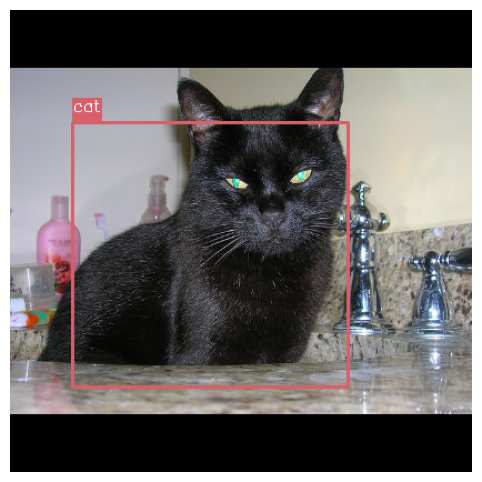

 34%|███▍      | 6002/17432 [2:56:46<22:03:35,  6.95s/it, loss=1.78]

batch_idx: 6001
batch_idx: 6002


 34%|███▍      | 6004/17432 [2:56:46<11:01:51,  3.47s/it, loss=1.78]

batch_idx: 6003
batch_idx: 6004


 34%|███▍      | 6006/17432 [2:56:47<5:37:28,  1.77s/it, loss=1.78] 

batch_idx: 6005
batch_idx: 6006


 34%|███▍      | 6008/17432 [2:56:47<2:59:01,  1.06it/s, loss=1.78]

batch_idx: 6007
batch_idx: 6008


 34%|███▍      | 6010/17432 [2:56:47<1:41:10,  1.88it/s, loss=1.78]

batch_idx: 6009
batch_idx: 6010


 34%|███▍      | 6012/17432 [2:56:47<1:02:02,  3.07it/s, loss=1.78]

batch_idx: 6011
batch_idx: 6012


 34%|███▍      | 6014/17432 [2:56:48<44:27,  4.28it/s, loss=1.78]  

batch_idx: 6013
batch_idx: 6014


 35%|███▍      | 6016/17432 [2:56:48<34:52,  5.45it/s, loss=1.78]

batch_idx: 6015
batch_idx: 6016


 35%|███▍      | 6018/17432 [2:56:53<5:20:04,  1.68s/it, loss=1.78]

batch_idx: 6017
batch_idx: 6018


 35%|███▍      | 6020/17432 [2:56:54<2:49:14,  1.12it/s, loss=1.78]

batch_idx: 6019
batch_idx: 6020


 35%|███▍      | 6022/17432 [2:57:01<8:05:31,  2.55s/it, loss=1.78]

batch_idx: 6021
batch_idx: 6022


 35%|███▍      | 6024/17432 [2:57:01<4:11:09,  1.32s/it, loss=1.78]

batch_idx: 6023
batch_idx: 6024


 35%|███▍      | 6026/17432 [2:57:08<8:43:07,  2.75s/it, loss=1.78]

batch_idx: 6025
batch_idx: 6026


 35%|███▍      | 6028/17432 [2:57:08<4:28:11,  1.41s/it, loss=1.78]

batch_idx: 6027
batch_idx: 6028


 35%|███▍      | 6030/17432 [2:57:15<8:25:30,  2.66s/it, loss=1.78]

batch_idx: 6029
batch_idx: 6030


 35%|███▍      | 6032/17432 [2:57:15<4:21:04,  1.37s/it, loss=1.78]

batch_idx: 6031
batch_idx: 6032


 35%|███▍      | 6034/17432 [2:57:22<8:37:32,  2.72s/it, loss=1.78]

batch_idx: 6033
batch_idx: 6034


 35%|███▍      | 6036/17432 [2:57:22<4:26:07,  1.40s/it, loss=1.78]

batch_idx: 6035
batch_idx: 6036


 35%|███▍      | 6038/17432 [2:57:29<8:31:28,  2.69s/it, loss=1.78]

batch_idx: 6037
batch_idx: 6038


 35%|███▍      | 6040/17432 [2:57:29<4:24:02,  1.39s/it, loss=1.78]

batch_idx: 6039
batch_idx: 6040


 35%|███▍      | 6042/17432 [2:57:36<8:32:19,  2.70s/it, loss=1.78]

batch_idx: 6041
batch_idx: 6042


 35%|███▍      | 6044/17432 [2:57:36<4:24:23,  1.39s/it, loss=1.78]

batch_idx: 6043
batch_idx: 6044


 35%|███▍      | 6046/17432 [2:57:43<8:50:01,  2.79s/it, loss=1.78]

batch_idx: 6045
batch_idx: 6046


 35%|███▍      | 6048/17432 [2:57:44<4:31:49,  1.43s/it, loss=1.78]

batch_idx: 6047
batch_idx: 6048


 35%|███▍      | 6050/17432 [2:57:50<8:11:44,  2.59s/it, loss=1.78]

batch_idx: 6049
batch_idx: 6050


 35%|███▍      | 6052/17432 [2:57:50<4:13:22,  1.34s/it, loss=1.78]

batch_idx: 6051
batch_idx: 6052


 35%|███▍      | 6054/17432 [2:57:57<8:29:40,  2.69s/it, loss=1.78]

batch_idx: 6053
batch_idx: 6054


 35%|███▍      | 6056/17432 [2:57:57<4:22:39,  1.39s/it, loss=1.78]

batch_idx: 6055
batch_idx: 6056


 35%|███▍      | 6058/17432 [2:58:04<8:18:50,  2.63s/it, loss=1.78]

batch_idx: 6057
batch_idx: 6058


 35%|███▍      | 6060/17432 [2:58:04<4:17:18,  1.36s/it, loss=1.78]

batch_idx: 6059
batch_idx: 6060


 35%|███▍      | 6062/17432 [2:58:11<8:42:29,  2.76s/it, loss=1.78]

batch_idx: 6061
batch_idx: 6062


 35%|███▍      | 6064/17432 [2:58:11<4:28:52,  1.42s/it, loss=1.78]

batch_idx: 6063
batch_idx: 6064


 35%|███▍      | 6066/17432 [2:58:18<8:37:38,  2.73s/it, loss=1.78]

batch_idx: 6065
batch_idx: 6066


 35%|███▍      | 6068/17432 [2:58:18<4:25:27,  1.40s/it, loss=1.78]

batch_idx: 6067
batch_idx: 6068


 35%|███▍      | 6070/17432 [2:58:25<8:34:54,  2.72s/it, loss=1.78]

batch_idx: 6069
batch_idx: 6070


 35%|███▍      | 6072/17432 [2:58:26<4:24:37,  1.40s/it, loss=1.78]

batch_idx: 6071
batch_idx: 6072


 35%|███▍      | 6074/17432 [2:58:33<8:44:09,  2.77s/it, loss=1.78]

batch_idx: 6073
batch_idx: 6074


 35%|███▍      | 6076/17432 [2:58:33<4:28:55,  1.42s/it, loss=1.78]

batch_idx: 6075
batch_idx: 6076


 35%|███▍      | 6078/17432 [2:58:40<8:43:00,  2.76s/it, loss=1.78]

batch_idx: 6077
batch_idx: 6078


 35%|███▍      | 6080/17432 [2:58:40<4:29:04,  1.42s/it, loss=1.78]

batch_idx: 6079
batch_idx: 6080


 35%|███▍      | 6082/17432 [2:58:47<8:41:50,  2.76s/it, loss=1.78]

batch_idx: 6081
batch_idx: 6082


 35%|███▍      | 6084/17432 [2:58:47<4:27:58,  1.42s/it, loss=1.78]

batch_idx: 6083
batch_idx: 6084


 35%|███▍      | 6086/17432 [2:58:53<8:07:48,  2.58s/it, loss=1.78]

batch_idx: 6085
batch_idx: 6086


 35%|███▍      | 6088/17432 [2:58:54<4:10:49,  1.33s/it, loss=1.78]

batch_idx: 6087
batch_idx: 6088


 35%|███▍      | 6090/17432 [2:59:00<8:25:15,  2.67s/it, loss=1.78]

batch_idx: 6089
batch_idx: 6090


 35%|███▍      | 6092/17432 [2:59:01<4:19:28,  1.37s/it, loss=1.78]

batch_idx: 6091
batch_idx: 6092


 35%|███▍      | 6094/17432 [2:59:08<8:37:23,  2.74s/it, loss=1.78]

batch_idx: 6093
batch_idx: 6094


 35%|███▍      | 6096/17432 [2:59:08<4:25:17,  1.40s/it, loss=1.78]

batch_idx: 6095
batch_idx: 6096


 35%|███▍      | 6098/17432 [2:59:15<8:34:03,  2.72s/it, loss=1.78]

batch_idx: 6097


 35%|███▍      | 6099/17432 [2:59:15<6:18:47,  2.01s/it, loss=1.78]

batch_idx: 6098
batch_idx: 6099


 35%|███▍      | 6101/17432 [2:59:15<3:18:29,  1.05s/it, loss=1.78]

batch_idx: 6100


 35%|███▌      | 6102/17432 [2:59:22<8:45:10,  2.78s/it, loss=1.78]

batch_idx: 6101
batch_idx: 6102


 35%|███▌      | 6104/17432 [2:59:22<4:31:05,  1.44s/it, loss=1.78]

batch_idx: 6103
batch_idx: 6104


 35%|███▌      | 6106/17432 [2:59:29<8:20:57,  2.65s/it, loss=1.78]

batch_idx: 6105
batch_idx: 6106


 35%|███▌      | 6108/17432 [2:59:29<4:20:13,  1.38s/it, loss=1.78]

batch_idx: 6107
batch_idx: 6108


 35%|███▌      | 6110/17432 [2:59:36<8:05:44,  2.57s/it, loss=1.78]

batch_idx: 6109
batch_idx: 6110


 35%|███▌      | 6112/17432 [2:59:36<4:10:52,  1.33s/it, loss=1.78]

batch_idx: 6111
batch_idx: 6112


 35%|███▌      | 6114/17432 [2:59:43<8:18:19,  2.64s/it, loss=1.78]

batch_idx: 6113
batch_idx: 6114


 35%|███▌      | 6116/17432 [2:59:43<4:16:31,  1.36s/it, loss=1.78]

batch_idx: 6115
batch_idx: 6116


 35%|███▌      | 6118/17432 [2:59:50<8:25:59,  2.68s/it, loss=1.78]

batch_idx: 6117
batch_idx: 6118


 35%|███▌      | 6120/17432 [2:59:50<4:19:40,  1.38s/it, loss=1.78]

batch_idx: 6119
batch_idx: 6120


 35%|███▌      | 6122/17432 [2:59:57<8:23:03,  2.67s/it, loss=1.78]

batch_idx: 6121
batch_idx: 6122


 35%|███▌      | 6124/17432 [2:59:57<4:18:07,  1.37s/it, loss=1.78]

batch_idx: 6123
batch_idx: 6124


 35%|███▌      | 6126/17432 [3:00:03<8:11:49,  2.61s/it, loss=1.78]

batch_idx: 6125
batch_idx: 6126


 35%|███▌      | 6128/17432 [3:00:04<4:12:39,  1.34s/it, loss=1.78]

batch_idx: 6127
batch_idx: 6128


 35%|███▌      | 6130/17432 [3:00:10<8:08:58,  2.60s/it, loss=1.78]

batch_idx: 6129
batch_idx: 6130


 35%|███▌      | 6132/17432 [3:00:10<4:12:31,  1.34s/it, loss=1.78]

batch_idx: 6131
batch_idx: 6132


 35%|███▌      | 6134/17432 [3:00:17<8:46:13,  2.79s/it, loss=1.78]

batch_idx: 6133
batch_idx: 6134


 35%|███▌      | 6136/17432 [3:00:18<4:30:49,  1.44s/it, loss=1.78]

batch_idx: 6135
batch_idx: 6136


 35%|███▌      | 6138/17432 [3:00:25<9:02:13,  2.88s/it, loss=1.78]

batch_idx: 6137
batch_idx: 6138


 35%|███▌      | 6140/17432 [3:00:25<4:39:04,  1.48s/it, loss=1.78]

batch_idx: 6139
batch_idx: 6140


 35%|███▌      | 6142/17432 [3:00:33<9:10:50,  2.93s/it, loss=1.78]

batch_idx: 6141
batch_idx: 6142


 35%|███▌      | 6144/17432 [3:00:33<4:42:34,  1.50s/it, loss=1.78]

batch_idx: 6143
batch_idx: 6144


 35%|███▌      | 6146/17432 [3:00:40<8:42:26,  2.78s/it, loss=1.78]

batch_idx: 6145
batch_idx: 6146


 35%|███▌      | 6148/17432 [3:00:40<4:28:13,  1.43s/it, loss=1.78]

batch_idx: 6147
batch_idx: 6148


 35%|███▌      | 6150/17432 [3:00:47<8:46:59,  2.80s/it, loss=1.78]

batch_idx: 6149
batch_idx: 6150


 35%|███▌      | 6152/17432 [3:00:47<4:30:49,  1.44s/it, loss=1.78]

batch_idx: 6151
batch_idx: 6152


 35%|███▌      | 6154/17432 [3:00:55<9:03:55,  2.89s/it, loss=1.78]

batch_idx: 6153
batch_idx: 6154


 35%|███▌      | 6156/17432 [3:00:55<4:38:58,  1.48s/it, loss=1.78]

batch_idx: 6155
batch_idx: 6156


 35%|███▌      | 6158/17432 [3:01:02<8:37:34,  2.75s/it, loss=1.78]

batch_idx: 6157
batch_idx: 6158


 35%|███▌      | 6160/17432 [3:01:02<4:26:03,  1.42s/it, loss=1.78]

batch_idx: 6159
batch_idx: 6160


 35%|███▌      | 6162/17432 [3:01:09<8:33:53,  2.74s/it, loss=1.78]

batch_idx: 6161
batch_idx: 6162


 35%|███▌      | 6164/17432 [3:01:09<4:24:31,  1.41s/it, loss=1.78]

batch_idx: 6163
batch_idx: 6164


 35%|███▌      | 6166/17432 [3:01:16<9:00:07,  2.88s/it, loss=1.78]

batch_idx: 6165
batch_idx: 6166


 35%|███▌      | 6168/17432 [3:01:17<4:36:49,  1.47s/it, loss=1.78]

batch_idx: 6167
batch_idx: 6168


 35%|███▌      | 6170/17432 [3:01:24<8:51:02,  2.83s/it, loss=1.78]

batch_idx: 6169
batch_idx: 6170


 35%|███▌      | 6172/17432 [3:01:24<4:33:21,  1.46s/it, loss=1.78]

batch_idx: 6171
batch_idx: 6172


 35%|███▌      | 6174/17432 [3:01:31<8:32:20,  2.73s/it, loss=1.78]

batch_idx: 6173
batch_idx: 6174


 35%|███▌      | 6176/17432 [3:01:31<4:24:03,  1.41s/it, loss=1.78]

batch_idx: 6175
batch_idx: 6176


 35%|███▌      | 6178/17432 [3:01:37<8:06:50,  2.60s/it, loss=1.78]

batch_idx: 6177
batch_idx: 6178


 35%|███▌      | 6180/17432 [3:01:38<4:11:00,  1.34s/it, loss=1.78]

batch_idx: 6179
batch_idx: 6180


 35%|███▌      | 6182/17432 [3:01:44<8:01:17,  2.57s/it, loss=1.78]

batch_idx: 6181
batch_idx: 6182


 35%|███▌      | 6184/17432 [3:01:44<4:08:35,  1.33s/it, loss=1.78]

batch_idx: 6183
batch_idx: 6184


 35%|███▌      | 6186/17432 [3:01:52<8:57:46,  2.87s/it, loss=1.78]

batch_idx: 6185
batch_idx: 6186


 35%|███▌      | 6188/17432 [3:01:52<4:35:37,  1.47s/it, loss=1.78]

batch_idx: 6187
batch_idx: 6188


 36%|███▌      | 6190/17432 [3:01:59<8:15:36,  2.65s/it, loss=1.78]

batch_idx: 6189
batch_idx: 6190


 36%|███▌      | 6192/17432 [3:01:59<4:15:31,  1.36s/it, loss=1.78]

batch_idx: 6191
batch_idx: 6192


 36%|███▌      | 6194/17432 [3:02:06<8:43:22,  2.79s/it, loss=1.78]

batch_idx: 6193
batch_idx: 6194


 36%|███▌      | 6196/17432 [3:02:06<4:28:35,  1.43s/it, loss=1.78]

batch_idx: 6195
batch_idx: 6196


 36%|███▌      | 6198/17432 [3:02:13<8:31:59,  2.73s/it, loss=1.78]

batch_idx: 6197
batch_idx: 6198


 36%|███▌      | 6200/17432 [3:02:13<4:23:12,  1.41s/it, loss=1.78]

batch_idx: 6199
batch_idx: 6200


 36%|███▌      | 6200/17432 [3:02:13<4:23:12,  1.41s/it, loss=1.78]

==> Saving checkpoint


 36%|███▌      | 6202/17432 [3:02:23<8:41:59,  2.79s/it, loss=1.78] 

batch_idx: 6201
batch_idx: 6202


 36%|███▌      | 6204/17432 [3:02:23<4:27:20,  1.43s/it, loss=1.78]

batch_idx: 6203
batch_idx: 6204


 36%|███▌      | 6206/17432 [3:02:27<5:34:10,  1.79s/it, loss=1.78]

batch_idx: 6205
batch_idx: 6206


 36%|███▌      | 6208/17432 [3:02:27<2:55:18,  1.07it/s, loss=1.78]

batch_idx: 6207
batch_idx: 6208


 36%|███▌      | 6210/17432 [3:02:34<7:51:03,  2.52s/it, loss=1.78]

batch_idx: 6209
batch_idx: 6210


 36%|███▌      | 6212/17432 [3:02:35<4:03:31,  1.30s/it, loss=1.78]

batch_idx: 6211
batch_idx: 6212


 36%|███▌      | 6214/17432 [3:02:42<8:34:51,  2.75s/it, loss=1.78]

batch_idx: 6213
batch_idx: 6214


 36%|███▌      | 6216/17432 [3:02:42<4:24:40,  1.42s/it, loss=1.78]

batch_idx: 6215
batch_idx: 6216


 36%|███▌      | 6218/17432 [3:02:49<8:53:58,  2.86s/it, loss=1.78]

batch_idx: 6217
batch_idx: 6218


 36%|███▌      | 6220/17432 [3:02:49<4:33:50,  1.47s/it, loss=1.78]

batch_idx: 6219
batch_idx: 6220


 36%|███▌      | 6222/17432 [3:02:57<8:50:49,  2.84s/it, loss=1.78]

batch_idx: 6221
batch_idx: 6222


 36%|███▌      | 6224/17432 [3:02:57<4:32:28,  1.46s/it, loss=1.78]

batch_idx: 6223
batch_idx: 6224


 36%|███▌      | 6226/17432 [3:03:03<8:06:13,  2.60s/it, loss=1.78]

batch_idx: 6225
batch_idx: 6226


 36%|███▌      | 6228/17432 [3:03:03<4:09:48,  1.34s/it, loss=1.78]

batch_idx: 6227
batch_idx: 6228


 36%|███▌      | 6230/17432 [3:03:10<8:30:01,  2.73s/it, loss=1.78]

batch_idx: 6229
batch_idx: 6230


 36%|███▌      | 6232/17432 [3:03:11<4:22:38,  1.41s/it, loss=1.78]

batch_idx: 6231
batch_idx: 6232


 36%|███▌      | 6234/17432 [3:03:17<8:14:48,  2.65s/it, loss=1.78]

batch_idx: 6233
batch_idx: 6234


 36%|███▌      | 6236/17432 [3:03:17<4:14:48,  1.37s/it, loss=1.78]

batch_idx: 6235
batch_idx: 6236


 36%|███▌      | 6238/17432 [3:03:25<8:52:20,  2.85s/it, loss=1.78]

batch_idx: 6237
batch_idx: 6238


 36%|███▌      | 6240/17432 [3:03:25<4:33:00,  1.46s/it, loss=1.78]

batch_idx: 6239
batch_idx: 6240


 36%|███▌      | 6242/17432 [3:03:32<8:48:00,  2.83s/it, loss=1.78]

batch_idx: 6241
batch_idx: 6242


 36%|███▌      | 6244/17432 [3:03:32<4:32:26,  1.46s/it, loss=1.78]

batch_idx: 6243
batch_idx: 6244


 36%|███▌      | 6246/17432 [3:03:39<8:43:29,  2.81s/it, loss=1.78]

batch_idx: 6245
batch_idx: 6246


 36%|███▌      | 6248/17432 [3:03:40<4:29:27,  1.45s/it, loss=1.78]

batch_idx: 6247
batch_idx: 6248


 36%|███▌      | 6250/17432 [3:03:47<8:36:49,  2.77s/it, loss=1.78]

batch_idx: 6249
batch_idx: 6250


 36%|███▌      | 6252/17432 [3:03:47<4:26:21,  1.43s/it, loss=1.78]

batch_idx: 6251
batch_idx: 6252


 36%|███▌      | 6254/17432 [3:03:54<8:33:43,  2.76s/it, loss=1.78]

batch_idx: 6253
batch_idx: 6254


 36%|███▌      | 6256/17432 [3:03:54<4:24:18,  1.42s/it, loss=1.78]

batch_idx: 6255
batch_idx: 6256


 36%|███▌      | 6258/17432 [3:04:01<8:19:39,  2.68s/it, loss=1.78]

batch_idx: 6257
batch_idx: 6258


 36%|███▌      | 6260/17432 [3:04:01<4:17:40,  1.38s/it, loss=1.78]

batch_idx: 6259
batch_idx: 6260


 36%|███▌      | 6262/17432 [3:04:08<8:49:17,  2.84s/it, loss=1.78]

batch_idx: 6261
batch_idx: 6262


 36%|███▌      | 6264/17432 [3:04:08<4:31:27,  1.46s/it, loss=1.78]

batch_idx: 6263
batch_idx: 6264


 36%|███▌      | 6266/17432 [3:04:15<8:24:40,  2.71s/it, loss=1.78]

batch_idx: 6265
batch_idx: 6266


 36%|███▌      | 6268/17432 [3:04:15<4:18:38,  1.39s/it, loss=1.78]

batch_idx: 6267
batch_idx: 6268


 36%|███▌      | 6270/17432 [3:04:23<8:53:23,  2.87s/it, loss=1.78]

batch_idx: 6269
batch_idx: 6270


 36%|███▌      | 6272/17432 [3:04:23<4:33:35,  1.47s/it, loss=1.78]

batch_idx: 6271
batch_idx: 6272


 36%|███▌      | 6274/17432 [3:04:30<8:29:27,  2.74s/it, loss=1.78]

batch_idx: 6273
batch_idx: 6274


 36%|███▌      | 6276/17432 [3:04:30<4:21:53,  1.41s/it, loss=1.78]

batch_idx: 6275
batch_idx: 6276


 36%|███▌      | 6278/17432 [3:04:37<8:27:51,  2.73s/it, loss=1.78]

batch_idx: 6277
batch_idx: 6278


 36%|███▌      | 6280/17432 [3:04:37<4:21:11,  1.41s/it, loss=1.78]

batch_idx: 6279
batch_idx: 6280


 36%|███▌      | 6282/17432 [3:04:44<8:25:33,  2.72s/it, loss=1.78]

batch_idx: 6281
batch_idx: 6282


 36%|███▌      | 6284/17432 [3:04:44<4:20:22,  1.40s/it, loss=1.78]

batch_idx: 6283
batch_idx: 6284


 36%|███▌      | 6286/17432 [3:04:51<8:16:59,  2.68s/it, loss=1.78]

batch_idx: 6285
batch_idx: 6286


 36%|███▌      | 6288/17432 [3:04:51<4:14:59,  1.37s/it, loss=1.78]

batch_idx: 6287
batch_idx: 6288


 36%|███▌      | 6290/17432 [3:04:59<9:11:32,  2.97s/it, loss=1.78]

batch_idx: 6289
batch_idx: 6290


 36%|███▌      | 6292/17432 [3:04:59<4:42:47,  1.52s/it, loss=1.78]

batch_idx: 6291
batch_idx: 6292


 36%|███▌      | 6294/17432 [3:05:06<8:35:00,  2.77s/it, loss=1.78]

batch_idx: 6293
batch_idx: 6294


 36%|███▌      | 6296/17432 [3:05:06<4:24:57,  1.43s/it, loss=1.78]

batch_idx: 6295
batch_idx: 6296


 36%|███▌      | 6298/17432 [3:05:13<8:38:31,  2.79s/it, loss=1.78]

batch_idx: 6297
batch_idx: 6298


 36%|███▌      | 6300/17432 [3:05:13<4:26:23,  1.44s/it, loss=1.78]

batch_idx: 6299
batch_idx: 6300


 36%|███▌      | 6302/17432 [3:05:20<8:30:33,  2.75s/it, loss=1.78]

batch_idx: 6301
batch_idx: 6302


 36%|███▌      | 6304/17432 [3:05:21<4:22:45,  1.42s/it, loss=1.78]

batch_idx: 6303
batch_idx: 6304


 36%|███▌      | 6306/17432 [3:05:28<8:57:35,  2.90s/it, loss=1.78]

batch_idx: 6305
batch_idx: 6306


 36%|███▌      | 6308/17432 [3:05:28<4:35:14,  1.48s/it, loss=1.78]

batch_idx: 6307
batch_idx: 6308


 36%|███▌      | 6310/17432 [3:05:35<8:21:43,  2.71s/it, loss=1.78]

batch_idx: 6309
batch_idx: 6310


 36%|███▌      | 6312/17432 [3:05:35<4:18:04,  1.39s/it, loss=1.78]

batch_idx: 6311
batch_idx: 6312


 36%|███▌      | 6314/17432 [3:05:42<8:36:49,  2.79s/it, loss=1.78]

batch_idx: 6313
batch_idx: 6314


 36%|███▌      | 6316/17432 [3:05:42<4:25:39,  1.43s/it, loss=1.78]

batch_idx: 6315
batch_idx: 6316


 36%|███▌      | 6318/17432 [3:05:50<8:41:34,  2.82s/it, loss=1.78]

batch_idx: 6317
batch_idx: 6318


 36%|███▋      | 6320/17432 [3:05:50<4:27:45,  1.45s/it, loss=1.78]

batch_idx: 6319
batch_idx: 6320


 36%|███▋      | 6322/17432 [3:05:57<8:45:54,  2.84s/it, loss=1.78]

batch_idx: 6321
batch_idx: 6322


 36%|███▋      | 6324/17432 [3:05:57<4:29:53,  1.46s/it, loss=1.78]

batch_idx: 6323
batch_idx: 6324


 36%|███▋      | 6326/17432 [3:06:04<8:14:51,  2.67s/it, loss=1.78]

batch_idx: 6325
batch_idx: 6326


 36%|███▋      | 6328/17432 [3:06:04<4:14:08,  1.37s/it, loss=1.78]

batch_idx: 6327
batch_idx: 6328


 36%|███▋      | 6330/17432 [3:06:11<8:30:50,  2.76s/it, loss=1.78]

batch_idx: 6329
batch_idx: 6330


 36%|███▋      | 6332/17432 [3:06:11<4:22:51,  1.42s/it, loss=1.78]

batch_idx: 6331
batch_idx: 6332


 36%|███▋      | 6334/17432 [3:06:18<8:32:17,  2.77s/it, loss=1.78]

batch_idx: 6333
batch_idx: 6334


 36%|███▋      | 6336/17432 [3:06:18<4:23:20,  1.42s/it, loss=1.78]

batch_idx: 6335
batch_idx: 6336


 36%|███▋      | 6338/17432 [3:06:28<10:51:49,  3.53s/it, loss=1.78]

batch_idx: 6337
batch_idx: 6338


 36%|███▋      | 6340/17432 [3:06:28<5:31:36,  1.79s/it, loss=1.78] 

batch_idx: 6339
batch_idx: 6340


 36%|███▋      | 6342/17432 [3:06:42<15:28:23,  5.02s/it, loss=1.78]

batch_idx: 6341
batch_idx: 6342


 36%|███▋      | 6344/17432 [3:06:42<7:46:37,  2.53s/it, loss=1.78] 

batch_idx: 6343
batch_idx: 6344


 36%|███▋      | 6346/17432 [3:06:49<10:19:14,  3.35s/it, loss=1.78]

batch_idx: 6345
batch_idx: 6346


 36%|███▋      | 6348/17432 [3:06:50<5:15:20,  1.71s/it, loss=1.78] 

batch_idx: 6347
batch_idx: 6348


 36%|███▋      | 6350/17432 [3:06:56<8:48:50,  2.86s/it, loss=1.78]

batch_idx: 6349
batch_idx: 6350


 36%|███▋      | 6352/17432 [3:06:57<4:32:03,  1.47s/it, loss=1.78]

batch_idx: 6351
batch_idx: 6352


 36%|███▋      | 6354/17432 [3:07:04<8:39:47,  2.82s/it, loss=1.78]

batch_idx: 6353
batch_idx: 6354


 36%|███▋      | 6356/17432 [3:07:04<4:27:23,  1.45s/it, loss=1.78]

batch_idx: 6355
batch_idx: 6356


 36%|███▋      | 6358/17432 [3:07:10<8:02:19,  2.61s/it, loss=1.78]

batch_idx: 6357
batch_idx: 6358


 36%|███▋      | 6360/17432 [3:07:11<4:08:49,  1.35s/it, loss=1.78]

batch_idx: 6359
batch_idx: 6360


 36%|███▋      | 6362/17432 [3:07:17<8:12:46,  2.67s/it, loss=1.78]

batch_idx: 6361
batch_idx: 6362


 37%|███▋      | 6364/17432 [3:07:18<4:12:56,  1.37s/it, loss=1.78]

batch_idx: 6363
batch_idx: 6364


 37%|███▋      | 6366/17432 [3:07:24<7:54:07,  2.57s/it, loss=1.78]

batch_idx: 6365
batch_idx: 6366


 37%|███▋      | 6368/17432 [3:07:24<4:04:31,  1.33s/it, loss=1.78]

batch_idx: 6367
batch_idx: 6368


 37%|███▋      | 6370/17432 [3:07:31<7:59:48,  2.60s/it, loss=1.78]

batch_idx: 6369
batch_idx: 6370


 37%|███▋      | 6372/17432 [3:07:31<4:07:24,  1.34s/it, loss=1.78]

batch_idx: 6371
batch_idx: 6372


 37%|███▋      | 6374/17432 [3:07:38<8:00:48,  2.61s/it, loss=1.78]

batch_idx: 6373
batch_idx: 6374


 37%|███▋      | 6376/17432 [3:07:38<4:07:47,  1.34s/it, loss=1.78]

batch_idx: 6375
batch_idx: 6376


 37%|███▋      | 6378/17432 [3:07:45<8:35:33,  2.80s/it, loss=1.78]

batch_idx: 6377
batch_idx: 6378


 37%|███▋      | 6380/17432 [3:07:45<4:25:37,  1.44s/it, loss=1.78]

batch_idx: 6379
batch_idx: 6380


 37%|███▋      | 6382/17432 [3:07:52<8:36:06,  2.80s/it, loss=1.78]

batch_idx: 6381
batch_idx: 6382


 37%|███▋      | 6384/17432 [3:07:53<4:24:40,  1.44s/it, loss=1.78]

batch_idx: 6383
batch_idx: 6384


 37%|███▋      | 6386/17432 [3:07:59<8:18:49,  2.71s/it, loss=1.78]

batch_idx: 6385
batch_idx: 6386


 37%|███▋      | 6388/17432 [3:08:00<4:16:45,  1.39s/it, loss=1.78]

batch_idx: 6387
batch_idx: 6388


 37%|███▋      | 6390/17432 [3:08:06<7:57:15,  2.59s/it, loss=1.78]

batch_idx: 6389
batch_idx: 6390


 37%|███▋      | 6392/17432 [3:08:06<4:06:03,  1.34s/it, loss=1.78]

batch_idx: 6391
batch_idx: 6392


 37%|███▋      | 6394/17432 [3:08:13<8:12:59,  2.68s/it, loss=1.78]

batch_idx: 6393
batch_idx: 6394


 37%|███▋      | 6396/17432 [3:08:13<4:13:57,  1.38s/it, loss=1.78]

batch_idx: 6395
batch_idx: 6396


 37%|███▋      | 6398/17432 [3:08:20<7:57:15,  2.60s/it, loss=1.78]

batch_idx: 6397
batch_idx: 6398


 37%|███▋      | 6400/17432 [3:08:20<4:06:18,  1.34s/it, loss=1.78]

batch_idx: 6399
batch_idx: 6400


 37%|███▋      | 6400/17432 [3:08:20<4:06:18,  1.34s/it, loss=1.78]

==> Saving checkpoint


 37%|███▋      | 6402/17432 [3:08:31<8:55:13,  2.91s/it, loss=1.78] 

batch_idx: 6401
batch_idx: 6402


 37%|███▋      | 6404/17432 [3:08:31<4:33:33,  1.49s/it, loss=1.78]

batch_idx: 6403
batch_idx: 6404


 37%|███▋      | 6406/17432 [3:08:34<5:22:24,  1.75s/it, loss=1.78]

batch_idx: 6405
batch_idx: 6406


 37%|███▋      | 6408/17432 [3:08:35<2:49:47,  1.08it/s, loss=1.78]

batch_idx: 6407
batch_idx: 6408


 37%|███▋      | 6410/17432 [3:08:42<7:51:16,  2.57s/it, loss=1.78]

batch_idx: 6409
batch_idx: 6410


 37%|███▋      | 6412/17432 [3:08:42<4:03:36,  1.33s/it, loss=1.78]

batch_idx: 6411
batch_idx: 6412


 37%|███▋      | 6414/17432 [3:08:49<8:12:27,  2.68s/it, loss=1.78]

batch_idx: 6413
batch_idx: 6414


 37%|███▋      | 6416/17432 [3:08:49<4:14:49,  1.39s/it, loss=1.78]

batch_idx: 6415
batch_idx: 6416


 37%|███▋      | 6418/17432 [3:08:56<8:32:04,  2.79s/it, loss=1.78]

batch_idx: 6417
batch_idx: 6418


 37%|███▋      | 6420/17432 [3:08:56<4:23:28,  1.44s/it, loss=1.78]

batch_idx: 6419
batch_idx: 6420


 37%|███▋      | 6422/17432 [3:09:03<8:25:10,  2.75s/it, loss=1.78]

batch_idx: 6421
batch_idx: 6422


 37%|███▋      | 6424/17432 [3:09:04<4:19:45,  1.42s/it, loss=1.78]

batch_idx: 6423
batch_idx: 6424


 37%|███▋      | 6426/17432 [3:09:10<8:15:22,  2.70s/it, loss=1.78]

batch_idx: 6425
batch_idx: 6426


 37%|███▋      | 6428/17432 [3:09:11<4:14:20,  1.39s/it, loss=1.78]

batch_idx: 6427
batch_idx: 6428


 37%|███▋      | 6430/17432 [3:09:17<8:05:59,  2.65s/it, loss=1.78]

batch_idx: 6429
batch_idx: 6430


 37%|███▋      | 6432/17432 [3:09:17<4:10:32,  1.37s/it, loss=1.78]

batch_idx: 6431
batch_idx: 6432


 37%|███▋      | 6434/17432 [3:09:24<8:01:33,  2.63s/it, loss=1.78]

batch_idx: 6433
batch_idx: 6434


 37%|███▋      | 6436/17432 [3:09:24<4:08:54,  1.36s/it, loss=1.78]

batch_idx: 6435
batch_idx: 6436


 37%|███▋      | 6438/17432 [3:09:31<8:16:52,  2.71s/it, loss=1.78]

batch_idx: 6437
batch_idx: 6438


 37%|███▋      | 6440/17432 [3:09:31<4:15:39,  1.40s/it, loss=1.78]

batch_idx: 6439
batch_idx: 6440


 37%|███▋      | 6442/17432 [3:09:38<8:25:02,  2.76s/it, loss=1.78]

batch_idx: 6441
batch_idx: 6442


 37%|███▋      | 6444/17432 [3:09:39<4:19:57,  1.42s/it, loss=1.78]

batch_idx: 6443
batch_idx: 6444


 37%|███▋      | 6446/17432 [3:09:46<8:56:56,  2.93s/it, loss=1.78]

batch_idx: 6445
batch_idx: 6446


 37%|███▋      | 6448/17432 [3:09:46<4:34:28,  1.50s/it, loss=1.78]

batch_idx: 6447
batch_idx: 6448


 37%|███▋      | 6450/17432 [3:09:53<8:12:07,  2.69s/it, loss=1.78]

batch_idx: 6449
batch_idx: 6450


 37%|███▋      | 6452/17432 [3:09:53<4:13:17,  1.38s/it, loss=1.78]

batch_idx: 6451
batch_idx: 6452


 37%|███▋      | 6454/17432 [3:10:00<8:15:33,  2.71s/it, loss=1.78]

batch_idx: 6453
batch_idx: 6454


 37%|███▋      | 6456/17432 [3:10:00<4:15:27,  1.40s/it, loss=1.78]

batch_idx: 6455
batch_idx: 6456


 37%|███▋      | 6458/17432 [3:10:07<8:06:59,  2.66s/it, loss=1.78]

batch_idx: 6457
batch_idx: 6458


 37%|███▋      | 6460/17432 [3:10:07<4:10:53,  1.37s/it, loss=1.78]

batch_idx: 6459
batch_idx: 6460


 37%|███▋      | 6462/17432 [3:10:14<8:01:10,  2.63s/it, loss=1.78]

batch_idx: 6461
batch_idx: 6462


 37%|███▋      | 6464/17432 [3:10:14<4:08:03,  1.36s/it, loss=1.78]

batch_idx: 6463
batch_idx: 6464


 37%|███▋      | 6466/17432 [3:10:21<7:57:29,  2.61s/it, loss=1.78]

batch_idx: 6465
batch_idx: 6466


 37%|███▋      | 6468/17432 [3:10:21<4:05:47,  1.35s/it, loss=1.78]

batch_idx: 6467
batch_idx: 6468


 37%|███▋      | 6470/17432 [3:10:28<8:24:18,  2.76s/it, loss=1.78]

batch_idx: 6469
batch_idx: 6470


 37%|███▋      | 6472/17432 [3:10:28<4:19:08,  1.42s/it, loss=1.78]

batch_idx: 6471
batch_idx: 6472


 37%|███▋      | 6474/17432 [3:10:35<8:11:40,  2.69s/it, loss=1.78]

batch_idx: 6473
batch_idx: 6474


 37%|███▋      | 6476/17432 [3:10:35<4:13:37,  1.39s/it, loss=1.78]

batch_idx: 6475
batch_idx: 6476


 37%|███▋      | 6478/17432 [3:10:42<8:03:51,  2.65s/it, loss=1.78]

batch_idx: 6477
batch_idx: 6478


 37%|███▋      | 6480/17432 [3:10:42<4:09:33,  1.37s/it, loss=1.78]

batch_idx: 6479
batch_idx: 6480


 37%|███▋      | 6482/17432 [3:10:49<8:30:16,  2.80s/it, loss=1.78]

batch_idx: 6481
batch_idx: 6482


 37%|███▋      | 6484/17432 [3:10:49<4:22:05,  1.44s/it, loss=1.78]

batch_idx: 6483
batch_idx: 6484


 37%|███▋      | 6486/17432 [3:10:56<8:18:50,  2.73s/it, loss=1.78]

batch_idx: 6485
batch_idx: 6486


 37%|███▋      | 6488/17432 [3:10:56<4:15:51,  1.40s/it, loss=1.78]

batch_idx: 6487
batch_idx: 6488


 37%|███▋      | 6490/17432 [3:11:04<8:56:16,  2.94s/it, loss=1.78]

batch_idx: 6489
batch_idx: 6490


 37%|███▋      | 6492/17432 [3:11:04<4:35:25,  1.51s/it, loss=1.78]

batch_idx: 6491
batch_idx: 6492


 37%|███▋      | 6494/17432 [3:11:11<8:42:17,  2.87s/it, loss=1.78]

batch_idx: 6493
batch_idx: 6494


 37%|███▋      | 6496/17432 [3:11:12<4:27:37,  1.47s/it, loss=1.78]

batch_idx: 6495
batch_idx: 6496


 37%|███▋      | 6498/17432 [3:11:18<7:56:47,  2.62s/it, loss=1.78]

batch_idx: 6497
batch_idx: 6498


 37%|███▋      | 6500/17432 [3:11:18<4:06:09,  1.35s/it, loss=1.78]

batch_idx: 6499
batch_idx: 6500


 37%|███▋      | 6502/17432 [3:11:24<7:35:30,  2.50s/it, loss=1.78]

batch_idx: 6501
batch_idx: 6502


 37%|███▋      | 6504/17432 [3:11:25<3:54:47,  1.29s/it, loss=1.78]

batch_idx: 6503
batch_idx: 6504


 37%|███▋      | 6506/17432 [3:11:32<8:11:39,  2.70s/it, loss=1.78]

batch_idx: 6505
batch_idx: 6506


 37%|███▋      | 6508/17432 [3:11:32<4:12:11,  1.39s/it, loss=1.78]

batch_idx: 6507
batch_idx: 6508


 37%|███▋      | 6510/17432 [3:11:39<8:19:23,  2.74s/it, loss=1.78]

batch_idx: 6509
batch_idx: 6510


 37%|███▋      | 6512/17432 [3:11:39<4:15:56,  1.41s/it, loss=1.78]

batch_idx: 6511
batch_idx: 6512


 37%|███▋      | 6514/17432 [3:11:46<8:17:17,  2.73s/it, loss=1.78]

batch_idx: 6513
batch_idx: 6514


 37%|███▋      | 6516/17432 [3:11:46<4:14:57,  1.40s/it, loss=1.78]

batch_idx: 6515
batch_idx: 6516


 37%|███▋      | 6518/17432 [3:11:53<8:20:13,  2.75s/it, loss=1.78]

batch_idx: 6517
batch_idx: 6518


 37%|███▋      | 6520/17432 [3:11:53<4:16:22,  1.41s/it, loss=1.78]

batch_idx: 6519
batch_idx: 6520


 37%|███▋      | 6522/17432 [3:12:00<8:10:21,  2.70s/it, loss=1.78]

batch_idx: 6521
batch_idx: 6522


 37%|███▋      | 6524/17432 [3:12:00<4:12:42,  1.39s/it, loss=1.78]

batch_idx: 6523
batch_idx: 6524


 37%|███▋      | 6526/17432 [3:12:07<7:58:41,  2.63s/it, loss=1.78]

batch_idx: 6525
batch_idx: 6526


 37%|███▋      | 6528/17432 [3:12:07<4:06:43,  1.36s/it, loss=1.78]

batch_idx: 6527
batch_idx: 6528


 37%|███▋      | 6530/17432 [3:12:14<8:16:40,  2.73s/it, loss=1.78]

batch_idx: 6529
batch_idx: 6530


 37%|███▋      | 6532/17432 [3:12:14<4:15:21,  1.41s/it, loss=1.78]

batch_idx: 6531
batch_idx: 6532


 37%|███▋      | 6534/17432 [3:12:21<8:07:51,  2.69s/it, loss=1.78]

batch_idx: 6533
batch_idx: 6534


 37%|███▋      | 6536/17432 [3:12:21<4:10:21,  1.38s/it, loss=1.78]

batch_idx: 6535
batch_idx: 6536


 38%|███▊      | 6538/17432 [3:12:28<7:51:56,  2.60s/it, loss=1.78]

batch_idx: 6537
batch_idx: 6538


 38%|███▊      | 6540/17432 [3:12:28<4:02:29,  1.34s/it, loss=1.78]

batch_idx: 6539
batch_idx: 6540


 38%|███▊      | 6542/17432 [3:12:34<7:50:02,  2.59s/it, loss=1.78]

batch_idx: 6541
batch_idx: 6542


 38%|███▊      | 6544/17432 [3:12:35<4:01:54,  1.33s/it, loss=1.78]

batch_idx: 6543
batch_idx: 6544


 38%|███▊      | 6546/17432 [3:12:42<8:17:00,  2.74s/it, loss=1.78]

batch_idx: 6545
batch_idx: 6546


 38%|███▊      | 6548/17432 [3:12:42<4:15:44,  1.41s/it, loss=1.78]

batch_idx: 6547
batch_idx: 6548


 38%|███▊      | 6550/17432 [3:12:49<8:24:27,  2.78s/it, loss=1.78]

batch_idx: 6549
batch_idx: 6550


 38%|███▊      | 6552/17432 [3:12:49<4:19:29,  1.43s/it, loss=1.78]

batch_idx: 6551
batch_idx: 6552


 38%|███▊      | 6554/17432 [3:12:56<8:02:54,  2.66s/it, loss=1.78]

batch_idx: 6553
batch_idx: 6554


 38%|███▊      | 6556/17432 [3:12:56<4:08:48,  1.37s/it, loss=1.78]

batch_idx: 6555
batch_idx: 6556


 38%|███▊      | 6558/17432 [3:13:03<7:55:51,  2.63s/it, loss=1.78]

batch_idx: 6557
batch_idx: 6558


 38%|███▊      | 6560/17432 [3:13:03<4:04:34,  1.35s/it, loss=1.78]

batch_idx: 6559
batch_idx: 6560


 38%|███▊      | 6562/17432 [3:13:10<8:24:49,  2.79s/it, loss=1.78]

batch_idx: 6561
batch_idx: 6562


 38%|███▊      | 6564/17432 [3:13:10<4:19:31,  1.43s/it, loss=1.78]

batch_idx: 6563
batch_idx: 6564


 38%|███▊      | 6566/17432 [3:13:16<7:48:26,  2.59s/it, loss=1.78]

batch_idx: 6565
batch_idx: 6566


 38%|███▊      | 6568/17432 [3:13:17<4:01:03,  1.33s/it, loss=1.77]

batch_idx: 6567
batch_idx: 6568


 38%|███▊      | 6570/17432 [3:13:24<8:10:20,  2.71s/it, loss=1.77]

batch_idx: 6569
batch_idx: 6570


 38%|███▊      | 6572/17432 [3:13:24<4:12:08,  1.39s/it, loss=1.77]

batch_idx: 6571
batch_idx: 6572


 38%|███▊      | 6574/17432 [3:13:31<8:09:17,  2.70s/it, loss=1.77]

batch_idx: 6573
batch_idx: 6574


 38%|███▊      | 6576/17432 [3:13:31<4:11:49,  1.39s/it, loss=1.77]

batch_idx: 6575
batch_idx: 6576


 38%|███▊      | 6578/17432 [3:13:38<8:24:05,  2.79s/it, loss=1.78]

batch_idx: 6577
batch_idx: 6578


 38%|███▊      | 6580/17432 [3:13:38<4:18:55,  1.43s/it, loss=1.77]

batch_idx: 6579
batch_idx: 6580


 38%|███▊      | 6582/17432 [3:13:44<7:36:55,  2.53s/it, loss=1.78]

batch_idx: 6581
batch_idx: 6582


 38%|███▊      | 6584/17432 [3:13:45<3:56:00,  1.31s/it, loss=1.78]

batch_idx: 6583
batch_idx: 6584


 38%|███▊      | 6586/17432 [3:13:52<8:14:14,  2.73s/it, loss=1.78]

batch_idx: 6585
batch_idx: 6586


 38%|███▊      | 6588/17432 [3:13:52<4:13:36,  1.40s/it, loss=1.78]

batch_idx: 6587
batch_idx: 6588


 38%|███▊      | 6590/17432 [3:13:59<8:42:09,  2.89s/it, loss=1.78]

batch_idx: 6589
batch_idx: 6590


 38%|███▊      | 6592/17432 [3:14:00<4:28:09,  1.48s/it, loss=1.78]

batch_idx: 6591
batch_idx: 6592


 38%|███▊      | 6594/17432 [3:14:06<8:16:54,  2.75s/it, loss=1.77]

batch_idx: 6593
batch_idx: 6594


 38%|███▊      | 6596/17432 [3:14:07<4:15:24,  1.41s/it, loss=1.77]

batch_idx: 6595
batch_idx: 6596


 38%|███▊      | 6598/17432 [3:14:13<7:47:52,  2.59s/it, loss=1.77]

batch_idx: 6597
batch_idx: 6598


 38%|███▊      | 6600/17432 [3:14:13<4:01:34,  1.34s/it, loss=1.77]

batch_idx: 6599
batch_idx: 6600


 38%|███▊      | 6600/17432 [3:14:13<4:01:34,  1.34s/it, loss=1.77]

==> Saving checkpoint


 38%|███▊      | 6602/17432 [3:14:24<8:58:23,  2.98s/it, loss=1.77] 

batch_idx: 6601
batch_idx: 6602


 38%|███▊      | 6604/17432 [3:14:24<4:35:29,  1.53s/it, loss=1.77]

batch_idx: 6603
batch_idx: 6604


 38%|███▊      | 6606/17432 [3:14:27<4:35:04,  1.52s/it, loss=1.77]

batch_idx: 6605
batch_idx: 6606


 38%|███▊      | 6608/17432 [3:14:27<2:27:01,  1.23it/s, loss=1.77]

batch_idx: 6607
batch_idx: 6608


 38%|███▊      | 6610/17432 [3:14:34<7:07:15,  2.37s/it, loss=1.77]

batch_idx: 6609
batch_idx: 6610


 38%|███▊      | 6612/17432 [3:14:34<3:40:40,  1.22s/it, loss=1.77]

batch_idx: 6611
batch_idx: 6612


 38%|███▊      | 6614/17432 [3:14:41<7:53:51,  2.63s/it, loss=1.77]

batch_idx: 6613
batch_idx: 6614


 38%|███▊      | 6616/17432 [3:14:41<4:04:19,  1.36s/it, loss=1.77]

batch_idx: 6615
batch_idx: 6616


 38%|███▊      | 6618/17432 [3:14:48<8:20:51,  2.78s/it, loss=1.77]

batch_idx: 6617
batch_idx: 6618


 38%|███▊      | 6620/17432 [3:14:49<4:17:13,  1.43s/it, loss=1.77]

batch_idx: 6619
batch_idx: 6620


 38%|███▊      | 6622/17432 [3:14:56<8:37:14,  2.87s/it, loss=1.78]

batch_idx: 6621
batch_idx: 6622


 38%|███▊      | 6624/17432 [3:14:56<4:25:40,  1.47s/it, loss=1.78]

batch_idx: 6623
batch_idx: 6624


 38%|███▊      | 6626/17432 [3:15:03<8:30:55,  2.84s/it, loss=1.77]

batch_idx: 6625
batch_idx: 6626


 38%|███▊      | 6628/17432 [3:15:04<4:22:50,  1.46s/it, loss=1.78]

batch_idx: 6627
batch_idx: 6628


 38%|███▊      | 6630/17432 [3:15:10<8:13:38,  2.74s/it, loss=1.78]

batch_idx: 6629
batch_idx: 6630


 38%|███▊      | 6632/17432 [3:15:11<4:13:45,  1.41s/it, loss=1.78]

batch_idx: 6631
batch_idx: 6632


 38%|███▊      | 6634/17432 [3:15:18<8:33:38,  2.85s/it, loss=1.78]

batch_idx: 6633
batch_idx: 6634


 38%|███▊      | 6636/17432 [3:15:18<4:23:01,  1.46s/it, loss=1.78]

batch_idx: 6635
batch_idx: 6636


 38%|███▊      | 6638/17432 [3:15:25<8:13:48,  2.74s/it, loss=1.78]

batch_idx: 6637
batch_idx: 6638


 38%|███▊      | 6640/17432 [3:15:25<4:14:05,  1.41s/it, loss=1.78]

batch_idx: 6639
batch_idx: 6640


 38%|███▊      | 6642/17432 [3:15:32<8:25:19,  2.81s/it, loss=1.78]

batch_idx: 6641
batch_idx: 6642


 38%|███▊      | 6644/17432 [3:15:33<4:19:24,  1.44s/it, loss=1.78]

batch_idx: 6643
batch_idx: 6644


 38%|███▊      | 6646/17432 [3:15:39<7:59:00,  2.66s/it, loss=1.78]

batch_idx: 6645
batch_idx: 6646


 38%|███▊      | 6648/17432 [3:15:39<4:06:29,  1.37s/it, loss=1.78]

batch_idx: 6647
batch_idx: 6648


 38%|███▊      | 6650/17432 [3:15:46<8:04:03,  2.69s/it, loss=1.78]

batch_idx: 6649
batch_idx: 6650


 38%|███▊      | 6652/17432 [3:15:46<4:09:19,  1.39s/it, loss=1.78]

batch_idx: 6651
batch_idx: 6652


 38%|███▊      | 6654/17432 [3:15:53<8:05:27,  2.70s/it, loss=1.78]

batch_idx: 6653
batch_idx: 6654


 38%|███▊      | 6656/17432 [3:15:53<4:09:58,  1.39s/it, loss=1.78]

batch_idx: 6655
batch_idx: 6656


 38%|███▊      | 6658/17432 [3:16:00<7:58:21,  2.66s/it, loss=1.78]

batch_idx: 6657
batch_idx: 6658


 38%|███▊      | 6660/17432 [3:16:00<4:05:55,  1.37s/it, loss=1.78]

batch_idx: 6659
batch_idx: 6660


 38%|███▊      | 6662/17432 [3:16:08<8:33:27,  2.86s/it, loss=1.78]

batch_idx: 6661
batch_idx: 6662


 38%|███▊      | 6664/17432 [3:16:08<4:23:21,  1.47s/it, loss=1.78]

batch_idx: 6663
batch_idx: 6664


 38%|███▊      | 6666/17432 [3:16:15<8:16:53,  2.77s/it, loss=1.78]

batch_idx: 6665
batch_idx: 6666


 38%|███▊      | 6668/17432 [3:16:15<4:15:45,  1.43s/it, loss=1.78]

batch_idx: 6667
batch_idx: 6668


 38%|███▊      | 6670/17432 [3:16:22<8:10:05,  2.73s/it, loss=1.78]

batch_idx: 6669
batch_idx: 6670


 38%|███▊      | 6672/17432 [3:16:22<4:12:10,  1.41s/it, loss=1.78]

batch_idx: 6671
batch_idx: 6672


 38%|███▊      | 6674/17432 [3:16:29<8:27:37,  2.83s/it, loss=1.78]

batch_idx: 6673
batch_idx: 6674


 38%|███▊      | 6676/17432 [3:16:30<4:20:56,  1.46s/it, loss=1.78]

batch_idx: 6675
batch_idx: 6676


 38%|███▊      | 6678/17432 [3:16:36<8:07:50,  2.72s/it, loss=1.78]

batch_idx: 6677
batch_idx: 6678


 38%|███▊      | 6680/17432 [3:16:37<4:10:28,  1.40s/it, loss=1.78]

batch_idx: 6679
batch_idx: 6680


 38%|███▊      | 6682/17432 [3:16:43<7:53:38,  2.64s/it, loss=1.78]

batch_idx: 6681
batch_idx: 6682


 38%|███▊      | 6684/17432 [3:16:43<4:03:58,  1.36s/it, loss=1.78]

batch_idx: 6683
batch_idx: 6684


 38%|███▊      | 6686/17432 [3:16:50<8:04:55,  2.71s/it, loss=1.78]

batch_idx: 6685
batch_idx: 6686


 38%|███▊      | 6688/17432 [3:16:51<4:09:46,  1.39s/it, loss=1.78]

batch_idx: 6687
batch_idx: 6688


 38%|███▊      | 6690/17432 [3:16:57<7:50:18,  2.63s/it, loss=1.78]

batch_idx: 6689
batch_idx: 6690


 38%|███▊      | 6692/17432 [3:16:57<4:02:35,  1.36s/it, loss=1.78]

batch_idx: 6691
batch_idx: 6692


 38%|███▊      | 6694/17432 [3:17:04<7:55:33,  2.66s/it, loss=1.77]

batch_idx: 6693
batch_idx: 6694


 38%|███▊      | 6696/17432 [3:17:04<4:04:44,  1.37s/it, loss=1.77]

batch_idx: 6695
batch_idx: 6696


 38%|███▊      | 6698/17432 [3:17:11<7:38:19,  2.56s/it, loss=1.77]

batch_idx: 6697
batch_idx: 6698


 38%|███▊      | 6700/17432 [3:17:11<3:56:15,  1.32s/it, loss=1.77]

batch_idx: 6699
batch_idx: 6700


 38%|███▊      | 6702/17432 [3:17:18<8:02:39,  2.70s/it, loss=1.77]

batch_idx: 6701
batch_idx: 6702


 38%|███▊      | 6704/17432 [3:17:18<4:07:40,  1.39s/it, loss=1.77]

batch_idx: 6703
batch_idx: 6704


 38%|███▊      | 6706/17432 [3:17:25<8:19:52,  2.80s/it, loss=1.77]

batch_idx: 6705
batch_idx: 6706


 38%|███▊      | 6708/17432 [3:17:25<4:16:30,  1.44s/it, loss=1.77]

batch_idx: 6707
batch_idx: 6708


 38%|███▊      | 6710/17432 [3:17:32<8:14:22,  2.77s/it, loss=1.77]

batch_idx: 6709
batch_idx: 6710


 39%|███▊      | 6712/17432 [3:17:32<4:14:04,  1.42s/it, loss=1.77]

batch_idx: 6711
batch_idx: 6712


 39%|███▊      | 6714/17432 [3:17:42<10:08:42,  3.41s/it, loss=1.77]

batch_idx: 6713
batch_idx: 6714


 39%|███▊      | 6716/17432 [3:17:42<5:10:28,  1.74s/it, loss=1.77] 

batch_idx: 6715
batch_idx: 6716


 39%|███▊      | 6718/17432 [3:17:49<9:15:02,  3.11s/it, loss=1.77]

batch_idx: 6717
batch_idx: 6718


 39%|███▊      | 6720/17432 [3:17:50<4:43:59,  1.59s/it, loss=1.77]

batch_idx: 6719
batch_idx: 6720


 39%|███▊      | 6722/17432 [3:17:57<8:32:57,  2.87s/it, loss=1.77]

batch_idx: 6721
batch_idx: 6722


 39%|███▊      | 6724/17432 [3:17:57<4:22:30,  1.47s/it, loss=1.77]

batch_idx: 6723
batch_idx: 6724


 39%|███▊      | 6726/17432 [3:18:03<7:47:15,  2.62s/it, loss=1.77]

batch_idx: 6725
batch_idx: 6726


 39%|███▊      | 6728/17432 [3:18:04<4:00:56,  1.35s/it, loss=1.77]

batch_idx: 6727
batch_idx: 6728


 39%|███▊      | 6730/17432 [3:18:11<8:20:47,  2.81s/it, loss=1.77]

batch_idx: 6729
batch_idx: 6730


 39%|███▊      | 6732/17432 [3:18:11<4:17:31,  1.44s/it, loss=1.77]

batch_idx: 6731
batch_idx: 6732


 39%|███▊      | 6734/17432 [3:18:17<7:28:02,  2.51s/it, loss=1.77]

batch_idx: 6733
batch_idx: 6734


 39%|███▊      | 6736/17432 [3:18:17<3:51:26,  1.30s/it, loss=1.77]

batch_idx: 6735
batch_idx: 6736


 39%|███▊      | 6738/17432 [3:18:24<7:58:29,  2.68s/it, loss=1.77]

batch_idx: 6737
batch_idx: 6738


 39%|███▊      | 6740/17432 [3:18:24<4:06:27,  1.38s/it, loss=1.78]

batch_idx: 6739
batch_idx: 6740


 39%|███▊      | 6742/17432 [3:18:31<8:00:09,  2.70s/it, loss=1.78]

batch_idx: 6741
batch_idx: 6742


 39%|███▊      | 6744/17432 [3:18:31<4:06:09,  1.38s/it, loss=1.78]

batch_idx: 6743
batch_idx: 6744


 39%|███▊      | 6746/17432 [3:18:38<8:00:14,  2.70s/it, loss=1.78]

batch_idx: 6745
batch_idx: 6746


 39%|███▊      | 6748/17432 [3:18:38<4:07:04,  1.39s/it, loss=1.78]

batch_idx: 6747
batch_idx: 6748


 39%|███▊      | 6750/17432 [3:18:45<7:51:57,  2.65s/it, loss=1.78]

batch_idx: 6749
batch_idx: 6750


 39%|███▊      | 6752/17432 [3:18:45<4:03:04,  1.37s/it, loss=1.78]

batch_idx: 6751
batch_idx: 6752


 39%|███▊      | 6754/17432 [3:18:53<8:20:19,  2.81s/it, loss=1.78]

batch_idx: 6753
batch_idx: 6754


 39%|███▉      | 6756/17432 [3:18:53<4:16:51,  1.44s/it, loss=1.78]

batch_idx: 6755
batch_idx: 6756


 39%|███▉      | 6758/17432 [3:18:59<7:52:04,  2.65s/it, loss=1.78]

batch_idx: 6757
batch_idx: 6758


 39%|███▉      | 6760/17432 [3:19:00<4:02:42,  1.36s/it, loss=1.78]

batch_idx: 6759
batch_idx: 6760


 39%|███▉      | 6762/17432 [3:19:07<8:06:00,  2.73s/it, loss=1.78]

batch_idx: 6761
batch_idx: 6762


 39%|███▉      | 6764/17432 [3:19:07<4:09:23,  1.40s/it, loss=1.78]

batch_idx: 6763
batch_idx: 6764


 39%|███▉      | 6766/17432 [3:19:14<8:16:30,  2.79s/it, loss=1.78]

batch_idx: 6765
batch_idx: 6766


 39%|███▉      | 6768/17432 [3:19:14<4:15:27,  1.44s/it, loss=1.78]

batch_idx: 6767
batch_idx: 6768


 39%|███▉      | 6770/17432 [3:19:21<7:58:32,  2.69s/it, loss=1.78]

batch_idx: 6769
batch_idx: 6770


 39%|███▉      | 6772/17432 [3:19:21<4:06:06,  1.39s/it, loss=1.78]

batch_idx: 6771
batch_idx: 6772


 39%|███▉      | 6774/17432 [3:19:28<7:49:35,  2.64s/it, loss=1.78]

batch_idx: 6773
batch_idx: 6774


 39%|███▉      | 6776/17432 [3:19:28<4:02:01,  1.36s/it, loss=1.78]

batch_idx: 6775
batch_idx: 6776


 39%|███▉      | 6778/17432 [3:19:35<7:51:24,  2.65s/it, loss=1.78]

batch_idx: 6777
batch_idx: 6778


 39%|███▉      | 6780/17432 [3:19:35<4:02:43,  1.37s/it, loss=1.78]

batch_idx: 6779
batch_idx: 6780


 39%|███▉      | 6782/17432 [3:19:42<8:04:42,  2.73s/it, loss=1.78]

batch_idx: 6781
batch_idx: 6782


 39%|███▉      | 6784/17432 [3:19:42<4:08:34,  1.40s/it, loss=1.78]

batch_idx: 6783
batch_idx: 6784


 39%|███▉      | 6786/17432 [3:19:49<8:04:57,  2.73s/it, loss=1.78]

batch_idx: 6785
batch_idx: 6786


 39%|███▉      | 6788/17432 [3:19:49<4:09:26,  1.41s/it, loss=1.78]

batch_idx: 6787
batch_idx: 6788


 39%|███▉      | 6790/17432 [3:19:56<7:48:39,  2.64s/it, loss=1.78]

batch_idx: 6789
batch_idx: 6790


 39%|███▉      | 6792/17432 [3:19:56<4:01:20,  1.36s/it, loss=1.78]

batch_idx: 6791
batch_idx: 6792


 39%|███▉      | 6794/17432 [3:20:03<8:16:36,  2.80s/it, loss=1.77]

batch_idx: 6793
batch_idx: 6794


 39%|███▉      | 6796/17432 [3:20:03<4:15:04,  1.44s/it, loss=1.78]

batch_idx: 6795
batch_idx: 6796


 39%|███▉      | 6798/17432 [3:20:10<8:16:00,  2.80s/it, loss=1.78]

batch_idx: 6797
batch_idx: 6798


 39%|███▉      | 6800/17432 [3:20:11<4:15:38,  1.44s/it, loss=1.78]

batch_idx: 6799
batch_idx: 6800


 39%|███▉      | 6800/17432 [3:20:11<4:15:38,  1.44s/it, loss=1.78]

==> Saving checkpoint


 39%|███▉      | 6802/17432 [3:20:20<7:45:26,  2.63s/it, loss=1.78] 

batch_idx: 6801
batch_idx: 6802


 39%|███▉      | 6804/17432 [3:20:20<3:58:51,  1.35s/it, loss=1.78]

batch_idx: 6803
batch_idx: 6804


 39%|███▉      | 6806/17432 [3:20:24<5:25:42,  1.84s/it, loss=1.78]

batch_idx: 6805
batch_idx: 6806


 39%|███▉      | 6808/17432 [3:20:24<2:50:52,  1.04it/s, loss=1.78]

batch_idx: 6807
batch_idx: 6808


 39%|███▉      | 6810/17432 [3:20:31<7:14:10,  2.45s/it, loss=1.77]

batch_idx: 6809
batch_idx: 6810


 39%|███▉      | 6812/17432 [3:20:31<3:44:38,  1.27s/it, loss=1.77]

batch_idx: 6811
batch_idx: 6812


 39%|███▉      | 6814/17432 [3:20:38<7:53:08,  2.67s/it, loss=1.77]

batch_idx: 6813
batch_idx: 6814


 39%|███▉      | 6816/17432 [3:20:38<4:03:27,  1.38s/it, loss=1.77]

batch_idx: 6815
batch_idx: 6816


 39%|███▉      | 6818/17432 [3:20:45<7:46:11,  2.64s/it, loss=1.78]

batch_idx: 6817
batch_idx: 6818


 39%|███▉      | 6820/17432 [3:20:45<4:00:38,  1.36s/it, loss=1.78]

batch_idx: 6819
batch_idx: 6820


 39%|███▉      | 6822/17432 [3:20:52<7:57:23,  2.70s/it, loss=1.78]

batch_idx: 6821
batch_idx: 6822


 39%|███▉      | 6824/17432 [3:20:52<4:05:36,  1.39s/it, loss=1.78]

batch_idx: 6823
batch_idx: 6824


 39%|███▉      | 6826/17432 [3:20:59<8:02:49,  2.73s/it, loss=1.78]

batch_idx: 6825
batch_idx: 6826


 39%|███▉      | 6828/17432 [3:20:59<4:07:22,  1.40s/it, loss=1.78]

batch_idx: 6827
batch_idx: 6828


 39%|███▉      | 6830/17432 [3:21:06<7:59:07,  2.71s/it, loss=1.78]

batch_idx: 6829
batch_idx: 6830


 39%|███▉      | 6832/17432 [3:21:06<4:05:58,  1.39s/it, loss=1.77]

batch_idx: 6831
batch_idx: 6832


 39%|███▉      | 6834/17432 [3:21:13<8:02:40,  2.73s/it, loss=1.77]

batch_idx: 6833
batch_idx: 6834


 39%|███▉      | 6836/17432 [3:21:13<4:08:28,  1.41s/it, loss=1.78]

batch_idx: 6835
batch_idx: 6836


 39%|███▉      | 6838/17432 [3:21:20<8:09:34,  2.77s/it, loss=1.77]

batch_idx: 6837
batch_idx: 6838


 39%|███▉      | 6840/17432 [3:21:21<4:11:31,  1.42s/it, loss=1.78]

batch_idx: 6839
batch_idx: 6840


 39%|███▉      | 6842/17432 [3:21:28<8:10:50,  2.78s/it, loss=1.78]

batch_idx: 6841
batch_idx: 6842


 39%|███▉      | 6844/17432 [3:21:28<4:12:50,  1.43s/it, loss=1.78]

batch_idx: 6843
batch_idx: 6844


 39%|███▉      | 6846/17432 [3:21:34<7:42:38,  2.62s/it, loss=1.77]

batch_idx: 6845
batch_idx: 6846


 39%|███▉      | 6848/17432 [3:21:35<3:57:43,  1.35s/it, loss=1.78]

batch_idx: 6847
batch_idx: 6848


 39%|███▉      | 6850/17432 [3:21:41<7:57:24,  2.71s/it, loss=1.77]

batch_idx: 6849
batch_idx: 6850


 39%|███▉      | 6852/17432 [3:21:42<4:04:58,  1.39s/it, loss=1.77]

batch_idx: 6851
batch_idx: 6852


 39%|███▉      | 6854/17432 [3:21:49<8:04:15,  2.75s/it, loss=1.77]

batch_idx: 6853
batch_idx: 6854


 39%|███▉      | 6856/17432 [3:21:49<4:09:12,  1.41s/it, loss=1.77]

batch_idx: 6855
batch_idx: 6856


 39%|███▉      | 6858/17432 [3:21:55<7:45:39,  2.64s/it, loss=1.77]

batch_idx: 6857
batch_idx: 6858


 39%|███▉      | 6860/17432 [3:21:56<4:00:02,  1.36s/it, loss=1.77]

batch_idx: 6859
batch_idx: 6860


 39%|███▉      | 6862/17432 [3:22:02<7:48:29,  2.66s/it, loss=1.77]

batch_idx: 6861
batch_idx: 6862


 39%|███▉      | 6864/17432 [3:22:03<4:01:08,  1.37s/it, loss=1.77]

batch_idx: 6863
batch_idx: 6864


 39%|███▉      | 6866/17432 [3:22:09<7:41:23,  2.62s/it, loss=1.77]

batch_idx: 6865
batch_idx: 6866


 39%|███▉      | 6868/17432 [3:22:09<3:58:11,  1.35s/it, loss=1.77]

batch_idx: 6867
batch_idx: 6868


 39%|███▉      | 6870/17432 [3:22:16<7:45:16,  2.64s/it, loss=1.77]

batch_idx: 6869
batch_idx: 6870


 39%|███▉      | 6872/17432 [3:22:16<3:59:00,  1.36s/it, loss=1.77]

batch_idx: 6871
batch_idx: 6872


 39%|███▉      | 6874/17432 [3:22:23<8:08:16,  2.77s/it, loss=1.77]

batch_idx: 6873
batch_idx: 6874


 39%|███▉      | 6876/17432 [3:22:24<4:11:12,  1.43s/it, loss=1.77]

batch_idx: 6875
batch_idx: 6876


 39%|███▉      | 6878/17432 [3:22:30<7:47:59,  2.66s/it, loss=1.77]

batch_idx: 6877
batch_idx: 6878


 39%|███▉      | 6880/17432 [3:22:30<4:00:56,  1.37s/it, loss=1.77]

batch_idx: 6879
batch_idx: 6880


 39%|███▉      | 6882/17432 [3:22:37<7:29:28,  2.56s/it, loss=1.77]

batch_idx: 6881
batch_idx: 6882


 39%|███▉      | 6884/17432 [3:22:37<3:52:22,  1.32s/it, loss=1.78]

batch_idx: 6883
batch_idx: 6884


 40%|███▉      | 6886/17432 [3:22:44<7:44:12,  2.64s/it, loss=1.78]

batch_idx: 6885
batch_idx: 6886


 40%|███▉      | 6888/17432 [3:22:44<3:59:25,  1.36s/it, loss=1.77]

batch_idx: 6887
batch_idx: 6888


 40%|███▉      | 6890/17432 [3:22:51<7:53:04,  2.69s/it, loss=1.78]

batch_idx: 6889
batch_idx: 6890


 40%|███▉      | 6892/17432 [3:22:51<4:02:45,  1.38s/it, loss=1.78]

batch_idx: 6891
batch_idx: 6892


 40%|███▉      | 6894/17432 [3:22:58<8:03:12,  2.75s/it, loss=1.77]

batch_idx: 6893
batch_idx: 6894


 40%|███▉      | 6896/17432 [3:22:58<4:08:48,  1.42s/it, loss=1.77]

batch_idx: 6895
batch_idx: 6896


 40%|███▉      | 6898/17432 [3:23:05<8:01:39,  2.74s/it, loss=1.77]

batch_idx: 6897
batch_idx: 6898


 40%|███▉      | 6900/17432 [3:23:05<4:07:41,  1.41s/it, loss=1.77]

batch_idx: 6899
batch_idx: 6900


 40%|███▉      | 6902/17432 [3:23:12<7:44:22,  2.65s/it, loss=1.77]

batch_idx: 6901
batch_idx: 6902


 40%|███▉      | 6904/17432 [3:23:12<3:59:41,  1.37s/it, loss=1.78]

batch_idx: 6903
batch_idx: 6904


 40%|███▉      | 6906/17432 [3:23:19<8:04:07,  2.76s/it, loss=1.77]

batch_idx: 6905
batch_idx: 6906


 40%|███▉      | 6908/17432 [3:23:20<4:08:47,  1.42s/it, loss=1.77]

batch_idx: 6907
batch_idx: 6908


 40%|███▉      | 6910/17432 [3:23:26<7:59:32,  2.73s/it, loss=1.77]

batch_idx: 6909
batch_idx: 6910


 40%|███▉      | 6912/17432 [3:23:27<4:05:46,  1.40s/it, loss=1.77]

batch_idx: 6911
batch_idx: 6912


 40%|███▉      | 6914/17432 [3:23:34<8:42:55,  2.98s/it, loss=1.77]

batch_idx: 6913
batch_idx: 6914


 40%|███▉      | 6916/17432 [3:23:35<4:27:59,  1.53s/it, loss=1.77]

batch_idx: 6915
batch_idx: 6916


 40%|███▉      | 6918/17432 [3:23:42<8:44:29,  2.99s/it, loss=1.77]

batch_idx: 6917
batch_idx: 6918


 40%|███▉      | 6920/17432 [3:23:42<4:28:53,  1.53s/it, loss=1.78]

batch_idx: 6919
batch_idx: 6920


 40%|███▉      | 6922/17432 [3:23:54<12:06:53,  4.15s/it, loss=1.77]

batch_idx: 6921
batch_idx: 6922


 40%|███▉      | 6924/17432 [3:23:54<6:07:55,  2.10s/it, loss=1.77] 

batch_idx: 6923
batch_idx: 6924


 40%|███▉      | 6926/17432 [3:24:27<32:05:31, 11.00s/it, loss=1.77]

batch_idx: 6925
batch_idx: 6926


 40%|███▉      | 6928/17432 [3:24:27<15:54:36,  5.45s/it, loss=1.77]

batch_idx: 6927
batch_idx: 6928


 40%|███▉      | 6930/17432 [3:25:18<52:14:07, 17.91s/it, loss=1.77]

batch_idx: 6929
batch_idx: 6930


 40%|███▉      | 6932/17432 [3:25:19<25:47:27,  8.84s/it, loss=1.77]

batch_idx: 6931
batch_idx: 6932


 40%|███▉      | 6934/17432 [3:25:25<18:24:12,  6.31s/it, loss=1.77]

batch_idx: 6933
batch_idx: 6934


 40%|███▉      | 6936/17432 [3:25:25<9:12:46,  3.16s/it, loss=1.77] 

batch_idx: 6935
batch_idx: 6936


 40%|███▉      | 6938/17432 [3:25:32<10:11:20,  3.50s/it, loss=1.77]

batch_idx: 6937
batch_idx: 6938


 40%|███▉      | 6940/17432 [3:25:32<5:10:37,  1.78s/it, loss=1.77] 

batch_idx: 6939
batch_idx: 6940


 40%|███▉      | 6942/17432 [3:27:03<81:29:49, 27.97s/it, loss=1.77]

batch_idx: 6941
batch_idx: 6942


 40%|███▉      | 6944/17432 [3:27:03<40:08:16, 13.78s/it, loss=1.77]

batch_idx: 6943
batch_idx: 6944


 40%|███▉      | 6946/17432 [3:27:31<44:13:24, 15.18s/it, loss=1.77]

batch_idx: 6945
batch_idx: 6946


 40%|███▉      | 6948/17432 [3:27:31<21:52:17,  7.51s/it, loss=1.77]

batch_idx: 6947
batch_idx: 6948


 40%|███▉      | 6950/17432 [3:27:39<17:05:18,  5.87s/it, loss=1.77]

batch_idx: 6949
batch_idx: 6950


 40%|███▉      | 6952/17432 [3:27:39<8:34:05,  2.94s/it, loss=1.77] 

batch_idx: 6951
batch_idx: 6952


 40%|███▉      | 6954/17432 [3:27:46<10:00:56,  3.44s/it, loss=1.77]

batch_idx: 6953
batch_idx: 6954


 40%|███▉      | 6956/17432 [3:27:46<5:06:47,  1.76s/it, loss=1.77] 

batch_idx: 6955
batch_idx: 6956


 40%|███▉      | 6958/17432 [3:27:53<8:37:35,  2.97s/it, loss=1.77]

batch_idx: 6957
batch_idx: 6958


 40%|███▉      | 6960/17432 [3:27:53<4:25:24,  1.52s/it, loss=1.77]

batch_idx: 6959
batch_idx: 6960


 40%|███▉      | 6962/17432 [3:28:00<7:50:32,  2.70s/it, loss=1.77]

batch_idx: 6961
batch_idx: 6962


 40%|███▉      | 6964/17432 [3:28:00<4:02:12,  1.39s/it, loss=1.77]

batch_idx: 6963
batch_idx: 6964


 40%|███▉      | 6966/17432 [3:28:07<7:54:29,  2.72s/it, loss=1.77]

batch_idx: 6965
batch_idx: 6966


 40%|███▉      | 6968/17432 [3:28:07<4:03:53,  1.40s/it, loss=1.77]

batch_idx: 6967
batch_idx: 6968


 40%|███▉      | 6970/17432 [3:28:14<8:20:49,  2.87s/it, loss=1.77]

batch_idx: 6969
batch_idx: 6970


 40%|███▉      | 6972/17432 [3:28:15<4:16:56,  1.47s/it, loss=1.77]

batch_idx: 6971
batch_idx: 6972


 40%|████      | 6974/17432 [3:28:21<7:41:44,  2.65s/it, loss=1.77]

batch_idx: 6973
batch_idx: 6974


 40%|████      | 6976/17432 [3:28:21<3:57:56,  1.37s/it, loss=1.77]

batch_idx: 6975
batch_idx: 6976


 40%|████      | 6978/17432 [3:28:28<7:53:34,  2.72s/it, loss=1.77]

batch_idx: 6977
batch_idx: 6978


 40%|████      | 6980/17432 [3:28:29<4:03:28,  1.40s/it, loss=1.77]

batch_idx: 6979
batch_idx: 6980


 40%|████      | 6982/17432 [3:28:35<7:29:56,  2.58s/it, loss=1.77]

batch_idx: 6981
batch_idx: 6982


 40%|████      | 6984/17432 [3:28:35<3:51:56,  1.33s/it, loss=1.77]

batch_idx: 6983
batch_idx: 6984


 40%|████      | 6986/17432 [3:28:42<7:41:35,  2.65s/it, loss=1.77]

batch_idx: 6985
batch_idx: 6986


 40%|████      | 6988/17432 [3:28:42<3:57:22,  1.36s/it, loss=1.77]

batch_idx: 6987
batch_idx: 6988


 40%|████      | 6990/17432 [3:28:49<7:47:35,  2.69s/it, loss=1.77]

batch_idx: 6989
batch_idx: 6990


 40%|████      | 6992/17432 [3:28:49<4:00:59,  1.39s/it, loss=1.77]

batch_idx: 6991
batch_idx: 6992


 40%|████      | 6994/17432 [3:28:56<7:48:09,  2.69s/it, loss=1.77]

batch_idx: 6993
batch_idx: 6994


 40%|████      | 6996/17432 [3:28:56<4:00:46,  1.38s/it, loss=1.77]

batch_idx: 6995
batch_idx: 6996


 40%|████      | 6998/17432 [3:29:03<7:58:15,  2.75s/it, loss=1.77]

batch_idx: 6997
batch_idx: 6998


 40%|████      | 7000/17432 [3:29:03<4:06:13,  1.42s/it, loss=1.77]

batch_idx: 6999
batch_idx: 7000


 40%|████      | 7000/17432 [3:29:04<4:06:13,  1.42s/it, loss=1.77]

==> Saving checkpoint
==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


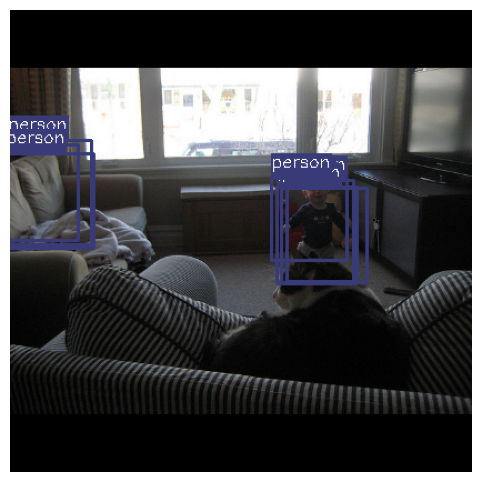

 40%|████      | 7002/17432 [3:29:32<19:25:18,  6.70s/it, loss=1.77]

batch_idx: 7001
batch_idx: 7002


 40%|████      | 7004/17432 [3:29:32<9:42:42,  3.35s/it, loss=1.77] 

batch_idx: 7003
batch_idx: 7004


 40%|████      | 7006/17432 [3:29:32<4:57:25,  1.71s/it, loss=1.77]

batch_idx: 7005
batch_idx: 7006


 40%|████      | 7008/17432 [3:29:33<2:37:06,  1.11it/s, loss=1.77]

batch_idx: 7007
batch_idx: 7008


 40%|████      | 7010/17432 [3:29:33<1:29:24,  1.94it/s, loss=1.77]

batch_idx: 7009
batch_idx: 7010


 40%|████      | 7012/17432 [3:29:33<55:35,  3.12it/s, loss=1.77]  

batch_idx: 7011
batch_idx: 7012


 40%|████      | 7014/17432 [3:29:34<39:42,  4.37it/s, loss=1.77]

batch_idx: 7013
batch_idx: 7014


 40%|████      | 7016/17432 [3:29:34<31:10,  5.57it/s, loss=1.77]

batch_idx: 7015
batch_idx: 7016


 40%|████      | 7018/17432 [3:29:39<4:44:33,  1.64s/it, loss=1.77]

batch_idx: 7017
batch_idx: 7018


 40%|████      | 7020/17432 [3:29:39<2:30:46,  1.15it/s, loss=1.77]

batch_idx: 7019
batch_idx: 7020


 40%|████      | 7022/17432 [3:29:46<6:43:44,  2.33s/it, loss=1.77]

batch_idx: 7021
batch_idx: 7022


 40%|████      | 7024/17432 [3:29:46<3:29:09,  1.21s/it, loss=1.77]

batch_idx: 7023
batch_idx: 7024


 40%|████      | 7026/17432 [3:29:53<8:07:40,  2.81s/it, loss=1.77]

batch_idx: 7025
batch_idx: 7026


 40%|████      | 7028/17432 [3:29:54<4:09:48,  1.44s/it, loss=1.77]

batch_idx: 7027
batch_idx: 7028


 40%|████      | 7030/17432 [3:30:00<7:43:02,  2.67s/it, loss=1.77]

batch_idx: 7029
batch_idx: 7030


 40%|████      | 7032/17432 [3:30:00<3:58:33,  1.38s/it, loss=1.77]

batch_idx: 7031
batch_idx: 7032


 40%|████      | 7034/17432 [3:30:07<7:59:18,  2.77s/it, loss=1.77]

batch_idx: 7033
batch_idx: 7034


 40%|████      | 7036/17432 [3:30:08<4:06:21,  1.42s/it, loss=1.77]

batch_idx: 7035
batch_idx: 7036


 40%|████      | 7038/17432 [3:30:14<7:28:00,  2.59s/it, loss=1.77]

batch_idx: 7037
batch_idx: 7038


 40%|████      | 7040/17432 [3:30:14<3:51:15,  1.34s/it, loss=1.77]

batch_idx: 7039
batch_idx: 7040


 40%|████      | 7042/17432 [3:30:21<7:22:53,  2.56s/it, loss=1.77]

batch_idx: 7041
batch_idx: 7042


 40%|████      | 7044/17432 [3:30:21<3:48:25,  1.32s/it, loss=1.77]

batch_idx: 7043
batch_idx: 7044


 40%|████      | 7046/17432 [3:30:28<7:43:29,  2.68s/it, loss=1.77]

batch_idx: 7045
batch_idx: 7046


 40%|████      | 7048/17432 [3:30:28<3:58:25,  1.38s/it, loss=1.77]

batch_idx: 7047
batch_idx: 7048


 40%|████      | 7050/17432 [3:30:35<7:32:21,  2.61s/it, loss=1.77]

batch_idx: 7049
batch_idx: 7050


 40%|████      | 7052/17432 [3:30:35<3:52:33,  1.34s/it, loss=1.77]

batch_idx: 7051
batch_idx: 7052


 40%|████      | 7054/17432 [3:30:42<8:05:21,  2.81s/it, loss=1.77]

batch_idx: 7053
batch_idx: 7054


 40%|████      | 7056/17432 [3:30:42<4:09:23,  1.44s/it, loss=1.77]

batch_idx: 7055
batch_idx: 7056


 40%|████      | 7058/17432 [3:30:49<7:51:20,  2.73s/it, loss=1.77]

batch_idx: 7057
batch_idx: 7058


 41%|████      | 7060/17432 [3:30:49<4:02:32,  1.40s/it, loss=1.77]

batch_idx: 7059
batch_idx: 7060


 41%|████      | 7062/17432 [3:30:56<7:46:41,  2.70s/it, loss=1.77]

batch_idx: 7061
batch_idx: 7062


 41%|████      | 7064/17432 [3:30:56<4:00:27,  1.39s/it, loss=1.77]

batch_idx: 7063
batch_idx: 7064


 41%|████      | 7066/17432 [3:31:03<7:53:32,  2.74s/it, loss=1.77]

batch_idx: 7065
batch_idx: 7066


 41%|████      | 7068/17432 [3:31:03<4:03:08,  1.41s/it, loss=1.77]

batch_idx: 7067
batch_idx: 7068


 41%|████      | 7070/17432 [3:31:10<7:45:37,  2.70s/it, loss=1.77]

batch_idx: 7069
batch_idx: 7070


 41%|████      | 7072/17432 [3:31:10<3:59:43,  1.39s/it, loss=1.77]

batch_idx: 7071
batch_idx: 7072


 41%|████      | 7074/17432 [3:31:17<7:43:59,  2.69s/it, loss=1.77]

batch_idx: 7073
batch_idx: 7074


 41%|████      | 7076/17432 [3:31:17<3:59:15,  1.39s/it, loss=1.77]

batch_idx: 7075
batch_idx: 7076


 41%|████      | 7078/17432 [3:31:24<7:26:47,  2.59s/it, loss=1.77]

batch_idx: 7077
batch_idx: 7078


 41%|████      | 7080/17432 [3:31:24<3:50:10,  1.33s/it, loss=1.77]

batch_idx: 7079
batch_idx: 7080


 41%|████      | 7082/17432 [3:31:31<7:41:28,  2.68s/it, loss=1.77]

batch_idx: 7081
batch_idx: 7082


 41%|████      | 7084/17432 [3:31:31<3:57:47,  1.38s/it, loss=1.77]

batch_idx: 7083
batch_idx: 7084


 41%|████      | 7086/17432 [3:31:38<7:41:38,  2.68s/it, loss=1.77]

batch_idx: 7085
batch_idx: 7086


 41%|████      | 7088/17432 [3:31:38<3:57:30,  1.38s/it, loss=1.77]

batch_idx: 7087
batch_idx: 7088


 41%|████      | 7090/17432 [3:31:45<7:47:30,  2.71s/it, loss=1.77]

batch_idx: 7089
batch_idx: 7090


 41%|████      | 7092/17432 [3:31:45<4:00:39,  1.40s/it, loss=1.77]

batch_idx: 7091
batch_idx: 7092


 41%|████      | 7094/17432 [3:31:52<7:47:58,  2.72s/it, loss=1.77]

batch_idx: 7093
batch_idx: 7094


 41%|████      | 7096/17432 [3:31:52<4:00:50,  1.40s/it, loss=1.77]

batch_idx: 7095
batch_idx: 7096


 41%|████      | 7098/17432 [3:31:59<8:05:37,  2.82s/it, loss=1.77]

batch_idx: 7097
batch_idx: 7098


 41%|████      | 7100/17432 [3:32:00<4:09:09,  1.45s/it, loss=1.77]

batch_idx: 7099
batch_idx: 7100


 41%|████      | 7102/17432 [3:32:06<7:35:23,  2.65s/it, loss=1.77]

batch_idx: 7101
batch_idx: 7102


 41%|████      | 7104/17432 [3:32:06<3:54:45,  1.36s/it, loss=1.77]

batch_idx: 7103
batch_idx: 7104


 41%|████      | 7106/17432 [3:32:13<7:51:25,  2.74s/it, loss=1.77]

batch_idx: 7105
batch_idx: 7106


 41%|████      | 7108/17432 [3:32:14<4:02:26,  1.41s/it, loss=1.77]

batch_idx: 7107
batch_idx: 7108


 41%|████      | 7110/17432 [3:32:20<7:44:16,  2.70s/it, loss=1.77]

batch_idx: 7109
batch_idx: 7110


 41%|████      | 7112/17432 [3:32:21<3:59:07,  1.39s/it, loss=1.77]

batch_idx: 7111
batch_idx: 7112


 41%|████      | 7114/17432 [3:32:27<7:28:03,  2.61s/it, loss=1.77]

batch_idx: 7113
batch_idx: 7114


 41%|████      | 7116/17432 [3:32:27<3:50:49,  1.34s/it, loss=1.77]

batch_idx: 7115
batch_idx: 7116


 41%|████      | 7118/17432 [3:32:34<7:41:17,  2.68s/it, loss=1.77]

batch_idx: 7117
batch_idx: 7118


 41%|████      | 7120/17432 [3:32:34<3:58:05,  1.39s/it, loss=1.77]

batch_idx: 7119
batch_idx: 7120


 41%|████      | 7122/17432 [3:32:41<7:18:14,  2.55s/it, loss=1.77]

batch_idx: 7121
batch_idx: 7122


 41%|████      | 7124/17432 [3:32:41<3:45:23,  1.31s/it, loss=1.77]

batch_idx: 7123
batch_idx: 7124


 41%|████      | 7126/17432 [3:32:48<7:48:33,  2.73s/it, loss=1.77]

batch_idx: 7125
batch_idx: 7126


 41%|████      | 7128/17432 [3:32:48<4:01:19,  1.41s/it, loss=1.77]

batch_idx: 7127
batch_idx: 7128


 41%|████      | 7130/17432 [3:32:54<7:17:45,  2.55s/it, loss=1.77]

batch_idx: 7129
batch_idx: 7130


 41%|████      | 7132/17432 [3:32:55<3:45:49,  1.32s/it, loss=1.77]

batch_idx: 7131
batch_idx: 7132


 41%|████      | 7134/17432 [3:33:01<7:20:03,  2.56s/it, loss=1.77]

batch_idx: 7133
batch_idx: 7134


 41%|████      | 7136/17432 [3:33:01<3:46:49,  1.32s/it, loss=1.77]

batch_idx: 7135
batch_idx: 7136


 41%|████      | 7138/17432 [3:33:08<7:29:40,  2.62s/it, loss=1.77]

batch_idx: 7137
batch_idx: 7138


 41%|████      | 7140/17432 [3:33:08<3:51:41,  1.35s/it, loss=1.77]

batch_idx: 7139
batch_idx: 7140


 41%|████      | 7142/17432 [3:33:15<7:55:55,  2.78s/it, loss=1.77]

batch_idx: 7141
batch_idx: 7142


 41%|████      | 7144/17432 [3:33:16<4:04:41,  1.43s/it, loss=1.77]

batch_idx: 7143
batch_idx: 7144


 41%|████      | 7146/17432 [3:33:23<7:50:59,  2.75s/it, loss=1.77]

batch_idx: 7145
batch_idx: 7146


 41%|████      | 7148/17432 [3:33:23<4:01:54,  1.41s/it, loss=1.77]

batch_idx: 7147
batch_idx: 7148


 41%|████      | 7150/17432 [3:33:30<7:54:04,  2.77s/it, loss=1.77]

batch_idx: 7149
batch_idx: 7150


 41%|████      | 7152/17432 [3:33:30<4:03:59,  1.42s/it, loss=1.77]

batch_idx: 7151
batch_idx: 7152


 41%|████      | 7154/17432 [3:33:37<7:32:31,  2.64s/it, loss=1.77]

batch_idx: 7153
batch_idx: 7154


 41%|████      | 7156/17432 [3:33:37<3:52:59,  1.36s/it, loss=1.77]

batch_idx: 7155
batch_idx: 7156


 41%|████      | 7158/17432 [3:33:44<7:46:59,  2.73s/it, loss=1.77]

batch_idx: 7157
batch_idx: 7158


 41%|████      | 7160/17432 [3:33:44<3:59:58,  1.40s/it, loss=1.77]

batch_idx: 7159
batch_idx: 7160


 41%|████      | 7162/17432 [3:33:50<7:07:47,  2.50s/it, loss=1.77]

batch_idx: 7161
batch_idx: 7162


 41%|████      | 7164/17432 [3:33:50<3:41:11,  1.29s/it, loss=1.77]

batch_idx: 7163
batch_idx: 7164


 41%|████      | 7166/17432 [3:33:57<7:24:43,  2.60s/it, loss=1.77]

batch_idx: 7165
batch_idx: 7166


 41%|████      | 7168/17432 [3:33:57<3:49:53,  1.34s/it, loss=1.77]

batch_idx: 7167
batch_idx: 7168


 41%|████      | 7170/17432 [3:34:04<7:20:22,  2.57s/it, loss=1.77]

batch_idx: 7169
batch_idx: 7170


 41%|████      | 7172/17432 [3:34:04<3:46:49,  1.33s/it, loss=1.77]

batch_idx: 7171
batch_idx: 7172


 41%|████      | 7174/17432 [3:34:10<7:26:18,  2.61s/it, loss=1.77]

batch_idx: 7173
batch_idx: 7174


 41%|████      | 7176/17432 [3:34:11<3:50:32,  1.35s/it, loss=1.77]

batch_idx: 7175
batch_idx: 7176


 41%|████      | 7178/17432 [3:34:18<8:12:59,  2.88s/it, loss=1.77]

batch_idx: 7177
batch_idx: 7178


 41%|████      | 7180/17432 [3:34:18<4:12:57,  1.48s/it, loss=1.77]

batch_idx: 7179
batch_idx: 7180


 41%|████      | 7182/17432 [3:34:25<8:02:53,  2.83s/it, loss=1.77]

batch_idx: 7181
batch_idx: 7182


 41%|████      | 7184/17432 [3:34:26<4:08:02,  1.45s/it, loss=1.77]

batch_idx: 7183
batch_idx: 7184


 41%|████      | 7186/17432 [3:34:33<7:51:06,  2.76s/it, loss=1.77]

batch_idx: 7185
batch_idx: 7186


 41%|████      | 7188/17432 [3:34:33<4:02:03,  1.42s/it, loss=1.77]

batch_idx: 7187
batch_idx: 7188


 41%|████      | 7190/17432 [3:34:40<8:06:13,  2.85s/it, loss=1.77]

batch_idx: 7189
batch_idx: 7190


 41%|████▏     | 7192/17432 [3:34:40<4:08:50,  1.46s/it, loss=1.77]

batch_idx: 7191
batch_idx: 7192


 41%|████▏     | 7194/17432 [3:34:47<7:46:19,  2.73s/it, loss=1.77]

batch_idx: 7193
batch_idx: 7194


 41%|████▏     | 7196/17432 [3:34:47<3:59:56,  1.41s/it, loss=1.77]

batch_idx: 7195
batch_idx: 7196


 41%|████▏     | 7198/17432 [3:34:54<7:58:02,  2.80s/it, loss=1.77]

batch_idx: 7197
batch_idx: 7198


 41%|████▏     | 7200/17432 [3:34:55<4:05:32,  1.44s/it, loss=1.77]

batch_idx: 7199
batch_idx: 7200


 41%|████▏     | 7200/17432 [3:34:55<4:05:32,  1.44s/it, loss=1.77]

==> Saving checkpoint


 41%|████▏     | 7202/17432 [3:35:02<6:10:26,  2.17s/it, loss=1.77]

batch_idx: 7201
batch_idx: 7202


 41%|████▏     | 7204/17432 [3:35:02<3:13:17,  1.13s/it, loss=1.77]

batch_idx: 7203
batch_idx: 7204


 41%|████▏     | 7206/17432 [3:35:09<7:20:39,  2.59s/it, loss=1.77]

batch_idx: 7205
batch_idx: 7206


 41%|████▏     | 7208/17432 [3:35:09<3:47:32,  1.34s/it, loss=1.77]

batch_idx: 7207
batch_idx: 7208


 41%|████▏     | 7210/17432 [3:35:15<7:18:39,  2.57s/it, loss=1.77]

batch_idx: 7209
batch_idx: 7210


 41%|████▏     | 7212/17432 [3:35:16<3:45:35,  1.32s/it, loss=1.77]

batch_idx: 7211
batch_idx: 7212


 41%|████▏     | 7214/17432 [3:35:22<7:05:42,  2.50s/it, loss=1.77]

batch_idx: 7213
batch_idx: 7214


 41%|████▏     | 7216/17432 [3:35:22<3:39:55,  1.29s/it, loss=1.77]

batch_idx: 7215
batch_idx: 7216


 41%|████▏     | 7218/17432 [3:35:29<7:43:23,  2.72s/it, loss=1.77]

batch_idx: 7217
batch_idx: 7218


 41%|████▏     | 7220/17432 [3:35:29<3:58:16,  1.40s/it, loss=1.77]

batch_idx: 7219
batch_idx: 7220


 41%|████▏     | 7222/17432 [3:35:36<7:30:57,  2.65s/it, loss=1.77]

batch_idx: 7221
batch_idx: 7222


 41%|████▏     | 7224/17432 [3:35:36<3:52:24,  1.37s/it, loss=1.77]

batch_idx: 7223
batch_idx: 7224


 41%|████▏     | 7226/17432 [3:35:43<7:44:10,  2.73s/it, loss=1.77]

batch_idx: 7225
batch_idx: 7226


 41%|████▏     | 7228/17432 [3:35:43<3:58:58,  1.41s/it, loss=1.77]

batch_idx: 7227
batch_idx: 7228


 41%|████▏     | 7230/17432 [3:35:51<8:23:27,  2.96s/it, loss=1.77]

batch_idx: 7229
batch_idx: 7230


 41%|████▏     | 7232/17432 [3:35:51<4:17:06,  1.51s/it, loss=1.77]

batch_idx: 7231
batch_idx: 7232


 41%|████▏     | 7234/17432 [3:35:58<7:51:08,  2.77s/it, loss=1.77]

batch_idx: 7233
batch_idx: 7234


 42%|████▏     | 7236/17432 [3:35:58<4:02:14,  1.43s/it, loss=1.77]

batch_idx: 7235
batch_idx: 7236


 42%|████▏     | 7238/17432 [3:36:05<7:40:05,  2.71s/it, loss=1.77]

batch_idx: 7237
batch_idx: 7238


 42%|████▏     | 7240/17432 [3:36:05<3:56:43,  1.39s/it, loss=1.77]

batch_idx: 7239
batch_idx: 7240


 42%|████▏     | 7242/17432 [3:36:12<7:22:08,  2.60s/it, loss=1.77]

batch_idx: 7241
batch_idx: 7242


 42%|████▏     | 7244/17432 [3:36:12<3:48:03,  1.34s/it, loss=1.77]

batch_idx: 7243
batch_idx: 7244


 42%|████▏     | 7246/17432 [3:36:19<7:27:26,  2.64s/it, loss=1.77]

batch_idx: 7245
batch_idx: 7246


 42%|████▏     | 7248/17432 [3:36:19<3:50:16,  1.36s/it, loss=1.77]

batch_idx: 7247
batch_idx: 7248


 42%|████▏     | 7250/17432 [3:36:25<7:23:14,  2.61s/it, loss=1.77]

batch_idx: 7249
batch_idx: 7250


 42%|████▏     | 7252/17432 [3:36:26<3:47:47,  1.34s/it, loss=1.77]

batch_idx: 7251
batch_idx: 7252


 42%|████▏     | 7254/17432 [3:36:33<7:49:21,  2.77s/it, loss=1.77]

batch_idx: 7253
batch_idx: 7254


 42%|████▏     | 7256/17432 [3:36:33<4:01:45,  1.43s/it, loss=1.77]

batch_idx: 7255
batch_idx: 7256


 42%|████▏     | 7258/17432 [3:36:39<7:20:10,  2.60s/it, loss=1.77]

batch_idx: 7257
batch_idx: 7258


 42%|████▏     | 7260/17432 [3:36:40<3:46:54,  1.34s/it, loss=1.77]

batch_idx: 7259
batch_idx: 7260


 42%|████▏     | 7262/17432 [3:36:47<7:46:15,  2.75s/it, loss=1.77]

batch_idx: 7261
batch_idx: 7262


 42%|████▏     | 7264/17432 [3:36:47<3:59:20,  1.41s/it, loss=1.77]

batch_idx: 7263
batch_idx: 7264


 42%|████▏     | 7266/17432 [3:36:53<7:06:18,  2.52s/it, loss=1.77]

batch_idx: 7265
batch_idx: 7266


 42%|████▏     | 7268/17432 [3:36:53<3:40:57,  1.30s/it, loss=1.77]

batch_idx: 7267
batch_idx: 7268


 42%|████▏     | 7270/17432 [3:37:00<7:29:01,  2.65s/it, loss=1.77]

batch_idx: 7269
batch_idx: 7270


 42%|████▏     | 7272/17432 [3:37:00<3:50:32,  1.36s/it, loss=1.77]

batch_idx: 7271
batch_idx: 7272


 42%|████▏     | 7274/17432 [3:37:07<7:24:20,  2.62s/it, loss=1.77]

batch_idx: 7273
batch_idx: 7274


 42%|████▏     | 7276/17432 [3:37:07<3:48:18,  1.35s/it, loss=1.77]

batch_idx: 7275
batch_idx: 7276


 42%|████▏     | 7278/17432 [3:37:14<7:32:47,  2.68s/it, loss=1.77]

batch_idx: 7277
batch_idx: 7278


 42%|████▏     | 7280/17432 [3:37:14<3:52:27,  1.37s/it, loss=1.77]

batch_idx: 7279
batch_idx: 7280


 42%|████▏     | 7282/17432 [3:37:20<7:11:56,  2.55s/it, loss=1.77]

batch_idx: 7281
batch_idx: 7282


 42%|████▏     | 7284/17432 [3:37:21<3:42:20,  1.31s/it, loss=1.77]

batch_idx: 7283
batch_idx: 7284


 42%|████▏     | 7286/17432 [3:37:27<7:34:22,  2.69s/it, loss=1.77]

batch_idx: 7285
batch_idx: 7286


 42%|████▏     | 7288/17432 [3:37:28<3:53:19,  1.38s/it, loss=1.77]

batch_idx: 7287
batch_idx: 7288


 42%|████▏     | 7290/17432 [3:37:35<8:01:26,  2.85s/it, loss=1.77]

batch_idx: 7289
batch_idx: 7290


 42%|████▏     | 7292/17432 [3:37:35<4:07:10,  1.46s/it, loss=1.77]

batch_idx: 7291
batch_idx: 7292


 42%|████▏     | 7294/17432 [3:37:42<7:38:47,  2.72s/it, loss=1.77]

batch_idx: 7293
batch_idx: 7294


 42%|████▏     | 7296/17432 [3:37:42<3:55:43,  1.40s/it, loss=1.77]

batch_idx: 7295
batch_idx: 7296


 42%|████▏     | 7298/17432 [3:37:49<7:34:35,  2.69s/it, loss=1.77]

batch_idx: 7297
batch_idx: 7298


 42%|████▏     | 7300/17432 [3:37:49<3:53:22,  1.38s/it, loss=1.77]

batch_idx: 7299
batch_idx: 7300


 42%|████▏     | 7302/17432 [3:37:56<7:40:45,  2.73s/it, loss=1.77]

batch_idx: 7301
batch_idx: 7302


 42%|████▏     | 7304/17432 [3:37:56<3:56:21,  1.40s/it, loss=1.77]

batch_idx: 7303
batch_idx: 7304


 42%|████▏     | 7306/17432 [3:38:03<7:45:22,  2.76s/it, loss=1.77]

batch_idx: 7305
batch_idx: 7306


 42%|████▏     | 7308/17432 [3:38:04<3:58:44,  1.41s/it, loss=1.77]

batch_idx: 7307
batch_idx: 7308


 42%|████▏     | 7310/17432 [3:38:10<7:24:56,  2.64s/it, loss=1.77]

batch_idx: 7309
batch_idx: 7310


 42%|████▏     | 7312/17432 [3:38:10<3:48:44,  1.36s/it, loss=1.77]

batch_idx: 7311
batch_idx: 7312


 42%|████▏     | 7314/17432 [3:38:17<7:34:52,  2.70s/it, loss=1.77]

batch_idx: 7313
batch_idx: 7314


 42%|████▏     | 7316/17432 [3:38:17<3:54:23,  1.39s/it, loss=1.77]

batch_idx: 7315
batch_idx: 7316


 42%|████▏     | 7318/17432 [3:38:24<7:22:07,  2.62s/it, loss=1.77]

batch_idx: 7317
batch_idx: 7318


 42%|████▏     | 7320/17432 [3:38:24<3:47:51,  1.35s/it, loss=1.77]

batch_idx: 7319
batch_idx: 7320


 42%|████▏     | 7322/17432 [3:38:30<7:06:22,  2.53s/it, loss=1.77]

batch_idx: 7321
batch_idx: 7322


 42%|████▏     | 7324/17432 [3:38:31<3:40:16,  1.31s/it, loss=1.77]

batch_idx: 7323
batch_idx: 7324


 42%|████▏     | 7326/17432 [3:38:37<7:18:04,  2.60s/it, loss=1.77]

batch_idx: 7325
batch_idx: 7326


 42%|████▏     | 7328/17432 [3:38:38<3:46:18,  1.34s/it, loss=1.77]

batch_idx: 7327
batch_idx: 7328


 42%|████▏     | 7330/17432 [3:38:44<7:31:44,  2.68s/it, loss=1.77]

batch_idx: 7329
batch_idx: 7330


 42%|████▏     | 7332/17432 [3:38:45<3:51:41,  1.38s/it, loss=1.77]

batch_idx: 7331
batch_idx: 7332


 42%|████▏     | 7334/17432 [3:38:52<7:58:34,  2.84s/it, loss=1.77]

batch_idx: 7333
batch_idx: 7334


 42%|████▏     | 7336/17432 [3:38:52<4:05:40,  1.46s/it, loss=1.77]

batch_idx: 7335
batch_idx: 7336


 42%|████▏     | 7338/17432 [3:38:59<7:57:30,  2.84s/it, loss=1.77]

batch_idx: 7337
batch_idx: 7338


 42%|████▏     | 7340/17432 [3:38:59<4:05:23,  1.46s/it, loss=1.77]

batch_idx: 7339
batch_idx: 7340


 42%|████▏     | 7342/17432 [3:39:07<7:56:29,  2.83s/it, loss=1.77]

batch_idx: 7341
batch_idx: 7342


 42%|████▏     | 7344/17432 [3:39:07<4:04:52,  1.46s/it, loss=1.77]

batch_idx: 7343
batch_idx: 7344


 42%|████▏     | 7346/17432 [3:39:13<7:14:18,  2.58s/it, loss=1.77]

batch_idx: 7345
batch_idx: 7346


 42%|████▏     | 7348/17432 [3:39:13<3:44:00,  1.33s/it, loss=1.77]

batch_idx: 7347
batch_idx: 7348


 42%|████▏     | 7350/17432 [3:39:20<7:12:35,  2.57s/it, loss=1.77]

batch_idx: 7349
batch_idx: 7350


 42%|████▏     | 7352/17432 [3:39:20<3:42:24,  1.32s/it, loss=1.77]

batch_idx: 7351
batch_idx: 7352


 42%|████▏     | 7354/17432 [3:39:27<7:29:57,  2.68s/it, loss=1.77]

batch_idx: 7353
batch_idx: 7354


 42%|████▏     | 7356/17432 [3:39:27<3:51:18,  1.38s/it, loss=1.77]

batch_idx: 7355
batch_idx: 7356


 42%|████▏     | 7358/17432 [3:39:34<7:33:28,  2.70s/it, loss=1.77]

batch_idx: 7357
batch_idx: 7358


 42%|████▏     | 7360/17432 [3:39:34<3:53:30,  1.39s/it, loss=1.77]

batch_idx: 7359
batch_idx: 7360


 42%|████▏     | 7362/17432 [3:39:41<7:24:31,  2.65s/it, loss=1.77]

batch_idx: 7361
batch_idx: 7362


 42%|████▏     | 7364/17432 [3:39:41<3:48:32,  1.36s/it, loss=1.77]

batch_idx: 7363
batch_idx: 7364


 42%|████▏     | 7366/17432 [3:39:47<7:06:26,  2.54s/it, loss=1.77]

batch_idx: 7365
batch_idx: 7366


 42%|████▏     | 7368/17432 [3:39:48<3:40:17,  1.31s/it, loss=1.77]

batch_idx: 7367
batch_idx: 7368


 42%|████▏     | 7370/17432 [3:39:54<7:11:01,  2.57s/it, loss=1.77]

batch_idx: 7369
batch_idx: 7370


 42%|████▏     | 7372/17432 [3:39:54<3:42:18,  1.33s/it, loss=1.77]

batch_idx: 7371
batch_idx: 7372


 42%|████▏     | 7374/17432 [3:40:01<7:24:34,  2.65s/it, loss=1.77]

batch_idx: 7373
batch_idx: 7374


 42%|████▏     | 7376/17432 [3:40:01<3:48:10,  1.36s/it, loss=1.77]

batch_idx: 7375
batch_idx: 7376


 42%|████▏     | 7378/17432 [3:40:08<7:26:12,  2.66s/it, loss=1.77]

batch_idx: 7377
batch_idx: 7378


 42%|████▏     | 7380/17432 [3:40:08<3:50:03,  1.37s/it, loss=1.77]

batch_idx: 7379
batch_idx: 7380


 42%|████▏     | 7382/17432 [3:40:15<7:47:07,  2.79s/it, loss=1.77]

batch_idx: 7381
batch_idx: 7382


 42%|████▏     | 7384/17432 [3:40:16<4:00:01,  1.43s/it, loss=1.77]

batch_idx: 7383
batch_idx: 7384


 42%|████▏     | 7386/17432 [3:40:22<7:13:09,  2.59s/it, loss=1.77]

batch_idx: 7385
batch_idx: 7386


 42%|████▏     | 7388/17432 [3:40:22<3:43:14,  1.33s/it, loss=1.77]

batch_idx: 7387
batch_idx: 7388


 42%|████▏     | 7390/17432 [3:40:29<7:34:43,  2.72s/it, loss=1.77]

batch_idx: 7389
batch_idx: 7390


 42%|████▏     | 7392/17432 [3:40:29<3:53:55,  1.40s/it, loss=1.77]

batch_idx: 7391
batch_idx: 7392


 42%|████▏     | 7394/17432 [3:40:36<7:24:03,  2.65s/it, loss=1.77]

batch_idx: 7393
batch_idx: 7394


 42%|████▏     | 7396/17432 [3:40:36<3:47:53,  1.36s/it, loss=1.77]

batch_idx: 7395
batch_idx: 7396


 42%|████▏     | 7398/17432 [3:40:43<7:07:05,  2.55s/it, loss=1.77]

batch_idx: 7397
batch_idx: 7398


 42%|████▏     | 7400/17432 [3:40:43<3:40:13,  1.32s/it, loss=1.77]

batch_idx: 7399
batch_idx: 7400


 42%|████▏     | 7400/17432 [3:40:43<3:40:13,  1.32s/it, loss=1.77]

==> Saving checkpoint


 42%|████▏     | 7402/17432 [3:40:50<6:17:56,  2.26s/it, loss=1.77]

batch_idx: 7401
batch_idx: 7402


 42%|████▏     | 7404/17432 [3:40:50<3:16:26,  1.18s/it, loss=1.77]

batch_idx: 7403
batch_idx: 7404


 42%|████▏     | 7406/17432 [3:40:57<7:03:04,  2.53s/it, loss=1.77]

batch_idx: 7405
batch_idx: 7406


 42%|████▏     | 7408/17432 [3:40:57<3:38:24,  1.31s/it, loss=1.77]

batch_idx: 7407
batch_idx: 7408


 43%|████▎     | 7410/17432 [3:41:04<7:28:18,  2.68s/it, loss=1.77]

batch_idx: 7409
batch_idx: 7410


 43%|████▎     | 7412/17432 [3:41:04<3:50:46,  1.38s/it, loss=1.77]

batch_idx: 7411
batch_idx: 7412


 43%|████▎     | 7414/17432 [3:41:11<7:34:45,  2.72s/it, loss=1.77]

batch_idx: 7413
batch_idx: 7414


 43%|████▎     | 7416/17432 [3:41:11<3:53:10,  1.40s/it, loss=1.77]

batch_idx: 7415
batch_idx: 7416


 43%|████▎     | 7418/17432 [3:41:18<7:33:42,  2.72s/it, loss=1.77]

batch_idx: 7417
batch_idx: 7418


 43%|████▎     | 7420/17432 [3:41:19<3:53:32,  1.40s/it, loss=1.77]

batch_idx: 7419
batch_idx: 7420


 43%|████▎     | 7422/17432 [3:41:25<7:18:34,  2.63s/it, loss=1.77]

batch_idx: 7421
batch_idx: 7422


 43%|████▎     | 7424/17432 [3:41:25<3:46:30,  1.36s/it, loss=1.77]

batch_idx: 7423
batch_idx: 7424


 43%|████▎     | 7426/17432 [3:41:32<7:15:14,  2.61s/it, loss=1.77]

batch_idx: 7425
batch_idx: 7426


 43%|████▎     | 7428/17432 [3:41:32<3:44:30,  1.35s/it, loss=1.77]

batch_idx: 7427
batch_idx: 7428


 43%|████▎     | 7430/17432 [3:41:39<7:32:22,  2.71s/it, loss=1.77]

batch_idx: 7429
batch_idx: 7430


 43%|████▎     | 7432/17432 [3:41:39<3:52:37,  1.40s/it, loss=1.77]

batch_idx: 7431
batch_idx: 7432


 43%|████▎     | 7434/17432 [3:41:47<7:58:06,  2.87s/it, loss=1.77]

batch_idx: 7433
batch_idx: 7434


 43%|████▎     | 7436/17432 [3:41:47<4:04:47,  1.47s/it, loss=1.77]

batch_idx: 7435
batch_idx: 7436


 43%|████▎     | 7438/17432 [3:41:54<7:38:23,  2.75s/it, loss=1.77]

batch_idx: 7437
batch_idx: 7438


 43%|████▎     | 7440/17432 [3:41:54<3:55:42,  1.42s/it, loss=1.77]

batch_idx: 7439
batch_idx: 7440


 43%|████▎     | 7442/17432 [3:42:00<7:19:23,  2.64s/it, loss=1.77]

batch_idx: 7441
batch_idx: 7442


 43%|████▎     | 7444/17432 [3:42:01<3:46:31,  1.36s/it, loss=1.77]

batch_idx: 7443
batch_idx: 7444


 43%|████▎     | 7446/17432 [3:42:07<7:15:51,  2.62s/it, loss=1.77]

batch_idx: 7445
batch_idx: 7446


 43%|████▎     | 7448/17432 [3:42:08<3:44:32,  1.35s/it, loss=1.77]

batch_idx: 7447
batch_idx: 7448


 43%|████▎     | 7450/17432 [3:42:15<7:57:11,  2.87s/it, loss=1.77]

batch_idx: 7449
batch_idx: 7450


 43%|████▎     | 7452/17432 [3:42:15<4:04:04,  1.47s/it, loss=1.77]

batch_idx: 7451
batch_idx: 7452


 43%|████▎     | 7454/17432 [3:42:22<7:36:51,  2.75s/it, loss=1.77]

batch_idx: 7453
batch_idx: 7454


 43%|████▎     | 7456/17432 [3:42:22<3:54:30,  1.41s/it, loss=1.77]

batch_idx: 7455
batch_idx: 7456


 43%|████▎     | 7458/17432 [3:42:30<8:00:18,  2.89s/it, loss=1.77]

batch_idx: 7457
batch_idx: 7458


 43%|████▎     | 7460/17432 [3:42:30<4:06:58,  1.49s/it, loss=1.77]

batch_idx: 7459
batch_idx: 7460


 43%|████▎     | 7462/17432 [3:42:36<7:26:38,  2.69s/it, loss=1.77]

batch_idx: 7461
batch_idx: 7462


 43%|████▎     | 7464/17432 [3:42:37<3:49:49,  1.38s/it, loss=1.77]

batch_idx: 7463
batch_idx: 7464


 43%|████▎     | 7466/17432 [3:42:43<7:17:17,  2.63s/it, loss=1.77]

batch_idx: 7465
batch_idx: 7466


 43%|████▎     | 7468/17432 [3:42:44<3:45:59,  1.36s/it, loss=1.77]

batch_idx: 7467
batch_idx: 7468


 43%|████▎     | 7470/17432 [3:42:50<7:25:57,  2.69s/it, loss=1.77]

batch_idx: 7469
batch_idx: 7470


 43%|████▎     | 7472/17432 [3:42:51<3:49:41,  1.38s/it, loss=1.77]

batch_idx: 7471
batch_idx: 7472


 43%|████▎     | 7474/17432 [3:42:57<7:35:26,  2.74s/it, loss=1.77]

batch_idx: 7473
batch_idx: 7474


 43%|████▎     | 7476/17432 [3:42:58<3:53:35,  1.41s/it, loss=1.77]

batch_idx: 7475
batch_idx: 7476


 43%|████▎     | 7478/17432 [3:43:05<7:30:35,  2.72s/it, loss=1.77]

batch_idx: 7477
batch_idx: 7478


 43%|████▎     | 7480/17432 [3:43:05<3:51:11,  1.39s/it, loss=1.77]

batch_idx: 7479
batch_idx: 7480


 43%|████▎     | 7482/17432 [3:43:11<7:25:13,  2.68s/it, loss=1.77]

batch_idx: 7481
batch_idx: 7482


 43%|████▎     | 7484/17432 [3:43:12<3:49:19,  1.38s/it, loss=1.77]

batch_idx: 7483
batch_idx: 7484


 43%|████▎     | 7486/17432 [3:43:18<7:26:43,  2.69s/it, loss=1.77]

batch_idx: 7485
batch_idx: 7486


 43%|████▎     | 7488/17432 [3:43:19<3:49:51,  1.39s/it, loss=1.77]

batch_idx: 7487
batch_idx: 7488


 43%|████▎     | 7490/17432 [3:43:25<7:23:52,  2.68s/it, loss=1.77]

batch_idx: 7489
batch_idx: 7490


 43%|████▎     | 7492/17432 [3:43:26<3:49:22,  1.38s/it, loss=1.77]

batch_idx: 7491
batch_idx: 7492


 43%|████▎     | 7494/17432 [3:43:32<7:24:13,  2.68s/it, loss=1.77]

batch_idx: 7493
batch_idx: 7494


 43%|████▎     | 7496/17432 [3:43:33<3:47:56,  1.38s/it, loss=1.77]

batch_idx: 7495
batch_idx: 7496


 43%|████▎     | 7498/17432 [3:43:40<7:35:23,  2.75s/it, loss=1.77]

batch_idx: 7497
batch_idx: 7498


 43%|████▎     | 7500/17432 [3:43:40<3:53:39,  1.41s/it, loss=1.77]

batch_idx: 7499
batch_idx: 7500


 43%|████▎     | 7502/17432 [3:43:47<7:48:34,  2.83s/it, loss=1.77]

batch_idx: 7501
batch_idx: 7502


 43%|████▎     | 7504/17432 [3:43:47<4:00:41,  1.45s/it, loss=1.77]

batch_idx: 7503
batch_idx: 7504


 43%|████▎     | 7506/17432 [3:43:54<7:22:15,  2.67s/it, loss=1.77]

batch_idx: 7505
batch_idx: 7506


 43%|████▎     | 7508/17432 [3:43:54<3:47:39,  1.38s/it, loss=1.77]

batch_idx: 7507
batch_idx: 7508


 43%|████▎     | 7510/17432 [3:44:01<7:26:15,  2.70s/it, loss=1.77]

batch_idx: 7509
batch_idx: 7510


 43%|████▎     | 7512/17432 [3:44:01<3:49:50,  1.39s/it, loss=1.77]

batch_idx: 7511
batch_idx: 7512


 43%|████▎     | 7514/17432 [3:44:08<7:23:48,  2.68s/it, loss=1.77]

batch_idx: 7513
batch_idx: 7514


 43%|████▎     | 7516/17432 [3:44:08<3:48:07,  1.38s/it, loss=1.77]

batch_idx: 7515
batch_idx: 7516


 43%|████▎     | 7518/17432 [3:44:15<7:16:53,  2.64s/it, loss=1.77]

batch_idx: 7517
batch_idx: 7518


 43%|████▎     | 7520/17432 [3:44:15<3:45:18,  1.36s/it, loss=1.77]

batch_idx: 7519
batch_idx: 7520


 43%|████▎     | 7522/17432 [3:44:22<7:21:23,  2.67s/it, loss=1.77]

batch_idx: 7521
batch_idx: 7522


 43%|████▎     | 7524/17432 [3:44:22<3:47:36,  1.38s/it, loss=1.77]

batch_idx: 7523
batch_idx: 7524


 43%|████▎     | 7526/17432 [3:44:29<7:20:27,  2.67s/it, loss=1.77]

batch_idx: 7525
batch_idx: 7526


 43%|████▎     | 7528/17432 [3:44:29<3:47:16,  1.38s/it, loss=1.77]

batch_idx: 7527
batch_idx: 7528


 43%|████▎     | 7530/17432 [3:44:35<7:09:40,  2.60s/it, loss=1.77]

batch_idx: 7529
batch_idx: 7530


 43%|████▎     | 7532/17432 [3:44:36<3:41:21,  1.34s/it, loss=1.77]

batch_idx: 7531
batch_idx: 7532


 43%|████▎     | 7534/17432 [3:44:43<7:35:16,  2.76s/it, loss=1.77]

batch_idx: 7533
batch_idx: 7534


 43%|████▎     | 7536/17432 [3:44:43<3:54:50,  1.42s/it, loss=1.77]

batch_idx: 7535
batch_idx: 7536


 43%|████▎     | 7538/17432 [3:44:50<7:20:57,  2.67s/it, loss=1.77]

batch_idx: 7537
batch_idx: 7538


 43%|████▎     | 7540/17432 [3:44:50<3:46:36,  1.37s/it, loss=1.77]

batch_idx: 7539
batch_idx: 7540


 43%|████▎     | 7542/17432 [3:44:57<7:39:01,  2.78s/it, loss=1.77]

batch_idx: 7541
batch_idx: 7542


 43%|████▎     | 7544/17432 [3:44:57<3:55:50,  1.43s/it, loss=1.77]

batch_idx: 7543
batch_idx: 7544


 43%|████▎     | 7546/17432 [3:45:04<7:42:26,  2.81s/it, loss=1.77]

batch_idx: 7545
batch_idx: 7546


 43%|████▎     | 7548/17432 [3:45:05<3:57:19,  1.44s/it, loss=1.77]

batch_idx: 7547
batch_idx: 7548


 43%|████▎     | 7550/17432 [3:45:12<7:41:31,  2.80s/it, loss=1.77]

batch_idx: 7549
batch_idx: 7550


 43%|████▎     | 7552/17432 [3:45:12<3:57:30,  1.44s/it, loss=1.77]

batch_idx: 7551
batch_idx: 7552


 43%|████▎     | 7554/17432 [3:45:18<7:13:25,  2.63s/it, loss=1.77]

batch_idx: 7553
batch_idx: 7554


 43%|████▎     | 7556/17432 [3:45:19<3:43:12,  1.36s/it, loss=1.77]

batch_idx: 7555
batch_idx: 7556


 43%|████▎     | 7558/17432 [3:45:25<6:56:39,  2.53s/it, loss=1.77]

batch_idx: 7557
batch_idx: 7558


 43%|████▎     | 7560/17432 [3:45:25<3:34:23,  1.30s/it, loss=1.77]

batch_idx: 7559
batch_idx: 7560


 43%|████▎     | 7562/17432 [3:45:32<7:10:46,  2.62s/it, loss=1.77]

batch_idx: 7561
batch_idx: 7562


 43%|████▎     | 7564/17432 [3:45:32<3:41:55,  1.35s/it, loss=1.77]

batch_idx: 7563
batch_idx: 7564


 43%|████▎     | 7566/17432 [3:45:39<7:16:47,  2.66s/it, loss=1.77]

batch_idx: 7565
batch_idx: 7566


 43%|████▎     | 7568/17432 [3:45:39<3:45:09,  1.37s/it, loss=1.77]

batch_idx: 7567
batch_idx: 7568


 43%|████▎     | 7570/17432 [3:45:46<7:16:26,  2.66s/it, loss=1.77]

batch_idx: 7569
batch_idx: 7570


 43%|████▎     | 7572/17432 [3:45:46<3:45:10,  1.37s/it, loss=1.77]

batch_idx: 7571
batch_idx: 7572


 43%|████▎     | 7574/17432 [3:45:53<7:39:22,  2.80s/it, loss=1.77]

batch_idx: 7573
batch_idx: 7574


 43%|████▎     | 7576/17432 [3:45:53<3:55:57,  1.44s/it, loss=1.77]

batch_idx: 7575
batch_idx: 7576


 43%|████▎     | 7578/17432 [3:46:00<7:02:29,  2.57s/it, loss=1.77]

batch_idx: 7577
batch_idx: 7578


 43%|████▎     | 7580/17432 [3:46:00<3:37:23,  1.32s/it, loss=1.77]

batch_idx: 7579
batch_idx: 7580


 43%|████▎     | 7582/17432 [3:46:07<7:41:21,  2.81s/it, loss=1.77]

batch_idx: 7581
batch_idx: 7582


 44%|████▎     | 7584/17432 [3:46:07<3:57:41,  1.45s/it, loss=1.77]

batch_idx: 7583
batch_idx: 7584


 44%|████▎     | 7586/17432 [3:46:14<7:45:35,  2.84s/it, loss=1.77]

batch_idx: 7585
batch_idx: 7586


 44%|████▎     | 7588/17432 [3:46:15<3:59:25,  1.46s/it, loss=1.77]

batch_idx: 7587
batch_idx: 7588


 44%|████▎     | 7590/17432 [3:46:22<7:37:18,  2.79s/it, loss=1.77]

batch_idx: 7589
batch_idx: 7590


 44%|████▎     | 7592/17432 [3:46:22<3:54:56,  1.43s/it, loss=1.77]

batch_idx: 7591
batch_idx: 7592


 44%|████▎     | 7594/17432 [3:46:28<7:15:16,  2.65s/it, loss=1.77]

batch_idx: 7593
batch_idx: 7594


 44%|████▎     | 7596/17432 [3:46:29<3:44:19,  1.37s/it, loss=1.77]

batch_idx: 7595
batch_idx: 7596


 44%|████▎     | 7598/17432 [3:46:36<7:39:21,  2.80s/it, loss=1.77]

batch_idx: 7597
batch_idx: 7598


 44%|████▎     | 7600/17432 [3:46:36<3:55:08,  1.43s/it, loss=1.77]

batch_idx: 7599
batch_idx: 7600


 44%|████▎     | 7600/17432 [3:46:36<3:55:08,  1.43s/it, loss=1.77]

==> Saving checkpoint


 44%|████▎     | 7602/17432 [3:46:47<8:23:03,  3.07s/it, loss=1.77] 

batch_idx: 7601
batch_idx: 7602


 44%|████▎     | 7604/17432 [3:46:48<4:17:30,  1.57s/it, loss=1.77]

batch_idx: 7603
batch_idx: 7604


 44%|████▎     | 7606/17432 [3:46:50<3:57:29,  1.45s/it, loss=1.77]

batch_idx: 7605
batch_idx: 7606


 44%|████▎     | 7608/17432 [3:46:50<2:07:57,  1.28it/s, loss=1.77]

batch_idx: 7607
batch_idx: 7608


 44%|████▎     | 7610/17432 [3:46:57<6:25:41,  2.36s/it, loss=1.77]

batch_idx: 7609
batch_idx: 7610


 44%|████▎     | 7612/17432 [3:46:57<3:19:54,  1.22s/it, loss=1.77]

batch_idx: 7611
batch_idx: 7612


 44%|████▎     | 7614/17432 [3:47:04<7:16:57,  2.67s/it, loss=1.77]

batch_idx: 7613
batch_idx: 7614


 44%|████▎     | 7616/17432 [3:47:04<3:45:10,  1.38s/it, loss=1.77]

batch_idx: 7615
batch_idx: 7616


 44%|████▎     | 7618/17432 [3:47:11<7:07:56,  2.62s/it, loss=1.77]

batch_idx: 7617
batch_idx: 7618


 44%|████▎     | 7620/17432 [3:47:11<3:40:36,  1.35s/it, loss=1.77]

batch_idx: 7619
batch_idx: 7620


 44%|████▎     | 7622/17432 [3:47:18<7:18:08,  2.68s/it, loss=1.77]

batch_idx: 7621
batch_idx: 7622


 44%|████▎     | 7624/17432 [3:47:18<3:46:00,  1.38s/it, loss=1.77]

batch_idx: 7623
batch_idx: 7624


 44%|████▎     | 7626/17432 [3:47:25<7:33:05,  2.77s/it, loss=1.77]

batch_idx: 7625
batch_idx: 7626


 44%|████▍     | 7628/17432 [3:47:25<3:52:22,  1.42s/it, loss=1.77]

batch_idx: 7627
batch_idx: 7628


 44%|████▍     | 7630/17432 [3:47:32<7:35:11,  2.79s/it, loss=1.77]

batch_idx: 7629
batch_idx: 7630


 44%|████▍     | 7632/17432 [3:47:33<3:53:46,  1.43s/it, loss=1.77]

batch_idx: 7631
batch_idx: 7632


 44%|████▍     | 7634/17432 [3:47:39<7:23:05,  2.71s/it, loss=1.77]

batch_idx: 7633
batch_idx: 7634


 44%|████▍     | 7636/17432 [3:47:40<3:47:44,  1.39s/it, loss=1.77]

batch_idx: 7635
batch_idx: 7636


 44%|████▍     | 7638/17432 [3:47:46<7:20:35,  2.70s/it, loss=1.77]

batch_idx: 7637
batch_idx: 7638


 44%|████▍     | 7640/17432 [3:47:47<3:46:42,  1.39s/it, loss=1.77]

batch_idx: 7639
batch_idx: 7640


 44%|████▍     | 7642/17432 [3:47:53<6:59:01,  2.57s/it, loss=1.77]

batch_idx: 7641
batch_idx: 7642


 44%|████▍     | 7644/17432 [3:47:53<3:36:37,  1.33s/it, loss=1.77]

batch_idx: 7643
batch_idx: 7644


 44%|████▍     | 7646/17432 [3:48:01<7:39:23,  2.82s/it, loss=1.77]

batch_idx: 7645
batch_idx: 7646


 44%|████▍     | 7648/17432 [3:48:01<3:55:56,  1.45s/it, loss=1.77]

batch_idx: 7647
batch_idx: 7648


 44%|████▍     | 7650/17432 [3:48:07<7:14:09,  2.66s/it, loss=1.77]

batch_idx: 7649
batch_idx: 7650


 44%|████▍     | 7652/17432 [3:48:08<3:43:26,  1.37s/it, loss=1.77]

batch_idx: 7651
batch_idx: 7652


 44%|████▍     | 7654/17432 [3:48:14<7:00:20,  2.58s/it, loss=1.77]

batch_idx: 7653
batch_idx: 7654


 44%|████▍     | 7656/17432 [3:48:14<3:37:11,  1.33s/it, loss=1.77]

batch_idx: 7655
batch_idx: 7656


 44%|████▍     | 7658/17432 [3:48:21<7:09:38,  2.64s/it, loss=1.77]

batch_idx: 7657
batch_idx: 7658


 44%|████▍     | 7660/17432 [3:48:21<3:41:05,  1.36s/it, loss=1.77]

batch_idx: 7659
batch_idx: 7660


 44%|████▍     | 7662/17432 [3:48:28<7:03:02,  2.60s/it, loss=1.77]

batch_idx: 7661
batch_idx: 7662


 44%|████▍     | 7664/17432 [3:48:28<3:38:13,  1.34s/it, loss=1.77]

batch_idx: 7663
batch_idx: 7664


 44%|████▍     | 7666/17432 [3:48:35<7:15:08,  2.67s/it, loss=1.77]

batch_idx: 7665
batch_idx: 7666


 44%|████▍     | 7668/17432 [3:48:35<3:44:06,  1.38s/it, loss=1.77]

batch_idx: 7667
batch_idx: 7668


 44%|████▍     | 7670/17432 [3:48:41<7:04:00,  2.61s/it, loss=1.77]

batch_idx: 7669
batch_idx: 7670


 44%|████▍     | 7672/17432 [3:48:42<3:38:17,  1.34s/it, loss=1.77]

batch_idx: 7671
batch_idx: 7672


 44%|████▍     | 7674/17432 [3:48:49<7:35:47,  2.80s/it, loss=1.77]

batch_idx: 7673
batch_idx: 7674


 44%|████▍     | 7676/17432 [3:48:49<3:53:53,  1.44s/it, loss=1.77]

batch_idx: 7675
batch_idx: 7676


 44%|████▍     | 7678/17432 [3:48:56<7:14:22,  2.67s/it, loss=1.77]

batch_idx: 7677
batch_idx: 7678


 44%|████▍     | 7680/17432 [3:48:56<3:43:38,  1.38s/it, loss=1.77]

batch_idx: 7679
batch_idx: 7680


 44%|████▍     | 7682/17432 [3:49:03<7:41:33,  2.84s/it, loss=1.77]

batch_idx: 7681
batch_idx: 7682


 44%|████▍     | 7684/17432 [3:49:04<3:57:00,  1.46s/it, loss=1.77]

batch_idx: 7683
batch_idx: 7684


 44%|████▍     | 7686/17432 [3:49:11<7:36:10,  2.81s/it, loss=1.77]

batch_idx: 7685
batch_idx: 7686


 44%|████▍     | 7688/17432 [3:49:11<3:54:28,  1.44s/it, loss=1.77]

batch_idx: 7687
batch_idx: 7688


 44%|████▍     | 7690/17432 [3:49:18<7:27:10,  2.75s/it, loss=1.77]

batch_idx: 7689
batch_idx: 7690


 44%|████▍     | 7692/17432 [3:49:18<3:49:49,  1.42s/it, loss=1.77]

batch_idx: 7691
batch_idx: 7692


 44%|████▍     | 7694/17432 [3:49:25<7:30:54,  2.78s/it, loss=1.77]

batch_idx: 7693
batch_idx: 7694


 44%|████▍     | 7696/17432 [3:49:25<3:51:30,  1.43s/it, loss=1.77]

batch_idx: 7695
batch_idx: 7696


 44%|████▍     | 7698/17432 [3:49:32<7:24:30,  2.74s/it, loss=1.77]

batch_idx: 7697
batch_idx: 7698


 44%|████▍     | 7700/17432 [3:49:32<3:48:58,  1.41s/it, loss=1.77]

batch_idx: 7699
batch_idx: 7700


 44%|████▍     | 7702/17432 [3:49:39<6:57:03,  2.57s/it, loss=1.77]

batch_idx: 7701
batch_idx: 7702


 44%|████▍     | 7704/17432 [3:49:39<3:34:36,  1.32s/it, loss=1.77]

batch_idx: 7703
batch_idx: 7704


 44%|████▍     | 7706/17432 [3:49:46<7:26:43,  2.76s/it, loss=1.77]

batch_idx: 7705
batch_idx: 7706


 44%|████▍     | 7708/17432 [3:49:46<3:49:17,  1.41s/it, loss=1.77]

batch_idx: 7707
batch_idx: 7708


 44%|████▍     | 7710/17432 [3:49:53<7:22:21,  2.73s/it, loss=1.77]

batch_idx: 7709
batch_idx: 7710


 44%|████▍     | 7712/17432 [3:49:53<3:47:57,  1.41s/it, loss=1.77]

batch_idx: 7711
batch_idx: 7712


 44%|████▍     | 7714/17432 [3:50:00<7:05:22,  2.63s/it, loss=1.77]

batch_idx: 7713
batch_idx: 7714


 44%|████▍     | 7716/17432 [3:50:00<3:39:36,  1.36s/it, loss=1.77]

batch_idx: 7715
batch_idx: 7716


 44%|████▍     | 7718/17432 [3:50:07<7:29:34,  2.78s/it, loss=1.77]

batch_idx: 7717
batch_idx: 7718


 44%|████▍     | 7720/17432 [3:50:07<3:50:29,  1.42s/it, loss=1.77]

batch_idx: 7719
batch_idx: 7720


 44%|████▍     | 7722/17432 [3:50:14<7:08:58,  2.65s/it, loss=1.77]

batch_idx: 7721
batch_idx: 7722


 44%|████▍     | 7724/17432 [3:50:14<3:40:26,  1.36s/it, loss=1.77]

batch_idx: 7723
batch_idx: 7724


 44%|████▍     | 7726/17432 [3:50:21<7:20:30,  2.72s/it, loss=1.77]

batch_idx: 7725
batch_idx: 7726


 44%|████▍     | 7728/17432 [3:50:21<3:46:05,  1.40s/it, loss=1.77]

batch_idx: 7727
batch_idx: 7728


 44%|████▍     | 7730/17432 [3:50:28<7:29:39,  2.78s/it, loss=1.77]

batch_idx: 7729
batch_idx: 7730


 44%|████▍     | 7732/17432 [3:50:29<3:51:20,  1.43s/it, loss=1.77]

batch_idx: 7731
batch_idx: 7732


 44%|████▍     | 7734/17432 [3:50:36<7:37:45,  2.83s/it, loss=1.77]

batch_idx: 7733
batch_idx: 7734


 44%|████▍     | 7736/17432 [3:50:36<3:54:51,  1.45s/it, loss=1.77]

batch_idx: 7735
batch_idx: 7736


 44%|████▍     | 7738/17432 [3:50:43<7:27:08,  2.77s/it, loss=1.77]

batch_idx: 7737
batch_idx: 7738


 44%|████▍     | 7740/17432 [3:50:43<3:50:51,  1.43s/it, loss=1.77]

batch_idx: 7739
batch_idx: 7740


 44%|████▍     | 7742/17432 [3:50:50<7:17:32,  2.71s/it, loss=1.77]

batch_idx: 7741
batch_idx: 7742


 44%|████▍     | 7744/17432 [3:50:50<3:45:25,  1.40s/it, loss=1.77]

batch_idx: 7743
batch_idx: 7744


 44%|████▍     | 7746/17432 [3:50:57<7:03:45,  2.62s/it, loss=1.77]

batch_idx: 7745
batch_idx: 7746


 44%|████▍     | 7748/17432 [3:50:57<3:38:06,  1.35s/it, loss=1.77]

batch_idx: 7747
batch_idx: 7748


 44%|████▍     | 7750/17432 [3:51:03<7:01:40,  2.61s/it, loss=1.77]

batch_idx: 7749
batch_idx: 7750


 44%|████▍     | 7752/17432 [3:51:04<3:37:33,  1.35s/it, loss=1.77]

batch_idx: 7751
batch_idx: 7752


 44%|████▍     | 7754/17432 [3:51:10<7:00:28,  2.61s/it, loss=1.77]

batch_idx: 7753
batch_idx: 7754


 44%|████▍     | 7756/17432 [3:51:11<3:36:39,  1.34s/it, loss=1.77]

batch_idx: 7755
batch_idx: 7756


 45%|████▍     | 7758/17432 [3:51:17<7:00:57,  2.61s/it, loss=1.77]

batch_idx: 7757
batch_idx: 7758


 45%|████▍     | 7760/17432 [3:51:17<3:37:31,  1.35s/it, loss=1.77]

batch_idx: 7759
batch_idx: 7760


 45%|████▍     | 7762/17432 [3:51:24<7:23:05,  2.75s/it, loss=1.77]

batch_idx: 7761
batch_idx: 7762


 45%|████▍     | 7764/17432 [3:51:25<3:47:42,  1.41s/it, loss=1.77]

batch_idx: 7763
batch_idx: 7764


 45%|████▍     | 7766/17432 [3:51:32<7:33:58,  2.82s/it, loss=1.77]

batch_idx: 7765
batch_idx: 7766


 45%|████▍     | 7768/17432 [3:51:32<3:53:25,  1.45s/it, loss=1.77]

batch_idx: 7767
batch_idx: 7768


 45%|████▍     | 7770/17432 [3:51:38<6:48:37,  2.54s/it, loss=1.77]

batch_idx: 7769
batch_idx: 7770


 45%|████▍     | 7772/17432 [3:51:38<3:30:22,  1.31s/it, loss=1.77]

batch_idx: 7771
batch_idx: 7772


 45%|████▍     | 7774/17432 [3:51:45<6:58:29,  2.60s/it, loss=1.77]

batch_idx: 7773
batch_idx: 7774


 45%|████▍     | 7776/17432 [3:51:45<3:35:37,  1.34s/it, loss=1.77]

batch_idx: 7775
batch_idx: 7776


 45%|████▍     | 7778/17432 [3:51:52<7:25:24,  2.77s/it, loss=1.77]

batch_idx: 7777
batch_idx: 7778


 45%|████▍     | 7780/17432 [3:51:53<3:48:56,  1.42s/it, loss=1.77]

batch_idx: 7779
batch_idx: 7780


 45%|████▍     | 7782/17432 [3:51:59<7:05:42,  2.65s/it, loss=1.77]

batch_idx: 7781
batch_idx: 7782


 45%|████▍     | 7784/17432 [3:51:59<3:39:17,  1.36s/it, loss=1.77]

batch_idx: 7783
batch_idx: 7784


 45%|████▍     | 7786/17432 [3:52:06<7:15:30,  2.71s/it, loss=1.77]

batch_idx: 7785
batch_idx: 7786


 45%|████▍     | 7788/17432 [3:52:06<3:43:58,  1.39s/it, loss=1.77]

batch_idx: 7787
batch_idx: 7788


 45%|████▍     | 7790/17432 [3:52:13<7:13:53,  2.70s/it, loss=1.77]

batch_idx: 7789
batch_idx: 7790


 45%|████▍     | 7792/17432 [3:52:13<3:43:21,  1.39s/it, loss=1.77]

batch_idx: 7791
batch_idx: 7792


 45%|████▍     | 7794/17432 [3:52:20<7:18:15,  2.73s/it, loss=1.77]

batch_idx: 7793
batch_idx: 7794


 45%|████▍     | 7796/17432 [3:52:21<3:44:54,  1.40s/it, loss=1.77]

batch_idx: 7795
batch_idx: 7796


 45%|████▍     | 7798/17432 [3:52:28<7:28:07,  2.79s/it, loss=1.77]

batch_idx: 7797
batch_idx: 7798


 45%|████▍     | 7800/17432 [3:52:28<3:49:59,  1.43s/it, loss=1.77]

batch_idx: 7799
batch_idx: 7800


 45%|████▍     | 7800/17432 [3:52:28<3:49:59,  1.43s/it, loss=1.77]

==> Saving checkpoint


 45%|████▍     | 7802/17432 [3:52:35<5:45:29,  2.15s/it, loss=1.77]

batch_idx: 7801
batch_idx: 7802


 45%|████▍     | 7804/17432 [3:52:35<3:00:25,  1.12s/it, loss=1.77]

batch_idx: 7803
batch_idx: 7804


 45%|████▍     | 7806/17432 [3:52:41<6:34:32,  2.46s/it, loss=1.77]

batch_idx: 7805
batch_idx: 7806


 45%|████▍     | 7808/17432 [3:52:42<3:24:39,  1.28s/it, loss=1.77]

batch_idx: 7807
batch_idx: 7808


 45%|████▍     | 7810/17432 [3:52:49<7:14:06,  2.71s/it, loss=1.77]

batch_idx: 7809
batch_idx: 7810


 45%|████▍     | 7812/17432 [3:52:49<3:43:50,  1.40s/it, loss=1.77]

batch_idx: 7811
batch_idx: 7812


 45%|████▍     | 7814/17432 [3:52:56<7:06:57,  2.66s/it, loss=1.77]

batch_idx: 7813
batch_idx: 7814


 45%|████▍     | 7816/17432 [3:52:56<3:39:57,  1.37s/it, loss=1.77]

batch_idx: 7815
batch_idx: 7816


 45%|████▍     | 7818/17432 [3:53:03<7:16:44,  2.73s/it, loss=1.77]

batch_idx: 7817
batch_idx: 7818


 45%|████▍     | 7820/17432 [3:53:03<3:44:24,  1.40s/it, loss=1.77]

batch_idx: 7819
batch_idx: 7820


 45%|████▍     | 7822/17432 [3:53:10<7:42:08,  2.89s/it, loss=1.77]

batch_idx: 7821
batch_idx: 7822


 45%|████▍     | 7824/17432 [3:53:11<3:57:19,  1.48s/it, loss=1.77]

batch_idx: 7823
batch_idx: 7824


 45%|████▍     | 7826/17432 [3:53:17<7:21:48,  2.76s/it, loss=1.77]

batch_idx: 7825
batch_idx: 7826


 45%|████▍     | 7828/17432 [3:53:18<3:47:02,  1.42s/it, loss=1.77]

batch_idx: 7827
batch_idx: 7828


 45%|████▍     | 7830/17432 [3:53:24<6:56:55,  2.61s/it, loss=1.77]

batch_idx: 7829
batch_idx: 7830


 45%|████▍     | 7832/17432 [3:53:24<3:35:00,  1.34s/it, loss=1.77]

batch_idx: 7831
batch_idx: 7832


 45%|████▍     | 7834/17432 [3:53:31<6:53:35,  2.59s/it, loss=1.77]

batch_idx: 7833
batch_idx: 7834


 45%|████▍     | 7836/17432 [3:53:31<3:33:36,  1.34s/it, loss=1.77]

batch_idx: 7835
batch_idx: 7836


 45%|████▍     | 7838/17432 [3:53:38<7:02:45,  2.64s/it, loss=1.77]

batch_idx: 7837
batch_idx: 7838


 45%|████▍     | 7840/17432 [3:53:38<3:37:45,  1.36s/it, loss=1.77]

batch_idx: 7839
batch_idx: 7840


 45%|████▍     | 7842/17432 [3:53:45<7:01:34,  2.64s/it, loss=1.77]

batch_idx: 7841
batch_idx: 7842


 45%|████▍     | 7844/17432 [3:53:45<3:37:11,  1.36s/it, loss=1.77]

batch_idx: 7843
batch_idx: 7844


 45%|████▌     | 7846/17432 [3:53:52<7:27:32,  2.80s/it, loss=1.77]

batch_idx: 7845
batch_idx: 7846


 45%|████▌     | 7848/17432 [3:53:52<3:50:02,  1.44s/it, loss=1.77]

batch_idx: 7847
batch_idx: 7848


 45%|████▌     | 7850/17432 [3:53:59<7:30:46,  2.82s/it, loss=1.77]

batch_idx: 7849
batch_idx: 7850


 45%|████▌     | 7852/17432 [3:54:00<3:51:51,  1.45s/it, loss=1.77]

batch_idx: 7851
batch_idx: 7852


 45%|████▌     | 7854/17432 [3:54:06<7:00:34,  2.63s/it, loss=1.77]

batch_idx: 7853
batch_idx: 7854


 45%|████▌     | 7856/17432 [3:54:06<3:37:07,  1.36s/it, loss=1.77]

batch_idx: 7855
batch_idx: 7856


 45%|████▌     | 7858/17432 [3:54:13<6:59:00,  2.63s/it, loss=1.77]

batch_idx: 7857
batch_idx: 7858


 45%|████▌     | 7860/17432 [3:54:13<3:35:17,  1.35s/it, loss=1.77]

batch_idx: 7859
batch_idx: 7860


 45%|████▌     | 7862/17432 [3:54:20<7:19:17,  2.75s/it, loss=1.77]

batch_idx: 7861
batch_idx: 7862


 45%|████▌     | 7864/17432 [3:54:21<3:45:54,  1.42s/it, loss=1.77]

batch_idx: 7863
batch_idx: 7864


 45%|████▌     | 7866/17432 [3:54:27<7:18:56,  2.75s/it, loss=1.77]

batch_idx: 7865
batch_idx: 7866


 45%|████▌     | 7868/17432 [3:54:28<3:46:00,  1.42s/it, loss=1.77]

batch_idx: 7867
batch_idx: 7868


 45%|████▌     | 7870/17432 [3:54:34<7:06:46,  2.68s/it, loss=1.77]

batch_idx: 7869
batch_idx: 7870


 45%|████▌     | 7872/17432 [3:54:35<3:40:06,  1.38s/it, loss=1.77]

batch_idx: 7871
batch_idx: 7872


 45%|████▌     | 7874/17432 [3:54:41<6:59:04,  2.63s/it, loss=1.77]

batch_idx: 7873
batch_idx: 7874


 45%|████▌     | 7876/17432 [3:54:41<3:36:00,  1.36s/it, loss=1.77]

batch_idx: 7875
batch_idx: 7876


 45%|████▌     | 7878/17432 [3:54:49<7:23:38,  2.79s/it, loss=1.77]

batch_idx: 7877
batch_idx: 7878


 45%|████▌     | 7880/17432 [3:54:49<3:47:16,  1.43s/it, loss=1.77]

batch_idx: 7879
batch_idx: 7880


 45%|████▌     | 7882/17432 [3:54:56<7:14:02,  2.73s/it, loss=1.77]

batch_idx: 7881
batch_idx: 7882


 45%|████▌     | 7884/17432 [3:54:56<3:43:07,  1.40s/it, loss=1.77]

batch_idx: 7883
batch_idx: 7884


 45%|████▌     | 7886/17432 [3:55:03<7:07:55,  2.69s/it, loss=1.77]

batch_idx: 7885
batch_idx: 7886


 45%|████▌     | 7888/17432 [3:55:03<3:40:17,  1.38s/it, loss=1.77]

batch_idx: 7887
batch_idx: 7888


 45%|████▌     | 7890/17432 [3:55:09<7:02:06,  2.65s/it, loss=1.77]

batch_idx: 7889
batch_idx: 7890


 45%|████▌     | 7892/17432 [3:55:10<3:37:47,  1.37s/it, loss=1.77]

batch_idx: 7891
batch_idx: 7892


 45%|████▌     | 7894/17432 [3:55:17<7:12:45,  2.72s/it, loss=1.77]

batch_idx: 7893
batch_idx: 7894


 45%|████▌     | 7896/17432 [3:55:17<3:42:37,  1.40s/it, loss=1.77]

batch_idx: 7895
batch_idx: 7896


 45%|████▌     | 7898/17432 [3:55:24<7:30:35,  2.84s/it, loss=1.77]

batch_idx: 7897
batch_idx: 7898


 45%|████▌     | 7900/17432 [3:55:24<3:51:21,  1.46s/it, loss=1.77]

batch_idx: 7899
batch_idx: 7900


 45%|████▌     | 7902/17432 [3:55:31<6:52:10,  2.60s/it, loss=1.77]

batch_idx: 7901
batch_idx: 7902


 45%|████▌     | 7904/17432 [3:55:31<3:33:20,  1.34s/it, loss=1.77]

batch_idx: 7903
batch_idx: 7904


 45%|████▌     | 7906/17432 [3:55:37<6:55:46,  2.62s/it, loss=1.77]

batch_idx: 7905
batch_idx: 7906


 45%|████▌     | 7908/17432 [3:55:38<3:34:17,  1.35s/it, loss=1.77]

batch_idx: 7907
batch_idx: 7908


 45%|████▌     | 7910/17432 [3:55:45<7:14:04,  2.74s/it, loss=1.77]

batch_idx: 7909
batch_idx: 7910


 45%|████▌     | 7912/17432 [3:55:45<3:43:25,  1.41s/it, loss=1.77]

batch_idx: 7911
batch_idx: 7912


 45%|████▌     | 7914/17432 [3:55:52<7:17:36,  2.76s/it, loss=1.77]

batch_idx: 7913
batch_idx: 7914


 45%|████▌     | 7916/17432 [3:55:52<3:45:04,  1.42s/it, loss=1.77]

batch_idx: 7915
batch_idx: 7916


 45%|████▌     | 7918/17432 [3:55:59<7:08:31,  2.70s/it, loss=1.77]

batch_idx: 7917
batch_idx: 7918


 45%|████▌     | 7920/17432 [3:55:59<3:40:25,  1.39s/it, loss=1.77]

batch_idx: 7919
batch_idx: 7920


 45%|████▌     | 7922/17432 [3:56:06<7:32:25,  2.85s/it, loss=1.77]

batch_idx: 7921
batch_idx: 7922


 45%|████▌     | 7924/17432 [3:56:07<3:51:52,  1.46s/it, loss=1.77]

batch_idx: 7923
batch_idx: 7924


 45%|████▌     | 7926/17432 [3:56:14<7:30:13,  2.84s/it, loss=1.77]

batch_idx: 7925
batch_idx: 7926


 45%|████▌     | 7928/17432 [3:56:14<3:50:30,  1.46s/it, loss=1.77]

batch_idx: 7927
batch_idx: 7928


 45%|████▌     | 7930/17432 [3:56:20<6:56:40,  2.63s/it, loss=1.77]

batch_idx: 7929
batch_idx: 7930


 46%|████▌     | 7932/17432 [3:56:21<3:35:08,  1.36s/it, loss=1.77]

batch_idx: 7931
batch_idx: 7932


 46%|████▌     | 7934/17432 [3:56:27<6:35:30,  2.50s/it, loss=1.77]

batch_idx: 7933
batch_idx: 7934


 46%|████▌     | 7936/17432 [3:56:27<3:24:19,  1.29s/it, loss=1.77]

batch_idx: 7935
batch_idx: 7936


 46%|████▌     | 7938/17432 [3:56:34<7:13:22,  2.74s/it, loss=1.77]

batch_idx: 7937
batch_idx: 7938


 46%|████▌     | 7940/17432 [3:56:34<3:42:51,  1.41s/it, loss=1.77]

batch_idx: 7939
batch_idx: 7940


 46%|████▌     | 7942/17432 [3:56:41<7:14:33,  2.75s/it, loss=1.77]

batch_idx: 7941
batch_idx: 7942


 46%|████▌     | 7944/17432 [3:56:42<3:43:24,  1.41s/it, loss=1.77]

batch_idx: 7943
batch_idx: 7944


 46%|████▌     | 7946/17432 [3:56:49<7:18:08,  2.77s/it, loss=1.77]

batch_idx: 7945
batch_idx: 7946


 46%|████▌     | 7948/17432 [3:56:49<3:44:43,  1.42s/it, loss=1.77]

batch_idx: 7947
batch_idx: 7948


 46%|████▌     | 7950/17432 [3:56:56<7:10:19,  2.72s/it, loss=1.77]

batch_idx: 7949
batch_idx: 7950


 46%|████▌     | 7952/17432 [3:56:56<3:41:05,  1.40s/it, loss=1.77]

batch_idx: 7951
batch_idx: 7952


 46%|████▌     | 7954/17432 [3:57:02<6:58:10,  2.65s/it, loss=1.77]

batch_idx: 7953
batch_idx: 7954


 46%|████▌     | 7956/17432 [3:57:03<3:35:31,  1.36s/it, loss=1.77]

batch_idx: 7955
batch_idx: 7956


 46%|████▌     | 7958/17432 [3:57:10<7:15:20,  2.76s/it, loss=1.77]

batch_idx: 7957
batch_idx: 7958


 46%|████▌     | 7960/17432 [3:57:10<3:43:16,  1.41s/it, loss=1.77]

batch_idx: 7959
batch_idx: 7960


 46%|████▌     | 7962/17432 [3:57:17<7:06:09,  2.70s/it, loss=1.77]

batch_idx: 7961
batch_idx: 7962


 46%|████▌     | 7964/17432 [3:57:17<3:39:25,  1.39s/it, loss=1.77]

batch_idx: 7963
batch_idx: 7964


 46%|████▌     | 7966/17432 [3:57:24<7:07:15,  2.71s/it, loss=1.77]

batch_idx: 7965
batch_idx: 7966


 46%|████▌     | 7968/17432 [3:57:24<3:40:08,  1.40s/it, loss=1.77]

batch_idx: 7967
batch_idx: 7968


 46%|████▌     | 7970/17432 [3:57:31<7:02:30,  2.68s/it, loss=1.77]

batch_idx: 7969
batch_idx: 7970


 46%|████▌     | 7972/17432 [3:57:31<3:37:20,  1.38s/it, loss=1.77]

batch_idx: 7971
batch_idx: 7972


 46%|████▌     | 7974/17432 [3:57:38<7:13:30,  2.75s/it, loss=1.77]

batch_idx: 7973
batch_idx: 7974


 46%|████▌     | 7976/17432 [3:57:38<3:42:22,  1.41s/it, loss=1.77]

batch_idx: 7975
batch_idx: 7976


 46%|████▌     | 7978/17432 [3:57:45<7:17:53,  2.78s/it, loss=1.77]

batch_idx: 7977
batch_idx: 7978


 46%|████▌     | 7980/17432 [3:57:45<3:45:14,  1.43s/it, loss=1.77]

batch_idx: 7979
batch_idx: 7980


 46%|████▌     | 7982/17432 [3:57:52<7:09:33,  2.73s/it, loss=1.77]

batch_idx: 7981
batch_idx: 7982


 46%|████▌     | 7984/17432 [3:57:53<3:41:06,  1.40s/it, loss=1.77]

batch_idx: 7983
batch_idx: 7984


 46%|████▌     | 7986/17432 [3:57:59<6:56:05,  2.64s/it, loss=1.77]

batch_idx: 7985
batch_idx: 7986


 46%|████▌     | 7988/17432 [3:57:59<3:35:23,  1.37s/it, loss=1.77]

batch_idx: 7987
batch_idx: 7988


 46%|████▌     | 7990/17432 [3:58:06<6:47:11,  2.59s/it, loss=1.77]

batch_idx: 7989
batch_idx: 7990


 46%|████▌     | 7992/17432 [3:58:06<3:30:06,  1.34s/it, loss=1.77]

batch_idx: 7991
batch_idx: 7992


 46%|████▌     | 7994/17432 [3:58:13<7:04:15,  2.70s/it, loss=1.77]

batch_idx: 7993
batch_idx: 7994


 46%|████▌     | 7996/17432 [3:58:13<3:38:02,  1.39s/it, loss=1.77]

batch_idx: 7995
batch_idx: 7996


 46%|████▌     | 7998/17432 [3:58:20<7:17:06,  2.78s/it, loss=1.77]

batch_idx: 7997
batch_idx: 7998


 46%|████▌     | 8000/17432 [3:58:20<3:44:48,  1.43s/it, loss=1.77]

batch_idx: 7999
batch_idx: 8000


 46%|████▌     | 8000/17432 [3:58:21<3:44:48,  1.43s/it, loss=1.77]

==> Saving checkpoint
==> Saving checkpoint


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


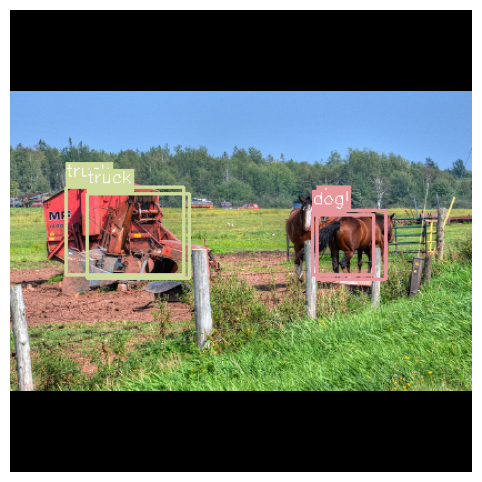

 46%|████▌     | 8002/17432 [3:58:46<15:57:40,  6.09s/it, loss=1.77]

batch_idx: 8001
batch_idx: 8002


 46%|████▌     | 8004/17432 [3:58:46<7:59:49,  3.05s/it, loss=1.77] 

batch_idx: 8003
batch_idx: 8004


 46%|████▌     | 8006/17432 [3:58:47<4:05:49,  1.56s/it, loss=1.77]

batch_idx: 8005
batch_idx: 8006


 46%|████▌     | 8008/17432 [3:58:47<2:10:57,  1.20it/s, loss=1.77]

batch_idx: 8007
batch_idx: 8008


 46%|████▌     | 8010/17432 [3:58:47<1:15:40,  2.08it/s, loss=1.77]

batch_idx: 8009
batch_idx: 8010


 46%|████▌     | 8012/17432 [3:58:47<47:55,  3.28it/s, loss=1.77]  

batch_idx: 8011
batch_idx: 8012


 46%|████▌     | 8014/17432 [3:58:48<37:51,  4.15it/s, loss=1.77]

batch_idx: 8013
batch_idx: 8014


 46%|████▌     | 8016/17432 [3:58:48<28:58,  5.41it/s, loss=1.77]

batch_idx: 8015
batch_idx: 8016


 46%|████▌     | 8018/17432 [3:58:56<6:12:23,  2.37s/it, loss=1.77]

batch_idx: 8017
batch_idx: 8018


 46%|████▌     | 8020/17432 [3:58:56<3:12:10,  1.23s/it, loss=1.77]

batch_idx: 8019
batch_idx: 8020


 46%|████▌     | 8022/17432 [3:59:02<6:38:36,  2.54s/it, loss=1.77]

batch_idx: 8021
batch_idx: 8022


 46%|████▌     | 8024/17432 [3:59:03<3:25:44,  1.31s/it, loss=1.77]

batch_idx: 8023
batch_idx: 8024


 46%|████▌     | 8026/17432 [3:59:09<6:48:18,  2.60s/it, loss=1.77]

batch_idx: 8025
batch_idx: 8026


 46%|████▌     | 8028/17432 [3:59:10<3:30:43,  1.34s/it, loss=1.77]

batch_idx: 8027
batch_idx: 8028


 46%|████▌     | 8030/17432 [3:59:16<6:56:06,  2.66s/it, loss=1.77]

batch_idx: 8029
batch_idx: 8030


 46%|████▌     | 8032/17432 [3:59:16<3:34:41,  1.37s/it, loss=1.77]

batch_idx: 8031
batch_idx: 8032


 46%|████▌     | 8034/17432 [3:59:23<7:04:36,  2.71s/it, loss=1.77]

batch_idx: 8033
batch_idx: 8034


 46%|████▌     | 8036/17432 [3:59:24<3:38:24,  1.39s/it, loss=1.77]

batch_idx: 8035
batch_idx: 8036


 46%|████▌     | 8038/17432 [3:59:30<7:04:35,  2.71s/it, loss=1.77]

batch_idx: 8037
batch_idx: 8038


 46%|████▌     | 8040/17432 [3:59:31<3:37:50,  1.39s/it, loss=1.77]

batch_idx: 8039
batch_idx: 8040


 46%|████▌     | 8042/17432 [3:59:38<7:10:02,  2.75s/it, loss=1.77]

batch_idx: 8041
batch_idx: 8042


 46%|████▌     | 8044/17432 [3:59:38<3:40:33,  1.41s/it, loss=1.77]

batch_idx: 8043
batch_idx: 8044


 46%|████▌     | 8046/17432 [3:59:45<7:19:12,  2.81s/it, loss=1.77]

batch_idx: 8045
batch_idx: 8046


 46%|████▌     | 8048/17432 [3:59:45<3:45:31,  1.44s/it, loss=1.77]

batch_idx: 8047
batch_idx: 8048


 46%|████▌     | 8050/17432 [3:59:52<6:51:52,  2.63s/it, loss=1.77]

batch_idx: 8049
batch_idx: 8050


 46%|████▌     | 8052/17432 [3:59:52<3:32:24,  1.36s/it, loss=1.77]

batch_idx: 8051
batch_idx: 8052


 46%|████▌     | 8054/17432 [3:59:58<6:43:24,  2.58s/it, loss=1.77]

batch_idx: 8053
batch_idx: 8054


 46%|████▌     | 8056/17432 [3:59:59<3:28:05,  1.33s/it, loss=1.77]

batch_idx: 8055
batch_idx: 8056


 46%|████▌     | 8058/17432 [4:00:06<7:18:27,  2.81s/it, loss=1.77]

batch_idx: 8057
batch_idx: 8058


 46%|████▌     | 8060/17432 [4:00:06<3:44:38,  1.44s/it, loss=1.77]

batch_idx: 8059
batch_idx: 8060


 46%|████▌     | 8062/17432 [4:00:13<6:56:16,  2.67s/it, loss=1.77]

batch_idx: 8061
batch_idx: 8062


 46%|████▋     | 8064/17432 [4:00:13<3:33:43,  1.37s/it, loss=1.77]

batch_idx: 8063
batch_idx: 8064


 46%|████▋     | 8066/17432 [4:00:19<6:30:25,  2.50s/it, loss=1.77]

batch_idx: 8065
batch_idx: 8066


 46%|████▋     | 8068/17432 [4:00:19<3:21:30,  1.29s/it, loss=1.77]

batch_idx: 8067
batch_idx: 8068


 46%|████▋     | 8070/17432 [4:00:26<7:00:18,  2.69s/it, loss=1.77]

batch_idx: 8069
batch_idx: 8070


 46%|████▋     | 8072/17432 [4:00:26<3:36:24,  1.39s/it, loss=1.77]

batch_idx: 8071
batch_idx: 8072


 46%|████▋     | 8074/17432 [4:00:33<6:32:34,  2.52s/it, loss=1.77]

batch_idx: 8073
batch_idx: 8074


 46%|████▋     | 8076/17432 [4:00:33<3:22:47,  1.30s/it, loss=1.77]

batch_idx: 8075
batch_idx: 8076


 46%|████▋     | 8078/17432 [4:00:39<6:44:16,  2.59s/it, loss=1.77]

batch_idx: 8077
batch_idx: 8078


 46%|████▋     | 8080/17432 [4:00:40<3:28:55,  1.34s/it, loss=1.77]

batch_idx: 8079
batch_idx: 8080


 46%|████▋     | 8082/17432 [4:00:46<6:57:14,  2.68s/it, loss=1.77]

batch_idx: 8081
batch_idx: 8082


 46%|████▋     | 8084/17432 [4:00:47<3:34:32,  1.38s/it, loss=1.77]

batch_idx: 8083
batch_idx: 8084


 46%|████▋     | 8086/17432 [4:00:53<6:59:19,  2.69s/it, loss=1.77]

batch_idx: 8085
batch_idx: 8086


 46%|████▋     | 8088/17432 [4:00:54<3:35:37,  1.38s/it, loss=1.77]

batch_idx: 8087
batch_idx: 8088


 46%|████▋     | 8090/17432 [4:01:00<6:50:23,  2.64s/it, loss=1.77]

batch_idx: 8089
batch_idx: 8090


 46%|████▋     | 8092/17432 [4:01:01<3:32:01,  1.36s/it, loss=1.77]

batch_idx: 8091
batch_idx: 8092


 46%|████▋     | 8094/17432 [4:01:08<7:08:31,  2.75s/it, loss=1.77]

batch_idx: 8093
batch_idx: 8094


 46%|████▋     | 8096/17432 [4:01:08<3:40:14,  1.42s/it, loss=1.77]

batch_idx: 8095
batch_idx: 8096


 46%|████▋     | 8098/17432 [4:01:15<7:20:27,  2.83s/it, loss=1.77]

batch_idx: 8097
batch_idx: 8098


 46%|████▋     | 8100/17432 [4:01:15<3:46:07,  1.45s/it, loss=1.77]

batch_idx: 8099
batch_idx: 8100


 46%|████▋     | 8102/17432 [4:01:22<7:23:42,  2.85s/it, loss=1.77]

batch_idx: 8101
batch_idx: 8102


 46%|████▋     | 8104/17432 [4:01:23<3:48:02,  1.47s/it, loss=1.77]

batch_idx: 8103
batch_idx: 8104


 47%|████▋     | 8106/17432 [4:01:29<6:59:18,  2.70s/it, loss=1.77]

batch_idx: 8105
batch_idx: 8106


 47%|████▋     | 8108/17432 [4:01:30<3:35:12,  1.38s/it, loss=1.77]

batch_idx: 8107
batch_idx: 8108


 47%|████▋     | 8110/17432 [4:01:36<6:57:34,  2.69s/it, loss=1.77]

batch_idx: 8109
batch_idx: 8110


 47%|████▋     | 8112/17432 [4:01:37<3:35:19,  1.39s/it, loss=1.77]

batch_idx: 8111
batch_idx: 8112


 47%|████▋     | 8114/17432 [4:01:44<7:26:12,  2.87s/it, loss=1.77]

batch_idx: 8113
batch_idx: 8114


 47%|████▋     | 8116/17432 [4:01:44<3:49:00,  1.47s/it, loss=1.77]

batch_idx: 8115
batch_idx: 8116


 47%|████▋     | 8118/17432 [4:01:50<6:39:13,  2.57s/it, loss=1.77]

batch_idx: 8117
batch_idx: 8118


 47%|████▋     | 8120/17432 [4:01:51<3:26:27,  1.33s/it, loss=1.77]

batch_idx: 8119
batch_idx: 8120


 47%|████▋     | 8122/17432 [4:01:57<6:29:16,  2.51s/it, loss=1.77]

batch_idx: 8121
batch_idx: 8122


 47%|████▋     | 8124/17432 [4:01:57<3:21:01,  1.30s/it, loss=1.77]

batch_idx: 8123
batch_idx: 8124


 47%|████▋     | 8126/17432 [4:02:03<6:16:44,  2.43s/it, loss=1.77]

batch_idx: 8125
batch_idx: 8126


 47%|████▋     | 8128/17432 [4:02:03<3:14:11,  1.25s/it, loss=1.77]

batch_idx: 8127
batch_idx: 8128


 47%|████▋     | 8130/17432 [4:02:10<6:45:57,  2.62s/it, loss=1.77]

batch_idx: 8129
batch_idx: 8130


 47%|████▋     | 8132/17432 [4:02:10<3:28:58,  1.35s/it, loss=1.77]

batch_idx: 8131
batch_idx: 8132


 47%|████▋     | 8134/17432 [4:02:18<7:12:39,  2.79s/it, loss=1.77]

batch_idx: 8133
batch_idx: 8134


 47%|████▋     | 8136/17432 [4:02:18<3:42:19,  1.44s/it, loss=1.77]

batch_idx: 8135
batch_idx: 8136


 47%|████▋     | 8138/17432 [4:02:25<7:04:31,  2.74s/it, loss=1.77]

batch_idx: 8137
batch_idx: 8138


 47%|████▋     | 8140/17432 [4:02:25<3:39:05,  1.41s/it, loss=1.77]

batch_idx: 8139
batch_idx: 8140


 47%|████▋     | 8142/17432 [4:02:32<6:57:04,  2.69s/it, loss=1.77]

batch_idx: 8141
batch_idx: 8142


 47%|████▋     | 8144/17432 [4:02:32<3:34:46,  1.39s/it, loss=1.77]

batch_idx: 8143
batch_idx: 8144


 47%|████▋     | 8146/17432 [4:02:39<7:10:15,  2.78s/it, loss=1.77]

batch_idx: 8145
batch_idx: 8146


 47%|████▋     | 8148/17432 [4:02:39<3:40:23,  1.42s/it, loss=1.77]

batch_idx: 8147
batch_idx: 8148


 47%|████▋     | 8150/17432 [4:02:46<7:06:48,  2.76s/it, loss=1.77]

batch_idx: 8149
batch_idx: 8150


 47%|████▋     | 8152/17432 [4:02:46<3:39:43,  1.42s/it, loss=1.77]

batch_idx: 8151
batch_idx: 8152


 47%|████▋     | 8154/17432 [4:02:53<7:14:06,  2.81s/it, loss=1.77]

batch_idx: 8153
batch_idx: 8154


 47%|████▋     | 8156/17432 [4:02:54<3:42:56,  1.44s/it, loss=1.77]

batch_idx: 8155
batch_idx: 8156


 47%|████▋     | 8158/17432 [4:03:00<6:52:51,  2.67s/it, loss=1.77]

batch_idx: 8157
batch_idx: 8158


 47%|████▋     | 8160/17432 [4:03:01<3:33:15,  1.38s/it, loss=1.77]

batch_idx: 8159
batch_idx: 8160


 47%|████▋     | 8162/17432 [4:03:07<6:43:14,  2.61s/it, loss=1.77]

batch_idx: 8161
batch_idx: 8162


 47%|████▋     | 8164/17432 [4:03:07<3:27:53,  1.35s/it, loss=1.77]

batch_idx: 8163
batch_idx: 8164


 47%|████▋     | 8166/17432 [4:03:14<6:54:48,  2.69s/it, loss=1.77]

batch_idx: 8165
batch_idx: 8166


 47%|████▋     | 8168/17432 [4:03:14<3:32:52,  1.38s/it, loss=1.77]

batch_idx: 8167
batch_idx: 8168


 47%|████▋     | 8170/17432 [4:03:21<6:52:20,  2.67s/it, loss=1.77]

batch_idx: 8169
batch_idx: 8170


 47%|████▋     | 8172/17432 [4:03:21<3:32:04,  1.37s/it, loss=1.77]

batch_idx: 8171
batch_idx: 8172


 47%|████▋     | 8174/17432 [4:03:28<6:47:20,  2.64s/it, loss=1.77]

batch_idx: 8173
batch_idx: 8174


 47%|████▋     | 8176/17432 [4:03:28<3:30:05,  1.36s/it, loss=1.77]

batch_idx: 8175
batch_idx: 8176


 47%|████▋     | 8178/17432 [4:03:35<6:49:20,  2.65s/it, loss=1.77]

batch_idx: 8177
batch_idx: 8178


 47%|████▋     | 8180/17432 [4:03:35<3:30:58,  1.37s/it, loss=1.77]

batch_idx: 8179
batch_idx: 8180


 47%|████▋     | 8182/17432 [4:03:42<7:06:43,  2.77s/it, loss=1.77]

batch_idx: 8181
batch_idx: 8182


 47%|████▋     | 8184/17432 [4:03:42<3:39:08,  1.42s/it, loss=1.77]

batch_idx: 8183
batch_idx: 8184


 47%|████▋     | 8186/17432 [4:03:49<6:54:22,  2.69s/it, loss=1.77]

batch_idx: 8185
batch_idx: 8186


 47%|████▋     | 8188/17432 [4:03:49<3:32:43,  1.38s/it, loss=1.77]

batch_idx: 8187
batch_idx: 8188


 47%|████▋     | 8190/17432 [4:03:56<7:11:48,  2.80s/it, loss=1.77]

batch_idx: 8189
batch_idx: 8190


 47%|████▋     | 8192/17432 [4:03:57<3:41:18,  1.44s/it, loss=1.77]

batch_idx: 8191
batch_idx: 8192


 47%|████▋     | 8194/17432 [4:04:04<7:20:57,  2.86s/it, loss=1.77]

batch_idx: 8193
batch_idx: 8194


 47%|████▋     | 8196/17432 [4:04:04<3:45:39,  1.47s/it, loss=1.77]

batch_idx: 8195
batch_idx: 8196


 47%|████▋     | 8198/17432 [4:04:11<7:22:23,  2.87s/it, loss=1.77]

batch_idx: 8197
batch_idx: 8198


 47%|████▋     | 8200/17432 [4:04:12<3:46:19,  1.47s/it, loss=1.77]

batch_idx: 8199
batch_idx: 8200


 47%|████▋     | 8200/17432 [4:04:12<3:46:19,  1.47s/it, loss=1.77]

==> Saving checkpoint


 47%|████▋     | 8202/17432 [4:04:22<7:41:37,  3.00s/it, loss=1.77] 

batch_idx: 8201
batch_idx: 8202


 47%|████▋     | 8204/17432 [4:04:23<3:56:45,  1.54s/it, loss=1.77]

batch_idx: 8203
batch_idx: 8204


 47%|████▋     | 8206/17432 [4:04:25<3:18:10,  1.29s/it, loss=1.77]

batch_idx: 8205
batch_idx: 8206


 47%|████▋     | 8208/17432 [4:04:25<1:47:14,  1.43it/s, loss=1.77]

batch_idx: 8207
batch_idx: 8208


 47%|████▋     | 8210/17432 [4:04:31<5:47:24,  2.26s/it, loss=1.77]

batch_idx: 8209
batch_idx: 8210


 47%|████▋     | 8212/17432 [4:04:32<3:00:47,  1.18s/it, loss=1.77]

batch_idx: 8211
batch_idx: 8212


 47%|████▋     | 8214/17432 [4:04:38<6:26:54,  2.52s/it, loss=1.77]

batch_idx: 8213
batch_idx: 8214


 47%|████▋     | 8216/17432 [4:04:38<3:20:02,  1.30s/it, loss=1.77]

batch_idx: 8215
batch_idx: 8216


 47%|████▋     | 8218/17432 [4:04:45<6:47:19,  2.65s/it, loss=1.77]

batch_idx: 8217
batch_idx: 8218


 47%|████▋     | 8220/17432 [4:04:45<3:29:25,  1.36s/it, loss=1.77]

batch_idx: 8219
batch_idx: 8220


 47%|████▋     | 8222/17432 [4:04:52<6:46:38,  2.65s/it, loss=1.77]

batch_idx: 8221
batch_idx: 8222


 47%|████▋     | 8224/17432 [4:04:52<3:28:48,  1.36s/it, loss=1.77]

batch_idx: 8223
batch_idx: 8224


 47%|████▋     | 8226/17432 [4:04:59<7:00:06,  2.74s/it, loss=1.77]

batch_idx: 8225
batch_idx: 8226


 47%|████▋     | 8228/17432 [4:04:59<3:35:58,  1.41s/it, loss=1.77]

batch_idx: 8227
batch_idx: 8228


 47%|████▋     | 8230/17432 [4:05:06<6:58:32,  2.73s/it, loss=1.77]

batch_idx: 8229
batch_idx: 8230


 47%|████▋     | 8232/17432 [4:05:07<3:35:32,  1.41s/it, loss=1.77]

batch_idx: 8231
batch_idx: 8232


 47%|████▋     | 8234/17432 [4:05:14<7:08:54,  2.80s/it, loss=1.77]

batch_idx: 8233
batch_idx: 8234


 47%|████▋     | 8236/17432 [4:05:14<3:41:04,  1.44s/it, loss=1.77]

batch_idx: 8235
batch_idx: 8236


 47%|████▋     | 8238/17432 [4:05:21<7:25:34,  2.91s/it, loss=1.77]

batch_idx: 8237
batch_idx: 8238


 47%|████▋     | 8240/17432 [4:05:21<3:47:58,  1.49s/it, loss=1.77]

batch_idx: 8239
batch_idx: 8240


 47%|████▋     | 8241/17432 [4:05:27<4:33:45,  1.79s/it, loss=1.77]


KeyboardInterrupt: 

In [15]:
epochs = 100000000
error_counter = 0
# Training the model 
for e in range(1, epochs+1): 
	print("Epoch:", e) 
    ################# dos
    # Creating a progress bar 
	progress_bar = tqdm(train_loader, leave=True) 

	# Initializing a list to store the losses 
	losses = [] 

	try:
		# Iterating over the training data 
		for batch_idx, (x, y) in enumerate(progress_bar):
			try:
				# if e == 1:
				# 	batch_idx += 33740
				print("batch_idx:", batch_idx)
				x = x.to(device) 
				y0, y1, y2 = ( 
					y[0].to(device), 
					y[1].to(device), 
					y[2].to(device), 
				) 

				with torch.amp.autocast(device_type=device): 
					# Getting the model predictions 
					outputs = model(x) 
					# Calculating the loss at each scale 
					loss = ( 
						loss_fn(outputs[0], y0, scaled_anchors[0]) 
						+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
						+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
					) 

				# Add the loss to the list 
				losses.append(loss.item()) 

				# Reset gradients 
				optimizer.zero_grad() 

				# Backpropagate the loss 
				scaler.scale(loss).backward() 

				# Optimization step 
				scaler.step(optimizer) 

				# Update the scaler for next iteration 
				scaler.update() 

				# update progress bar with loss 
				mean_loss = sum(losses) / len(losses) 
				progress_bar.set_postfix(loss=mean_loss)
		
				# Log the loss to TensorBoard
				writer.add_scalar('Loss/train', mean_loss, e * len(train_loader) + batch_idx)

				# Log images to TensorBoard every 100 batches
				if batch_idx % 200 == 0:
					# Saving the model 
					if save_model: 
						save_checkpoint(model, optimizer, filename=model_path_base +f"b{batch_idx}_vgg16_checkpoint.pth.tar")

				if batch_idx % 1000 == 0:
					# Saving the model 
					if save_model: 
						save_checkpoint(model, optimizer, filename=model_path_base +f"e{e}_b{batch_idx}_vgg16_checkpoint.pth.tar")
						# delete batch checkpoints
						for i in range(0, batch_idx+1, 200):
							if os.path.exists(model_path_base + f"b{i}_vgg16_checkpoint.pth.tar"):
								os.remove(model_path_base + f"b{i}_vgg16_checkpoint.pth.tar")
						# for i in range(0,e-3):
						# 	if os.path.exists(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar"):
						# 		os.remove(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar")
				
					model.eval()
				
					# Getting a sample image from the test data loader 
					try:
						x, y = next(val_loader_iter)
					except StopIteration:
						val_loader_iter = iter(val_loader)
						x, y = next(val_loader_iter)
					x = x.to(device) 
					
					print("display and report image")
					with torch.no_grad():
						output = model(x)
						y0, y1, y2 = ( 
							y[0].to(device), 
							y[1].to(device), 
							y[2].to(device), 
						) 

						with torch.amp.autocast(device_type=device): 
							# Getting the model predictions 
							outputs = model(x) 
							# Calculating the loss at each scale 
							loss = ( 
								loss_fn(outputs[0], y0, scaled_anchors[0]) 
								+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
								+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
							) 
				
						writer.add_scalar('Loss/val', loss.item(), e * len(train_loader) + batch_idx)
				
						bboxes = [[] for _ in range(x.shape[0])]
						for i in range(3):
							batch_size, A, S, _, _ = output[i].shape
							anchor = scaled_anchors[i]
							boxes_scale_i = convert_cells_to_bboxes(output[i], anchor, s=S, is_predictions=True)
							for idx, box in enumerate(boxes_scale_i):
								bboxes[idx] += box
						i = 0
						nms_boxes = nms(bboxes[i], iou_threshold=0.5, threshold=0.6)
						img_with_boxes = plot_image(x[i].permute(1, 2, 0).detach().cpu(), nms_boxes, categories)
						img_with_boxes = T.ToTensor()(img_with_boxes)
						writer.add_image(f'Val/Image_{e}_{i}_{batch_idx}_before', img_with_boxes, e * len(train_loader) + batch_idx)

					model.train()
			except Exception as error:
				print(error)
				error_counter += 1
				if error_counter > 10:
					raise error
	except Exception as error:
		print(error)
			


    #################
	# training_loop(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors) 


In [15]:
import traceback
traceback.format_exc()

'NoneType: None\n'

In [17]:
error

NameError: name 'error' is not defined

In [1]:
batch_idx

NameError: name 'batch_idx' is not defined

In [17]:
e

1